<a href="https://colab.research.google.com/github/YeomHyunseok/data/blob/main/Mission_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1 협업 필터링(Collaborative Filtering)에 관한 설명

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 문제 1
**추천 시스템의 기본인 협업 필터링(Collaborative Filtering)은 크게 두 가지 방식으로 나뉜다. 각각에 대한 설명을 하라.**
  1. **User-based filtering**:  
     - 사용자 간의 유사성을 바탕으로 추천하는 방식입니다. 특정 사용자가 선호하는 스타일을 비슷한 성향을 가진 다른 사용자들에게도 추천하는 방식으로, 사용자 간의 스타일 선호도가 비슷할수록 더 정확한 예측이 가능하다.

  2. **Item-based filtering**:  
     - 각 아이템(여기서는 스타일 이미지) 간의 유사성을 바탕으로 추천하는 방식입니다. 특정 스타일 이미지를 선호하는 사용자가 있다면, 그와 유사한 다른 스타일 이미지들도 선호할 가능성이 높다.







### 문제 2
**2-2에서 구한 응답자의 "스타일 선호 정보표"**를 토대로 Validation 데이터 내 응답자의 **"스타일 선호 여부 예측"** 문제를 아래 두 가지 기준으로 해결할 수 있다.
  1. **User-based filtering**:
    - user-item 선호도 행렬 생성 (결측치는 남겨둠)
      - json파일 안에 사용자의 직업,성별 데이터 사용가능
    - 행렬의 코사인 유사도 값을 이용해 유저ID별 거리 계산 (KNN은 NaN이 없는 사용자들과의 거리를 기반으로 예측)
    - K값 선택 시  가장 가까운 이웃의 수를 결정 ( 여러 값을 실험하여 최적값 찾기)
    - KNN 모델 구축
        - KNN 알고리즘을 적용하여 모델 구축 각 사용자의 validation data에 대한 선호도 예측

  2. **Item-based filtering**
    - 사용자 ID별로 선호도 조사를 한 이미지들의 특징 벡터을 추출
    - 추출한 특징 벡터들을 코사인 유사도를 이용해 아이템별 거리 계산
      - training data의 이미지feature vector, validation data 간의 유사도 계산 (코사인 유사도, 유클리드 거리)
      - 특정 임계값을 넘으면 해당 스타일 선호 하도록 학습
    - 가장 유사도가 높은 data의 선호도를 사용하여 validation 선호도 예측



### 문제 3
**두 방식의 장단점**




| 방식                 | 장점                                                        | 단점                                                         |
|---------------------|------------------------------------------------------------|-------------------------------------------------------------|
| **User-based filtering** | 1. 사용자의 개별 취향을 반영해 정교한 추천이 가능  <br> 2. **결과가 직관적**이다. <br> 3. 상품 자체에 대한 정보 없이 추천이 가능하다. | 1. **콜드 스타트 문제** 발생 가능 (신규 사용자에 대한 데이터 부족) <br> 2. 관심이 저조한 상품은 정보가 부족하여 추천이 어렵다. <br> 3. **계산량이 많아** 사용자가 많아질수록 추천의 효율성이 떨어진다. |
| **Item-based filtering** | 1. **효율성**: 예측 계산이 user-based에 비해 상대적으로 간단하므로 성능이 뛰어난 경우가 많다. <br> 2. **데이터가 적을 때도 작동 가능**: 유사한 아이템끼리 관계를 활용하여 추천이 가능하다. | 1. **새로운 사용자 문제**: 새로운 사용자가 등장하면 그 사용자의 취향을 반영하기 어려울 수 있다. <br> 2. **아이템 수에 의존**: 아이템 수가 많아지면 계산해야 할 유사성 행렬이 커져 성능 저하가 발생할 수 있다. |


### user-based filtering
장점:

1. user와 비슷한 취향을 기반으로 추천하므로, user 간의 관계가 쉽게 이해된다
2. 개인화된 추천 : 개인의 취향을 반영하여 매우 개인화된 추천을 제공한다
3. 새로운 아이템 추천 가능
: 다른 user들이 평가한 다른 아이템에 대해 직접적으로 추천을 생성할 수 있다

단점:

1. 사용자가 많고 아이템이 적을 경우, 유사한 사용자를 찾는 것이 어려워질 수 있다
2. 데이터 희소성 문제
: 사용자와 아이템 간의 평가 데이터가 희소할 경우 유사성 계산이 어렵고 추천 품질이 낮아질 수 있다
3. 시간 소모
: 사용자 간의 유사도를 계산하는 데 시간이 많이 소요될 수 있다.

###item-based filtering
장점:

효율성
: 예측 계산이 user based 에 비해 상대적으로 간단하므로 성능이 뛰어난 경우가 많다

단점:

1. 새로운 user 문제 : 새로운 user가 등장하면 그 사용자의 취향을 반영하기 어려울 수 있다.
2. item 수에 의존: item 수가 많아질 경우, 계산해야 할 유사성 행렬이 커져서 성능 저하가 발생할 수 있다.


### 결론
- **User-based filtering**은 사용자 취향을 더 정확하게 반영하지만, 신규 사용자나 데이터가 적을 경우 문제가 발생할 수 있다.
- 반면, **Item-based filtering**은 데이터가 적더라도 작동하지만, item 수가 많아질 경우 유사성 행렬이 커져 정확도가 떨어질 수 있다.
- 따라서 두 방식을 **혼합하여 활용**하면 추천 성능을 최적화할 수 있다.


# 3-2 이미지간 유사도를 활용하여 스타일 선호/비선호 예측하기

### 0. 1-2에서 학습한 모델을 이용하여 이미지들의 feature vector와 그에 대응되는 이미지 이름 list 생성

In [ ]:
import torch
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import os
from tqdm import tqdm
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_path = '/content/drive/MyDrive/Team_AIDForce/data/adamw_lr0.0005_bs128_dr0.3_aug3_best_model.pth'

# 1. ResNet18 모델 구조를 정의합니다.
model = models.resnet18(pretrained=False)

# 2. 모델의 state_dict를 로드합니다.
state_dict = torch.load(model_path)
model.load_state_dict(state_dict, strict=False)  # strict=False 설정

# 3. 마지막 classifier layer 제거
model.fc = torch.nn.Identity()

# 4. 평가 모드 전환 및 디바이스 할당
model.eval()
model.to(device)


# 만약 저장해놓은 데이터가 있으면 불러오기
# feature vector와 대응되는 이미지 이름 불러오기
# training_image_features = torch.load('/content/drive/MyDrive/Team_AIDForce/data/training_image_features.pt')
# training_image_names = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/training_image_names.csv')['image_name'].to_list()
# validation_image_features = torch.load('/content/drive/MyDrive/Team_AIDForce/data/validation_image_features.pt')
# validation_image_names = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/validation_image_names.csv')['image_name'].tolist()

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        # 폴더 내 모든 이미지 파일 경로를 수집
        self.image_paths = [
            os.path.join(image_dir, fname)
            for fname in os.listdir(image_dir)
        ]
        self.image_names = [
            fname
            for fname in os.listdir(image_dir)
        ]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        # 이미지 열기 및 RGB 변환
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
        return image, self.image_names[index]  # 이미지와 경로 반환

# 경로 및 전처리 설정
training_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/training_image'
validation_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/validation_image'
batch_size = 32

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조절
    transforms.ToTensor(),          # tensor 형식으로 만듦
    transforms.Normalize(mean=[0.4772, 0.4400, 0.4257], std=[0.2619, 0.2526, 0.2522]) # normalization  *****바꾸기!!!!!!!!!!!
])

# Dataset과 DataLoader 생성
train_ds = CustomImageDataset(training_image_path, transform=transform)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=2)
val_ds = CustomImageDataset(validation_image_path, transform=transform)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

# training_iamge에 대한 feature vector와 그에 대응되는 이미지 이름
training_image_features = []
training_image_names = []

with torch.no_grad():
    for images, names in tqdm(train_dl):
        images = images.to(device) # batch size개의 image들, (batch_size, 3, 224, 224)

        image_feature = model(images) # (batch_size, L, C)
        #image_feature /= image_feature.norm(dim=-1, keepdim=True)

        training_image_features.append(image_feature.to('cpu'))
        training_image_names.extend(names)

    training_image_features = torch.cat(training_image_features, dim=0)

print(training_image_features.shape)


# validation_iamge에 대한 feature vector와 그에 대응되는 이미지 이름
validation_image_features = []
validation_image_names = []

with torch.no_grad():
    for images, names in tqdm(val_dl):
        images = images.to(device) # batch size개의 image들, (batch_size, 3, 224, 224)

        image_feature = model(images) # (batch_size, L, C)
        #image_feature /= image_feature.norm(dim=-1, keepdim=True)

        validation_image_features.append(image_feature.to('cpu'))
        validation_image_names.extend(names)

    validation_image_features = torch.cat(validation_image_features, dim=0)

print(validation_image_features.shape)

/tmp/ipykernel_30/1080685922.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path)
100%|██████████| 128/128 [02:23<00:00,  1.12s/it]


torch.Size([4070, 512])


100%|██████████| 30/30 [00:37<00:00,  1.26s/it]

torch.Size([951, 512])


In [ ]:
import pandas as pd
## Training image
df = pd.DataFrame(training_image_names, columns=["image_name"]) # 이미지 이름 목록을 DataFrame으로 변환
df.to_csv("training_image_names.csv", index=False) # CSV 파일로 저장
torch.save(training_image_features, 'training_image_features.pt') # image feature vector 저장


## Validation image
df = pd.DataFrame(validation_image_names, columns=["image_name"]) # 이미지 이름 목록을 DataFrame으로 변환
df.to_csv("validation_image_names.csv", index=False) # CSV 파일로 저장
torch.save(validation_image_features, 'validation_image_features.pt') # image feature vector 저장

### 0. 2-2에서 작성한 상위 100명의 사용자에대한 선호/비선호 이미지 이름 csv파일을 불러와서 dictaionary 형식으로 만들기

In [ ]:
import pandas as pd
import torch

# CSV 파일 로드
preference_file_path = "/content/drive/MyDrive/Team_AIDForce/data/user_style_preferences.csv"
df = pd.read_csv(preference_file_path)

# 2-2의 결과를 저장할 딕셔너리
result = {}

# user_id 별로 다루기 쉽도록 dictionary 형태로 만든다
for _, row in df.iterrows():
    user_id = row["응답자 ID"]

    result[user_id] = {
        "train_preferred": [] if pd.isna(row["Training 스타일 선호"]) else str(row["Training 스타일 선호"]).split(', '),
        "train_not_preferred": [] if pd.isna(row["Training 스타일 비선호"]) else str(row["Training 스타일 비선호"]).split(', '),
        "valid_preferred": [] if pd.isna(row["Validation 스타일 선호"]) else str(row["Validation 스타일 선호"]).split(', '),
        "valid_not_preferred": [] if pd.isna(row["Validation 스타일 비선호"]) else str(row["Validation 스타일 비선호"]).split(', '),
    }


### 1. training data를 이용한 LOOCV(Leave One Out Cross Validation)로 어떤 전략이 좋을지 찾기
***※선호=1/비선호=0 으로 labeling***

In [ ]:
from tqdm import tqdm
import torch
from collections import Counter

def get_feature_vector(image_features, image_name_list, image_name):
    '''
    이미지의 이름으로 해당 이미지의 feature vector를 return 하는 함수

    Parameters:
    - image_features: 이미지들의 feature vector들이 들어있는 tensor, (num_image, feature_dim)
    - image_name_list: 이미지 feature vector에 대응되는 이미지 이름, (num_image,)
    - image_name: feature vector를 찾고자 하는 이미지의 이름
    '''
    try:
        idx = image_name_list.index(image_name)  # 이미지 이름의 인덱스 찾기
        return image_features[idx]  # 해당 인덱스의 feature vector 반환
    except ValueError:
        return None

def adjusted_prediction_with_mean(topk_labels, weights, user_mean):
    """
    사용자 평균을 사용해 조정된 예측값을 계산하는 함수

    Parameters:
    - topk_labels: Top K 아이템의 레이블(선호/비선호) 리스트
    - weights: 해당 이웃의 가중치 텐서 (유사도 or 거리 기반)
    - user_mean: 사용자의 레이블 평균값

    Returns:
    - adjusted_prediction: 조정된 예측값 (float)
    """
    # 가중치를 정규화함
    total_weight = weights.sum().item()
    normalized_weights = weights / total_weight

    # 레이블 조정 값 계산:  Σ(weight * (label - user_mean))
    weighted_adjustment = sum(w * (label - user_mean) for w, label in zip(normalized_weights, topk_labels))

    # 최종 조정된 예측값: 사용자 평균 + 가중합 조정
    adjusted_prediction = user_mean + weighted_adjustment
    return adjusted_prediction

def metric_test(metric, normalize=True, K=1, method='majority', use_user_mean=False):
    """
    user 별로 LOOCV를 적용하여 전체 Accuracy를 측정하는 함수

    Parameters:
    - metric: 'cosine', 'L2', or 'L1' 중 어떤 방식을 사용할지 선택
    - normalize: feature vector를 normalize하여 unit vector로 만들지 여부
    - K: 선호도 예측에 사용될 item의 수
    - method: 'majority' for majority voting or 'weighted' for weighted voting.
    - use_user_mean: True인 경우 user의 선호도 평균을 적용하여 예측을 수행
                    (method가 weigthed일때만 적용됨, majority인 경)
    """
    # 정확도 측정을 위한 변수
    total = 0
    correct = 0

    # user_id 마다 반복
    for user_id in result.keys():
        user_image_features = [] # 해당 user의 training image feature vector들을 저장할 list
        labels = []              # 해당 user의 training image의 선호/비선호 label을 저장할 list
                                 # 선호 = 1 / 비선호 = 0

        # 현재 user에 대한 feature vector와 label을 준비한다
        for f_name in result[user_id]['train_preferred']: # 선호 이미지의 경우
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(training_image_features, training_image_names, f_name)
            user_image_features.append(feature_vector)

            # label을 1(선호)로 추가해준다
            labels.append(1)

        for f_name in result[user_id]['train_not_preferred']: # 비선호 이미지의 경우
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(training_image_features, training_image_names, f_name)
            user_image_features.append(feature_vector)

            # label을 0(비선호)로 추가해준다
            labels.append(0)

        # list를 tensor 형태로 바꾼다
        user_image_features = torch.stack(user_image_features, dim=0)  # (num_image, feature_dim)

        # normalize = True인 경우
        if normalize:
            # 모든 vector를 unit vector로 만들어 준다
            user_image_features /= user_image_features.norm(dim=-1, keepdim=True)

        # user의 평균 선호여부를 구한다 (평균 레이블 값)
        user_mean = sum(labels) / len(labels) # use_user_mean = True인 경우 사용됨

        # Leave-One-Out Cross-Validation (LOOCV) 수행
        # training image '하나'를 test image라고 생각하고 나머지 training image와 비교
        for i in range(len(user_image_features)):  # 이미지 수 만큼 반복
            # 선호도 예측을 수행할 feature vector
            query_feature = user_image_features[i].unsqueeze(0)  # (1, feature_dim)

            # test로 쓸 feature 말고 나머지 feature와 label을 다시 구한다
            remaining_features = torch.cat((user_image_features[:i], user_image_features[i + 1:]), dim=0)
            remaining_labels = labels[:i] + labels[i + 1:]

            # metric이 'cosine'인 경우
            if metric == 'cosine':
                # 내적을 통하여 코사인 유사도를 구한다.
                # 실제 코사인 유사도는 normalize=True일때 구해지고 normalize=False이면 내적 값을 유사도로 사용한다
                similarities = query_feature @ remaining_features.T  # (1, num_remaining_images)

                # 상위 K개의 유사도를 가진 feature의 index 가져오기
                topk_indices = torch.topk(similarities, K, dim=1).indices.squeeze(0)

                # index를 통해 유사도를 가중치로 생각한다(method = 'weighted'일 때 사용됨)
                weights = similarities.squeeze(0)[topk_indices]

            # metric이 'L1' 또는 'L2'인 경우
            elif metric in ['L2', 'L1']:
                # torch.cdist의 p 파라미터를 조정하여 L2, L1 distance를 구할 수 있다
                p = 2 if metric == 'L2' else 1

                # distance를 구한다
                dists = torch.cdist(query_feature, remaining_features, p=p)  # (1, num_remaining_images)

                # distance에 -1을 곱하여 거리가 작은 K개의 feature의 index를 구한다
                topk_indices = torch.topk(-dists, K, dim=1).indices.squeeze(0)

                # 해당 index를 통하여 distance를 가져오고 distance에 역수를 취해 가중치로 생각한다
                # 1e-8을 더해주는 이유는 distance가 0인경우 에러가 나는것을 방지하기 위해서이다
                weights = 1 / (dists.squeeze(0)[topk_indices] + 1e-8)  # 거리의 역수를 가중치로

            # top K개에 해당하는 label을 구한다.
            topk_labels = [remaining_labels[idx] for idx in topk_indices]


            # method = 'majority' 인경우
            if method == 'majority':
                # 다수결을 통해 가장 많이 나온 label로 예측한다
                predicted_label = Counter(topk_labels).most_common(1)[0][0]

            # method = 'weighted' 인 경우
            elif method == 'weighted':
                if use_user_mean: # user의 평균 선호도을 사용하는 경우
                    # 사용자 평균에 조정된 예측값 구하기
                    adjusted_pred = adjusted_prediction_with_mean(topk_labels, weights, user_mean)

                    # 값이 0.5보다 큰 경우는 1(선호)로 예측, 아닌 경우는 0(비선호)으로 예측
                    predicted_label = 1 if adjusted_pred > 0.5 else 0

                else: #user의 평균 선호도를 사용하지 않는 경우
                    # 전체 가중치 합을 구한다
                    total_weight = weights.sum()

                    # 가중치 / 전체 가중치 합을 통해 normalize해준다
                    normalized_weights = weights / total_weight

                    # normalize된 가중치를 label에 곱해준다
                    weighted_sum = sum(w * l for w, l in zip(normalized_weights, topk_labels))

                    # 값이 0.5보다 큰 경우는 1(선호)로 예측, 아닌 경우는 0(비선호)으로 예측
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            # 정확도 계산을 위해
            total += 1
            correct += int(predicted_label == labels[i])

    # 정확도를 계산하고 return 한다
    accuracy = correct / total
    print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")

    return accuracy


In [ ]:
metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]

best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None

# 모든 경우에 대해 실험해본다
for metric in metrics:
    for normalize in  normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    accuracy = metric_test(metric, normalize, k, method, user_mean)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_metric = metric
                        best_normalize = normalize
                        best_k = k
                        best_method = method
                        best_user_mean = user_mean

# 최고의 성능을 낸 방법을 출력한다,
print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Accuracy: {best_accuracy:.4f}")

Metric: cosine, Normalize: True, K: 1, Method: majority, Use Mean: True, Accuracy: 0.5982
Metric: cosine, Normalize: True, K: 1, Method: majority, Use Mean: False, Accuracy: 0.5982
Metric: cosine, Normalize: True, K: 1, Method: weighted, Use Mean: True, Accuracy: 0.5982
Metric: cosine, Normalize: True, K: 1, Method: weighted, Use Mean: False, Accuracy: 0.5982
Metric: cosine, Normalize: True, K: 3, Method: majority, Use Mean: True, Accuracy: 0.6133
Metric: cosine, Normalize: True, K: 3, Method: majority, Use Mean: False, Accuracy: 0.6133
Metric: cosine, Normalize: True, K: 3, Method: weighted, Use Mean: True, Accuracy: 0.6133
Metric: cosine, Normalize: True, K: 3, Method: weighted, Use Mean: False, Accuracy: 0.6133
Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: True, Accuracy: 0.6283
Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: False, Accuracy: 0.6283
Metric: cosine, Normalize: True, K: 5, Method: weighted, Use Mean: True, Accuracy: 0.6283
Metri

### 2. 1에서 찾은 전략으로 validation 데이터에 대해 수행해 보기

In [ ]:
## val
def metric_on_validation(metric='cosine', normalize=True, K=1, method='majority', use_user_mean=False):
    """
    validation data에 대해 평가하는 함수

    Parameters:
    - metric: 'cosine', 'L2', or 'L1' 중 어떤 방식을 사용할지 선택
    - normalize: feature vector를 normalize하여 unit vector로 만들지 여부
    - K: 선호도 예측에 사용될 item의 수
    - method: 'majority' for majority voting or 'weighted' for weighted voting.
    - use_user_mean: True인 경우 user의 선호도 평균을 적용하여 예측을 수행
                    (method가 weigthed일때만 적용됨, majority인 경)
    """
    # 정확도 측정을 위한 변수
    total = 0
    correct = 0

    # user_id 마다 반복
    for user_id in result.keys():
        user_image_features = [] # 해당 user의 training image feature vector들을 저장할 list
        labels = []              # 해당 user의 training image의 선호/비선호 label을 저장할 list
        user_validation_image_features = [] # 해당 user의 validation image feature vector들을 저장할 list
        true_labels = []                    # 해당 user의 validation image의 선호/비선호 label을 저장할 list
        predict_labels = []                 # 예측 선호도가 들어갈 list

         # 현재 user에 대한 training feature vector와 label을 준비한다
        for f_name in result[user_id]['train_preferred']: # 선호 이미지의 경우
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(training_image_features, training_image_names, f_name)
            user_image_features.append(feature_vector)

            # label을 1(선호)로 추가해준다
            labels.append(1)

        for f_name in result[user_id]['train_not_preferred']: # 비선호 이미지의 경우
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(training_image_features, training_image_names, f_name)
            user_image_features.append(feature_vector)

            # label을 0(비선호)로 추가해준다
            labels.append(0)

        # validation features 와 labels을 준비한다
        for f_name in result[user_id]['valid_preferred']:
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(validation_image_features, validation_image_names, f_name)
            user_validation_image_features.append(feature_vector)

            # label을 1(선호)로 추가해준다
            true_labels.append(1)

        for f_name in result[user_id]['valid_not_preferred']:
            # 이미지 이름에 해당하는 feature vector를 가져와 추가해준다
            feature_vector = get_feature_vector(validation_image_features, validation_image_names, f_name)
            user_validation_image_features.append(feature_vector)

            # label을 0(비선호)로 추가해준다
            true_labels.append(0)

        # list를 tensor 형태로 바꾼다
        user_image_features = torch.stack(user_image_features, dim=0)  # (num_train_images, feature_dim)
        user_validation_image_features = torch.stack(user_validation_image_features, dim=0)  # (num_val_images, feature_dim)

        # normalize = True인 경우
        if normalize:
            # 모든 vector를 unit vector로 만들어 준다
            user_image_features /= user_image_features.norm(dim=-1, keepdim=True)
            user_validation_image_features /= user_validation_image_features.norm(dim=-1, keepdim=True)

        # user의 평균 선호여부를 구한다 (평균 레이블 값)
        user_mean = sum(labels) / len(labels) # use_user_mean = True인 경우 사용됨

        # validation data에 대해 추론 시작
        # metric이 'cosine'인 경우
        if metric == 'cosine':
            # 내적을 통하여 코사인 유사도를 구한다.
            # 실제 코사인 유사도는 normalize=True일때 구해지고 normalize=False이면 내적 값을 유사도로 사용한다
            similarities = user_validation_image_features @ user_image_features.T  # (num_val_imgs, num_train_imgs)

            # 상위 K개의 유사도를 가진 feature의 index 가져오기
            topk_indices = torch.topk(similarities, K, dim=1).indices

        # metric이 'L1' 또는 'L2'인 경우
        elif metric in ['L2', 'L1']:
            # torch.cdist의 p 파라미터를 조정하여 L2, L1 distance를 구할 수 있다
            p = 2 if metric == 'L2' else 1

            # distance를 구한다
            dists = torch.cdist(user_validation_image_features, user_image_features, p=p)  # (num_val_imgs, num_train_imgs)

            # distance에 -1을 곱하여 거리가 작은 K개의 feature의 index를 구한다
            topk_indices = torch.topk(-dists, K, dim=1).indices


        for i, indices in enumerate(topk_indices): # validation image 하나하나 마다 반복
            # 해당 validation image에 대한 top K개에 해당하는 label을 구한다.
            topk_labels = [labels[idx] for idx in indices]

            # method = 'majority' 인경우
            if method == 'majority':
                # 다수결을 통해 가장 많이 나온 label로 예측한다
                predicted_label = Counter(topk_labels).most_common(1)[0][0]

            # method = 'weighted' 인 경우
            elif method == 'weighted':
                if metric == 'cosine':
                    # index를 통해 유사도를 가중치로 생각한다
                    weights = similarities[i][indices]
                else: # L2, L1 distance 사용시
                    # 해당 index를 통하여 distance를 가져오고 distance에 역수를 취해 가중치로 생각한다
                    # 1e-8을 더해주는 이유는 distance가 0인경우 에러가 나는것을 방지하기 위해서이다
                    weights = 1 / (dists[i][indices] + 1e-8)  # 거리의 역수를 가중치로

                if use_user_mean: # user의 평균 선호도을 사용하는 경우
                    # 사용자 평균에 조정된 예측값 구하기
                    adjusted_pred = adjusted_prediction_with_mean(topk_labels, weights, user_mean)

                    # 값이 0.5보다 큰 경우는 1(선호)로 예측, 아닌 경우는 0(비선호)으로 예측
                    predicted_label = 1 if adjusted_pred > 0.5 else 0

                else: #user의 평균 선호도를 사용하지 않는 경우
                    # 전체 가중치 합을 구한다
                    total_weight = weights.sum().item()

                     # 가중치 / 전체 가중치 합을 통해 normalize해준다
                    normalized_weights = weights / total_weight

                    # normalize된 가중치를 label에 곱해준다
                    weighted_sum = sum(w * l for w, l in zip(normalized_weights, topk_labels))

                    # 값이 0.5보다 큰 경우는 1(선호)로 예측, 아닌 경우는 0(비선호)으로 예측
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            predict_labels.append(predicted_label)

        # 정확도 계산을 위해
        total += len(true_labels)
        correct += sum(t == p for t, p in zip(true_labels, predict_labels))

    # 정확도를 계산하고 return 한다
    accuracy = correct / total
    print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")
    return accuracy


In [ ]:

accuracy = metric_on_validation(best_metric, best_normalize, best_k, best_method, best_user_mean)

print(f'Accuracy: {accuracy:.4f}')

Metric: L1, Normalize: True, K: 5, Method: weighted, Use Mean: True, Accuracy: 0.8510
Accuracy: 0.8510


### 번외) 실제 validation data에 어떤 metric이 좋은지 확인하기

In [ ]:
metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]

best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None

for metric in metrics:
    for normalize in  normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    accuracy = metric_on_validation(metric, normalize, k, method, user_mean)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_metric = metric
                        best_normalize = normalize
                        best_k = k
                        best_method = method
                        best_user_mean = user_mean

print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Accuracy: {best_accuracy:.4f}")

Metric: cosine, Normalize: True, K: 1, Method: majority, Use Mean: True, Accuracy: 0.8156
Metric: cosine, Normalize: True, K: 1, Method: majority, Use Mean: False, Accuracy: 0.8156
Metric: cosine, Normalize: True, K: 1, Method: weighted, Use Mean: True, Accuracy: 0.8156
Metric: cosine, Normalize: True, K: 1, Method: weighted, Use Mean: False, Accuracy: 0.8156
Metric: cosine, Normalize: True, K: 3, Method: majority, Use Mean: True, Accuracy: 0.7221
Metric: cosine, Normalize: True, K: 3, Method: majority, Use Mean: False, Accuracy: 0.7221
Metric: cosine, Normalize: True, K: 3, Method: weighted, Use Mean: True, Accuracy: 0.7221
Metric: cosine, Normalize: True, K: 3, Method: weighted, Use Mean: False, Accuracy: 0.7221
Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: True, Accuracy: 0.7057
Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: False, Accuracy: 0.7057
Metric: cosine, Normalize: True, K: 5, Method: weighted, Use Mean: True, Accuracy: 0.7057
Metri

# (Ranker) 3-3 설문 정보를 활용하여 이미지에 대한 정보를 추가적으로 확보

## 3-3-1 설문데이터 활용 (이미지 유사도 기반)

### 1. 단순 정규화 후 설문데이터, 이미지 피쳐 결합 후 유사도 비교

- Train Accuracy: **0.6856** / Validation Accuracy: **0.8665** -> 이미지 피쳐만 사용했을때보다 성능 **약 1%** 향상!


- Survey 데이터가 예측에 도움이 된다는 점 시사.

In [ ]:
import re

# ------------------------- 데이터 전처리 함수 -------------------------
def normalize_features(features, dim=-1):
    """Feature 벡터 정규화"""
    return features / features.norm(dim=dim, keepdim=True)

def extract_data_from_image(filename):
    """이미지 파일 이름에서 데이터를 추출"""
    match = re.match(r"([WT])_(\d+)_(.+?)_(.+?)_(.+)\.jpg", filename)
    if match:
        WT = match.group(1)
        image_id = match.group(2)
        year = match.group(3)
        style = match.group(4)
        gender = match.group(5)
        return WT, image_id, year, style, gender
    return None, None, None, None, None

def make_data_list_from_image(path):
    """이미지 경로에서 메타데이터 생성"""
    data = []
    for f in os.listdir(path):
        WT, image_id, year, style, gender = extract_data_from_image(f)
        if image_id:
            data.append([f, WT, image_id, year, style, gender])
    return data

def process_survey_data(survey):
    """설문 데이터를 텐서로 변환"""
    survey_vector = []
    survey_vector.append(survey["Q1"] / 4)  # 정규화
    survey_vector.append(survey["Q2"] / 3)  # 정규화
    survey_vector.extend([survey[f"Q420{i}"] for i in range(1, 10)])  # Q4201~Q4209
    survey_vector.extend([survey[f"Q421{i}"] for i in range(0, 7)])  # Q4210~Q4216
    return torch.tensor(survey_vector, dtype=torch.float32)

def load_survey_data(directory):
    """JSON 파일로부터 설문 데이터 로드"""
    survey_features = []
    image_names = []
    for file_name in os.listdir(directory):
        if file_name.endswith(".json"):
            file_path = os.path.join(directory, file_name)
            with open(file_path, "r") as f:
                data = json.load(f)
                image_names.append(data["imgName"])
                survey_features.append(process_survey_data(data["item"]["survey"]))
    return torch.stack(survey_features), image_names

def get_combined_feature(image_features, image_name_list, survey_features, survey_name_list, image_name, image_weight=1.0, survey_weight=1.0):
    """이미지 및 설문 데이터를 결합"""
    try:
        # 이미지 feature 가져오기
        if image_name in image_name_list:
            image_idx = image_name_list.index(image_name)
            image_vector = normalize_features(image_features[image_idx]) * image_weight
        else:
            image_vector = torch.zeros(image_features.shape[1])  # Placeholder

        # 설문 feature 가져오기
        if image_name in survey_name_list:
            survey_idx = survey_name_list.index(image_name)
            survey_vector = normalize_features(survey_features[survey_idx]) * survey_weight
        else:
            survey_vector = torch.zeros(survey_features.shape[1])  # Placeholder

        return torch.cat((image_vector, survey_vector), dim=-1)
    except ValueError as e:
        print(f"Error in get_combined_feature: {e}")
        return None

def adjusted_prediction_with_mean(topk_labels, weights, user_mean):
    """
    사용자 평균을 사용해 조정된 예측값을 계산하는 함수

    Parameters:
    - topk_labels: Top K 아이템의 레이블(선호/비선호) 리스트
    - weights: 해당 이웃의 가중치 텐서 (유사도 or 거리 기반)
    - user_mean: 사용자의 레이블 평균값

    Returns:
    - adjusted_prediction: 조정된 예측값 (float)
    """
    # 가중치를 정규화함
    total_weight = weights.sum().item()
    normalized_weights = weights / total_weight

    # 레이블 조정 값 계산:  Σ(weight * (label - user_mean))
    weighted_adjustment = sum(w * (label - user_mean) for w, label in zip(normalized_weights, topk_labels))

    # 최종 조정된 예측값: 사용자 평균 + 가중합 조정
    adjusted_prediction = user_mean + weighted_adjustment
    return adjusted_prediction

def get_feature_vector(image_features, image_name_list, image_name):
    '''
    이미지의 이름으로 해당 이미지의 feature vector를 return 하는 함수

    Parameters:
    - image_features: 이미지들의 feature vector들이 들어있는 tensor, (num_image, feature_dim)
    - image_name_list: 이미지 feature vector에 대응되는 이미지 이름, (num_image,)
    - image_name: feature vector를 찾고자 하는 이미지의 이름
    '''
    try:
        idx = image_name_list.index(image_name)  # 이미지 이름의 인덱스 찾기
        return image_features[idx]  # 해당 인덱스의 feature vector 반환
    except ValueError:
        return None

def load_survey_embeddings(embedding_path, name_list_path):
    """
    저장된 설문 임베딩과 이름 리스트를 로드합니다.
    Parameters:
    - embedding_path: 저장된 설문 임베딩 경로 (.pt 파일)
    - name_list_path: 대응되는 이름 리스트 경로 (CSV 파일)
    Returns:
    - survey_features: Tensor containing survey embeddings
    - survey_name_list: List of corresponding image names
    """
    survey_features = torch.load(embedding_path)
    survey_name_list = pd.read_csv(name_list_path)["image_name"].tolist()
    return survey_features, survey_name_list

def extract_image_names_from_json(directory):
    image_names = []
    for file_name in os.listdir(directory):
        if file_name.endswith(".json"):
            file_path = os.path.join(directory, file_name)
            with open(file_path, "r") as f:
                data = json.load(f)
                if "imgName" in data:  # imgName 속성이 있는지 확인
                    image_names.append(data["imgName"])
    return image_names


In [ ]:
# ------------------------- 사용자 선호도 분석 함수 -------------------------
def metric_test_with_survey(result, image_features, survey_features, training_image_names, survey_name_list, metric='cosine', normalize=False, K=1, method='majority', use_user_mean=False, image_weight=1.0, survey_weight=1.0):
    """LOOCV를 통한 사용자 선호도 분석"""
    total = 0
    correct = 0

    for user_id in result.keys():
        user_features = []
        labels = []

        # 사용자 데이터 준비
        for f_name in result[user_id]['train_preferred']:
            feature_vector = get_combined_feature(
                image_features, training_image_names, survey_features, survey_name_list, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                user_features.append(feature_vector)
                labels.append(1)

        for f_name in result[user_id]['train_not_preferred']:
            feature_vector = get_combined_feature(
                image_features, training_image_names, survey_features, survey_name_list, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                user_features.append(feature_vector)
                labels.append(0)

        user_features = torch.stack(user_features, dim=0)
            # normalize = True인 경우
        if normalize:
            # 모든 vector를 unit vector로 만들어 준다
            user_features /= user_features.norm(dim=-1, keepdim=True)


        if use_user_mean:
            user_mean = sum(labels) / len(labels)

        for i in range(len(user_features)):
            query_feature = user_features[i].unsqueeze(0)
            remaining_features = torch.cat((user_features[:i], user_features[i + 1:]), dim=0)
            remaining_labels = labels[:i] + labels[i + 1:]

            # Similarity or distance 계산
            if metric == 'cosine':
                similarities = query_feature @ remaining_features.T
                topk_indices = torch.topk(similarities, K, dim=1).indices.squeeze(0)
                weights = similarities.squeeze(0)[topk_indices]
            elif metric in ['L2', 'L1']:
                p = 2 if metric == 'L2' else 1
                dists = torch.cdist(query_feature, remaining_features, p=p)
                topk_indices = torch.topk(-dists, K, dim=1).indices.squeeze(0)
                weights = 1 / (dists.squeeze(0)[topk_indices] + 1e-8)

            topk_labels = [remaining_labels[idx] for idx in topk_indices]

            # Prediction
            if method == 'majority':
                predicted_label = Counter(topk_labels).most_common(1)[0][0]
            elif method == 'weighted':
                if use_user_mean:
                    adjusted_pred = sum(w * (l - user_mean) for w, l in zip(weights, topk_labels)) + user_mean
                    predicted_label = 1 if adjusted_pred > 0.5 else 0
                else:
                    weighted_sum = sum(w * l for w, l in zip(weights, topk_labels))
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            total += 1
            correct += int(predicted_label == labels[i])

    accuracy = correct / total
    # print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")
    return accuracy

In [ ]:
# ------------------------- 실행 -------------------------
import pandas as pd
import json

# 데이터 경로 설정
training_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/training_image'
validation_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/validation_image'

training_label_path = "/content/drive/MyDrive/Team_AIDForce/data/training_label"
validation_label_path = "/content/drive/MyDrive/Team_AIDForce/data/training_label"

training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/training_image_features.pt")
training_image_names = pd.read_csv("/content/drive/MyDrive/Team_AIDForce/data/training_image_names.csv")["image_name"].tolist()
training_survey_features, training_survey_names = load_survey_data(training_label_path)

# 사용자 데이터 로드
preference_file_path = "/content/drive/MyDrive/Team_AIDForce/data/user_style_preferences.csv"
df = pd.read_csv(preference_file_path)
result = {}
for _, row in df.iterrows():
    user_id = row["응답자 ID"]
    result[user_id] = {
        "train_preferred": str(row["Training 스타일 선호"]).split(', ') if pd.notna(row["Training 스타일 선호"]) else [],
        "train_not_preferred": str(row["Training 스타일 비선호"]).split(', ') if pd.notna(row["Training 스타일 비선호"]) else [],
        "valid_preferred": str(row["Validation 스타일 선호"]).split(', ') if pd.notna(row["Validation 스타일 선호"]) else [],
        "valid_not_preferred": str(row["Validation 스타일 비선호"]).split(', ') if pd.notna(row["Validation 스타일 비선호"]) else []

    }

# 실험 수행

metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]

best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None

# 모든 경우에 대해 실험해본다
for metric in metrics:
    for normalize in  normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    accuracy = metric_test_with_survey(result, training_image_features, training_survey_features, training_image_names, training_survey_names,
                                                       metric, normalize, k, method, user_mean)

                    # metric_test(metric, normalize, k, method, user_mean)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_metric = metric
                        best_normalize = normalize
                        best_k = k
                        best_method = method
                        best_user_mean = user_mean

# 최고의 성능을 낸 방법을 출력한다,
print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Accuracy: {best_accuracy:.4f}")

Best--------------
Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: True, Accuracy: 0.6856


In [ ]:
## validation 데이터에 대해 성능 평가
validation_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/validation_image_features.pt")
validation_image_names = pd.read_csv("/content/drive/MyDrive/Team_AIDForce/data/validation_image_names.csv")["image_name"].tolist()
validation_survey_features, validation_survey_names = load_survey_data(validation_label_path)


def metric_validation_self_evaluation_with_train(
    result,
    train_image_features,
    train_survey_features,
    train_image_names,
    train_survey_names,
    val_image_features,
    val_survey_features,
    val_image_names,
    val_survey_names,
    metric='cosine',
    normalize=False,
    K=1,
    method='majority',
    use_user_mean=False,
    image_weight=1.0,
    survey_weight=1.0
):
    """
    Train 데이터를 사용하여 Validation 데이터의 성과를 평가하는 함수.

    Parameters:
    - result: 사용자 선호도 데이터를 담고 있는 딕셔너리
    - train_image_features, train_survey_features: Train 데이터의 이미지 및 설문 feature
    - train_image_names, train_survey_names: Train 데이터의 이미지 및 설문 이름 리스트
    - val_image_features, val_survey_features: Validation 데이터의 이미지 및 설문 feature
    - val_image_names, val_survey_names: Validation 데이터의 이미지 및 설문 이름 리스트
    - metric, normalize, K, method, use_user_mean, image_weight, survey_weight: 성능 평가 옵션

    Returns:
    - accuracy: Validation set에서의 정확도
    """
    total = 0
    correct = 0

    # 사용자별 Validation 성과 계산
    for user_id in result.keys():
        train_features = []
        train_labels = []
        val_features = []
        val_labels = []

        # Train 데이터 준비
        for f_name in result[user_id]['train_preferred']:
            feature_vector = get_combined_feature(
                train_image_features, train_image_names, train_survey_features, train_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                train_features.append(feature_vector)
                train_labels.append(1)

        for f_name in result[user_id]['train_not_preferred']:
            feature_vector = get_combined_feature(
                train_image_features, train_image_names, train_survey_features, train_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                train_features.append(feature_vector)
                train_labels.append(0)

        # Validation 데이터 준비
        for f_name in result[user_id]['valid_preferred']:
            feature_vector = get_combined_feature(
                val_image_features, val_image_names, val_survey_features, val_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                val_features.append(feature_vector)
                val_labels.append(1)

        for f_name in result[user_id]['valid_not_preferred']:
            feature_vector = get_combined_feature(
                val_image_features, val_image_names, val_survey_features, val_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                val_features.append(feature_vector)
                val_labels.append(0)

        # Train 데이터 또는 Validation 데이터가 비어있는 경우 건너뜀
        if not train_features or not val_features:
            continue

        # 텐서로 변환
        train_features = torch.stack(train_features, dim=0)
        val_features = torch.stack(val_features, dim=0)

        # Normalize
        if normalize:
            train_features /= train_features.norm(dim=-1, keepdim=True)
            val_features /= val_features.norm(dim=-1, keepdim=True)

        # User mean
        if use_user_mean:
            user_mean = sum(train_labels) / len(train_labels)

        # Validation 데이터에 대해 Train 데이터 기반 평가 수행
        for i in range(len(val_features)):
            query_feature = val_features[i].unsqueeze(0)

            # Similarity or distance 계산
            if metric == 'cosine':
                similarities = query_feature @ train_features.T
                topk_indices = torch.topk(similarities, K, dim=1).indices.squeeze(0).tolist()
            elif metric in ['L2', 'L1']:
                p = 2 if metric == 'L2' else 1
                dists = torch.cdist(query_feature, train_features, p=p)
                topk_indices = torch.topk(-dists, K, dim=1).indices.squeeze(0).tolist()

            topk_labels = [train_labels[idx] for idx in topk_indices]

            # Prediction
            if method == 'majority':
                predicted_label = Counter(topk_labels).most_common(1)[0][0]
            elif method == 'weighted':
                if metric == 'cosine':
                    weights = similarities[0, topk_indices]
                else:
                    weights = 1 / (dists[0, topk_indices] + 1e-8)

                if use_user_mean:
                    adjusted_pred = sum(w * (l - user_mean) for w, l in zip(weights, topk_labels)) + user_mean
                    predicted_label = 1 if adjusted_pred > 0.5 else 0
                else:
                    weighted_sum = sum(w * l for w, l in zip(weights, topk_labels))
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            # 예측값과 실제값 비교
            correct += int(predicted_label == val_labels[i])
            total += 1

    # 정확도 계산
    accuracy = correct / total if total > 0 else 0
    # print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")
    return accuracy

# Validation 성과 평가

metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]

best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None

for metric in metrics:
    for normalize in  normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    accuracy = metric_validation_self_evaluation_with_train(
                                        result=result,
                                        train_image_features=training_image_features,
                                        train_survey_features=training_survey_features,
                                        train_image_names=training_image_names,
                                        train_survey_names=training_survey_names,
                                        val_image_features=validation_image_features,
                                        val_survey_features=validation_survey_features,
                                        val_image_names=validation_image_names,
                                        val_survey_names=validation_survey_names,
                                        metric=metric,
                                        normalize=normalize,
                                        K=k,
                                        method=method,
                                        use_user_mean=user_mean,
                                        image_weight=1.0,
                                        survey_weight=1.0
                                    )
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_metric = metric
                        best_normalize = normalize
                        best_k = k
                        best_method = method
                        best_user_mean = user_mean

print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Validation Accuracy: {best_accuracy:.4f}")

Best--------------
Metric: L1, Normalize: True, K: 1, Method: weighted, Use Mean: True, Validation Accuracy: 0.8665


### 2. 데이터 전처리 후 거리기반 예측 + 가중치 조정

- Train Accuracy: **0.7514** / Validation Accuracy: **0.8901** -> 설문 데이터 전처리 후 성능 향상.

- 전처리 방법(임베딩 방식 변경 / 피쳐 엔지니어링) + 이미지&설문 데이터 결합 방법 + 거리기반 외 다른 모델 테스트 해보자!

#### 데이터 전처리 논리

1. **0, 1로 변환**:
   - 특정 컬럼 리스트(`stylish`, `urban`, `trendy` 등)를 대상으로, 값이 `0`이면 그대로 `0`으로, `0`이 아니면 `1`로 변환.

2. **-1, 1로 변환**:
   - 상반되는 의미를 가진 컬럼 리스트 (`brightness`, `warmth`, `mood` 등)를 대상으로, 값이 `1`이면 `-1`로, 나머지 값은 `1`로 변환.

3. **-1, 0, 1로 변환**:
   - `fit` 컬럼의 값을 다음 규칙에 따라 변환:
     - `1 → -1`
     - `2 → 0`
     - `3 → 1`

4. **Min-Max 스케일링**:
   - 연속형 데이터(`rating`, `age`, `income`)를 `0~1` 사이 값으로 스케일링.
   - `MinMaxScaler`를 사용하여 각 값의 상대적 크기를 유지하면서도 값의 범위를 정규화한다.

5. **One-Hot Encoding**:
   - `season`, `when`, `job` 컬럼에 대해 One-Hot Encoding을 수행:
     - 각 범주 값에 대해 별도의 이진 컬럼을 생성.
     - 이를 통해 범주형 데이터를 머신러닝 모델에서 활용할 수 있는 이진 형태로 변환한다.
   - 원본 데이터(`training_df`, `validation_df`)를 합친 후 One-Hot Encoding을 수행하고, 이후 다시 분리한다.
   - One-Hot 컬럼은 데이터 타입을 `int`로 변경해 저장한다.

6. **클래스 레이블 생성**:
   - `gender`와 `style` 컬럼의 조합별로 고유한 클래스 레이블을 생성:
     - `ngroup()`을 사용하여 `gender`와 `style` 조합을 기준으로 그룹화하고 고유한 정수 값을 할당.
     - 이를 통해 조합에 따른 새로운 클래스를 생성해 분류 문제에 활용할 수 있도록 데이터프레임에 추가한다.


In [ ]:
import pandas as pd
import pickle
import torch

data_path = '/content/drive/MyDrive/Team_AIDForce/data/'
training_df = pd.read_csv(data_path+'training_df.csv')
validation_df = pd.read_csv(data_path+'validation_df.csv')

In [ ]:
# 0, 1로 변환할 컬럼 리스트
columns_to_transform = [
    "stylish", "urban", "trendy", "sophisticated", "neat", "luxurious",
    "unique", "neutral", "open_minded", "practical", "activate", "comfortable",
    "lively", "feminine", "masculine", "soft",
    "style_preference",
    "marry"
]

# 각 값이 0이면 0, 0이 아니면 1로 변환
training_df[columns_to_transform] = training_df[columns_to_transform].applymap(lambda x: 1 if x != 0 else 0)
validation_df[columns_to_transform] = validation_df[columns_to_transform].applymap(lambda x: 1 if x != 0 else 0)

training_df[columns_to_transform].head()

/tmp/ipykernel_30/2121722520.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  training_df[columns_to_transform] = training_df[columns_to_transform].applymap(lambda x: 1 if x != 0 else 0)
/tmp/ipykernel_30/2121722520.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  validation_df[columns_to_transform] = validation_df[columns_to_transform].applymap(lambda x: 1 if x != 0 else 0)


,stylish,urban,trendy,sophisticated,neat,luxurious,unique,neutral,open_minded,practical,activate,comfortable,lively,feminine,masculine,soft,style_preference,marry
0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1
1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1


In [ ]:
# -1, 1로 변환할 컬럼 리스트
columns_to_transform = [
    "brightness", "warmth", "mood",
     "styleType", "genderExpression", "trendOrientation", "formalityLevel", "energyTone"
]

# 각 값이 1이면 -1, 아니면 1
training_df[columns_to_transform] = training_df[columns_to_transform].applymap(lambda x: -1 if x == 1 else 1)
validation_df[columns_to_transform] = validation_df[columns_to_transform].applymap(lambda x: -1 if x == 1 else 1)
training_df[columns_to_transform].head()

/tmp/ipykernel_30/3643817413.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  training_df[columns_to_transform] = training_df[columns_to_transform].applymap(lambda x: -1 if x == 1 else 1)
/tmp/ipykernel_30/3643817413.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  validation_df[columns_to_transform] = validation_df[columns_to_transform].applymap(lambda x: -1 if x == 1 else 1)


,brightness,warmth,mood,styleType,genderExpression,trendOrientation,formalityLevel,energyTone
0,1,1,1,1,1,1,1,-1
1,-1,-1,1,1,-1,1,1,1
2,1,1,1,1,-1,-1,1,1
3,1,-1,-1,-1,1,1,1,-1
4,-1,1,1,1,-1,1,1,1


In [ ]:
# -1, 0, 1
def map_to_minus1_0_1(value):
    if value == 1:
        return -1
    elif value == 2:
        return 0
    elif value == 3:
        return 1

training_df["fit"] = training_df["fit"].map(map_to_minus1_0_1)
validation_df["fit"] = validation_df["fit"].map(map_to_minus1_0_1)
training_df["fit"].head()

0    0
1   -1
2    0
3   -1
4    0
Name: fit, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 0~1사이의 값으로
columns_to_transform = [
    "rating",
    "age", "income"
]

scaler = MinMaxScaler()

training_df[columns_to_transform] = scaler.fit_transform(training_df[columns_to_transform])
validation_df[columns_to_transform] = scaler.fit_transform(validation_df[columns_to_transform])
training_df[columns_to_transform].head()

,rating,age,income
0,0.666667,0.666667,0.0
1,0.666667,0.666667,0.2
2,1.000000,0.666667,0.4
3,0.333333,0.000000,0.0
4,0.666667,0.000000,0.4


In [ ]:
# one-hot으로 변환
columns_to_transform = [
    "season", "when",
    "job"
]
# 1. train_df와 val_df를 합칩니다.
combined_df = pd.concat([training_df, validation_df], axis=0)

# 2. combined_df에 대해 one-hot encoding을 수행합니다.
combined_df = pd.get_dummies(combined_df, columns=columns_to_transform, drop_first=True)

# 3. 합친 후, train_df와 val_df를 다시 분리합니다.
training_df = combined_df.iloc[:len(training_df), :]
validation_df = combined_df.iloc[len(training_df):, :]

In [ ]:
# 1. training_df와 validation_df를 합칩니다.
combined_df = pd.concat([training_df, validation_df], axis=0)

# 2. 'gender'와 'style' 조합별로 그룹화하여 고유한 레이블 생성
combined_df['class'] = combined_df.groupby(['gender', 'style']).ngroup()

# 3. 다시 training_df와 validation_df로 나눕니다.
training_df = combined_df.iloc[:len(training_df), :]
validation_df = combined_df.iloc[len(training_df):, :]

In [ ]:
training_df.to_csv(data_path+"training_df_preprocessed.csv", index=False, encoding='utf-8-sig')
validation_df.to_csv(data_path+"validation_df_preprocessed.csv", index=False, encoding='utf-8-sig')

In [ ]:
# top100- user_id
top_ids = list(pd.read_csv(data_path+'filtered_training_df.csv')['user_id'].unique())

# top100에 해당되는 것만 들고 오기
t_filtered_df = training_df[training_df['user_id'].isin(top_ids)].copy()
v_filtered_df = validation_df[validation_df['user_id'].isin(top_ids)].copy()

t_filtered_df.to_csv("filtered_training_df_preprocessed.csv", index=False, encoding='utf-8-sig')
v_filtered_df.to_csv("filtered_validation_df_preprocessed.csv", index=False, encoding='utf-8-sig')

#### 검증과정 (Train / Validation)

In [ ]:
# ------------------------- 설문 데이터 임베딩 생성 함수 -------------------------
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/training_image_features.pt")
validation_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/validation_image_features.pt")

print(f"Training image features shape: {training_image_features.shape}")
print(f"Validation image features shape: {validation_image_features.shape}")

import pandas as pd
import torch
from tqdm import tqdm

# 설문 데이터에서 벡터 생성 함수
def generate_preprocessed_survey_features(data_df):
    """
    전처리된 설문 데이터를 기반으로 특징 벡터를 생성합니다.

    Parameters:
    - data_df: DataFrame containing preprocessed survey data

    Returns:
    - Torch tensor containing survey features
    """
    survey_features = []
    for _, row in tqdm(data_df.iterrows(), total=len(data_df)):
        try:
            # 필요한 열 선택 및 벡터 변환
            feature_vector = row[[
                "rating", "fit", "brightness", "warmth",
                "when_1", "when_2", "when_3", "when_4",
                "when_5", "when_6", "when_7", "when_8",
                "job_1", "job_2", "job_3", "job_4", "job_5", "job_6"
            ]].values
            survey_features.append(torch.tensor(feature_vector, dtype=torch.float32))
        except Exception as e:
            print(f"Error processing row: {e}")
            continue

    return torch.stack(survey_features)

# 데이터 로드
training_df_preprocessed_path = '/content/drive/MyDrive/Team_AIDForce/data/filtered_training_df_preprocessed.csv'
training_df_preprocessed = pd.read_csv(training_df_preprocessed_path)

validation_df_preprocessed_path = '/content/drive/MyDrive/Team_AIDForce/data/filtered_validation_df_preprocessed.csv'
validation_df_preprocessed = pd.read_csv(validation_df_preprocessed_path)


# 필요한 열을 수치형으로 변환
numeric_cols = training_df_preprocessed.select_dtypes(include=['object']).columns
training_df_preprocessed[numeric_cols] = training_df_preprocessed[numeric_cols].apply(pd.to_numeric, errors='coerce')

numeric_cols = validation_df_preprocessed.select_dtypes(include=['object']).columns
validation_df_preprocessed[numeric_cols] = validation_df_preprocessed[numeric_cols].apply(pd.to_numeric, errors='coerce')


# 설문 데이터 기반 벡터 생성
training_survey_features = generate_preprocessed_survey_features(training_df_preprocessed)
validation_survey_features = generate_preprocessed_survey_features(validation_df_preprocessed)

# 결과 저장
output_path = "/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt"
torch.save(training_survey_features, output_path)

output_path = "/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt"
torch.save(validation_survey_features, output_path)

training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt")
validation_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt")

print(f"Survey features saved successfully at: {output_path}")
print(f"Training survey features shape: {training_survey_features.shape}")
print(f"Validation survey features shape: {validation_survey_features.shape}")

<ipython-input-11-7130a4dd12da>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embedd

Training image features shape: torch.Size([4070, 512])
Validation image features shape: torch.Size([951, 512])


100%|██████████| 1101/1101 [00:00<00:00, 2472.78it/s]

Survey features saved successfully at: /content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt
Training survey features shape: torch.Size([4453, 18])
Validation survey features shape: torch.Size([1101, 18])



<ipython-input-11-7130a4dd12da>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_em

In [ ]:
# ------------------------- Trainset 사용자 선호도 분석 함수 -------------------------
def metric_test_with_survey(result, image_features, survey_features, training_image_names, survey_name_list, metric='cosine', normalize=False, K=1, method='majority', use_user_mean=False, image_weight=1.0, survey_weight=1.0):
    """LOOCV를 통한 사용자 선호도 분석"""
    total = 0
    correct = 0

    for user_id in result.keys():
        user_features = []
        labels = []

        # 사용자 데이터 준비
        for f_name in result[user_id]['train_preferred']:
            feature_vector = get_combined_feature(
                image_features, training_image_names, survey_features, survey_name_list, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                user_features.append(feature_vector)
                labels.append(1)

        for f_name in result[user_id]['train_not_preferred']:
            feature_vector = get_combined_feature(
                image_features, training_image_names, survey_features, survey_name_list, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                user_features.append(feature_vector)
                labels.append(0)

        user_features = torch.stack(user_features, dim=0)
            # normalize = True인 경우
        if normalize:
            # 모든 vector를 unit vector로 만들어 준다
            user_features /= user_features.norm(dim=-1, keepdim=True)


        if use_user_mean:
            user_mean = sum(labels) / len(labels)

        for i in range(len(user_features)):
            query_feature = user_features[i].unsqueeze(0)
            remaining_features = torch.cat((user_features[:i], user_features[i + 1:]), dim=0)
            remaining_labels = labels[:i] + labels[i + 1:]

            # Similarity or distance 계산
            if metric == 'cosine':
                similarities = query_feature @ remaining_features.T
                topk_indices = torch.topk(similarities, K, dim=1).indices.squeeze(0)
                weights = similarities.squeeze(0)[topk_indices]
            elif metric in ['L2', 'L1']:
                p = 2 if metric == 'L2' else 1
                dists = torch.cdist(query_feature, remaining_features, p=p)
                topk_indices = torch.topk(-dists, K, dim=1).indices.squeeze(0)
                weights = 1 / (dists.squeeze(0)[topk_indices] + 1e-8)

            topk_labels = [remaining_labels[idx] for idx in topk_indices]

            # Prediction
            if method == 'majority':
                predicted_label = Counter(topk_labels).most_common(1)[0][0]
            elif method == 'weighted':
                if use_user_mean:
                    adjusted_pred = sum(w * (l - user_mean) for w, l in zip(weights, topk_labels)) + user_mean
                    predicted_label = 1 if adjusted_pred > 0.5 else 0
                else:
                    weighted_sum = sum(w * l for w, l in zip(weights, topk_labels))
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            total += 1
            correct += int(predicted_label == labels[i])

    accuracy = correct / total
    # print(f"Metric: {metric}, K: {K}, Method: {method}, Accuracy: {accuracy:.4f}")
    # print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")
    return accuracy

In [ ]:
# ------------------------- 실행 -------------------------
from collections import Counter
# 데이터 경로 설정
training_survey_embedding_path = "/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt"
validation_survey_embedding_path = "/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt"

training_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/filtered_training_df_preprocessed.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/filtered_validation_df_preprocessed.csv')

# 필요한 열만 추출하여 새로운 DataFrame 생성
training_survey_names = training_df[['image_name']]
validation_survey_names = validation_df[['image_name']]

training_survey_names_path = '/content/drive/MyDrive/Team_AIDForce/data/training_survey_names.csv'
training_survey_names.to_csv(training_survey_names_path, index=False)

validation_survey_names_path = '/content/drive/MyDrive/Team_AIDForce/data/validation_survey_names.csv'
validation_survey_names.to_csv(validation_survey_names_path, index=False)

training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/training_image_features.pt")
validation_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/validation_image_features.pt")


training_image_names = pd.read_csv("/content/drive/MyDrive/Team_AIDForce/data/training_image_names.csv")["image_name"].tolist()
training_survey_features, training_survey_names = load_survey_embeddings(
    training_survey_embedding_path, training_survey_names_path
)

validation_image_names = pd.read_csv("/content/drive/MyDrive/Team_AIDForce/data/validation_image_names.csv")["image_name"].tolist()
validation_survey_features, validation_survey_names = load_survey_embeddings(
    validation_survey_embedding_path, validation_survey_names_path
)

# 사용자 데이터 로드
preference_file_path = "/content/drive/MyDrive/Team_AIDForce/data/user_style_preferences.csv"
df = pd.read_csv(preference_file_path)
result = {}
for _, row in df.iterrows():
    user_id = row["응답자 ID"]
    result[user_id] = {
        "train_preferred": str(row["Training 스타일 선호"]).split(', ') if pd.notna(row["Training 스타일 선호"]) else [],
        "train_not_preferred": str(row["Training 스타일 비선호"]).split(', ') if pd.notna(row["Training 스타일 비선호"]) else [],
        "valid_preferred": str(row["Validation 스타일 선호"]).split(', ') if pd.notna(row["Validation 스타일 선호"]) else [],
        "valid_not_preferred": str(row["Validation 스타일 비선호"]).split(', ') if pd.notna(row["Validation 스타일 비선호"]) else []

    }

# 실험 수행
image_weights = [0.5, 1.0, 1.5, 2.0]
survey_weights = [0.5, 1.0, 1.5, 2.0]
metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]

best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None
best_image_weight = None
best_survey_weight = None

# 모든 경우에 대해 실험해본다
for metric in metrics:
    for normalize in  normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    for image_weight in image_weights:
                        for survey_weight in survey_weights:
                            accuracy = metric_test_with_survey(result,
                                                        training_image_features,  # Ensure this variable is loaded
                                                        training_survey_features,  # Ensure this variable is loaded
                                                        training_image_names,  # Ensure this variable is loaded
                                                        training_survey_names,  # Ensure this variable is loaded
                                                        metric=metric,
                                                        normalize=normalize,
                                                        K=k,
                                                        method=method,
                                                        use_user_mean=user_mean,
                                                        image_weight=image_weight,
                                                        survey_weight=survey_weight
                                                        )



                            # metric_test(metric, normalize, k, method, user_mean)
                            if accuracy > best_accuracy:
                                best_accuracy = accuracy
                                best_metric = metric
                                best_normalize = normalize
                                best_k = k
                                best_method = method
                                best_user_mean = user_mean
                                best_image_weight = image_weight
                                best_survey_weight = survey_weight

# 최고의 성능을 낸 방법을 출력한다,

print("Best Weight Combination--------------")
print(f"Image Weight: {best_image_weight}, Survey Weight: {best_survey_weight}, Accuracy: {best_accuracy:.4f}\n")

print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Accuracy: {best_accuracy:.4f}")


Best Weight Combination--------------
Image Weight: 0.5, Survey Weight: 2.0, Accuracy: 0.7514

Best--------------
Metric: cosine, Normalize: True, K: 1, Method: weighted, Use Mean: False, Accuracy: 0.7514


In [ ]:
# validation 세트에 대해 테스트

def metric_validation_self_evaluation_with_train(
    result,
    train_image_features,
    train_survey_features,
    train_image_names,
    train_survey_names,
    val_image_features,
    val_survey_features,
    val_image_names,
    val_survey_names,
    metric='cosine',
    normalize=False,
    K=1,
    method='majority',
    use_user_mean=False,
    image_weight=1.0,
    survey_weight=1.0
):
    """
    Train 데이터를 사용하여 Validation 데이터의 성과를 평가하는 함수.

    Parameters:
    - result: 사용자 선호도 데이터를 담고 있는 딕셔너리
    - train_image_features, train_survey_features: Train 데이터의 이미지 및 설문 feature
    - train_image_names, train_survey_names: Train 데이터의 이미지 및 설문 이름 리스트
    - val_image_features, val_survey_features: Validation 데이터의 이미지 및 설문 feature
    - val_image_names, val_survey_names: Validation 데이터의 이미지 및 설문 이름 리스트
    - metric, normalize, K, method, use_user_mean, image_weight, survey_weight: 성능 평가 옵션

    Returns:
    - accuracy: Validation set에서의 정확도
    """
    total = 0
    correct = 0

    # 사용자별 Validation 성과 계산
    for user_id in result.keys():
        train_features = []
        train_labels = []
        val_features = []
        val_labels = []

        # Train 데이터 준비
        for f_name in result[user_id]['train_preferred']:
            feature_vector = get_combined_feature(
                train_image_features, train_image_names, train_survey_features, train_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                train_features.append(feature_vector)
                train_labels.append(1)

        for f_name in result[user_id]['train_not_preferred']:
            feature_vector = get_combined_feature(
                train_image_features, train_image_names, train_survey_features, train_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                train_features.append(feature_vector)
                train_labels.append(0)

        # Validation 데이터 준비
        for f_name in result[user_id]['valid_preferred']:
            feature_vector = get_combined_feature(
                val_image_features, val_image_names, val_survey_features, val_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                val_features.append(feature_vector)
                val_labels.append(1)

        for f_name in result[user_id]['valid_not_preferred']:
            feature_vector = get_combined_feature(
                val_image_features, val_image_names, val_survey_features, val_survey_names, f_name, image_weight, survey_weight
            )
            if feature_vector is not None:
                val_features.append(feature_vector)
                val_labels.append(0)

        # Train 데이터 또는 Validation 데이터가 비어있는 경우 건너뜀
        if not train_features or not val_features:
            continue

        # 텐서로 변환
        train_features = torch.stack(train_features, dim=0)
        val_features = torch.stack(val_features, dim=0)

        # Train Features 확인
        # print(f"Train Features Shape: {train_features.shape}")
        # Validation Features 확인
        # print(f"Validation Features Shape: {val_features.shape}")
        # Query Feature 확인


        # Normalize
        if normalize:
            train_features /= train_features.norm(dim=-1, keepdim=True)
            val_features /= val_features.norm(dim=-1, keepdim=True)

        # User mean
        if use_user_mean:
            user_mean = sum(train_labels) / len(train_labels)

        # Validation 데이터에 대해 Train 데이터 기반 평가 수행
        for i in range(len(val_features)):
            query_feature = val_features[i].unsqueeze(0)

            # Similarity or distance 계산
            if metric == 'cosine':
                similarities = query_feature @ train_features.T
                topk_indices = torch.topk(similarities, K, dim=1).indices.squeeze(0).tolist()
            elif metric in ['L2', 'L1']:
                p = 2 if metric == 'L2' else 1
                dists = torch.cdist(query_feature, train_features, p=p)
                topk_indices = torch.topk(-dists, K, dim=1).indices.squeeze(0).tolist()

            topk_labels = [train_labels[idx] for idx in topk_indices]

            # Prediction
            if method == 'majority':
                predicted_label = Counter(topk_labels).most_common(1)[0][0]
            elif method == 'weighted':
                if metric == 'cosine':
                    weights = similarities[0, topk_indices]
                else:
                    weights = 1 / (dists[0, topk_indices] + 1e-8)

                if use_user_mean:
                    adjusted_pred = sum(w * (l - user_mean) for w, l in zip(weights, topk_labels)) + user_mean
                    predicted_label = 1 if adjusted_pred > 0.5 else 0
                else:
                    weighted_sum = sum(w * l for w, l in zip(weights, topk_labels))
                    predicted_label = 1 if weighted_sum > 0.5 else 0

            # 예측값과 실제값 비교
            correct += int(predicted_label == val_labels[i])
            total += 1

    # 정확도 계산
    accuracy = correct / total if total > 0 else 0
    # print(f"Metric: {metric}, Normalize: {normalize}, K: {K}, Method: {method}, Use Mean: {use_user_mean}, Accuracy: {accuracy:.4f}")
    return accuracy

#Metric: cosine, Normalize: True, K: 5, Method: majority, Use Mean: True, Accuracy: 0.6856
# Validation 성과 평가

metrics = ['cosine', 'L2', 'L1']
normalizes = [True, False]
k_values = [1, 3, 5]
methods = ['majority', 'weighted']
user_means = [True, False]
image_weights = [0.5, 1.0, 1.5, 2.0]
survey_weights = [0.5, 1.0, 1.5, 2.0]


best_accuracy = 0
best_metric = None
best_normalize = None
best_k = None
best_method = None
best_user_mean = None

for metric in metrics:
    for normalize in normalizes:
        for k in k_values:
            for method in methods:
                for user_mean in user_means:
                    for image_weight in image_weights:
                        for survey_weight in survey_weights:

                            accuracy = metric_validation_self_evaluation_with_train(
                                                result=result,
                                                train_image_features=training_image_features,  # Ensure this variable is loaded
                                                train_survey_features=training_survey_features,  # Ensure this variable is loaded
                                                train_image_names=training_image_names,  # Ensure this variable is loaded
                                                train_survey_names=training_survey_names,  # Ensure this variable is loaded
                                                val_image_features=validation_image_features,
                                                val_survey_features=validation_survey_features,
                                                val_image_names=validation_image_names,
                                                val_survey_names=validation_survey_names,
                                                metric=metric,
                                                normalize=normalize,
                                                K=k,
                                                method=method,
                                                use_user_mean=user_mean,
                                                image_weight=image_weight,
                                                survey_weight=survey_weight
                                            )
                            if accuracy > best_accuracy:
                                best_accuracy = accuracy
                                best_metric = metric
                                best_normalize = normalize
                                best_k = k
                                best_method = method
                                best_user_mean = user_mean
                                best_image_weight = image_weight
                                best_survey_weight = survey_weight


print("Best Weight Combination--------------")
print(f"Image Weight: {best_image_weight}, Survey Weight: {best_survey_weight}, Validation Accuracy: {best_accuracy:.4f}\n")

print("Best--------------")
print(f"Metric: {best_metric}, Normalize: {best_normalize}, K: {best_k}, Method: {best_method}, Use Mean: {best_user_mean}, Validation Accuracy: {best_accuracy:.4f}")

Best Weight Combination--------------
Image Weight: 0.5, Survey Weight: 0.5, Validation Accuracy: 0.8901

Best--------------
Metric: L1, Normalize: True, K: 3, Method: weighted, Use Mean: True, Validation Accuracy: 0.8901


## 3-3-2 설문 데이터 활용 (임베딩 방식 변경)

- 설문 데이터를 텍스트로 임베딩 했을때 Classification 결과: **0.8774**
- 설문 데이터 전처리 후 임베딩(텍스트 X) 했을때 Classification 결과: **0.9482**

-> 텍스트 임베딩 안하는게 낫다.

- 어텐션 기반 학습 결과: **0.6494**

-> 단순 결합(Concat) 이 성능이 좋다

### 1. 텍스트 임베딩

1. **설문 데이터를 텍스트로 변환**
- `survey_to_text` 함수는 설문 데이터를 입력받아 텍스트로 변환합니다.
- 설문 항목별로 정의된 매핑(`map`)을 사용하여 숫자 값을 의미 있는 텍스트로 변환합니다(예: 계절, 핏, 밝기, 온도 등).
- 모든 정보를 결합하여 읽을 수 있는 문장 형태로 구성된 텍스트를 반환합니다.

2. **JSON 데이터에서 임베딩 생성**
- `json_to_embedding` 함수는 JSON 파일을 읽어 텍스트로 변환하고 임베딩을 생성합니다.
  1. JSON에서 설문 데이터를 가져와 `survey_to_text`를 통해 변환합니다.
  2. 스타일(`style`), 시대(`era`), 성별(`gender`) 등의 항목과 설문 데이터를 결합하여 최종 텍스트를 생성합니다.
  3. 생성된 텍스트는 사전 학습된 `tokenizer`로 토큰화됩니다.
  4. 토큰화된 입력은 사전 학습된 BERT 모델에 전달되며, 마지막 은닉 상태의 평균을 계산하여 텍스트의 임베딩을 생성합니다.

3. **사용자 데이터를 텍스트로 변환**
- `user_to_text` 함수는 사용자 데이터를 입력받아 텍스트로 변환합니다.
  1. 사용자 정보(예: 성별, 연령대, 결혼 상태, 직업 등)를 매핑 또는 포맷팅하여 의미 있는 텍스트로 변환합니다.
  2. 스타일 속성(예: 독창성, 전통성, 형식성 등)은 이진 값으로 구분하여 텍스트로 변환합니다.
  3. 모든 정보를 결합하여 사용자 데이터를 나타내는 텍스트를 반환합니다.

**전체 프로세스**
1. 설문 데이터와 사용자 데이터를 각각 텍스트로 변환.
2. JSON 파일 내 정보들을 조합하여 최종 텍스트 생성.
3. 이 텍스트를 BERT 모델을 통해 임베딩 벡터로 변환.
4. 생성된 임베딩은 설문 데이터와 사용자 데이터의 특징을 요약한 고차원 벡터로 활용 가능.

In [ ]:
!pip install transformers --quiet

In [ ]:
import os
import json
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
import json
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
import pandas as pd

training_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/training_image'
validation_image_path = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/validation_image'

training_label_path = "/content/drive/MyDrive/Team_AIDForce/data/training_label"
validation_label_path = "/content/drive/MyDrive/Team_AIDForce/data/training_label"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 이미지 임베딩: 이미 준비된 데이터 로드
training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/training_image_features.pt")
validation_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embeddings/validation_image_features.pt")

# BERT 모델 초기화
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)  # 추가

# 설문 데이터를 텍스트로 변환
def survey_to_text(data):
    season_map = {1: "spring/fall", 2: "summer", 3: "winter"}
    fit_map = {1: "loose", 2: "moderate", 3: "tight"}
    brightness_map = {1: "dark", 2: "bright"}
    warmth_map = {1: "cold", 2: "warm"}
    mood_map = {1: "heavy", 2: "light"}
    when_map = {
        1: "work", 2: "date", 3: "event", 4: "social gathering",
        5: "daily life", 6: "sports", 7: "travel", 8: "other"
    }

    season = season_map.get(data["Q2"], "unknown")
    fit = fit_map.get(data["Q411"], "unknown")
    brightness = brightness_map.get(data["Q412"], "unknown")
    warmth = warmth_map.get(data["Q413"], "unknown")
    mood = mood_map.get(data["Q414"], "unknown")
    when = when_map.get(data["Q3"], "unknown")

    # 스타일과 설문 정보 텍스트
    survey_text = f"Season: {season}, Fit: {fit}, Brightness: {brightness}, Warmth: {warmth}, Mood: {mood}, Occasion: {when}"
    return survey_text

# Json 데이터에서 임베딩 생성
def json_to_embedding(json_file):
    with open(json_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    survey_text = survey_to_text(data["item"]["survey"])
    style = data["item"]["style"]
    era = data["item"]["era"]
    gender = "male" if data["item"]["gender"] == "M" else "female"

    final_text = f"Style: {style}, Era: {era}, Gender: {gender}, {survey_text}"
    inputs = tokenizer(final_text, return_tensors="pt", max_length=32, truncation=True, padding="max_length")

    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = bert_model(**inputs)

    return outputs.last_hidden_state.mean(dim=1).to(device)

def user_to_text(user_data):
    """
    유저 데이터를 텍스트로 변환합니다.
    """
    gender = "male" if user_data["r_gender"] == 1 else "female"
    age_group = f"age_group_{user_data['age']}"
    marital_status = "married" if user_data["mar"] == 2 else "single"
    job = f"job_{user_data['job']}"
    income_level = f"income_level_{user_data['income']}"
    style_type = "unique" if user_data["r_style1"] == 1 else "neutral"
    gender_expression = "gendered" if user_data["r_style2"] == 1 else "neutral"
    trend_orientation = "traditional" if user_data["r_style3"] == 1 else "trendy"
    formality = "formal" if user_data["r_style4"] == 1 else "casual"
    energy_tone = "active" if user_data["r_style5"] == 1 else "calm"

    user_text = f"Gender: {gender}, {age_group}, {marital_status}, {job}, {income_level}, Style: {style_type}, {gender_expression}, {trend_orientation}, {formality}, {energy_tone}"
    return user_text

# user_to_embedding 함수 수정
def user_to_embedding(user_data):
    user_text = user_to_text(user_data)
    inputs = tokenizer(user_text, return_tensors="pt", max_length=32, truncation=True, padding="max_length")

    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = bert_model(**inputs)

    return outputs.last_hidden_state.mean(dim=1).to(device)


def image_to_embedding(image_name, image_dir, image_model, transform, device):
    image_path = os.path.join(image_dir, image_name)
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    # print(f"Image tensor device before to(): {image.device}")

    image = image.to(device)
    # print(f"Image tensor device after to(): {image.device}")

    with torch.no_grad():
        embedding = image_model(image)
        # print(f"Image embedding device: {embedding.device}")

    return embedding.squeeze(0)  # 배치 차원 제거

# 예제 JSON 파일에서 설문 데이터 임베딩

model_path = '/content/drive/MyDrive/Team_AIDForce/data/adamw_lr0.0005_bs128_dr0.3_aug3_best_model.pth'

# 1. ResNet18 모델 구조를 정의
resnet18 = models.resnet18(pretrained=False)
# 2. 모델의 state_dict를 로드
state_dict = torch.load(model_path)
resnet18.load_state_dict(state_dict, strict=False)  # strict=False 설정
# 3. 마지막 classifier layer 제거
resnet18.fc = torch.nn.Identity()
# 4. 평가 모드 전환 및 디바이스 할당
resnet18.eval()
resnet18.to(device)

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        # 폴더 내 모든 이미지 파일 경로를 수집
        self.image_paths = [
            os.path.join(image_dir, fname)
            for fname in os.listdir(image_dir)
        ]
        self.image_names = [
            fname
            for fname in os.listdir(image_dir)
        ]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        img_path = self.image_paths[index]
        # 이미지 열기 및 RGB 변환
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
        return image, self.image_names[index]  # 이미지와 경로 반환

batch_size = 64

# 이미지 전처리
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조절
    transforms.ToTensor(),          # tensor 형식으로 만듦
    transforms.Normalize(mean=[0.4772, 0.4400, 0.4257], std=[0.2619, 0.2526, 0.2522]) # normalization
])

# Dataset과 DataLoader 생성
train_ds = CustomImageDataset(training_image_path, transform=image_transform)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False, num_workers=8)
val_ds = CustomImageDataset(validation_image_path, transform=image_transform)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=8)


def load_filtered_files(csv_file_path, image_dir):
    df = pd.read_csv(csv_file_path)
    valid_files = []

    for _, row in df.iterrows():
        json_filename = row["filename"]  # JSON 파일 이름
        image_name = row["image_name"]  # 이미지 파일 이름
        image_path = os.path.join(image_dir, image_name)

        if os.path.exists(image_path):
            valid_files.append(json_filename)
        else:
            print(f"Image not found: {image_path}")  # 로그에 기록

    return valid_files

# JSON 데이터 임베딩 생성 함수
def process_json_file(json_file, image_dir, image_model, transform, device):
    with open(json_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    image_name = data["imgName"]
    image_path = os.path.join(image_dir, image_name)
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)

    image = image.to(device)

    with torch.no_grad():
        image_features = image_model(image).squeeze(0)

    survey_text = survey_to_text(data["item"]["survey"])
    inputs = tokenizer(survey_text, return_tensors="pt", truncation=True, padding="max_length", max_length=32)

    inputs = inputs.to(device)

    with torch.no_grad():
        survey_features = bert_model(**inputs).last_hidden_state.mean(dim=1)

    user_text = user_to_text(data["user"])
    inputs = tokenizer(user_text, return_tensors="pt", truncation=True, padding="max_length", max_length=32)

    inputs = inputs.to(device)

    with torch.no_grad():
        user_features = bert_model(**inputs).last_hidden_state.mean(dim=1)

    return image_features.to(device), survey_features.to(device), user_features.to(device)

def prepare_data(json_file, image_dir, image_model, transform, device):
    image_features, survey_features, user_features = process_json_file(
        json_file=json_file,
        image_dir=image_dir,
        image_model=image_model,
        transform=transform,
        device=device
    )

    return image_features, survey_features, user_features

# 모든 JSON 파일 처리
def process_all_data(filtered_csv_file, json_dir, image_dir, image_model, transform, device, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    valid_files = load_filtered_files(filtered_csv_file, image_dir)
    all_image_features = []
    all_survey_features = []
    all_user_features = []

    for json_filename in tqdm(valid_files, desc="Processing JSON Files"):
        json_file = os.path.join(json_dir, json_filename)
        if not os.path.exists(json_file):
            print(f"JSON file not found: {json_file}")
            continue

        try:
            image_features, survey_features, user_features = process_json_file(
                json_file=json_file,
                image_dir=image_dir,
                image_model=image_model,
                transform=transform,
                device=device
            )

            all_image_features.append(image_features)
            all_survey_features.append(survey_features.squeeze(0))  # Remove batch dim
            all_user_features.append(user_features.squeeze(0))  # Remove batch dim

        except Exception as e:
            print(f"Error processing {json_file}: {e}")
            continue

    # 비어 있는 경우 처리
    if not all_image_features:
        print("No valid image features found.")
    else:
        torch.save(torch.stack(all_image_features), os.path.join(output_dir, "image_features.pt"))
        print(f"Saved image features to {os.path.join(output_dir, 'image_features.pt')}")

    if not all_survey_features:
        print("No valid survey features found.")
    else:
        torch.save(torch.stack(all_survey_features), os.path.join(output_dir, "survey_features.pt"))
        print(f"Saved survey features to {os.path.join(output_dir, 'survey_features.pt')}")

    if not all_user_features:
        print("No valid user features found.")
    else:
        torch.save(torch.stack(all_user_features), os.path.join(output_dir, "user_features.pt"))
        print(f"Saved user features to {os.path.join(output_dir, 'user_features.pt')}")

    print("Feature extraction completed and saved.")

# 실행 경로 설정
train_csv_file = "/content/drive/MyDrive/Team_AIDForce/data/filtered_training_df_preprocessed.csv"
val_csv_file = "/content/drive/MyDrive/Team_AIDForce/data/filtered_validation_df_preprocessed.csv"

train_json_dir = "/content/drive/MyDrive/Team_AIDForce/data/training_labels"
val_json_dir = "/content/drive/MyDrive/Team_AIDForce/data/validation_labels"
train_image_dir = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/training_image'
val_image_dir = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/validation_image'
output_dir = "/content/drive/MyDrive/Team_AIDForce/data/output_features"

# # Train 데이터 처리
# process_all_data(
#     filtered_csv_file=train_csv_file,
#     json_dir=train_json_dir,
#     image_dir=train_image_dir,
#     image_model=resnet18,
#     transform=image_transform,
#     device=device,
#     output_dir=os.path.join(output_dir, "train")
# )

# # Validation 데이터 처리
# process_all_data(
#     filtered_csv_file=val_csv_file,
#     json_dir=val_json_dir,
#     image_dir=val_image_dir,
#     image_model=resnet18,
#     transform=image_transform,
#     device=device,
#     output_dir=os.path.join(output_dir, "validation")
# )

<ipython-input-4-70e713e5d8b4>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_image_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/image_embedd

In [ ]:
# -------- 텍스트 임베딩 활용 결과 테스트 ----------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import torch
import os

# Step 1: 데이터 로드 및 레이블 준비
def load_labels(csv_file):
    df = pd.read_csv(csv_file)
    labels = df["style_preference"].values  # style_preference: 좋아하는지 여부 (0 또는 1)
    return labels

# Training 및 Validation Labels 로드
train_labels = load_labels(train_csv_file)
val_labels = load_labels(val_csv_file)

# Step 2: Feature 로드
train_image_features = torch.load(
    os.path.join(output_dir, "train", "image_features.pt"), weights_only=True
)
train_survey_features = torch.load(
    os.path.join(output_dir, "train", "survey_features.pt"), weights_only=True
)
train_user_features = torch.load(
    os.path.join(output_dir, "train", "user_features.pt"), weights_only=True
)

val_image_features = torch.load(
    os.path.join(output_dir, "validation", "image_features.pt"), weights_only=True
)
val_survey_features = torch.load(
    os.path.join(output_dir, "validation", "survey_features.pt"), weights_only=True
)
val_user_features = torch.load(
    os.path.join(output_dir, "validation", "user_features.pt"), weights_only=True
)

# Step 3: Feature 결합
def combine_features(image_features, survey_features, user_features):
    return torch.cat([image_features, survey_features, user_features], dim=1)

train_features = combine_features(
    train_image_features, train_survey_features, train_user_features
)
val_features = combine_features(
    val_image_features, val_survey_features, val_user_features
)

# Step 4: 모델 학습
# GPU 텐서를 CPU로 변환 후 NumPy로 변환
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features.cpu().numpy(), train_labels)  # NumPy로 변환 후 학습

# Step 5: 예측
val_predictions = rf_model.predict(val_features.cpu().numpy())

# Step 6: 정확도 계산
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

# 추가적인 성능 평가
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Validation Accuracy: 0.8774

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       660
           1       0.87      0.81      0.84       441

    accuracy                           0.88      1101
   macro avg       0.88      0.87      0.87      1101
weighted avg       0.88      0.88      0.88      1101



In [ ]:
# -------- 텍스트 임베딩 활용 안한 결과 테스트 ----------

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: 데이터 로드 및 레이블 준비
def load_labels(csv_file):
    df = pd.read_csv(csv_file)
    labels = df["style_preference"].values  # style_preference: 좋아하는지 여부 (0 또는 1)
    return labels

# Training 및 Validation Labels 로드
train_labels = load_labels(train_csv_file)
val_labels = load_labels(val_csv_file)

# Step 2: Precomputed Features 로드
train_image_features = torch.load(
    os.path.join(output_dir, "train", "image_features.pt"), weights_only=True
)
train_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt")  # Precomputed survey features
train_user_features = torch.load(
    os.path.join(output_dir, "train", "user_features.pt"), weights_only=True
)

val_image_features = torch.load(
    os.path.join(output_dir, "validation", "image_features.pt"), weights_only=True
)
val_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt")  # Precomputed survey features
val_user_features = torch.load(
    os.path.join(output_dir, "validation", "user_features.pt"), weights_only=True
)

# Step 3: Feature 결합 (텍스트 임베딩 없이)
def combine_features(image_features, survey_features, user_features, device):
    # 모든 텐서를 동일한 디바이스로 이동
    image_features = image_features.to(device)
    survey_features = survey_features.to(device)
    user_features = user_features.to(device)
    return torch.cat([image_features, survey_features, user_features], dim=1)

# Train 및 Validation Features 결합
train_features = combine_features(
    train_image_features, train_survey_features, train_user_features, device
)
val_features = combine_features(
    val_image_features, val_survey_features, val_user_features, device
)

# Step 4: 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features.cpu().numpy(), train_labels)  # NumPy로 변환 후 학습

# Step 5: 예측
val_predictions = rf_model.predict(val_features.cpu().numpy())

# Step 6: 정확도 계산
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy (without text embeddings): {accuracy:.4f}")

# 추가적인 성능 평가
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))

<ipython-input-9-c9af7fb24ea6>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddi

Validation Accuracy (without text embeddings): 0.9482

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       660
           1       0.96      0.91      0.93       441

    accuracy                           0.95      1101
   macro avg       0.95      0.94      0.95      1101
weighted avg       0.95      0.95      0.95      1101



### 2. Attention 매커니즘 기반 학습


**Multi-Head Attention vs. Cross-Attention**

| **특징**            | **Multi-Head Attention**                      | **Cross-Attention**                         |
|----------------------|-----------------------------------------------|---------------------------------------------|
| **입력 데이터 관계** | 동일한 입력 내에서 관계 학습                 | 서로 다른 두 데이터 간의 관계 학습           |
| **Query/Key/Value**  | Query, Key, Value 모두 동일한 데이터에서 생성 | Query는 A, Key/Value는 B에서 생성           |
| **응용**             | 자연어 처리 (Transformer 모델의 Encoder) 등    | 멀티모달 모델, 예: 이미지-텍스트 상호작용   |
| **결과물**           | 데이터의 **내적 관계**                       | 데이터 간의 **교차 관계**                   |


![result](https://private-user-images.githubusercontent.com/45095330/390124847-f7df626e-a98c-4cc1-9033-dc9452b81169.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MzI2NTE3MDAsIm5iZiI6MTczMjY1MTQwMCwicGF0aCI6Ii80NTA5NTMzMC8zOTAxMjQ4NDctZjdkZjYyNmUtYTk4Yy00Y2MxLTkwMzMtZGM5NDUyYjgxMTY5LnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNDExMjYlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjQxMTI2VDIwMDMyMFomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWMwZGE4ZTRhNDZjNmQ2NTk3YWFkODA0YTJhOTQ5Y2MyNTQyYTkxY2E5ZWIyNDRhNTlkYmY2MjIzZGRhNmM1YTAmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0In0.MiI0Svm9yo0fgtmNild9oJ9u87nQ0A4dlsnC3r3zOmA)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from torchvision import models, transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# ResNet18 모델 준비
model_path = '/content/drive/MyDrive/Team_AIDForce/data/adamw_lr0.0005_bs128_dr0.3_aug3_best_model.pth'
resnet18 = models.resnet18(weights=None)
state_dict = torch.load(model_path, weights_only=True)
resnet18.load_state_dict(state_dict, strict=False)
resnet18.fc = torch.nn.Identity()  # 마지막 classifier 제거
resnet18.eval()
resnet18.to(device)

# 데이터 경로 설정
training_image_dir = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/training_image'
validation_image_dir = '/content/drive/MyDrive/Team_AIDForce/data/detect_data_D_FINE_X/validation_image'
training_csv = "/content/drive/MyDrive/Team_AIDForce/data/filtered_training_df_preprocessed.csv"
validation_csv = "/content/drive/MyDrive/Team_AIDForce/data/filtered_validation_df_preprocessed.csv"

# CSV 파일 읽기
train_df = pd.read_csv(training_csv)
val_df = pd.read_csv(validation_csv)

# Image transforms
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Helper 함수
def normalize_features(features, eps=1e-6):
    """피처 정규화"""
    mean = features.mean(dim=1, keepdim=True)
    std = features.std(dim=1, keepdim=True) + eps
    return (features - mean) / std

# Dataset 클래스 수정: 설문 데이터 활용
class FashionDataset(Dataset):
    def __init__(self, dataframe, image_dir, survey_features, transform):
        """
        Dataset 생성자.
        - dataframe: CSV 데이터.
        - image_dir: 이미지 파일 경로.
        - survey_features: 전처리된 설문 데이터 텐서.
        - transform: 이미지 변환 함수.
        """
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.survey_features = survey_features
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_name = row['image_name']
        survey_feature = self.survey_features[idx]

        # Load and preprocess image
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)

        # Label
        label = torch.tensor(row['style_preference'], dtype=torch.float32)  # 'style_preference' 사용

        return image, survey_feature, label


# Multi-Head Attention 모델
class CrossAttentionCombiner(nn.Module):
    def __init__(self, image_dim=512, survey_dim=18, attention_dim=128, num_heads=4):
        super(CrossAttentionCombiner, self).__init__()
        self.image_dim = image_dim
        self.survey_dim = survey_dim
        self.attention_dim = attention_dim
        self.num_heads = num_heads

        # Linear layers for projections
        self.image_proj = nn.Linear(image_dim, attention_dim * num_heads)
        self.survey_proj = nn.Linear(survey_dim, attention_dim * num_heads)

        # Combination layer
        self.fc = nn.Linear(attention_dim * num_heads, image_dim)

        # Output layer
        self.output_layer = nn.Linear(image_dim, 1)

    def forward(self, image_features, survey_features):
        """
        Forward pass for Cross-Attention.
        - image_features: Image features from ResNet18
        - survey_features: Precomputed survey features
        """
        # Normalize features
        image_features = normalize_features(image_features)
        survey_features = normalize_features(survey_features)

        # Projections
        query = self.survey_proj(survey_features).unsqueeze(1)  # [Batch, 1, attention_dim * num_heads]
        key = self.image_proj(image_features).unsqueeze(1)      # [Batch, 1, attention_dim * num_heads]
        value = self.image_proj(image_features).unsqueeze(1)    # [Batch, 1, attention_dim * num_heads]

        # Attention scores
        scores = torch.matmul(query, key.transpose(-2, -1)) / (self.attention_dim ** 0.5)
        attention_weights = F.softmax(scores, dim=-1)
        attention_output = torch.matmul(attention_weights, value).squeeze(1)

        # Combined features
        combined_features = self.fc(attention_output)

        # Classification
        output = torch.sigmoid(self.output_layer(combined_features))
        return output


if __name__ == "__main__":
    # 전처리된 설문 데이터 로드
    training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt")
    validation_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt")

    # Dataset 및 DataLoader
    train_dataset = FashionDataset(train_df, training_image_dir, training_survey_features, image_transform)
    val_dataset = FashionDataset(val_df, validation_image_dir, validation_survey_features, image_transform)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

    # 모델 및 옵티마이저
    cross_attention_model = CrossAttentionCombiner(image_dim=512, survey_dim=18, attention_dim=128, num_heads=4).to(device)
    optimizer = torch.optim.Adam(cross_attention_model.parameters(), lr=1e-4)
    criterion = nn.BCELoss()

    # Training Loop
    for epoch in range(10):
        cross_attention_model.train()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        for images, survey_features, labels in train_loader:
            images = images.to(device)
            survey_features = survey_features.to(device)
            labels = labels.to(device)

            # 이미지 feature 추출
            with torch.no_grad():
                image_features = resnet18(images)

            # Forward pass
            predictions = cross_attention_model(image_features, survey_features).squeeze(1)

            # Loss 계산
            loss = criterion(predictions, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            total_loss += loss.item()
            correct_predictions += (predictions.round() == labels).sum().item()
            total_samples += labels.size(0)

        train_accuracy = correct_predictions / total_samples
        # print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Validation
        cross_attention_model.eval()
        val_loss = 0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():
            for images, survey_features, labels in val_loader:
                images = images.to(device)
                survey_features = survey_features.to(device)
                labels = labels.to(device)

                image_features = resnet18(images)
                predictions = cross_attention_model(image_features, survey_features).squeeze(1)
                loss = criterion(predictions, labels)

                val_loss += loss.item()
                correct_predictions += (predictions.round() == labels).sum().item()
                total_samples += labels.size(0)

        val_accuracy = correct_predictions / total_samples
        # print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")


cuda


<ipython-input-3-fb4f9c43b6c0>:131: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_emb

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from torchvision import models, transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# CSV 파일 읽기
train_df = pd.read_csv(training_csv)
val_df = pd.read_csv(validation_csv)

# Image transforms
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Helper 함수
def normalize_features(features, eps=1e-6):
    """피처 정규화"""
    mean = features.mean(dim=1, keepdim=True)
    std = features.std(dim=1, keepdim=True) + eps
    return (features - mean) / std

# Dataset 클래스 수정: 설문 데이터 활용
class FashionDataset(Dataset):
    def __init__(self, dataframe, image_dir, survey_features, transform):
        """
        Dataset 생성자.
        - dataframe: CSV 데이터.
        - image_dir: 이미지 파일 경로.
        - survey_features: 전처리된 설문 데이터 텐서.
        - transform: 이미지 변환 함수.
        """
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.survey_features = survey_features
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_name = row['image_name']
        survey_feature = self.survey_features[idx]

        # Load and preprocess image
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)

        # Label
        label = torch.tensor(row['style_preference'], dtype=torch.float32)  # 'style_preference' 사용

        return image, survey_feature, label


class CrossAttentionCombiner(nn.Module):
    def __init__(self, image_dim=512, survey_dim=18, attention_dim=128, num_heads=4):
        super(CrossAttentionCombiner, self).__init__()
        self.image_dim = image_dim
        self.survey_dim = survey_dim
        self.attention_dim = attention_dim
        self.num_heads = num_heads

        # Linear layers for projections
        self.image_proj = nn.Linear(image_dim, attention_dim * num_heads)
        self.survey_proj = nn.Linear(survey_dim, attention_dim * num_heads)

        # Combination layer
        self.fc = nn.Linear(attention_dim * num_heads, image_dim)

        # Output layer
        self.output_layer = nn.Linear(image_dim, 1)

    def forward(self, image_features, survey_features):
        """
        Forward pass for Cross-Attention.
        - image_features: Image features from ResNet18
        - survey_features: Precomputed survey features
        """
        # Normalize features
        image_features = normalize_features(image_features)
        survey_features = normalize_features(survey_features)

        # Projections
        query = self.survey_proj(survey_features).unsqueeze(1)  # [Batch, 1, attention_dim * num_heads]
        key = self.image_proj(image_features).unsqueeze(1)      # [Batch, 1, attention_dim * num_heads]
        value = self.image_proj(image_features).unsqueeze(1)    # [Batch, 1, attention_dim * num_heads]

        # Attention scores
        scores = torch.matmul(query, key.transpose(-2, -1)) / (self.attention_dim ** 0.5)
        attention_weights = F.softmax(scores, dim=-1)
        attention_output = torch.matmul(attention_weights, value).squeeze(1)

        # Combined features
        combined_features = self.fc(attention_output)

        # Classification
        output = torch.sigmoid(self.output_layer(combined_features))
        return output


if __name__ == "__main__":
    # 전처리된 설문 데이터 로드
    training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/training_survey_features_fixed.pt")
    validation_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_embeddings/validation_survey_features_fixed.pt")

    # Dataset 및 DataLoader
    train_dataset = FashionDataset(train_df, training_image_dir, training_survey_features, image_transform)
    val_dataset = FashionDataset(val_df, validation_image_dir, validation_survey_features, image_transform)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

    # 모델 및 옵티마이저
    cross_attention_model = CrossAttentionCombiner(image_dim=512, survey_dim=18, attention_dim=128, num_heads=4).to(device)
    optimizer = torch.optim.Adam(cross_attention_model.parameters(), lr=1e-4)
    criterion = nn.BCELoss()

    # Training Loop
    for epoch in range(10):
        cross_attention_model.train()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        for images, survey_features, labels in train_loader:
            images = images.to(device)
            survey_features = survey_features.to(device)
            labels = labels.to(device)

            # 이미지 feature 추출
            with torch.no_grad():
                image_features = resnet18(images)

            # Forward pass
            predictions = cross_attention_model(image_features, survey_features).squeeze(1)

            # Loss 계산
            loss = criterion(predictions, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            total_loss += loss.item()
            correct_predictions += (predictions.round() == labels).sum().item()
            total_samples += labels.size(0)

        train_accuracy = correct_predictions / total_samples
        # print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Validation
        cross_attention_model.eval()
        val_loss = 0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():
            for images, survey_features, labels in val_loader:
                images = images.to(device)
                survey_features = survey_features.to(device)
                labels = labels.to(device)

                image_features = resnet18(images)
                predictions = cross_attention_model(image_features, survey_features).squeeze(1)
                loss = criterion(predictions, labels)

                val_loss += loss.item()
                correct_predictions += (predictions.round() == labels).sum().item()
                total_samples += labels.size(0)

        val_accuracy = correct_predictions / total_samples
        # print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")


<ipython-input-4-8062cce883a4>:111: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_survey_features = torch.load("/content/drive/MyDrive/Team_AIDForce/data/survey_emb

## 3-3-3 설문 데이터 활용 (모델 변경 - MF, NCF)

- 최고성능(validation): 0.8212

### MF(Matrix Factorization)

In [ ]:
import pandas as pd
import pickle
import torch

data_path = '/content/drive/MyDrive/Team_AIDForce/data/'
filtered_training_df_preprocessed = pd.read_csv(data_path+'filtered_training_df_preprocessed.csv')
filtered_validation_df_preprocessed = pd.read_csv(data_path+'filtered_validation_df_preprocessed.csv')

In [ ]:
# top100- user_id
top_ids = list(filtered_training_df_preprocessed['user_id'].unique())

# user_id를 0, 1, 2, .. 이렇게 매핑
filtered_training_df_preprocessed.loc[:, 'mapped_id'] = filtered_training_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))
filtered_validation_df_preprocessed.loc[:, 'mapped_id'] = filtered_validation_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, image_features_path=None, image_name_list_path=None, transform=None):
        self.df = df.rename(columns={"class": "item_class"})
        if image_features_path != None:
            self.image_features = torch.load(image_features_path, weights_only=True)
        if image_name_list_path != None:
            self.image_names = pd.read_csv(image_features_path)['image_name'].to_list()

        # 모든 열을 self. 속성으로 설정
        for column in self.df.columns:
            setattr(self, column, self.df[column])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user_id = torch.tensor(self.mapped_id[idx], dtype=torch.int)
        item_class = torch.tensor(self.item_class[idx], dtype=torch.int)

        label = torch.tensor(self.style_preference[idx], dtype=torch.float)

        return user_id, item_class, label

In [ ]:
import torch
import torch.nn as nn

class MF(nn.Module):
    def __init__(self, num_user, num_item_class, embed_dim):
        super(MF, self).__init__()
        self.user_embedding = nn.Embedding(num_user, embed_dim)
        self.item_embedding = nn.Embedding(num_item_class, embed_dim)

        self._initialization()

    def forward(self, user_id, item_class):
        user_latent_factor = self.user_embedding(user_id)
        item_latent_factor = self.item_embedding(item_class)

        pred = torch.sum(user_latent_factor * item_latent_factor, dim=1)

        return pred

    def _initialization(self):
        nn.init.normal_(self.user_embedding.weight, std=0.01)
        nn.init.normal_(self.item_embedding.weight, std=0.01)

In [ ]:
def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, labels) in train_loader:
            user_ids = user_ids.to(device)

            item_classes = item_classes.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            preds = model(user_ids, item_classes)
            pred_labels = (preds > 0).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            t_num_correct += torch.sum(pred_labels == labels)

        model.eval()
        v_loss = 0
        v_num_correct = 0
        with torch.no_grad():
            for (user_ids,  item_classes, labels) in val_loader:
                user_ids = user_ids.to(device)

                item_classes = item_classes.to(device)
                labels = labels.to(device)

                preds = model(user_ids, item_classes)

                pred_labels = (preds > 0).to(torch.float32)

                loss = criterion(preds, labels.to(torch.float32))
                v_loss += loss.data

                v_num_correct += torch.sum(pred_labels == labels)

        # 평균 Loss 및 Accuracy 계산
        num_train_data = len(train_loader.dataset)
        num_val_data = len(val_loader.dataset)
        t_accuracy = t_num_correct / num_train_data
        v_accuracy = v_num_correct / num_val_data

        print(f"Epoch {epoch + start:3d}: T_loss: {t_loss:.4f}, T_Acc: {t_accuracy:.4f}, V_loss: {v_loss:.4f}, V_Acc: {v_accuracy:.4f}")


#### Batch size = 4

In [ ]:
train_dataset = CustomDataset(
    df=filtered_training_df_preprocessed
)

val_dataset = CustomDataset(
    df=filtered_validation_df_preprocessed
)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### lr = $10^{-3}$, embed_dim=20
#### T_loss: 1959.3290, T_Acc: 0.7429, V_loss: 644.0193, V_Acc: 0.7266

In [ ]:
model = MF(100, 31, 20)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, 10, device)

100%|██████████| 9/9 [00:00<00:00, 55.21it/s]


Epoch   0: T_loss: 3046.2693, T_Acc: 0.6005, V_loss: 720.5433, V_Acc: 0.6667


100%|██████████| 9/9 [00:00<00:00, 63.60it/s]


Epoch   1: T_loss: 2830.3315, T_Acc: 0.6524, V_loss: 666.4028, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 63.35it/s]


Epoch   2: T_loss: 2681.0239, T_Acc: 0.6777, V_loss: 644.6830, V_Acc: 0.6903


100%|██████████| 9/9 [00:00<00:00, 63.16it/s]


Epoch   3: T_loss: 2595.8962, T_Acc: 0.6923, V_loss: 633.3441, V_Acc: 0.6948


100%|██████████| 9/9 [00:00<00:00, 58.28it/s]


Epoch   4: T_loss: 2537.4705, T_Acc: 0.7015, V_loss: 627.0301, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 62.37it/s]


Epoch   5: T_loss: 2494.8618, T_Acc: 0.7110, V_loss: 622.4913, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 55.27it/s]


Epoch   6: T_loss: 2461.2283, T_Acc: 0.7108, V_loss: 619.3833, V_Acc: 0.7048


100%|██████████| 9/9 [00:00<00:00, 59.26it/s]


Epoch   7: T_loss: 2432.3496, T_Acc: 0.7119, V_loss: 617.0675, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 54.34it/s]


Epoch   8: T_loss: 2406.0508, T_Acc: 0.7206, V_loss: 614.0404, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 58.16it/s]

Epoch   9: T_loss: 2380.7346, T_Acc: 0.7227, V_loss: 611.1776, V_Acc: 0.7112


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 9/9 [00:00<00:00, 58.60it/s]


Epoch  20: T_loss: 2355.8137, T_Acc: 0.7251, V_loss: 608.5635, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 62.53it/s]


Epoch  21: T_loss: 2331.6653, T_Acc: 0.7323, V_loss: 606.1654, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 58.61it/s]


Epoch  22: T_loss: 2308.0876, T_Acc: 0.7346, V_loss: 603.7592, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 62.83it/s]


Epoch  23: T_loss: 2285.7554, T_Acc: 0.7339, V_loss: 601.9977, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 58.74it/s]


Epoch  24: T_loss: 2265.0818, T_Acc: 0.7368, V_loss: 599.7812, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 58.08it/s]


Epoch  25: T_loss: 2245.2078, T_Acc: 0.7395, V_loss: 598.5822, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 62.33it/s]


Epoch  26: T_loss: 2226.5393, T_Acc: 0.7411, V_loss: 596.7155, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 63.09it/s]


Epoch  27: T_loss: 2210.4460, T_Acc: 0.7431, V_loss: 595.3654, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 59.01it/s]


Epoch  28: T_loss: 2194.5361, T_Acc: 0.7451, V_loss: 594.7798, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 52.48it/s]

Epoch  29: T_loss: 2179.6064, T_Acc: 0.7465, V_loss: 593.4707, V_Acc: 0.7193


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 9/9 [00:00<00:00, 59.24it/s]


Epoch  30: T_loss: 2165.6406, T_Acc: 0.7465, V_loss: 592.7103, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 60.56it/s]


Epoch  31: T_loss: 2152.6160, T_Acc: 0.7498, V_loss: 592.1271, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 65.04it/s]


Epoch  32: T_loss: 2140.7566, T_Acc: 0.7485, V_loss: 592.0476, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 62.41it/s]


Epoch  33: T_loss: 2129.6389, T_Acc: 0.7516, V_loss: 592.1611, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 58.96it/s]


Epoch  34: T_loss: 2119.1340, T_Acc: 0.7514, V_loss: 592.2293, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 59.64it/s]


Epoch  35: T_loss: 2108.1052, T_Acc: 0.7485, V_loss: 591.8397, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 60.04it/s]


Epoch  36: T_loss: 2099.0044, T_Acc: 0.7476, V_loss: 592.4061, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 59.65it/s]


Epoch  37: T_loss: 2091.6895, T_Acc: 0.7512, V_loss: 593.2050, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 58.70it/s]


Epoch  38: T_loss: 2082.9766, T_Acc: 0.7530, V_loss: 593.6254, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 62.47it/s]

Epoch  39: T_loss: 2076.4670, T_Acc: 0.7507, V_loss: 594.1680, V_Acc: 0.7203


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 40, 10, device)

100%|██████████| 9/9 [00:00<00:00, 67.56it/s]


Epoch  40: T_loss: 2070.4619, T_Acc: 0.7498, V_loss: 595.0255, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 59.37it/s]


Epoch  41: T_loss: 2064.0786, T_Acc: 0.7487, V_loss: 595.8694, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 62.26it/s]


Epoch  42: T_loss: 2059.0830, T_Acc: 0.7496, V_loss: 596.1805, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 64.36it/s]


Epoch  43: T_loss: 2052.3694, T_Acc: 0.7507, V_loss: 597.3789, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 60.96it/s]


Epoch  44: T_loss: 2048.2415, T_Acc: 0.7467, V_loss: 597.9049, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 53.73it/s]


Epoch  45: T_loss: 2043.4774, T_Acc: 0.7489, V_loss: 598.3135, V_Acc: 0.7284


100%|██████████| 9/9 [00:00<00:00, 58.31it/s]


Epoch  46: T_loss: 2037.5170, T_Acc: 0.7498, V_loss: 600.7390, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 58.51it/s]


Epoch  47: T_loss: 2034.7933, T_Acc: 0.7501, V_loss: 600.8813, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 57.09it/s]


Epoch  48: T_loss: 2030.0848, T_Acc: 0.7505, V_loss: 601.6027, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 63.10it/s]

Epoch  49: T_loss: 2026.7126, T_Acc: 0.7514, V_loss: 603.2406, V_Acc: 0.7166


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 50, 10, device)

100%|██████████| 9/9 [00:00<00:00, 63.71it/s]


Epoch  50: T_loss: 2023.4719, T_Acc: 0.7498, V_loss: 603.3937, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 61.81it/s]


Epoch  51: T_loss: 2019.4407, T_Acc: 0.7536, V_loss: 603.9839, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 59.37it/s]


Epoch  52: T_loss: 2015.5165, T_Acc: 0.7489, V_loss: 605.0637, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 51.72it/s]


Epoch  53: T_loss: 2012.5779, T_Acc: 0.7523, V_loss: 606.1071, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 60.57it/s]


Epoch  54: T_loss: 2009.4586, T_Acc: 0.7498, V_loss: 607.1290, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 59.37it/s]


Epoch  55: T_loss: 2006.5227, T_Acc: 0.7501, V_loss: 607.7057, V_Acc: 0.7257


100%|██████████| 9/9 [00:00<00:00, 53.67it/s]


Epoch  56: T_loss: 2004.7452, T_Acc: 0.7442, V_loss: 608.9429, V_Acc: 0.7284


100%|██████████| 9/9 [00:00<00:00, 59.64it/s]


Epoch  57: T_loss: 2001.9386, T_Acc: 0.7507, V_loss: 610.4232, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 63.92it/s]


Epoch  58: T_loss: 1998.9884, T_Acc: 0.7519, V_loss: 611.0479, V_Acc: 0.7284


100%|██████████| 9/9 [00:00<00:00, 64.18it/s]

Epoch  59: T_loss: 1998.5844, T_Acc: 0.7503, V_loss: 611.9865, V_Acc: 0.7212


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 60, 5, device)

100%|██████████| 9/9 [00:00<00:00, 60.33it/s]


Epoch  60: T_loss: 1995.3287, T_Acc: 0.7487, V_loss: 612.9507, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 67.22it/s]


Epoch  61: T_loss: 1992.9714, T_Acc: 0.7469, V_loss: 614.3466, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 57.70it/s]


Epoch  62: T_loss: 1991.2531, T_Acc: 0.7474, V_loss: 615.7450, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 62.15it/s]


Epoch  63: T_loss: 1988.9464, T_Acc: 0.7489, V_loss: 615.3112, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 57.46it/s]

Epoch  64: T_loss: 1987.3651, T_Acc: 0.7492, V_loss: 617.1311, V_Acc: 0.7193


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 65, 5, device)

100%|██████████| 9/9 [00:00<00:00, 66.95it/s]


Epoch  65: T_loss: 1985.1226, T_Acc: 0.7476, V_loss: 617.7963, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 67.09it/s]


Epoch  66: T_loss: 1984.2009, T_Acc: 0.7462, V_loss: 618.3423, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 61.18it/s]


Epoch  67: T_loss: 1981.8539, T_Acc: 0.7480, V_loss: 619.2829, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 58.80it/s]


Epoch  68: T_loss: 1982.2611, T_Acc: 0.7440, V_loss: 619.7957, V_Acc: 0.7275


100%|██████████| 9/9 [00:00<00:00, 62.38it/s]

Epoch  69: T_loss: 1979.1168, T_Acc: 0.7514, V_loss: 620.9819, V_Acc: 0.7257


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 70, 30, device)

100%|██████████| 9/9 [00:00<00:00, 63.79it/s]


Epoch  70: T_loss: 1979.1329, T_Acc: 0.7467, V_loss: 621.6918, V_Acc: 0.7266


100%|██████████| 9/9 [00:00<00:00, 60.98it/s]


Epoch  71: T_loss: 1976.9679, T_Acc: 0.7449, V_loss: 622.8250, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 65.15it/s]


Epoch  72: T_loss: 1976.6130, T_Acc: 0.7465, V_loss: 623.8957, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 66.79it/s]


Epoch  73: T_loss: 1975.6161, T_Acc: 0.7404, V_loss: 624.5637, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 56.25it/s]


Epoch  74: T_loss: 1973.5747, T_Acc: 0.7444, V_loss: 626.0628, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 60.09it/s]


Epoch  75: T_loss: 1973.9611, T_Acc: 0.7471, V_loss: 626.5591, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 66.09it/s]


Epoch  76: T_loss: 1972.3203, T_Acc: 0.7453, V_loss: 627.6088, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 61.69it/s]


Epoch  77: T_loss: 1971.9465, T_Acc: 0.7422, V_loss: 628.2298, V_Acc: 0.7257


100%|██████████| 9/9 [00:00<00:00, 63.69it/s]


Epoch  78: T_loss: 1970.6954, T_Acc: 0.7453, V_loss: 629.2732, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 66.30it/s]


Epoch  79: T_loss: 1969.6665, T_Acc: 0.7451, V_loss: 629.7673, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 55.59it/s]


Epoch  80: T_loss: 1968.8544, T_Acc: 0.7444, V_loss: 630.4245, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 59.49it/s]


Epoch  81: T_loss: 1968.4603, T_Acc: 0.7467, V_loss: 632.3123, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 65.69it/s]


Epoch  82: T_loss: 1967.4135, T_Acc: 0.7456, V_loss: 633.1169, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 58.67it/s]


Epoch  83: T_loss: 1967.6825, T_Acc: 0.7435, V_loss: 633.5909, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 61.16it/s]


Epoch  84: T_loss: 1966.0530, T_Acc: 0.7435, V_loss: 634.0928, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 58.64it/s]


Epoch  85: T_loss: 1965.3063, T_Acc: 0.7442, V_loss: 635.4841, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 55.46it/s]


Epoch  86: T_loss: 1965.0363, T_Acc: 0.7424, V_loss: 636.2620, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 58.61it/s]


Epoch  87: T_loss: 1964.1665, T_Acc: 0.7440, V_loss: 636.2691, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 63.11it/s]


Epoch  88: T_loss: 1963.8922, T_Acc: 0.7460, V_loss: 636.4567, V_Acc: 0.7275


100%|██████████| 9/9 [00:00<00:00, 64.18it/s]


Epoch  89: T_loss: 1963.6083, T_Acc: 0.7467, V_loss: 637.8509, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 62.85it/s]


Epoch  90: T_loss: 1961.9421, T_Acc: 0.7429, V_loss: 638.4452, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 61.66it/s]


Epoch  91: T_loss: 1961.9226, T_Acc: 0.7453, V_loss: 639.1090, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 58.86it/s]


Epoch  92: T_loss: 1961.5804, T_Acc: 0.7447, V_loss: 639.8890, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 59.65it/s]


Epoch  93: T_loss: 1960.9652, T_Acc: 0.7438, V_loss: 640.8687, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 63.54it/s]


Epoch  94: T_loss: 1960.7051, T_Acc: 0.7415, V_loss: 641.4953, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 66.07it/s]


Epoch  95: T_loss: 1960.9104, T_Acc: 0.7429, V_loss: 641.4543, V_Acc: 0.7293


100%|██████████| 9/9 [00:00<00:00, 61.38it/s]


Epoch  96: T_loss: 1959.5522, T_Acc: 0.7415, V_loss: 642.3279, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 62.66it/s]


Epoch  97: T_loss: 1959.6968, T_Acc: 0.7435, V_loss: 642.3851, V_Acc: 0.7266


100%|██████████| 9/9 [00:00<00:00, 53.70it/s]


Epoch  98: T_loss: 1958.7616, T_Acc: 0.7417, V_loss: 643.7388, V_Acc: 0.7302


100%|██████████| 9/9 [00:00<00:00, 62.42it/s]

Epoch  99: T_loss: 1959.3290, T_Acc: 0.7429, V_loss: 644.0193, V_Acc: 0.7266


#### Batch size = 32

In [ ]:
train_dataset = CustomDataset(
    df=filtered_training_df_preprocessed
)

val_dataset = CustomDataset(
    df=filtered_validation_df_preprocessed
)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### lr=$10^{-3}$, embed_dim= 20
#### T_loss: 1980.6869, T_Acc: 0.7548, V_loss: 608.5974, V_Acc: 0.7248

In [ ]:
model = MF(100, 31, 20).to(device)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 9/9 [00:00<00:00, 57.19it/s]


Epoch   0: T_loss: 3083.9609, T_Acc: 0.5890, V_loss: 759.6162, V_Acc: 0.6748


100%|██████████| 9/9 [00:00<00:00, 59.54it/s]


Epoch   1: T_loss: 3037.2490, T_Acc: 0.6640, V_loss: 736.0062, V_Acc: 0.6694


100%|██████████| 9/9 [00:00<00:00, 57.51it/s]


Epoch   2: T_loss: 2920.9900, T_Acc: 0.6647, V_loss: 703.3786, V_Acc: 0.6639


100%|██████████| 9/9 [00:00<00:00, 53.69it/s]


Epoch   3: T_loss: 2805.7463, T_Acc: 0.6688, V_loss: 679.6062, V_Acc: 0.6630


100%|██████████| 9/9 [00:00<00:00, 62.26it/s]


Epoch   4: T_loss: 2723.5181, T_Acc: 0.6706, V_loss: 664.0882, V_Acc: 0.6667


100%|██████████| 9/9 [00:00<00:00, 59.99it/s]


Epoch   5: T_loss: 2665.8811, T_Acc: 0.6755, V_loss: 654.0062, V_Acc: 0.6667


100%|██████████| 9/9 [00:00<00:00, 60.27it/s]


Epoch   6: T_loss: 2622.6462, T_Acc: 0.6858, V_loss: 646.9382, V_Acc: 0.6757


100%|██████████| 9/9 [00:00<00:00, 59.08it/s]


Epoch   7: T_loss: 2589.2988, T_Acc: 0.6926, V_loss: 642.0760, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 58.37it/s]


Epoch   8: T_loss: 2561.6062, T_Acc: 0.6986, V_loss: 638.4681, V_Acc: 0.6839


100%|██████████| 9/9 [00:00<00:00, 62.44it/s]


Epoch   9: T_loss: 2539.1299, T_Acc: 0.7038, V_loss: 635.8616, V_Acc: 0.6885


100%|██████████| 9/9 [00:00<00:00, 58.47it/s]


Epoch  10: T_loss: 2518.1870, T_Acc: 0.7047, V_loss: 633.1707, V_Acc: 0.6930


100%|██████████| 9/9 [00:00<00:00, 63.68it/s]


Epoch  11: T_loss: 2499.4084, T_Acc: 0.7074, V_loss: 631.0032, V_Acc: 0.6985


100%|██████████| 9/9 [00:00<00:00, 62.93it/s]


Epoch  12: T_loss: 2482.5305, T_Acc: 0.7090, V_loss: 629.0460, V_Acc: 0.7003


100%|██████████| 9/9 [00:00<00:00, 62.49it/s]


Epoch  13: T_loss: 2466.9822, T_Acc: 0.7087, V_loss: 627.4744, V_Acc: 0.7012


100%|██████████| 9/9 [00:00<00:00, 58.66it/s]


Epoch  14: T_loss: 2452.7920, T_Acc: 0.7090, V_loss: 625.9683, V_Acc: 0.7048


100%|██████████| 9/9 [00:00<00:00, 60.26it/s]


Epoch  15: T_loss: 2438.1777, T_Acc: 0.7128, V_loss: 624.4291, V_Acc: 0.7066


100%|██████████| 9/9 [00:00<00:00, 62.23it/s]


Epoch  16: T_loss: 2424.5547, T_Acc: 0.7148, V_loss: 623.0480, V_Acc: 0.7066


100%|██████████| 9/9 [00:00<00:00, 61.20it/s]


Epoch  17: T_loss: 2412.0325, T_Acc: 0.7173, V_loss: 621.4464, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 61.75it/s]


Epoch  18: T_loss: 2399.5686, T_Acc: 0.7159, V_loss: 620.4742, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 57.72it/s]


Epoch  19: T_loss: 2386.5330, T_Acc: 0.7209, V_loss: 618.8969, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 63.27it/s]


Epoch  20: T_loss: 2374.9172, T_Acc: 0.7251, V_loss: 617.6943, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 64.61it/s]


Epoch  21: T_loss: 2364.0562, T_Acc: 0.7254, V_loss: 616.6716, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 67.72it/s]


Epoch  22: T_loss: 2352.2085, T_Acc: 0.7272, V_loss: 615.3033, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 59.78it/s]


Epoch  23: T_loss: 2340.9504, T_Acc: 0.7301, V_loss: 614.0399, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 57.63it/s]


Epoch  24: T_loss: 2330.2571, T_Acc: 0.7314, V_loss: 612.7784, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 65.31it/s]


Epoch  25: T_loss: 2320.4656, T_Acc: 0.7314, V_loss: 611.7680, V_Acc: 0.7094


100%|██████████| 9/9 [00:00<00:00, 62.14it/s]


Epoch  26: T_loss: 2310.3213, T_Acc: 0.7341, V_loss: 610.5894, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 59.82it/s]


Epoch  27: T_loss: 2299.7803, T_Acc: 0.7350, V_loss: 609.2740, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 54.72it/s]


Epoch  28: T_loss: 2290.9211, T_Acc: 0.7334, V_loss: 608.3312, V_Acc: 0.7094


100%|██████████| 9/9 [00:00<00:00, 65.33it/s]


Epoch  29: T_loss: 2280.4907, T_Acc: 0.7382, V_loss: 607.5980, V_Acc: 0.7094


100%|██████████| 9/9 [00:00<00:00, 63.55it/s]


Epoch  30: T_loss: 2271.5225, T_Acc: 0.7366, V_loss: 606.3840, V_Acc: 0.7066


100%|██████████| 9/9 [00:00<00:00, 64.50it/s]


Epoch  31: T_loss: 2262.1885, T_Acc: 0.7384, V_loss: 605.4634, V_Acc: 0.7066


100%|██████████| 9/9 [00:00<00:00, 59.50it/s]


Epoch  32: T_loss: 2253.7102, T_Acc: 0.7391, V_loss: 604.7460, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 59.74it/s]


Epoch  33: T_loss: 2245.1309, T_Acc: 0.7404, V_loss: 603.7220, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 65.13it/s]


Epoch  34: T_loss: 2237.3750, T_Acc: 0.7415, V_loss: 603.2731, V_Acc: 0.7094


100%|██████████| 9/9 [00:00<00:00, 66.56it/s]


Epoch  35: T_loss: 2228.9448, T_Acc: 0.7429, V_loss: 602.7071, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 59.51it/s]


Epoch  36: T_loss: 2220.5723, T_Acc: 0.7458, V_loss: 601.8949, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 59.23it/s]


Epoch  37: T_loss: 2213.4578, T_Acc: 0.7469, V_loss: 600.9200, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 62.26it/s]


Epoch  38: T_loss: 2205.9580, T_Acc: 0.7476, V_loss: 600.5178, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 55.15it/s]


Epoch  39: T_loss: 2198.4902, T_Acc: 0.7480, V_loss: 599.9224, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 57.22it/s]


Epoch  40: T_loss: 2191.4265, T_Acc: 0.7483, V_loss: 599.6896, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 65.86it/s]


Epoch  41: T_loss: 2184.7373, T_Acc: 0.7471, V_loss: 599.2532, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 63.87it/s]


Epoch  42: T_loss: 2177.7983, T_Acc: 0.7487, V_loss: 598.9287, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 59.65it/s]


Epoch  43: T_loss: 2171.4817, T_Acc: 0.7478, V_loss: 598.1379, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 63.48it/s]


Epoch  44: T_loss: 2164.7302, T_Acc: 0.7507, V_loss: 598.3655, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 67.20it/s]


Epoch  45: T_loss: 2158.6504, T_Acc: 0.7528, V_loss: 597.8386, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 59.99it/s]


Epoch  46: T_loss: 2152.2314, T_Acc: 0.7539, V_loss: 597.8064, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 61.29it/s]


Epoch  47: T_loss: 2146.1680, T_Acc: 0.7534, V_loss: 597.8207, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 61.65it/s]


Epoch  48: T_loss: 2140.5872, T_Acc: 0.7528, V_loss: 597.5293, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 60.79it/s]


Epoch  49: T_loss: 2134.5896, T_Acc: 0.7554, V_loss: 597.6348, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 56.88it/s]


Epoch  50: T_loss: 2128.9226, T_Acc: 0.7541, V_loss: 597.3304, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 66.87it/s]


Epoch  51: T_loss: 2123.2095, T_Acc: 0.7545, V_loss: 597.3182, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 58.48it/s]


Epoch  52: T_loss: 2117.7698, T_Acc: 0.7559, V_loss: 597.3269, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 57.26it/s]


Epoch  53: T_loss: 2112.8596, T_Acc: 0.7575, V_loss: 597.2726, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 61.30it/s]


Epoch  54: T_loss: 2107.2239, T_Acc: 0.7575, V_loss: 597.1772, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 64.11it/s]


Epoch  55: T_loss: 2102.6392, T_Acc: 0.7561, V_loss: 597.2261, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 61.09it/s]


Epoch  56: T_loss: 2098.1216, T_Acc: 0.7575, V_loss: 596.7651, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 62.81it/s]


Epoch  57: T_loss: 2093.1387, T_Acc: 0.7568, V_loss: 597.2014, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 60.23it/s]


Epoch  58: T_loss: 2089.0317, T_Acc: 0.7588, V_loss: 597.1909, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 61.87it/s]


Epoch  59: T_loss: 2084.5508, T_Acc: 0.7581, V_loss: 597.3986, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 62.01it/s]


Epoch  60: T_loss: 2079.8025, T_Acc: 0.7584, V_loss: 597.5025, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 60.37it/s]


Epoch  61: T_loss: 2076.0576, T_Acc: 0.7590, V_loss: 597.8627, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 59.11it/s]


Epoch  62: T_loss: 2071.9006, T_Acc: 0.7606, V_loss: 597.6130, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 61.77it/s]


Epoch  63: T_loss: 2067.5781, T_Acc: 0.7581, V_loss: 597.4945, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 61.87it/s]


Epoch  64: T_loss: 2063.8660, T_Acc: 0.7593, V_loss: 597.5508, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 58.57it/s]


Epoch  65: T_loss: 2060.2761, T_Acc: 0.7597, V_loss: 597.8157, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 62.02it/s]


Epoch  66: T_loss: 2056.1697, T_Acc: 0.7604, V_loss: 598.1203, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 54.95it/s]


Epoch  67: T_loss: 2052.7249, T_Acc: 0.7590, V_loss: 598.3063, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 61.38it/s]


Epoch  68: T_loss: 2049.8643, T_Acc: 0.7597, V_loss: 598.6354, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 60.10it/s]


Epoch  69: T_loss: 2046.5232, T_Acc: 0.7586, V_loss: 598.4509, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 60.34it/s]


Epoch  70: T_loss: 2042.7917, T_Acc: 0.7606, V_loss: 598.7798, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 64.14it/s]


Epoch  71: T_loss: 2039.9933, T_Acc: 0.7586, V_loss: 599.0059, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 66.08it/s]


Epoch  72: T_loss: 2036.8435, T_Acc: 0.7590, V_loss: 599.2958, V_Acc: 0.7193


100%|██████████| 9/9 [00:00<00:00, 66.04it/s]


Epoch  73: T_loss: 2033.8290, T_Acc: 0.7566, V_loss: 599.7113, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 64.25it/s]


Epoch  74: T_loss: 2031.2406, T_Acc: 0.7590, V_loss: 599.8603, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 58.81it/s]


Epoch  75: T_loss: 2028.2357, T_Acc: 0.7566, V_loss: 600.1211, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 56.34it/s]


Epoch  76: T_loss: 2025.2471, T_Acc: 0.7557, V_loss: 600.4801, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 59.76it/s]


Epoch  77: T_loss: 2023.5408, T_Acc: 0.7559, V_loss: 600.6951, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 63.84it/s]


Epoch  78: T_loss: 2020.7064, T_Acc: 0.7536, V_loss: 601.0311, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 56.94it/s]


Epoch  79: T_loss: 2018.0157, T_Acc: 0.7584, V_loss: 601.1757, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 54.86it/s]


Epoch  80: T_loss: 2015.8673, T_Acc: 0.7554, V_loss: 601.2278, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 53.15it/s]


Epoch  81: T_loss: 2013.7649, T_Acc: 0.7550, V_loss: 601.6367, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 62.70it/s]


Epoch  82: T_loss: 2011.4423, T_Acc: 0.7539, V_loss: 601.9398, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 61.88it/s]


Epoch  83: T_loss: 2009.2926, T_Acc: 0.7590, V_loss: 602.4425, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 58.11it/s]


Epoch  84: T_loss: 2006.9821, T_Acc: 0.7572, V_loss: 602.4210, V_Acc: 0.7184


100%|██████████| 9/9 [00:00<00:00, 58.35it/s]


Epoch  85: T_loss: 2005.1912, T_Acc: 0.7575, V_loss: 602.8112, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 58.85it/s]


Epoch  86: T_loss: 2003.2386, T_Acc: 0.7552, V_loss: 603.2454, V_Acc: 0.7230


100%|██████████| 9/9 [00:00<00:00, 63.35it/s]


Epoch  87: T_loss: 2001.3110, T_Acc: 0.7557, V_loss: 603.9801, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 64.91it/s]


Epoch  88: T_loss: 1998.9838, T_Acc: 0.7550, V_loss: 604.0087, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 60.13it/s]


Epoch  89: T_loss: 1997.0834, T_Acc: 0.7570, V_loss: 604.2791, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 65.73it/s]


Epoch  90: T_loss: 1995.2087, T_Acc: 0.7550, V_loss: 604.8141, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 58.87it/s]


Epoch  91: T_loss: 1993.5062, T_Acc: 0.7559, V_loss: 605.3934, V_Acc: 0.7203


100%|██████████| 9/9 [00:00<00:00, 61.15it/s]


Epoch  92: T_loss: 1991.9302, T_Acc: 0.7543, V_loss: 605.2673, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 63.02it/s]


Epoch  93: T_loss: 1990.6366, T_Acc: 0.7559, V_loss: 605.6896, V_Acc: 0.7239


100%|██████████| 9/9 [00:00<00:00, 64.92it/s]


Epoch  94: T_loss: 1988.3783, T_Acc: 0.7570, V_loss: 606.3300, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 59.21it/s]


Epoch  95: T_loss: 1987.1622, T_Acc: 0.7566, V_loss: 606.9256, V_Acc: 0.7221


100%|██████████| 9/9 [00:00<00:00, 63.73it/s]


Epoch  96: T_loss: 1985.7014, T_Acc: 0.7539, V_loss: 607.2114, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 61.00it/s]


Epoch  97: T_loss: 1984.2427, T_Acc: 0.7539, V_loss: 607.8781, V_Acc: 0.7248


100%|██████████| 9/9 [00:00<00:00, 63.21it/s]


Epoch  98: T_loss: 1982.3885, T_Acc: 0.7566, V_loss: 608.3104, V_Acc: 0.7212


100%|██████████| 9/9 [00:00<00:00, 63.44it/s]

Epoch  99: T_loss: 1980.6869, T_Acc: 0.7548, V_loss: 608.5974, V_Acc: 0.7248


#### lr = $5\cdot 10^{-4}$ , embed_dim=20
#### T_loss: 2104.6064, T_Acc: 0.7570, V_loss: 596.5181, V_Acc: 0.7094

In [ ]:
model = MF(100, 31, 20).to(device)

lr = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 9/9 [00:00<00:00, 58.01it/s]


Epoch   0: T_loss: 3086.1904, T_Acc: 0.5659, V_loss: 762.6443, V_Acc: 0.6966


100%|██████████| 9/9 [00:00<00:00, 60.92it/s]


Epoch   1: T_loss: 3079.7415, T_Acc: 0.6883, V_loss: 758.8885, V_Acc: 0.7021


100%|██████████| 9/9 [00:00<00:00, 59.22it/s]


Epoch   2: T_loss: 3053.6538, T_Acc: 0.6802, V_loss: 748.7408, V_Acc: 0.6857


100%|██████████| 9/9 [00:00<00:00, 63.55it/s]


Epoch   3: T_loss: 3003.6440, T_Acc: 0.6809, V_loss: 733.2424, V_Acc: 0.6794


100%|██████████| 9/9 [00:00<00:00, 59.12it/s]


Epoch   4: T_loss: 2939.0300, T_Acc: 0.6802, V_loss: 716.3376, V_Acc: 0.6767


100%|██████████| 9/9 [00:00<00:00, 66.25it/s]


Epoch   5: T_loss: 2873.4932, T_Acc: 0.6791, V_loss: 700.1248, V_Acc: 0.6794


100%|██████████| 9/9 [00:00<00:00, 62.63it/s]


Epoch   6: T_loss: 2814.6375, T_Acc: 0.6793, V_loss: 686.4966, V_Acc: 0.6821


100%|██████████| 9/9 [00:00<00:00, 60.48it/s]


Epoch   7: T_loss: 2764.3975, T_Acc: 0.6861, V_loss: 675.4212, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 58.62it/s]


Epoch   8: T_loss: 2722.9917, T_Acc: 0.6903, V_loss: 666.3924, V_Acc: 0.6848


100%|██████████| 9/9 [00:00<00:00, 62.28it/s]


Epoch   9: T_loss: 2688.4065, T_Acc: 0.6896, V_loss: 659.3287, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 62.39it/s]


Epoch  10: T_loss: 2659.1125, T_Acc: 0.6937, V_loss: 653.2657, V_Acc: 0.6812


100%|██████████| 9/9 [00:00<00:00, 60.63it/s]


Epoch  11: T_loss: 2634.1448, T_Acc: 0.6966, V_loss: 648.3038, V_Acc: 0.6848


100%|██████████| 9/9 [00:00<00:00, 61.74it/s]


Epoch  12: T_loss: 2612.8208, T_Acc: 0.6998, V_loss: 644.5167, V_Acc: 0.6857


100%|██████████| 9/9 [00:00<00:00, 59.40it/s]


Epoch  13: T_loss: 2593.7078, T_Acc: 0.7024, V_loss: 641.3022, V_Acc: 0.6921


100%|██████████| 9/9 [00:00<00:00, 55.98it/s]


Epoch  14: T_loss: 2576.3020, T_Acc: 0.7036, V_loss: 638.4297, V_Acc: 0.6957


100%|██████████| 9/9 [00:00<00:00, 60.27it/s]


Epoch  15: T_loss: 2561.0366, T_Acc: 0.7036, V_loss: 635.9886, V_Acc: 0.6975


100%|██████████| 9/9 [00:00<00:00, 60.86it/s]


Epoch  16: T_loss: 2547.4214, T_Acc: 0.7029, V_loss: 633.9499, V_Acc: 0.6994


100%|██████████| 9/9 [00:00<00:00, 66.67it/s]


Epoch  17: T_loss: 2534.6958, T_Acc: 0.7047, V_loss: 632.2131, V_Acc: 0.6994


100%|██████████| 9/9 [00:00<00:00, 58.34it/s]


Epoch  18: T_loss: 2522.5884, T_Acc: 0.7072, V_loss: 630.4653, V_Acc: 0.7021


100%|██████████| 9/9 [00:00<00:00, 56.54it/s]


Epoch  19: T_loss: 2512.2485, T_Acc: 0.7076, V_loss: 629.2369, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 62.06it/s]


Epoch  20: T_loss: 2502.0491, T_Acc: 0.7103, V_loss: 627.8444, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 63.14it/s]


Epoch  21: T_loss: 2492.6624, T_Acc: 0.7108, V_loss: 626.7856, V_Acc: 0.7039


100%|██████████| 9/9 [00:00<00:00, 57.34it/s]


Epoch  22: T_loss: 2483.2466, T_Acc: 0.7108, V_loss: 625.6443, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 58.91it/s]


Epoch  23: T_loss: 2474.4294, T_Acc: 0.7130, V_loss: 624.5776, V_Acc: 0.7039


100%|██████████| 9/9 [00:00<00:00, 60.52it/s]


Epoch  24: T_loss: 2466.3237, T_Acc: 0.7143, V_loss: 623.8984, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 64.03it/s]


Epoch  25: T_loss: 2458.1458, T_Acc: 0.7164, V_loss: 622.9783, V_Acc: 0.7039


100%|██████████| 9/9 [00:00<00:00, 63.63it/s]


Epoch  26: T_loss: 2450.9248, T_Acc: 0.7184, V_loss: 622.1430, V_Acc: 0.7039


100%|██████████| 9/9 [00:00<00:00, 57.71it/s]


Epoch  27: T_loss: 2443.4814, T_Acc: 0.7188, V_loss: 621.4017, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 56.60it/s]


Epoch  28: T_loss: 2436.1028, T_Acc: 0.7193, V_loss: 620.7827, V_Acc: 0.7057


100%|██████████| 9/9 [00:00<00:00, 59.83it/s]


Epoch  29: T_loss: 2429.0166, T_Acc: 0.7202, V_loss: 619.9337, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 63.35it/s]


Epoch  30: T_loss: 2422.3208, T_Acc: 0.7218, V_loss: 619.2834, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 61.48it/s]


Epoch  31: T_loss: 2415.6116, T_Acc: 0.7238, V_loss: 618.7218, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 62.13it/s]


Epoch  32: T_loss: 2409.1221, T_Acc: 0.7227, V_loss: 618.0482, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 55.74it/s]


Epoch  33: T_loss: 2402.8826, T_Acc: 0.7251, V_loss: 617.4727, V_Acc: 0.7094


100%|██████████| 9/9 [00:00<00:00, 62.10it/s]


Epoch  34: T_loss: 2396.7344, T_Acc: 0.7256, V_loss: 616.6722, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 54.33it/s]


Epoch  35: T_loss: 2390.5847, T_Acc: 0.7249, V_loss: 616.1041, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 58.05it/s]


Epoch  36: T_loss: 2384.0200, T_Acc: 0.7249, V_loss: 615.5005, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 58.85it/s]


Epoch  37: T_loss: 2378.5098, T_Acc: 0.7267, V_loss: 614.8857, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 59.21it/s]


Epoch  38: T_loss: 2372.5999, T_Acc: 0.7283, V_loss: 614.4449, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 60.17it/s]


Epoch  39: T_loss: 2366.6802, T_Acc: 0.7276, V_loss: 613.8266, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 63.96it/s]


Epoch  40: T_loss: 2361.0073, T_Acc: 0.7285, V_loss: 613.2720, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 66.90it/s]


Epoch  41: T_loss: 2355.3462, T_Acc: 0.7287, V_loss: 612.6755, V_Acc: 0.7084


100%|██████████| 9/9 [00:00<00:00, 57.37it/s]


Epoch  42: T_loss: 2349.7224, T_Acc: 0.7287, V_loss: 612.1361, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 58.02it/s]


Epoch  43: T_loss: 2344.2571, T_Acc: 0.7294, V_loss: 611.5724, V_Acc: 0.7075


100%|██████████| 9/9 [00:00<00:00, 62.52it/s]


Epoch  44: T_loss: 2338.5383, T_Acc: 0.7314, V_loss: 611.2123, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 59.15it/s]


Epoch  45: T_loss: 2333.1841, T_Acc: 0.7301, V_loss: 610.5941, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 58.71it/s]


Epoch  46: T_loss: 2327.5420, T_Acc: 0.7323, V_loss: 610.1752, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 66.17it/s]


Epoch  47: T_loss: 2322.3171, T_Acc: 0.7337, V_loss: 609.5689, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 60.70it/s]


Epoch  48: T_loss: 2316.8757, T_Acc: 0.7334, V_loss: 609.0949, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 62.19it/s]


Epoch  49: T_loss: 2311.6377, T_Acc: 0.7343, V_loss: 608.6817, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 61.44it/s]


Epoch  50: T_loss: 2306.3030, T_Acc: 0.7341, V_loss: 608.2129, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 66.18it/s]


Epoch  51: T_loss: 2301.1038, T_Acc: 0.7343, V_loss: 607.5950, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 59.49it/s]


Epoch  52: T_loss: 2295.6587, T_Acc: 0.7364, V_loss: 607.2488, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 62.05it/s]


Epoch  53: T_loss: 2290.6326, T_Acc: 0.7359, V_loss: 606.9547, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 57.24it/s]


Epoch  54: T_loss: 2285.6743, T_Acc: 0.7352, V_loss: 606.2410, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 60.07it/s]


Epoch  55: T_loss: 2280.7637, T_Acc: 0.7370, V_loss: 605.7996, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 60.83it/s]


Epoch  56: T_loss: 2275.5212, T_Acc: 0.7400, V_loss: 605.3159, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 60.35it/s]


Epoch  57: T_loss: 2270.4973, T_Acc: 0.7408, V_loss: 605.2139, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 59.24it/s]


Epoch  58: T_loss: 2265.6035, T_Acc: 0.7413, V_loss: 604.6034, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 61.67it/s]


Epoch  59: T_loss: 2261.0598, T_Acc: 0.7406, V_loss: 604.2728, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 60.75it/s]


Epoch  60: T_loss: 2255.9893, T_Acc: 0.7413, V_loss: 603.8942, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 59.30it/s]


Epoch  61: T_loss: 2251.1980, T_Acc: 0.7426, V_loss: 603.4755, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 61.10it/s]


Epoch  62: T_loss: 2246.2673, T_Acc: 0.7431, V_loss: 603.2849, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 61.79it/s]


Epoch  63: T_loss: 2241.6975, T_Acc: 0.7435, V_loss: 602.8085, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 56.30it/s]


Epoch  64: T_loss: 2237.1060, T_Acc: 0.7442, V_loss: 602.5709, V_Acc: 0.7175


100%|██████████| 9/9 [00:00<00:00, 58.08it/s]


Epoch  65: T_loss: 2232.5444, T_Acc: 0.7438, V_loss: 602.1428, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 57.48it/s]


Epoch  66: T_loss: 2227.8740, T_Acc: 0.7458, V_loss: 601.9366, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 58.30it/s]


Epoch  67: T_loss: 2223.3589, T_Acc: 0.7453, V_loss: 601.6843, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 63.05it/s]


Epoch  68: T_loss: 2218.9116, T_Acc: 0.7447, V_loss: 601.1963, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 57.73it/s]


Epoch  69: T_loss: 2214.6938, T_Acc: 0.7462, V_loss: 600.9982, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 51.50it/s]


Epoch  70: T_loss: 2210.2576, T_Acc: 0.7471, V_loss: 600.8794, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 59.52it/s]


Epoch  71: T_loss: 2205.8333, T_Acc: 0.7480, V_loss: 600.6177, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 65.06it/s]


Epoch  72: T_loss: 2201.8101, T_Acc: 0.7485, V_loss: 600.2464, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 56.88it/s]


Epoch  73: T_loss: 2197.5569, T_Acc: 0.7487, V_loss: 599.9297, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 53.30it/s]


Epoch  74: T_loss: 2193.3818, T_Acc: 0.7489, V_loss: 599.8139, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 55.06it/s]


Epoch  75: T_loss: 2189.1270, T_Acc: 0.7494, V_loss: 599.6575, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 60.25it/s]


Epoch  76: T_loss: 2184.9084, T_Acc: 0.7501, V_loss: 599.3094, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 60.29it/s]


Epoch  77: T_loss: 2181.1584, T_Acc: 0.7501, V_loss: 599.1243, V_Acc: 0.7121


100%|██████████| 9/9 [00:00<00:00, 60.59it/s]


Epoch  78: T_loss: 2177.3718, T_Acc: 0.7525, V_loss: 598.9636, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 62.12it/s]


Epoch  79: T_loss: 2173.1570, T_Acc: 0.7548, V_loss: 598.7731, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 59.65it/s]


Epoch  80: T_loss: 2169.2026, T_Acc: 0.7548, V_loss: 598.3416, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 60.82it/s]


Epoch  81: T_loss: 2165.5430, T_Acc: 0.7548, V_loss: 598.3279, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 59.14it/s]


Epoch  82: T_loss: 2161.8354, T_Acc: 0.7548, V_loss: 598.1311, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 63.96it/s]


Epoch  83: T_loss: 2158.3293, T_Acc: 0.7541, V_loss: 598.0555, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 65.29it/s]


Epoch  84: T_loss: 2154.1482, T_Acc: 0.7557, V_loss: 597.9622, V_Acc: 0.7166


100%|██████████| 9/9 [00:00<00:00, 61.89it/s]


Epoch  85: T_loss: 2150.6729, T_Acc: 0.7552, V_loss: 597.7095, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 59.27it/s]


Epoch  86: T_loss: 2146.8323, T_Acc: 0.7561, V_loss: 597.5947, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 59.93it/s]


Epoch  87: T_loss: 2143.4919, T_Acc: 0.7563, V_loss: 597.4247, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 61.18it/s]


Epoch  88: T_loss: 2139.8618, T_Acc: 0.7552, V_loss: 597.5245, V_Acc: 0.7148


100%|██████████| 9/9 [00:00<00:00, 60.41it/s]


Epoch  89: T_loss: 2136.4106, T_Acc: 0.7566, V_loss: 597.3127, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 60.00it/s]


Epoch  90: T_loss: 2133.3447, T_Acc: 0.7563, V_loss: 597.3010, V_Acc: 0.7157


100%|██████████| 9/9 [00:00<00:00, 60.49it/s]


Epoch  91: T_loss: 2129.9380, T_Acc: 0.7577, V_loss: 597.2812, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 61.39it/s]


Epoch  92: T_loss: 2126.2502, T_Acc: 0.7577, V_loss: 597.0948, V_Acc: 0.7139


100%|██████████| 9/9 [00:00<00:00, 59.92it/s]


Epoch  93: T_loss: 2123.0403, T_Acc: 0.7577, V_loss: 596.9545, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 64.45it/s]


Epoch  94: T_loss: 2119.9941, T_Acc: 0.7579, V_loss: 596.8184, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 60.73it/s]


Epoch  95: T_loss: 2116.8352, T_Acc: 0.7575, V_loss: 596.8173, V_Acc: 0.7112


100%|██████████| 9/9 [00:00<00:00, 62.90it/s]


Epoch  96: T_loss: 2113.8206, T_Acc: 0.7579, V_loss: 596.8354, V_Acc: 0.7103


100%|██████████| 9/9 [00:00<00:00, 60.53it/s]


Epoch  97: T_loss: 2110.7446, T_Acc: 0.7593, V_loss: 596.7927, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 54.39it/s]


Epoch  98: T_loss: 2107.6155, T_Acc: 0.7588, V_loss: 596.6979, V_Acc: 0.7130


100%|██████████| 9/9 [00:00<00:00, 61.77it/s]

Epoch  99: T_loss: 2104.6064, T_Acc: 0.7570, V_loss: 596.5181, V_Acc: 0.7094


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 50, device)

Epoch 1000: T_loss: 2101.7036, T_Acc: 0.7568, V_loss: 596.5601, V_Acc: 0.7130
Epoch 1001: T_loss: 2098.8818, T_Acc: 0.7602, V_loss: 596.6489, V_Acc: 0.7130
Epoch 1002: T_loss: 2095.8823, T_Acc: 0.7577, V_loss: 596.6864, V_Acc: 0.7121
Epoch 1003: T_loss: 2093.5090, T_Acc: 0.7581, V_loss: 596.6442, V_Acc: 0.7130
Epoch 1004: T_loss: 2090.4568, T_Acc: 0.7599, V_loss: 596.8796, V_Acc: 0.7130
Epoch 1005: T_loss: 2087.8062, T_Acc: 0.7595, V_loss: 596.7558, V_Acc: 0.7139
Epoch 1006: T_loss: 2085.3140, T_Acc: 0.7590, V_loss: 596.7882, V_Acc: 0.7130
Epoch 1007: T_loss: 2082.8218, T_Acc: 0.7599, V_loss: 596.7416, V_Acc: 0.7130
Epoch 1008: T_loss: 2080.1858, T_Acc: 0.7611, V_loss: 596.9357, V_Acc: 0.7130
Epoch 1009: T_loss: 2077.3579, T_Acc: 0.7613, V_loss: 596.9293, V_Acc: 0.7130
Epoch 1010: T_loss: 2075.3062, T_Acc: 0.7599, V_loss: 596.9090, V_Acc: 0.7130
Epoch 1011: T_loss: 2072.6562, T_Acc: 0.7608, V_loss: 597.0150, V_Acc: 0.7148
Epoch 1012: T_loss: 2070.5073, T_Acc: 0.7606, V_loss: 597.1589, 

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 150, 50, device)

Epoch 150: T_loss: 2005.3516, T_Acc: 0.7606, V_loss: 602.6588, V_Acc: 0.7166
Epoch 151: T_loss: 2003.9092, T_Acc: 0.7615, V_loss: 602.7089, V_Acc: 0.7157
Epoch 152: T_loss: 2003.0189, T_Acc: 0.7629, V_loss: 602.9731, V_Acc: 0.7184
Epoch 153: T_loss: 2001.8585, T_Acc: 0.7608, V_loss: 603.0954, V_Acc: 0.7184
Epoch 154: T_loss: 2000.6370, T_Acc: 0.7613, V_loss: 603.2854, V_Acc: 0.7175
Epoch 155: T_loss: 1999.3965, T_Acc: 0.7611, V_loss: 603.3835, V_Acc: 0.7166
Epoch 156: T_loss: 1998.4491, T_Acc: 0.7608, V_loss: 603.8175, V_Acc: 0.7175
Epoch 157: T_loss: 1997.1210, T_Acc: 0.7602, V_loss: 603.8771, V_Acc: 0.7175
Epoch 158: T_loss: 1996.3107, T_Acc: 0.7608, V_loss: 604.0435, V_Acc: 0.7175
Epoch 159: T_loss: 1995.0795, T_Acc: 0.7597, V_loss: 604.3530, V_Acc: 0.7184
Epoch 160: T_loss: 1993.9938, T_Acc: 0.7586, V_loss: 604.6462, V_Acc: 0.7184
Epoch 161: T_loss: 1992.7616, T_Acc: 0.7622, V_loss: 604.7863, V_Acc: 0.7175
Epoch 162: T_loss: 1991.9272, T_Acc: 0.7613, V_loss: 604.8299, V_Acc: 0.7203

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 200, 50, device)

Epoch 200: T_loss: 1961.4120, T_Acc: 0.7559, V_loss: 613.3961, V_Acc: 0.7175
Epoch 201: T_loss: 1960.6400, T_Acc: 0.7570, V_loss: 613.7941, V_Acc: 0.7157
Epoch 202: T_loss: 1960.1077, T_Acc: 0.7572, V_loss: 613.9965, V_Acc: 0.7139
Epoch 203: T_loss: 1959.4028, T_Acc: 0.7563, V_loss: 614.3164, V_Acc: 0.7212
Epoch 204: T_loss: 1958.7645, T_Acc: 0.7548, V_loss: 614.5054, V_Acc: 0.7184
Epoch 205: T_loss: 1958.2107, T_Acc: 0.7563, V_loss: 614.7391, V_Acc: 0.7193
Epoch 206: T_loss: 1957.7621, T_Acc: 0.7561, V_loss: 614.9398, V_Acc: 0.7203
Epoch 207: T_loss: 1957.0463, T_Acc: 0.7561, V_loss: 615.2109, V_Acc: 0.7221
Epoch 208: T_loss: 1956.4045, T_Acc: 0.7590, V_loss: 615.3378, V_Acc: 0.7203
Epoch 209: T_loss: 1955.9016, T_Acc: 0.7570, V_loss: 615.6508, V_Acc: 0.7157
Epoch 210: T_loss: 1955.1964, T_Acc: 0.7554, V_loss: 615.8016, V_Acc: 0.7212
Epoch 211: T_loss: 1954.5828, T_Acc: 0.7566, V_loss: 615.9988, V_Acc: 0.7166
Epoch 212: T_loss: 1954.0995, T_Acc: 0.7570, V_loss: 616.2372, V_Acc: 0.7175

#### lr = $10^{-4}$ , embed_dim=20
#### T_loss: 2533.9155, T_Acc: 0.7101, V_loss: 636.7609, V_Acc: 0.7030

In [ ]:
model = MF(100, 31, 20)

lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 9/9 [00:00<00:00, 57.90it/s]


Epoch   0: T_loss: 3086.5403, T_Acc: 0.5116, V_loss: 763.1211, V_Acc: 0.5677


100%|██████████| 9/9 [00:00<00:00, 62.23it/s]


Epoch   1: T_loss: 3086.3284, T_Acc: 0.5926, V_loss: 763.0726, V_Acc: 0.6085


100%|██████████| 9/9 [00:00<00:00, 49.70it/s]


Epoch   2: T_loss: 3086.0220, T_Acc: 0.6474, V_loss: 762.9871, V_Acc: 0.6567


100%|██████████| 9/9 [00:00<00:00, 50.50it/s]


Epoch   3: T_loss: 3085.4946, T_Acc: 0.6818, V_loss: 762.8340, V_Acc: 0.6803


100%|██████████| 9/9 [00:00<00:00, 58.07it/s]


Epoch   4: T_loss: 3084.6030, T_Acc: 0.7009, V_loss: 762.5687, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 59.07it/s]


Epoch   5: T_loss: 3083.1653, T_Acc: 0.7074, V_loss: 762.1519, V_Acc: 0.6839


100%|██████████| 9/9 [00:00<00:00, 53.22it/s]


Epoch   6: T_loss: 3081.0339, T_Acc: 0.7110, V_loss: 761.5454, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 53.51it/s]


Epoch   7: T_loss: 3078.0718, T_Acc: 0.7114, V_loss: 760.7274, V_Acc: 0.6903


100%|██████████| 9/9 [00:00<00:00, 64.38it/s]


Epoch   8: T_loss: 3074.2275, T_Acc: 0.7096, V_loss: 759.6984, V_Acc: 0.6903


100%|██████████| 9/9 [00:00<00:00, 59.71it/s]


Epoch   9: T_loss: 3069.4983, T_Acc: 0.7051, V_loss: 758.4671, V_Acc: 0.6876


100%|██████████| 9/9 [00:00<00:00, 63.76it/s]


Epoch  10: T_loss: 3063.9290, T_Acc: 0.7027, V_loss: 756.9922, V_Acc: 0.6857


100%|██████████| 9/9 [00:00<00:00, 63.20it/s]


Epoch  11: T_loss: 3057.5332, T_Acc: 0.7018, V_loss: 755.3590, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 61.26it/s]


Epoch  12: T_loss: 3050.4077, T_Acc: 0.7002, V_loss: 753.5489, V_Acc: 0.6785


100%|██████████| 9/9 [00:00<00:00, 57.73it/s]


Epoch  13: T_loss: 3042.6309, T_Acc: 0.6966, V_loss: 751.6014, V_Acc: 0.6757


100%|██████████| 9/9 [00:00<00:00, 57.30it/s]


Epoch  14: T_loss: 3034.2544, T_Acc: 0.6932, V_loss: 749.4901, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 56.49it/s]


Epoch  15: T_loss: 3025.3418, T_Acc: 0.6930, V_loss: 747.2604, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 63.06it/s]


Epoch  16: T_loss: 3016.0085, T_Acc: 0.6921, V_loss: 744.9388, V_Acc: 0.6694


100%|██████████| 9/9 [00:00<00:00, 56.86it/s]


Epoch  17: T_loss: 3006.3696, T_Acc: 0.6919, V_loss: 742.5391, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 53.89it/s]


Epoch  18: T_loss: 2996.3899, T_Acc: 0.6876, V_loss: 740.0461, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 55.02it/s]


Epoch  19: T_loss: 2986.1255, T_Acc: 0.6894, V_loss: 737.5494, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 59.30it/s]


Epoch  20: T_loss: 2975.7676, T_Acc: 0.6885, V_loss: 734.9805, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 58.33it/s]


Epoch  21: T_loss: 2965.1948, T_Acc: 0.6876, V_loss: 732.4086, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 61.27it/s]


Epoch  22: T_loss: 2954.6145, T_Acc: 0.6881, V_loss: 729.7633, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 59.59it/s]


Epoch  23: T_loss: 2943.9583, T_Acc: 0.6872, V_loss: 727.2076, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 55.55it/s]


Epoch  24: T_loss: 2933.3579, T_Acc: 0.6863, V_loss: 724.5690, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 59.85it/s]


Epoch  25: T_loss: 2922.7852, T_Acc: 0.6867, V_loss: 722.0040, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 56.96it/s]


Epoch  26: T_loss: 2912.3066, T_Acc: 0.6858, V_loss: 719.4432, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 60.89it/s]


Epoch  27: T_loss: 2901.8960, T_Acc: 0.6874, V_loss: 716.9244, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 57.50it/s]


Epoch  28: T_loss: 2891.6370, T_Acc: 0.6874, V_loss: 714.4375, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 57.20it/s]


Epoch  29: T_loss: 2881.4961, T_Acc: 0.6867, V_loss: 711.9466, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 64.13it/s]


Epoch  30: T_loss: 2871.5164, T_Acc: 0.6874, V_loss: 709.5435, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 62.77it/s]


Epoch  31: T_loss: 2861.8003, T_Acc: 0.6872, V_loss: 707.1681, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 59.73it/s]


Epoch  32: T_loss: 2852.1836, T_Acc: 0.6876, V_loss: 704.8411, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 60.29it/s]


Epoch  33: T_loss: 2842.8240, T_Acc: 0.6876, V_loss: 702.5742, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 61.10it/s]


Epoch  34: T_loss: 2833.6301, T_Acc: 0.6876, V_loss: 700.3768, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 59.60it/s]


Epoch  35: T_loss: 2824.6614, T_Acc: 0.6879, V_loss: 698.2362, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 58.80it/s]


Epoch  36: T_loss: 2815.8784, T_Acc: 0.6870, V_loss: 696.1265, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 60.63it/s]


Epoch  37: T_loss: 2807.3281, T_Acc: 0.6872, V_loss: 694.0941, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 60.03it/s]


Epoch  38: T_loss: 2799.0266, T_Acc: 0.6872, V_loss: 692.0640, V_Acc: 0.6712


100%|██████████| 9/9 [00:00<00:00, 62.94it/s]


Epoch  39: T_loss: 2790.8662, T_Acc: 0.6876, V_loss: 690.1312, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 65.78it/s]


Epoch  40: T_loss: 2783.0234, T_Acc: 0.6870, V_loss: 688.2584, V_Acc: 0.6721


100%|██████████| 9/9 [00:00<00:00, 65.43it/s]


Epoch  41: T_loss: 2775.3293, T_Acc: 0.6879, V_loss: 686.4588, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 54.07it/s]


Epoch  42: T_loss: 2767.8713, T_Acc: 0.6881, V_loss: 684.7069, V_Acc: 0.6721


100%|██████████| 9/9 [00:00<00:00, 54.27it/s]


Epoch  43: T_loss: 2760.6201, T_Acc: 0.6883, V_loss: 682.9810, V_Acc: 0.6721


100%|██████████| 9/9 [00:00<00:00, 59.60it/s]


Epoch  44: T_loss: 2753.4937, T_Acc: 0.6887, V_loss: 681.3480, V_Acc: 0.6721


100%|██████████| 9/9 [00:00<00:00, 59.39it/s]


Epoch  45: T_loss: 2746.6477, T_Acc: 0.6894, V_loss: 679.6892, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 67.78it/s]


Epoch  46: T_loss: 2739.9575, T_Acc: 0.6908, V_loss: 678.1652, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 62.77it/s]


Epoch  47: T_loss: 2733.3792, T_Acc: 0.6917, V_loss: 676.6282, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 59.19it/s]


Epoch  48: T_loss: 2727.0378, T_Acc: 0.6919, V_loss: 675.1815, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 61.07it/s]


Epoch  49: T_loss: 2720.8406, T_Acc: 0.6919, V_loss: 673.7406, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 63.81it/s]


Epoch  50: T_loss: 2714.8374, T_Acc: 0.6917, V_loss: 672.3502, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 59.77it/s]


Epoch  51: T_loss: 2708.9636, T_Acc: 0.6908, V_loss: 671.0165, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 54.97it/s]


Epoch  52: T_loss: 2703.2671, T_Acc: 0.6919, V_loss: 669.7226, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 57.91it/s]


Epoch  53: T_loss: 2697.6069, T_Acc: 0.6928, V_loss: 668.4919, V_Acc: 0.6748


100%|██████████| 9/9 [00:00<00:00, 64.83it/s]


Epoch  54: T_loss: 2692.1748, T_Acc: 0.6921, V_loss: 667.2407, V_Acc: 0.6739


100%|██████████| 9/9 [00:00<00:00, 58.19it/s]


Epoch  55: T_loss: 2686.8755, T_Acc: 0.6921, V_loss: 666.0874, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 63.33it/s]


Epoch  56: T_loss: 2681.6982, T_Acc: 0.6923, V_loss: 664.9332, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 60.07it/s]


Epoch  57: T_loss: 2676.6597, T_Acc: 0.6926, V_loss: 663.8174, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 59.94it/s]


Epoch  58: T_loss: 2671.6782, T_Acc: 0.6919, V_loss: 662.7722, V_Acc: 0.6703


100%|██████████| 9/9 [00:00<00:00, 64.38it/s]


Epoch  59: T_loss: 2666.8577, T_Acc: 0.6930, V_loss: 661.6721, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 55.17it/s]


Epoch  60: T_loss: 2662.1753, T_Acc: 0.6935, V_loss: 660.6815, V_Acc: 0.6730


100%|██████████| 9/9 [00:00<00:00, 60.34it/s]


Epoch  61: T_loss: 2657.6221, T_Acc: 0.6930, V_loss: 659.7252, V_Acc: 0.6748


100%|██████████| 9/9 [00:00<00:00, 58.17it/s]


Epoch  62: T_loss: 2653.1460, T_Acc: 0.6939, V_loss: 658.7364, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 61.20it/s]


Epoch  63: T_loss: 2648.7864, T_Acc: 0.6955, V_loss: 657.8479, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 58.63it/s]


Epoch  64: T_loss: 2644.5159, T_Acc: 0.6950, V_loss: 656.9631, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 60.39it/s]


Epoch  65: T_loss: 2640.2324, T_Acc: 0.6966, V_loss: 656.0732, V_Acc: 0.6794


100%|██████████| 9/9 [00:00<00:00, 61.52it/s]


Epoch  66: T_loss: 2636.1104, T_Acc: 0.6968, V_loss: 655.2321, V_Acc: 0.6794


100%|██████████| 9/9 [00:00<00:00, 60.95it/s]


Epoch  67: T_loss: 2632.0625, T_Acc: 0.6977, V_loss: 654.4133, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 61.26it/s]


Epoch  68: T_loss: 2628.1357, T_Acc: 0.6975, V_loss: 653.6174, V_Acc: 0.6767


100%|██████████| 9/9 [00:00<00:00, 57.10it/s]


Epoch  69: T_loss: 2624.2212, T_Acc: 0.6982, V_loss: 652.8035, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 61.67it/s]


Epoch  70: T_loss: 2620.4517, T_Acc: 0.6984, V_loss: 652.0593, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 60.57it/s]


Epoch  71: T_loss: 2616.6897, T_Acc: 0.6982, V_loss: 651.3165, V_Acc: 0.6776


100%|██████████| 9/9 [00:00<00:00, 57.01it/s]


Epoch  72: T_loss: 2613.0071, T_Acc: 0.6993, V_loss: 650.5942, V_Acc: 0.6803


100%|██████████| 9/9 [00:00<00:00, 58.04it/s]


Epoch  73: T_loss: 2609.4031, T_Acc: 0.7002, V_loss: 649.8853, V_Acc: 0.6812


100%|██████████| 9/9 [00:00<00:00, 57.48it/s]


Epoch  74: T_loss: 2605.9109, T_Acc: 0.7002, V_loss: 649.2152, V_Acc: 0.6812


100%|██████████| 9/9 [00:00<00:00, 59.32it/s]


Epoch  75: T_loss: 2602.4492, T_Acc: 0.7022, V_loss: 648.5386, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 58.30it/s]


Epoch  76: T_loss: 2599.0117, T_Acc: 0.7024, V_loss: 647.8967, V_Acc: 0.6830


100%|██████████| 9/9 [00:00<00:00, 57.76it/s]


Epoch  77: T_loss: 2595.6997, T_Acc: 0.7027, V_loss: 647.2801, V_Acc: 0.6839


100%|██████████| 9/9 [00:00<00:00, 61.34it/s]


Epoch  78: T_loss: 2592.4116, T_Acc: 0.7027, V_loss: 646.6912, V_Acc: 0.6839


100%|██████████| 9/9 [00:00<00:00, 61.59it/s]


Epoch  79: T_loss: 2589.1689, T_Acc: 0.7027, V_loss: 646.0627, V_Acc: 0.6839


100%|██████████| 9/9 [00:00<00:00, 62.32it/s]


Epoch  80: T_loss: 2586.0510, T_Acc: 0.7038, V_loss: 645.4855, V_Acc: 0.6866


100%|██████████| 9/9 [00:00<00:00, 56.05it/s]


Epoch  81: T_loss: 2582.8960, T_Acc: 0.7031, V_loss: 644.9605, V_Acc: 0.6866


100%|██████████| 9/9 [00:00<00:00, 51.49it/s]


Epoch  82: T_loss: 2579.8247, T_Acc: 0.7036, V_loss: 644.3544, V_Acc: 0.6866


100%|██████████| 9/9 [00:00<00:00, 53.28it/s]


Epoch  83: T_loss: 2576.8276, T_Acc: 0.7038, V_loss: 643.8752, V_Acc: 0.6866


100%|██████████| 9/9 [00:00<00:00, 61.37it/s]


Epoch  84: T_loss: 2573.8438, T_Acc: 0.7042, V_loss: 643.3165, V_Acc: 0.6866


100%|██████████| 9/9 [00:00<00:00, 59.65it/s]


Epoch  85: T_loss: 2570.8535, T_Acc: 0.7047, V_loss: 642.8096, V_Acc: 0.6894


100%|██████████| 9/9 [00:00<00:00, 58.57it/s]


Epoch  86: T_loss: 2568.0247, T_Acc: 0.7047, V_loss: 642.3129, V_Acc: 0.6903


100%|██████████| 9/9 [00:00<00:00, 59.06it/s]


Epoch  87: T_loss: 2565.1233, T_Acc: 0.7047, V_loss: 641.8321, V_Acc: 0.6894


100%|██████████| 9/9 [00:00<00:00, 61.08it/s]


Epoch  88: T_loss: 2562.3296, T_Acc: 0.7051, V_loss: 641.3790, V_Acc: 0.6903


100%|██████████| 9/9 [00:00<00:00, 59.73it/s]


Epoch  89: T_loss: 2559.5818, T_Acc: 0.7063, V_loss: 640.9041, V_Acc: 0.6921


100%|██████████| 9/9 [00:00<00:00, 58.32it/s]


Epoch  90: T_loss: 2556.9009, T_Acc: 0.7051, V_loss: 640.4266, V_Acc: 0.6948


100%|██████████| 9/9 [00:00<00:00, 62.93it/s]


Epoch  91: T_loss: 2554.1670, T_Acc: 0.7072, V_loss: 639.9884, V_Acc: 0.6957


100%|██████████| 9/9 [00:00<00:00, 62.00it/s]


Epoch  92: T_loss: 2551.5283, T_Acc: 0.7074, V_loss: 639.5535, V_Acc: 0.6975


100%|██████████| 9/9 [00:00<00:00, 53.49it/s]


Epoch  93: T_loss: 2548.8889, T_Acc: 0.7085, V_loss: 639.1357, V_Acc: 0.6975


100%|██████████| 9/9 [00:00<00:00, 51.63it/s]


Epoch  94: T_loss: 2546.2842, T_Acc: 0.7085, V_loss: 638.7166, V_Acc: 0.6975


100%|██████████| 9/9 [00:00<00:00, 56.50it/s]


Epoch  95: T_loss: 2543.7800, T_Acc: 0.7085, V_loss: 638.3105, V_Acc: 0.6975


100%|██████████| 9/9 [00:00<00:00, 62.11it/s]


Epoch  96: T_loss: 2541.2456, T_Acc: 0.7087, V_loss: 637.9059, V_Acc: 0.6985


100%|██████████| 9/9 [00:00<00:00, 58.43it/s]


Epoch  97: T_loss: 2538.7788, T_Acc: 0.7087, V_loss: 637.5168, V_Acc: 0.6985


100%|██████████| 9/9 [00:00<00:00, 59.27it/s]


Epoch  98: T_loss: 2536.3574, T_Acc: 0.7083, V_loss: 637.1558, V_Acc: 0.7012


100%|██████████| 9/9 [00:00<00:00, 60.56it/s]

Epoch  99: T_loss: 2533.9155, T_Acc: 0.7101, V_loss: 636.7609, V_Acc: 0.7030


#### lr=$10^{-3}$, embed_dim=30
#### T_loss: 1948.8912, T_Acc: 0.7545, V_loss: 620.2955, V_Acc: 0.7248

In [ ]:
model = MF(100, 31, 30)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 3084.2288, T_Acc: 0.5688, V_loss: 759.7603, V_Acc: 0.6885
Epoch   1: T_loss: 3033.8701, T_Acc: 0.6784, V_loss: 732.8566, V_Acc: 0.6857
Epoch   2: T_loss: 2896.3323, T_Acc: 0.6813, V_loss: 694.5790, V_Acc: 0.6767
Epoch   3: T_loss: 2764.6941, T_Acc: 0.6816, V_loss: 667.7618, V_Acc: 0.6830
Epoch   4: T_loss: 2671.7617, T_Acc: 0.6905, V_loss: 651.8476, V_Acc: 0.6894
Epoch   5: T_loss: 2604.2427, T_Acc: 0.7007, V_loss: 641.1826, V_Acc: 0.6876
Epoch   6: T_loss: 2553.7957, T_Acc: 0.7042, V_loss: 633.7110, V_Acc: 0.6939
Epoch   7: T_loss: 2514.7073, T_Acc: 0.7096, V_loss: 628.3780, V_Acc: 0.6994
Epoch   8: T_loss: 2481.3916, T_Acc: 0.7132, V_loss: 624.3955, V_Acc: 0.7030
Epoch   9: T_loss: 2453.5376, T_Acc: 0.7191, V_loss: 621.3456, V_Acc: 0.7057
Epoch  10: T_loss: 2430.1389, T_Acc: 0.7245, V_loss: 618.7147, V_Acc: 0.7075
Epoch  11: T_loss: 2407.3264, T_Acc: 0.7249, V_loss: 616.7897, V_Acc: 0.7103
Epoch  12: T_loss: 2387.5862, T_Acc: 0.7287, V_loss: 614.6577, V_Acc: 0.7103

#### lr=$10^{-3}$, embed_dim=40
#### T_loss: 1937.2889, T_Acc: 0.7498, V_loss: 628.7753, V_Acc: 0.7221

In [ ]:
model = MF(100, 31, 40)

lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 3083.0601, T_Acc: 0.5942, V_loss: 757.8881, V_Acc: 0.6903
Epoch   1: T_loss: 3011.3689, T_Acc: 0.6757, V_loss: 721.4736, V_Acc: 0.6776
Epoch   2: T_loss: 2846.2612, T_Acc: 0.6744, V_loss: 680.4587, V_Acc: 0.6803
Epoch   3: T_loss: 2714.0874, T_Acc: 0.6854, V_loss: 656.7816, V_Acc: 0.6830
Epoch   4: T_loss: 2630.5156, T_Acc: 0.6941, V_loss: 643.2210, V_Acc: 0.6894
Epoch   5: T_loss: 2573.6304, T_Acc: 0.7018, V_loss: 635.7167, V_Acc: 0.6930
Epoch   6: T_loss: 2533.0400, T_Acc: 0.7058, V_loss: 630.9208, V_Acc: 0.6966
Epoch   7: T_loss: 2500.3972, T_Acc: 0.7101, V_loss: 627.4993, V_Acc: 0.7003
Epoch   8: T_loss: 2472.6060, T_Acc: 0.7159, V_loss: 624.5507, V_Acc: 0.6994
Epoch   9: T_loss: 2447.4578, T_Acc: 0.7152, V_loss: 622.1246, V_Acc: 0.7030
Epoch  10: T_loss: 2423.6218, T_Acc: 0.7177, V_loss: 618.9797, V_Acc: 0.7066
Epoch  11: T_loss: 2401.8098, T_Acc: 0.7233, V_loss: 616.8508, V_Acc: 0.7094
Epoch  12: T_loss: 2379.2031, T_Acc: 0.7287, V_loss: 614.2953, V_Acc: 0.7075

#### lr=$10^{-2}$, embed_dim=100
#### T_loss: 2125.3423, T_Acc: 0.7242, V_loss: 628.2886, V_Acc: 0.7239

In [ ]:
model = MF(100, 31, 100)

lr = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2942.2017, T_Acc: 0.5899, V_loss: 630.8719, V_Acc: 0.6912
Epoch   1: T_loss: 2625.3262, T_Acc: 0.6798, V_loss: 616.0200, V_Acc: 0.7112
Epoch   2: T_loss: 2503.0374, T_Acc: 0.7015, V_loss: 600.3197, V_Acc: 0.7184
Epoch   3: T_loss: 2431.5837, T_Acc: 0.7067, V_loss: 614.5588, V_Acc: 0.7112
Epoch   4: T_loss: 2402.6707, T_Acc: 0.7083, V_loss: 615.2212, V_Acc: 0.7039
Epoch   5: T_loss: 2365.2815, T_Acc: 0.7112, V_loss: 596.9086, V_Acc: 0.7302
Epoch   6: T_loss: 2352.6055, T_Acc: 0.7096, V_loss: 611.9335, V_Acc: 0.7094
Epoch   7: T_loss: 2347.3369, T_Acc: 0.7105, V_loss: 601.9185, V_Acc: 0.7275
Epoch   8: T_loss: 2343.0283, T_Acc: 0.7099, V_loss: 619.4781, V_Acc: 0.7048
Epoch   9: T_loss: 2321.3694, T_Acc: 0.7123, V_loss: 604.2772, V_Acc: 0.7257
Epoch  10: T_loss: 2303.8799, T_Acc: 0.7175, V_loss: 606.6099, V_Acc: 0.7139
Epoch  11: T_loss: 2329.5862, T_Acc: 0.7092, V_loss: 610.8107, V_Acc: 0.7039
Epoch  12: T_loss: 2306.8315, T_Acc: 0.7209, V_loss: 598.0370, V_Acc: 0.7230

#### lr=$10^{-3}$, embed_dim=100
#### T_loss: 1936.1791, T_Acc: 0.7462, V_loss: 653.3259, V_Acc: 0.7257

In [ ]:
model = MF(100, 31, 100)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 3076.5867, T_Acc: 0.5850, V_loss: 749.8008, V_Acc: 0.6894
Epoch   1: T_loss: 2931.2986, T_Acc: 0.6715, V_loss: 689.5707, V_Acc: 0.6676
Epoch   2: T_loss: 2726.3638, T_Acc: 0.6807, V_loss: 653.2478, V_Acc: 0.6785
Epoch   3: T_loss: 2601.0178, T_Acc: 0.6993, V_loss: 634.6744, V_Acc: 0.7048
Epoch   4: T_loss: 2520.4834, T_Acc: 0.7105, V_loss: 625.1647, V_Acc: 0.7030
Epoch   5: T_loss: 2459.3657, T_Acc: 0.7182, V_loss: 618.4333, V_Acc: 0.7112
Epoch   6: T_loss: 2412.2615, T_Acc: 0.7269, V_loss: 612.9823, V_Acc: 0.7139
Epoch   7: T_loss: 2374.7275, T_Acc: 0.7278, V_loss: 609.0494, V_Acc: 0.7121
Epoch   8: T_loss: 2337.1458, T_Acc: 0.7357, V_loss: 606.9296, V_Acc: 0.7130
Epoch   9: T_loss: 2305.0349, T_Acc: 0.7348, V_loss: 604.1208, V_Acc: 0.7166
Epoch  10: T_loss: 2277.2900, T_Acc: 0.7400, V_loss: 601.3810, V_Acc: 0.7166
Epoch  11: T_loss: 2250.8516, T_Acc: 0.7424, V_loss: 599.8845, V_Acc: 0.7193
Epoch  12: T_loss: 2228.2100, T_Acc: 0.7460, V_loss: 598.9990, V_Acc: 0.7175

#### lr=$10^{-4}$, embed_dim=100
#### T_loss: 2277.3535, T_Acc: 0.7420, V_loss: 602.4871, V_Acc: 0.7193

In [ ]:
model = MF(100, 31, 100)

lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 3086.4348, T_Acc: 0.5226, V_loss: 762.9636, V_Acc: 0.6104
Epoch   1: T_loss: 3085.3606, T_Acc: 0.6535, V_loss: 762.6938, V_Acc: 0.6739
Epoch   2: T_loss: 3083.7444, T_Acc: 0.7002, V_loss: 762.1974, V_Acc: 0.7084
Epoch   3: T_loss: 3080.9102, T_Acc: 0.7242, V_loss: 761.3069, V_Acc: 0.7166
Epoch   4: T_loss: 3075.9934, T_Acc: 0.7249, V_loss: 759.8010, V_Acc: 0.7103
Epoch   5: T_loss: 3068.1970, T_Acc: 0.7220, V_loss: 757.4512, V_Acc: 0.7003
Epoch   6: T_loss: 3056.8562, T_Acc: 0.7137, V_loss: 754.1906, V_Acc: 0.6948
Epoch   7: T_loss: 3041.8606, T_Acc: 0.7096, V_loss: 750.0201, V_Acc: 0.6866
Epoch   8: T_loss: 3023.3923, T_Acc: 0.7031, V_loss: 745.0931, V_Acc: 0.6839
Epoch   9: T_loss: 3002.0010, T_Acc: 0.7002, V_loss: 739.4789, V_Acc: 0.6848
Epoch  10: T_loss: 2978.4243, T_Acc: 0.6955, V_loss: 733.5476, V_Acc: 0.6812
Epoch  11: T_loss: 2953.6509, T_Acc: 0.6950, V_loss: 727.2640, V_Acc: 0.6848
Epoch  12: T_loss: 2928.2537, T_Acc: 0.6935, V_loss: 720.9585, V_Acc: 0.6839

#### lr=$10^{-5}$, embed_dim=100(loss가 안줄어듬)

### MF-User

In [ ]:
import pandas as pd
import pickle
import torch

filtered_training_df_preprocessed = pd.read_csv(data_path+'filtered_training_df_preprocessed.csv')
filtered_validation_df_preprocessed = pd.read_csv(data_path+'filtered_validation_df_preprocessed.csv')

In [ ]:
# top100- user_id
top_ids = list(filtered_training_df_preprocessed['user_id'].unique())

# user_id를 0, 1, 2, .. 이렇게 매핑
filtered_training_df_preprocessed.loc[:, 'mapped_id'] = filtered_training_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))
filtered_validation_df_preprocessed.loc[:, 'mapped_id'] = filtered_validation_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, columns_to_return=None, image_features_path=None, image_name_list_path=None, transform=None):
        self.df = df.rename(columns={"class": "item_class"})
        if image_features_path != None:
            self.image_features = torch.load(image_features_path, weights_only=True)
        if image_name_list_path != None:
            self.image_names = pd.read_csv(image_features_path)['image_name'].to_list()

        self.columns_to_return = columns_to_return  # 반환할 열 목록

        # 모든 열을 self. 속성으로 설정
        for column in self.df.columns:
            setattr(self, column, self.df[column])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user_id = torch.tensor(self.mapped_id[idx], dtype=torch.int)
        item_class = torch.tensor(self.item_class[idx], dtype=torch.int)

         # 특정 열만 선택하여 반환
        if self.columns_to_return:
            data = [getattr(self, col)[idx] for col in self.columns_to_return]
        else:
            data = [getattr(self, col)[idx] for col in self.data_frame.columns]

        user_data = torch.tensor(data, dtype=torch.float)


        label = torch.tensor(self.style_preference[idx], dtype=torch.float)


        return user_id, user_data, item_class, label

In [ ]:
import torch
import torch.nn as nn

# valid에는 train에 없는 데이터가 있기 때문에 일반적인 MF 불가... nn.embedding 대신에 nn.Linear
# 단순히 user에 관한 정보를 concat 하기, item latnet factor의 dim도 증가
class MF_user(nn.Module):
    def __init__(self, num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim):
        super(MF_user, self).__init__()
        self.user_embedding = nn.Embedding(num_user, embed_dim)
        self.user_feature_embedding = nn.Sequential(
            nn.Dropout(),
            nn.Linear(num_user_features, user_feature_embed_dim),
            nn.ReLU(),
        )

        self.user_combine = nn.Sequential(
            nn.Dropout(),
            nn.Linear(embed_dim + user_feature_embed_dim, 2*embed_dim),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2*embed_dim, embed_dim),
            nn.ReLU(),
        )

        self.item_embedding = nn.Embedding(num_item_class, embed_dim)

        self._initialization()

    def forward(self, user_id, user_features, item_class):
        # user_features는 추가적인 사용자 특성(나이, 직업 등)
        user_latent_factor = self.user_embedding(user_id)
        user_feature_latent_factor = self.user_feature_embedding(user_features)
        user_combined = torch.cat([user_latent_factor, user_feature_latent_factor], dim=-1)
        user_combined = self.user_combine(user_combined)

        item_latent_factor = self.item_embedding(item_class)

        pred = (user_combined * item_latent_factor).sum(dim=1)


        return pred

    def _initialization(self):
        nn.init.normal_(self.user_embedding.weight, std=0.01)
        nn.init.normal_(self.item_embedding.weight, std=0.01)

        for layer in self.user_feature_embedding:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

        for layer in self.user_combine:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()



In [ ]:
columns_to_return = ['age', 'marry', 'job_1', 'job_2', 'job_3', 'job_4',
                     'job_5', 'job_6','income', 'styleType', 'genderExpression',
                     'trendOrientation', 'formalityLevel', 'energyTone']  # 사용할 열 이름

train_dataset = CustomDataset(
    df=filtered_training_df_preprocessed,
    columns_to_return=columns_to_return,
)

val_dataset = CustomDataset(
    df=filtered_validation_df_preprocessed,
    columns_to_return=columns_to_return,
)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, user_datas, item_classes, labels) in train_loader:
            user_ids = user_ids.to(device)
            user_datas = user_datas.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)


            optimizer.zero_grad()

            preds = model(user_ids, user_datas, item_classes)
            pred_labels = (preds > 0).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            t_num_correct += torch.sum(pred_labels == labels)

        model.eval()
        v_loss = 0
        v_num_correct = 0
        for (user_ids, user_datas, item_classes, labels) in val_loader:
            user_ids = user_ids.to(device)
            user_datas = user_datas.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            preds = model(user_ids, user_datas, item_classes)

            pred_labels = (preds > 0).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))
            v_loss += loss.data

            v_num_correct += torch.sum(pred_labels == labels)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')



#### 1. lr=$10^{-2}$
#### T_loss: 2647.2720, T_Acc:0.6527, V_loss: 640.6299, V_Acc:0.6311

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_user(100, 14, 31, 20, 20).to(device)

lr = 1e-2

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss(reduction='sum')

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2975.0205, T_Acc:0.5904, V_loss: 730.4574, V_Acc:0.5694
Epoch   1: T_loss: 2902.9014, T_Acc:0.6038, V_loss: 702.9719, V_Acc:0.5877
Epoch   2: T_loss: 2875.3481, T_Acc:0.6205, V_loss: 682.1305, V_Acc:0.6172
Epoch   3: T_loss: 2856.5417, T_Acc:0.6225, V_loss: 674.2023, V_Acc:0.6345
Epoch   4: T_loss: 2792.3123, T_Acc:0.6404, V_loss: 661.8333, V_Acc:0.6293
Epoch   5: T_loss: 2806.7449, T_Acc:0.6391, V_loss: 665.6075, V_Acc:0.6398
Epoch   6: T_loss: 2753.3884, T_Acc:0.6487, V_loss: 664.7291, V_Acc:0.6424
Epoch   7: T_loss: 2729.4172, T_Acc:0.6529, V_loss: 659.2387, V_Acc:0.6276
Epoch   8: T_loss: 2760.8848, T_Acc:0.6507, V_loss: 659.3971, V_Acc:0.6415
Epoch   9: T_loss: 2743.6604, T_Acc:0.6562, V_loss: 657.6554, V_Acc:0.6302
Epoch  10: T_loss: 2740.8386, T_Acc:0.6551, V_loss: 653.4196, V_Acc:0.6502
Epoch  11: T_loss: 2701.7571, T_Acc:0.6558, V_loss: 647.4007, V_Acc:0.6519
Epoch  12: T_loss: 2712.9062, T_Acc:0.6621, V_loss: 645.8599, V_Acc:0.6476
Epoch  13: T_loss: 2683.8

#### 2. lr = $10^{-3}$
#### 200 epoch: T_loss: 2355.1606, T_Acc:0.7141, V_loss: 610.6299, V_Acc:0.6719

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_user(100, 14, 31, 20, 20).to(device)

lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2962.8875, T_Acc:0.5900, V_loss: 721.1639, V_Acc:0.5686
Epoch   1: T_loss: 2887.6011, T_Acc:0.6134, V_loss: 717.4662, V_Acc:0.5842
Epoch   2: T_loss: 2901.5776, T_Acc:0.6165, V_loss: 718.2816, V_Acc:0.5990
Epoch   3: T_loss: 2868.8379, T_Acc:0.6203, V_loss: 711.1631, V_Acc:0.5972
Epoch   4: T_loss: 2859.7896, T_Acc:0.6201, V_loss: 708.0837, V_Acc:0.6007
Epoch   5: T_loss: 2835.6187, T_Acc:0.6199, V_loss: 701.1707, V_Acc:0.6050
Epoch   6: T_loss: 2815.7627, T_Acc:0.6237, V_loss: 693.1454, V_Acc:0.6076
Epoch   7: T_loss: 2788.5652, T_Acc:0.6308, V_loss: 684.1804, V_Acc:0.6120
Epoch   8: T_loss: 2773.4084, T_Acc:0.6304, V_loss: 682.5526, V_Acc:0.6120
Epoch   9: T_loss: 2769.7097, T_Acc:0.6299, V_loss: 677.9719, V_Acc:0.6137
Epoch  10: T_loss: 2763.1667, T_Acc:0.6326, V_loss: 670.3543, V_Acc:0.6198
Epoch  11: T_loss: 2758.3655, T_Acc:0.6388, V_loss: 669.6508, V_Acc:0.6198
Epoch  12: T_loss: 2742.7493, T_Acc:0.6346, V_loss: 664.7759, V_Acc:0.6241
Epoch  13: T_loss: 2749.8

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 100, device)

Epoch 100: T_loss: 2466.5786, T_Acc:0.6996, V_loss: 616.1984, V_Acc:0.6658
Epoch 101: T_loss: 2469.2837, T_Acc:0.7029, V_loss: 616.2469, V_Acc:0.6597
Epoch 102: T_loss: 2477.2202, T_Acc:0.7009, V_loss: 615.4414, V_Acc:0.6649
Epoch 103: T_loss: 2466.7258, T_Acc:0.6989, V_loss: 616.3972, V_Acc:0.6623
Epoch 104: T_loss: 2455.7502, T_Acc:0.7013, V_loss: 615.4155, V_Acc:0.6667
Epoch 105: T_loss: 2451.6790, T_Acc:0.7054, V_loss: 613.6348, V_Acc:0.6649
Epoch 106: T_loss: 2464.8889, T_Acc:0.7040, V_loss: 614.2020, V_Acc:0.6606
Epoch 107: T_loss: 2461.6096, T_Acc:0.7018, V_loss: 614.9933, V_Acc:0.6632
Epoch 108: T_loss: 2473.9094, T_Acc:0.6984, V_loss: 614.6326, V_Acc:0.6649
Epoch 109: T_loss: 2478.2214, T_Acc:0.6975, V_loss: 613.0447, V_Acc:0.6623
Epoch 110: T_loss: 2435.1313, T_Acc:0.7013, V_loss: 611.9926, V_Acc:0.6649
Epoch 111: T_loss: 2450.0662, T_Acc:0.6960, V_loss: 611.9272, V_Acc:0.6649
Epoch 112: T_loss: 2432.9810, T_Acc:0.7116, V_loss: 610.7678, V_Acc:0.6701
Epoch 113: T_loss: 2427.6

#### 3. lr=$10^{-4}$
#### T_loss: 2751.3481, T_Acc:0.6388, V_loss: 673.9337, V_Acc:0.6259

In [ ]:
model = MF_user(100, 14, 31, 20, 20).to(device)

lr = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 3080.0754, T_Acc:0.5315, V_loss: 761.0251, V_Acc:0.5043
Epoch   1: T_loss: 3040.5347, T_Acc:0.5873, V_loss: 756.5768, V_Acc:0.5582
Epoch   2: T_loss: 3006.6372, T_Acc:0.6138, V_loss: 751.3366, V_Acc:0.5799
Epoch   3: T_loss: 2972.1521, T_Acc:0.6123, V_loss: 745.6697, V_Acc:0.5781
Epoch   4: T_loss: 2934.6250, T_Acc:0.6239, V_loss: 739.2805, V_Acc:0.5807
Epoch   5: T_loss: 2918.1450, T_Acc:0.6141, V_loss: 734.2762, V_Acc:0.5764
Epoch   6: T_loss: 2903.4246, T_Acc:0.6114, V_loss: 730.6211, V_Acc:0.5729
Epoch   7: T_loss: 2884.8906, T_Acc:0.6187, V_loss: 727.0734, V_Acc:0.5747
Epoch   8: T_loss: 2889.7061, T_Acc:0.6172, V_loss: 725.2679, V_Acc:0.5747
Epoch   9: T_loss: 2893.3438, T_Acc:0.6143, V_loss: 724.0779, V_Acc:0.5755
Epoch  10: T_loss: 2881.1062, T_Acc:0.6080, V_loss: 723.2114, V_Acc:0.5747
Epoch  11: T_loss: 2862.5583, T_Acc:0.6109, V_loss: 721.5500, V_Acc:0.5764
Epoch  12: T_loss: 2869.4763, T_Acc:0.6158, V_loss: 720.8502, V_Acc:0.5833
Epoch  13: T_loss: 2882.5

#### model change-> dim=20 -> dim=40

#### 1. lr=$10^{-3}$
#### T_loss: 2268.1860, T_Acc:0.7214, V_loss: 600.2606, V_Acc:0.6780

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_user(100, 14, 31, 40, 40).to(device)

lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2943.4802, T_Acc:0.5980, V_loss: 723.8984, V_Acc:0.5686
Epoch   1: T_loss: 2884.4612, T_Acc:0.6156, V_loss: 720.3170, V_Acc:0.5781
Epoch   2: T_loss: 2869.6191, T_Acc:0.6212, V_loss: 724.0587, V_Acc:0.5825
Epoch   3: T_loss: 2858.6174, T_Acc:0.6087, V_loss: 712.5873, V_Acc:0.5877
Epoch   4: T_loss: 2849.2812, T_Acc:0.6172, V_loss: 707.8536, V_Acc:0.5920
Epoch   5: T_loss: 2821.3586, T_Acc:0.6134, V_loss: 691.6660, V_Acc:0.6068
Epoch   6: T_loss: 2780.2810, T_Acc:0.6297, V_loss: 683.5205, V_Acc:0.6128
Epoch   7: T_loss: 2758.1677, T_Acc:0.6257, V_loss: 670.3868, V_Acc:0.6311
Epoch   8: T_loss: 2737.8184, T_Acc:0.6397, V_loss: 663.1288, V_Acc:0.6424
Epoch   9: T_loss: 2716.4170, T_Acc:0.6471, V_loss: 655.9113, V_Acc:0.6450
Epoch  10: T_loss: 2714.5945, T_Acc:0.6504, V_loss: 655.7469, V_Acc:0.6450
Epoch  11: T_loss: 2697.4146, T_Acc:0.6641, V_loss: 650.5001, V_Acc:0.6415
Epoch  12: T_loss: 2678.0601, T_Acc:0.6612, V_loss: 649.6877, V_Acc:0.6389
Epoch  13: T_loss: 2667.5

### MF-item

In [ ]:
import pandas as pd
import pickle
import torch

filtered_training_df_preprocessed = pd.read_csv(data_path+'filtered_training_df_preprocessed.csv')
filtered_validation_df_preprocessed = pd.read_csv(data_path+'filtered_validation_df_preprocessed.csv')

In [ ]:
# top100- user_id
top_ids = list(filtered_training_df_preprocessed['user_id'].unique())

# user_id를 0, 1, 2, .. 이렇게 매핑
filtered_training_df_preprocessed.loc[:, 'mapped_id'] = filtered_training_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))
filtered_validation_df_preprocessed.loc[:, 'mapped_id'] = filtered_validation_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, image_features_path=None, image_name_list_path=None, transform=None):
        self.df = df.rename(columns={"class": "item_class"})
        if image_features_path != None:
            self.image_features = torch.load(image_features_path, weights_only=True)
        if image_name_list_path != None:
            self.image_names = pd.read_csv(image_name_list_path)['image_name'].to_list()

        # 모든 열을 self. 속성으로 설정
        for column in self.df.columns:
            setattr(self, column, self.df[column])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user_id = torch.tensor(self.mapped_id[idx], dtype=torch.int)
        item_class = torch.tensor(self.item_class[idx], dtype=torch.int)

        image_name = self.image_name[idx]
        image_feature = self._get_feature_vector(image_name)


        label = torch.tensor(self.style_preference[idx], dtype=torch.float)


        return user_id, item_class, image_feature, label

    def _get_feature_vector(self, image_name):
        '''
        이미지의 이름으로 해당 이미지의 feature vector를 return 하는 함수

        Parameters:
        - image_name: feature vector를 찾고자 하는 이미지의 이름
        '''

        idx = self.image_names.index(image_name)  # 이미지 이름의 인덱스 찾기
        return self.image_features[idx]  # 해당 인덱스의 feature vector 반환


In [ ]:
import torch
import torch.nn as nn

# valid에는 train에 없는 데이터가 있기 때문에 일반적인 MF 불가... nn.embedding 대신에 nn.Linear
# 단순히 user에 관한 정보를 concat 하기, item latnet factor의 dim도 증가
class MF_item(nn.Module):
    def __init__(self, num_user, num_item_class, image_feature_dim, embed_dim):
        super(MF_item, self).__init__()
        self.user_embedding = nn.Embedding(num_user, embed_dim)

        self.item_embedding = nn.Embedding(num_item_class, embed_dim)
        self.item_feature_embedding = nn.Linear(image_feature_dim, embed_dim, bias=False)
        self.item_combine = nn.Sequential(
            nn.Dropout(),
            nn.Linear(2*embed_dim, 2*embed_dim),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2*embed_dim, embed_dim),
            nn.ReLU(),
        )

        self._initialization()

    def forward(self, user_id, item_class, image_feature):
        user_latent_factor = self.user_embedding(user_id)

        item_latent_factor = self.item_embedding(item_class)
        image_feature /= torch.norm(image_feature, dim=1, keepdim=True) # 정규화
        item_feature_latent_factor = self.item_feature_embedding(image_feature)

        item_combined = torch.cat([item_latent_factor, item_feature_latent_factor], dim=-1)
        item_combined = self.item_combine(item_combined)

        pred = torch.sum(user_latent_factor * item_combined, dim=1)

        return pred

    def _initialization(self):
        nn.init.normal_(self.user_embedding.weight, std=0.01)
        nn.init.normal_(self.item_embedding.weight, std=0.01)

        for layer in self.item_combine:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()



In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, image_features, labels) in train_loader:
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)


            optimizer.zero_grad()

            preds = model(user_ids, item_classes, image_features)
            pred_labels = (preds > 0).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            t_num_correct += torch.sum(pred_labels == labels)

        model.eval()
        v_loss = 0
        v_num_correct = 0
        for (user_ids, item_classes, image_features, labels) in val_loader:
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            preds = model(user_ids, item_classes, image_features)

            pred_labels = (preds > 0).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))
            v_loss += loss.data

            v_num_correct += torch.sum(pred_labels == labels)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')



In [ ]:
t_image_features_path = '/content/drive/MyDrive/본선/data/image_embeddings/training_image_features.pt'
t_image_names_path = '/content/drive/MyDrive/본선/data/training_image_names.csv'

v_image_features_path = '/content/drive/MyDrive/본선/data/image_embeddings/validation_image_features.pt'
v_image_names_path = '/content/drive/MyDrive/본선/data/validation_image_names.csv'


train_dataset = CustomDataset(
    df=filtered_training_df_preprocessed,
    image_features_path=t_image_features_path,
    image_name_list_path=t_image_names_path
)

val_dataset = CustomDataset(
    df=filtered_validation_df_preprocessed,
    image_features_path=v_image_features_path,
    image_name_list_path=v_image_names_path
)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### image feature 정규화 X(정규화 안하고 돌리다가 모델 코드 수정했음, 지금 돌리면 정규화 한 버전으로 나옴)

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 20).to(device)

lr = 1e-2
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 276/276 [00:01<00:00, 227.55it/s]


Epoch   0: T_loss: 3511.2773, T_Acc:0.5830, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 221.39it/s]


Epoch   1: T_loss: 3475.0520, T_Acc:0.5900, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 217.97it/s]


Epoch   2: T_loss: 3656.0083, T_Acc:0.5929, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 219.63it/s]


Epoch   3: T_loss: 3517.2239, T_Acc:0.5920, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 213.78it/s]


Epoch   4: T_loss: 3395.8035, T_Acc:0.5918, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 228.33it/s]


Epoch   5: T_loss: 3123.6528, T_Acc:0.5925, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 217.55it/s]


Epoch   6: T_loss: 3102.3264, T_Acc:0.5936, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 220.98it/s]


Epoch   9: T_loss: 3363.5525, T_Acc:0.5922, V_loss: 763.1539, V_Acc:0.5978


 77%|███████▋  | 857/1114 [00:05<00:01, 158.32it/s]

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 20).to(device)

lr = 1e-3
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 276/276 [00:01<00:00, 220.51it/s]


Epoch   0: T_loss: 755.5020, T_Acc:0.5882, V_loss: 182.3209, V_Acc:0.6350


100%|██████████| 276/276 [00:01<00:00, 211.30it/s]


Epoch   1: T_loss: 728.6742, T_Acc:0.6174, V_loss: 175.3909, V_Acc:0.6576


100%|██████████| 276/276 [00:01<00:00, 229.92it/s]


Epoch   2: T_loss: 727.0721, T_Acc:0.6142, V_loss: 177.1539, V_Acc:0.6630


100%|██████████| 276/276 [00:01<00:00, 221.17it/s]


Epoch   3: T_loss: 717.8831, T_Acc:0.6263, V_loss: 177.3698, V_Acc:0.6495


100%|██████████| 276/276 [00:01<00:00, 208.29it/s]


Epoch   4: T_loss: 712.6200, T_Acc:0.6340, V_loss: 177.7165, V_Acc:0.6685


100%|██████████| 276/276 [00:01<00:00, 207.71it/s]


Epoch   5: T_loss: 710.2521, T_Acc:0.6418, V_loss: 168.9623, V_Acc:0.6775


100%|██████████| 276/276 [00:01<00:00, 215.01it/s]


Epoch   6: T_loss: 704.4736, T_Acc:0.6409, V_loss: 171.5249, V_Acc:0.6730


100%|██████████| 276/276 [00:01<00:00, 212.15it/s]


Epoch   7: T_loss: 701.1839, T_Acc:0.6593, V_loss: 172.2223, V_Acc:0.6612


100%|██████████| 276/276 [00:01<00:00, 216.66it/s]


Epoch   8: T_loss: 697.7334, T_Acc:0.6477, V_loss: 172.1140, V_Acc:0.6576


100%|██████████| 276/276 [00:01<00:00, 219.13it/s]


Epoch   9: T_loss: 687.7279, T_Acc:0.6573, V_loss: 171.6686, V_Acc:0.6703


100%|██████████| 276/276 [00:01<00:00, 209.67it/s]


Epoch  10: T_loss: 689.9659, T_Acc:0.6629, V_loss: 169.8862, V_Acc:0.6703


100%|██████████| 276/276 [00:01<00:00, 217.92it/s]


Epoch  11: T_loss: 681.2368, T_Acc:0.6611, V_loss: 167.5667, V_Acc:0.6703


100%|██████████| 276/276 [00:01<00:00, 216.00it/s]


Epoch  12: T_loss: 677.1743, T_Acc:0.6620, V_loss: 167.0641, V_Acc:0.6757


100%|██████████| 276/276 [00:01<00:00, 210.08it/s]


Epoch  13: T_loss: 677.8397, T_Acc:0.6683, V_loss: 167.3902, V_Acc:0.6784


100%|██████████| 276/276 [00:01<00:00, 203.33it/s]


Epoch  14: T_loss: 677.5782, T_Acc:0.6708, V_loss: 167.4150, V_Acc:0.6911


100%|██████████| 276/276 [00:01<00:00, 217.11it/s]


Epoch  15: T_loss: 679.6584, T_Acc:0.6663, V_loss: 167.3189, V_Acc:0.6803


100%|██████████| 276/276 [00:01<00:00, 214.03it/s]


Epoch  16: T_loss: 671.7016, T_Acc:0.6721, V_loss: 166.6573, V_Acc:0.7020


100%|██████████| 276/276 [00:01<00:00, 222.77it/s]


Epoch  17: T_loss: 665.2073, T_Acc:0.6724, V_loss: 163.3683, V_Acc:0.6857


100%|██████████| 276/276 [00:01<00:00, 219.62it/s]


Epoch  18: T_loss: 662.9640, T_Acc:0.6766, V_loss: 164.0584, V_Acc:0.7092


100%|██████████| 276/276 [00:01<00:00, 227.52it/s]

Epoch  19: T_loss: 668.7108, T_Acc:0.6753, V_loss: 164.5770, V_Acc:0.6766


In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 40).to(device)

lr = 1e-3
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 276/276 [00:01<00:00, 210.29it/s]


Epoch   0: T_loss: 3037.4883, T_Acc:0.5922, V_loss: 731.9116, V_Acc:0.6205


100%|██████████| 276/276 [00:01<00:00, 197.99it/s]


Epoch   1: T_loss: 2982.4568, T_Acc:0.6014, V_loss: 717.7297, V_Acc:0.6214


100%|██████████| 276/276 [00:01<00:00, 224.81it/s]


Epoch   2: T_loss: 2950.8479, T_Acc:0.6162, V_loss: 732.0369, V_Acc:0.6386


100%|██████████| 276/276 [00:01<00:00, 220.35it/s]


Epoch   3: T_loss: 2922.3767, T_Acc:0.6239, V_loss: 693.1425, V_Acc:0.6295


100%|██████████| 276/276 [00:01<00:00, 202.42it/s]


Epoch   4: T_loss: 2918.4924, T_Acc:0.6275, V_loss: 697.0636, V_Acc:0.6567


100%|██████████| 276/276 [00:01<00:00, 206.60it/s]


Epoch   5: T_loss: 2876.6233, T_Acc:0.6391, V_loss: 704.7563, V_Acc:0.6440


100%|██████████| 276/276 [00:01<00:00, 197.89it/s]


Epoch   6: T_loss: 2867.8865, T_Acc:0.6317, V_loss: 672.1859, V_Acc:0.6368


100%|██████████| 276/276 [00:01<00:00, 190.72it/s]


Epoch   7: T_loss: 2875.5293, T_Acc:0.6394, V_loss: 667.6061, V_Acc:0.6277


100%|██████████| 276/276 [00:01<00:00, 199.13it/s]


Epoch   8: T_loss: 2785.2258, T_Acc:0.6515, V_loss: 695.2756, V_Acc:0.6386


100%|██████████| 276/276 [00:01<00:00, 202.59it/s]


Epoch   9: T_loss: 2819.9116, T_Acc:0.6465, V_loss: 659.5139, V_Acc:0.6558


100%|██████████| 276/276 [00:01<00:00, 206.10it/s]


Epoch  10: T_loss: 2827.1458, T_Acc:0.6499, V_loss: 672.9771, V_Acc:0.6313


100%|██████████| 276/276 [00:01<00:00, 206.66it/s]


Epoch  11: T_loss: 2803.6064, T_Acc:0.6463, V_loss: 679.8723, V_Acc:0.6522


100%|██████████| 276/276 [00:01<00:00, 193.73it/s]


Epoch  12: T_loss: 2786.0640, T_Acc:0.6578, V_loss: 665.1755, V_Acc:0.6730


100%|██████████| 276/276 [00:01<00:00, 197.99it/s]


Epoch  13: T_loss: 2779.3296, T_Acc:0.6524, V_loss: 678.5612, V_Acc:0.6377


100%|██████████| 276/276 [00:01<00:00, 180.58it/s]


Epoch  14: T_loss: 2787.8333, T_Acc:0.6501, V_loss: 675.4844, V_Acc:0.6549


100%|██████████| 276/276 [00:01<00:00, 206.02it/s]


Epoch  15: T_loss: 2756.1472, T_Acc:0.6531, V_loss: 656.2074, V_Acc:0.6621


100%|██████████| 276/276 [00:01<00:00, 168.63it/s]


Epoch  16: T_loss: 2747.3530, T_Acc:0.6634, V_loss: 669.3090, V_Acc:0.6522


100%|██████████| 276/276 [00:01<00:00, 190.20it/s]


Epoch  17: T_loss: 2711.0391, T_Acc:0.6598, V_loss: 650.2426, V_Acc:0.6513


100%|██████████| 276/276 [00:01<00:00, 201.03it/s]


Epoch  18: T_loss: 2696.0625, T_Acc:0.6719, V_loss: 675.1852, V_Acc:0.6703


100%|██████████| 276/276 [00:01<00:00, 186.51it/s]

Epoch  19: T_loss: 2717.3130, T_Acc:0.6710, V_loss: 666.3599, V_Acc:0.6585


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 276/276 [00:01<00:00, 203.17it/s]


Epoch  20: T_loss: 2719.2761, T_Acc:0.6607, V_loss: 650.7252, V_Acc:0.6612


100%|██████████| 276/276 [00:01<00:00, 199.34it/s]


Epoch  21: T_loss: 2720.9341, T_Acc:0.6706, V_loss: 651.0858, V_Acc:0.6639


100%|██████████| 276/276 [00:01<00:00, 196.10it/s]


Epoch  22: T_loss: 2706.8193, T_Acc:0.6706, V_loss: 644.5089, V_Acc:0.6612


100%|██████████| 276/276 [00:01<00:00, 218.69it/s]


Epoch  23: T_loss: 2666.2029, T_Acc:0.6717, V_loss: 644.0943, V_Acc:0.6730


100%|██████████| 276/276 [00:01<00:00, 206.71it/s]


Epoch  24: T_loss: 2695.4260, T_Acc:0.6692, V_loss: 641.7960, V_Acc:0.6866


100%|██████████| 276/276 [00:01<00:00, 209.23it/s]


Epoch  25: T_loss: 2717.7849, T_Acc:0.6717, V_loss: 635.6989, V_Acc:0.6757


100%|██████████| 276/276 [00:01<00:00, 219.22it/s]


Epoch  26: T_loss: 2708.6245, T_Acc:0.6688, V_loss: 650.4567, V_Acc:0.6938


100%|██████████| 276/276 [00:01<00:00, 217.04it/s]


Epoch  27: T_loss: 2657.9192, T_Acc:0.6732, V_loss: 645.9776, V_Acc:0.6748


100%|██████████| 276/276 [00:01<00:00, 212.27it/s]


Epoch  28: T_loss: 2642.0659, T_Acc:0.6712, V_loss: 643.5428, V_Acc:0.6839


100%|██████████| 276/276 [00:01<00:00, 221.79it/s]

Epoch  29: T_loss: 2659.2366, T_Acc:0.6753, V_loss: 625.0684, V_Acc:0.6875


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 276/276 [00:01<00:00, 221.69it/s]


Epoch  30: T_loss: 2642.2507, T_Acc:0.6766, V_loss: 634.4036, V_Acc:0.6803


100%|██████████| 276/276 [00:01<00:00, 236.24it/s]


Epoch  31: T_loss: 2605.6948, T_Acc:0.6800, V_loss: 636.2363, V_Acc:0.6703


100%|██████████| 276/276 [00:01<00:00, 224.89it/s]


Epoch  32: T_loss: 2630.4192, T_Acc:0.6766, V_loss: 636.1846, V_Acc:0.6911


100%|██████████| 276/276 [00:01<00:00, 232.40it/s]


Epoch  33: T_loss: 2666.5042, T_Acc:0.6744, V_loss: 629.4881, V_Acc:0.6947


100%|██████████| 276/276 [00:01<00:00, 219.91it/s]


Epoch  34: T_loss: 2654.2786, T_Acc:0.6739, V_loss: 654.6059, V_Acc:0.6957


100%|██████████| 276/276 [00:01<00:00, 217.32it/s]


Epoch  35: T_loss: 2649.0540, T_Acc:0.6811, V_loss: 629.3868, V_Acc:0.6975


100%|██████████| 276/276 [00:01<00:00, 213.26it/s]


Epoch  36: T_loss: 2645.4824, T_Acc:0.6771, V_loss: 627.3284, V_Acc:0.6884


100%|██████████| 276/276 [00:01<00:00, 220.02it/s]


Epoch  37: T_loss: 2631.4358, T_Acc:0.6822, V_loss: 623.3364, V_Acc:0.7083


100%|██████████| 276/276 [00:01<00:00, 216.14it/s]


Epoch  38: T_loss: 2610.1604, T_Acc:0.6903, V_loss: 621.7097, V_Acc:0.6866


100%|██████████| 276/276 [00:01<00:00, 216.60it/s]

Epoch  39: T_loss: 2647.6648, T_Acc:0.6784, V_loss: 636.6622, V_Acc:0.6812


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 40, 10, device)

100%|██████████| 276/276 [00:01<00:00, 222.85it/s]


Epoch  40: T_loss: 2619.3884, T_Acc:0.6773, V_loss: 630.8165, V_Acc:0.6812


100%|██████████| 276/276 [00:01<00:00, 216.42it/s]


Epoch  41: T_loss: 2611.3940, T_Acc:0.6874, V_loss: 635.3829, V_Acc:0.7047


100%|██████████| 276/276 [00:01<00:00, 225.72it/s]


Epoch  42: T_loss: 2615.3386, T_Acc:0.6798, V_loss: 627.8880, V_Acc:0.7083


100%|██████████| 276/276 [00:01<00:00, 220.68it/s]


Epoch  43: T_loss: 2641.4807, T_Acc:0.6845, V_loss: 628.9744, V_Acc:0.6938


100%|██████████| 276/276 [00:01<00:00, 213.25it/s]


Epoch  44: T_loss: 2648.1177, T_Acc:0.6784, V_loss: 629.5225, V_Acc:0.7174


100%|██████████| 276/276 [00:01<00:00, 215.59it/s]


Epoch  45: T_loss: 2616.7751, T_Acc:0.6816, V_loss: 626.4637, V_Acc:0.6766


100%|██████████| 276/276 [00:01<00:00, 207.94it/s]


Epoch  46: T_loss: 2629.6169, T_Acc:0.6865, V_loss: 631.4366, V_Acc:0.7029


100%|██████████| 276/276 [00:01<00:00, 223.96it/s]


Epoch  47: T_loss: 2610.8860, T_Acc:0.6851, V_loss: 618.3038, V_Acc:0.7083


100%|██████████| 276/276 [00:01<00:00, 225.40it/s]


Epoch  48: T_loss: 2590.8738, T_Acc:0.6822, V_loss: 628.5264, V_Acc:0.7011


100%|██████████| 276/276 [00:01<00:00, 212.14it/s]

Epoch  49: T_loss: 2622.5103, T_Acc:0.6793, V_loss: 624.2272, V_Acc:0.7038


In [ ]:
lr = 5e-4
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 50, 10, device)

100%|██████████| 276/276 [00:01<00:00, 216.77it/s]


Epoch  50: T_loss: 2565.8748, T_Acc:0.6836, V_loss: 613.0162, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 226.50it/s]


Epoch  51: T_loss: 2529.4829, T_Acc:0.7004, V_loss: 613.3320, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 221.21it/s]


Epoch  52: T_loss: 2519.1387, T_Acc:0.7002, V_loss: 611.0745, V_Acc:0.7147


100%|██████████| 276/276 [00:01<00:00, 216.36it/s]


Epoch  53: T_loss: 2504.4758, T_Acc:0.6941, V_loss: 621.6857, V_Acc:0.7047


100%|██████████| 276/276 [00:01<00:00, 221.14it/s]


Epoch  54: T_loss: 2542.7629, T_Acc:0.6910, V_loss: 613.7832, V_Acc:0.7011


100%|██████████| 276/276 [00:01<00:00, 221.82it/s]


Epoch  55: T_loss: 2535.6323, T_Acc:0.6912, V_loss: 611.8621, V_Acc:0.7092


100%|██████████| 276/276 [00:01<00:00, 215.86it/s]


Epoch  56: T_loss: 2526.3774, T_Acc:0.6955, V_loss: 620.7525, V_Acc:0.7101


100%|██████████| 276/276 [00:01<00:00, 221.91it/s]


Epoch  57: T_loss: 2500.3293, T_Acc:0.6961, V_loss: 618.8878, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 219.36it/s]


Epoch  58: T_loss: 2529.9058, T_Acc:0.6921, V_loss: 609.6201, V_Acc:0.7138


100%|██████████| 276/276 [00:01<00:00, 213.27it/s]

Epoch  59: T_loss: 2492.1543, T_Acc:0.7038, V_loss: 607.1270, V_Acc:0.7174


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 60, 10, device)

100%|██████████| 276/276 [00:01<00:00, 216.49it/s]


Epoch  60: T_loss: 2512.2124, T_Acc:0.6899, V_loss: 621.5786, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 233.38it/s]


Epoch  61: T_loss: 2487.1177, T_Acc:0.6934, V_loss: 609.1635, V_Acc:0.7065


100%|██████████| 276/276 [00:01<00:00, 206.43it/s]


Epoch  62: T_loss: 2503.4958, T_Acc:0.6995, V_loss: 612.4395, V_Acc:0.7065


100%|██████████| 276/276 [00:01<00:00, 229.97it/s]


Epoch  63: T_loss: 2550.4297, T_Acc:0.6955, V_loss: 611.2371, V_Acc:0.7056


100%|██████████| 276/276 [00:01<00:00, 215.06it/s]


Epoch  64: T_loss: 2504.4729, T_Acc:0.7002, V_loss: 610.9780, V_Acc:0.7002


100%|██████████| 276/276 [00:01<00:00, 214.09it/s]


Epoch  65: T_loss: 2492.8250, T_Acc:0.6988, V_loss: 618.3109, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 219.08it/s]


Epoch  66: T_loss: 2500.2737, T_Acc:0.6869, V_loss: 608.2678, V_Acc:0.7083


100%|██████████| 276/276 [00:01<00:00, 220.65it/s]


Epoch  67: T_loss: 2492.4163, T_Acc:0.6968, V_loss: 609.5212, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 222.24it/s]


Epoch  68: T_loss: 2507.0962, T_Acc:0.6896, V_loss: 604.7774, V_Acc:0.7174


100%|██████████| 276/276 [00:01<00:00, 215.44it/s]

Epoch  69: T_loss: 2497.2036, T_Acc:0.6959, V_loss: 615.9305, V_Acc:0.7129


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 70, 10, device)

100%|██████████| 276/276 [00:01<00:00, 210.39it/s]


Epoch  70: T_loss: 2493.2346, T_Acc:0.6914, V_loss: 612.1439, V_Acc:0.7020


100%|██████████| 276/276 [00:01<00:00, 214.97it/s]


Epoch  71: T_loss: 2466.0364, T_Acc:0.6997, V_loss: 606.8710, V_Acc:0.7147


100%|██████████| 276/276 [00:01<00:00, 227.23it/s]


Epoch  72: T_loss: 2487.7273, T_Acc:0.6997, V_loss: 609.5619, V_Acc:0.7020


100%|██████████| 276/276 [00:01<00:00, 220.61it/s]


Epoch  73: T_loss: 2494.4380, T_Acc:0.7024, V_loss: 611.7766, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 212.85it/s]


Epoch  74: T_loss: 2478.4839, T_Acc:0.6943, V_loss: 616.0992, V_Acc:0.7156


100%|██████████| 276/276 [00:01<00:00, 215.63it/s]


Epoch  75: T_loss: 2508.9709, T_Acc:0.6982, V_loss: 613.7701, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 215.13it/s]


Epoch  76: T_loss: 2518.9072, T_Acc:0.6975, V_loss: 605.4348, V_Acc:0.7147


100%|██████████| 276/276 [00:01<00:00, 215.55it/s]


Epoch  77: T_loss: 2475.9368, T_Acc:0.6977, V_loss: 615.0151, V_Acc:0.7047


100%|██████████| 276/276 [00:01<00:00, 216.75it/s]


Epoch  78: T_loss: 2476.3909, T_Acc:0.7002, V_loss: 605.1157, V_Acc:0.7156


100%|██████████| 276/276 [00:01<00:00, 204.23it/s]

Epoch  79: T_loss: 2456.3242, T_Acc:0.7031, V_loss: 606.4726, V_Acc:0.7092


In [ ]:
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(train_loader, val_loader, model, criterion, optimizer, 80, 10, device)

100%|██████████| 276/276 [00:01<00:00, 205.63it/s]


Epoch  80: T_loss: 2425.3115, T_Acc:0.7080, V_loss: 602.6536, V_Acc:0.7111


100%|██████████| 276/276 [00:01<00:00, 213.65it/s]


Epoch  81: T_loss: 2454.0049, T_Acc:0.7038, V_loss: 603.9962, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 207.82it/s]


Epoch  82: T_loss: 2435.5095, T_Acc:0.7044, V_loss: 605.1962, V_Acc:0.7101


100%|██████████| 276/276 [00:01<00:00, 216.04it/s]


Epoch  83: T_loss: 2413.4487, T_Acc:0.7071, V_loss: 603.6369, V_Acc:0.7074


100%|██████████| 276/276 [00:01<00:00, 212.95it/s]


Epoch  84: T_loss: 2432.3936, T_Acc:0.7000, V_loss: 601.6362, V_Acc:0.7083


100%|██████████| 276/276 [00:01<00:00, 214.51it/s]


Epoch  85: T_loss: 2421.9731, T_Acc:0.7047, V_loss: 600.1674, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 198.23it/s]


Epoch  86: T_loss: 2421.1897, T_Acc:0.7076, V_loss: 600.8398, V_Acc:0.7101


100%|██████████| 276/276 [00:01<00:00, 195.91it/s]


Epoch  87: T_loss: 2392.3936, T_Acc:0.7078, V_loss: 601.0025, V_Acc:0.7074


100%|██████████| 276/276 [00:01<00:00, 212.89it/s]


Epoch  88: T_loss: 2410.9106, T_Acc:0.7000, V_loss: 599.9065, V_Acc:0.7129


100%|██████████| 276/276 [00:01<00:00, 206.95it/s]

Epoch  89: T_loss: 2392.8628, T_Acc:0.7078, V_loss: 600.9824, V_Acc:0.7147


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 90, 10, device)

100%|██████████| 276/276 [00:01<00:00, 221.58it/s]


Epoch  90: T_loss: 2403.5352, T_Acc:0.7103, V_loss: 601.9697, V_Acc:0.7156


100%|██████████| 276/276 [00:01<00:00, 207.01it/s]


Epoch  91: T_loss: 2402.2490, T_Acc:0.7040, V_loss: 601.2974, V_Acc:0.7219


100%|██████████| 276/276 [00:01<00:00, 216.36it/s]


Epoch  92: T_loss: 2410.1230, T_Acc:0.7110, V_loss: 600.2512, V_Acc:0.7138


100%|██████████| 276/276 [00:01<00:00, 224.05it/s]


Epoch  93: T_loss: 2409.2537, T_Acc:0.7056, V_loss: 603.9752, V_Acc:0.7174


100%|██████████| 276/276 [00:01<00:00, 211.45it/s]


Epoch  94: T_loss: 2421.9324, T_Acc:0.7107, V_loss: 602.5447, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 209.08it/s]


Epoch  95: T_loss: 2416.6824, T_Acc:0.7087, V_loss: 600.9792, V_Acc:0.7210


100%|██████████| 276/276 [00:01<00:00, 225.77it/s]


Epoch  96: T_loss: 2376.2349, T_Acc:0.7159, V_loss: 599.8200, V_Acc:0.7165


100%|██████████| 276/276 [00:01<00:00, 216.35it/s]


Epoch  97: T_loss: 2408.3191, T_Acc:0.7110, V_loss: 601.0729, V_Acc:0.7147


100%|██████████| 276/276 [00:01<00:00, 217.13it/s]


Epoch  98: T_loss: 2418.8525, T_Acc:0.7056, V_loss: 599.6060, V_Acc:0.7174


100%|██████████| 276/276 [00:01<00:00, 223.23it/s]

Epoch  99: T_loss: 2439.1726, T_Acc:0.7098, V_loss: 600.2738, V_Acc:0.7138


In [ ]:
model = MF_item(100, 31, 512, 20).to(device)

lr = 3e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
train(train_loader, val_loader, model, criterion, optimizer, 0, 20, device)

100%|██████████| 276/276 [00:01<00:00, 220.83it/s]


Epoch   0: T_loss: 2981.7957, T_Acc:0.5826, V_loss: 703.1544, V_Acc:0.6413


100%|██████████| 276/276 [00:01<00:00, 218.32it/s]


Epoch   1: T_loss: 2875.4119, T_Acc:0.6201, V_loss: 705.7869, V_Acc:0.6522


100%|██████████| 276/276 [00:01<00:00, 205.64it/s]


Epoch   2: T_loss: 2842.5073, T_Acc:0.6311, V_loss: 700.4797, V_Acc:0.6585


100%|██████████| 276/276 [00:01<00:00, 209.91it/s]


Epoch   3: T_loss: 2797.2324, T_Acc:0.6355, V_loss: 699.8661, V_Acc:0.6603


100%|██████████| 276/276 [00:01<00:00, 209.00it/s]


Epoch   4: T_loss: 2771.8372, T_Acc:0.6409, V_loss: 679.4503, V_Acc:0.6685


100%|██████████| 276/276 [00:01<00:00, 223.10it/s]


Epoch   5: T_loss: 2748.1123, T_Acc:0.6492, V_loss: 673.8810, V_Acc:0.6884


100%|██████████| 276/276 [00:01<00:00, 222.74it/s]


Epoch   6: T_loss: 2749.4856, T_Acc:0.6539, V_loss: 664.2756, V_Acc:0.6929


100%|██████████| 276/276 [00:01<00:00, 218.13it/s]


Epoch   7: T_loss: 2703.0295, T_Acc:0.6609, V_loss: 656.3077, V_Acc:0.6893


100%|██████████| 276/276 [00:01<00:00, 218.54it/s]


Epoch   8: T_loss: 2686.5823, T_Acc:0.6636, V_loss: 667.8257, V_Acc:0.6821


100%|██████████| 276/276 [00:01<00:00, 216.36it/s]


Epoch   9: T_loss: 2681.0315, T_Acc:0.6649, V_loss: 656.9807, V_Acc:0.6784


100%|██████████| 276/276 [00:01<00:00, 217.99it/s]


Epoch  10: T_loss: 2663.8394, T_Acc:0.6688, V_loss: 653.7389, V_Acc:0.6938


100%|██████████| 276/276 [00:01<00:00, 218.85it/s]


Epoch  11: T_loss: 2652.2678, T_Acc:0.6690, V_loss: 652.7632, V_Acc:0.7020


100%|██████████| 276/276 [00:01<00:00, 223.51it/s]


Epoch  12: T_loss: 2654.9202, T_Acc:0.6865, V_loss: 653.9714, V_Acc:0.6911


100%|██████████| 276/276 [00:01<00:00, 215.33it/s]


Epoch  13: T_loss: 2625.8689, T_Acc:0.6748, V_loss: 656.0273, V_Acc:0.6920


100%|██████████| 276/276 [00:01<00:00, 220.45it/s]


Epoch  14: T_loss: 2638.8445, T_Acc:0.6762, V_loss: 657.8024, V_Acc:0.6920


100%|██████████| 276/276 [00:01<00:00, 215.00it/s]


Epoch  15: T_loss: 2632.5369, T_Acc:0.6811, V_loss: 672.6946, V_Acc:0.6739


100%|██████████| 276/276 [00:01<00:00, 208.65it/s]


Epoch  16: T_loss: 2631.0676, T_Acc:0.6813, V_loss: 642.0588, V_Acc:0.7056


100%|██████████| 276/276 [00:01<00:00, 201.99it/s]


Epoch  17: T_loss: 2618.5264, T_Acc:0.6744, V_loss: 644.6271, V_Acc:0.7047


100%|██████████| 276/276 [00:01<00:00, 209.95it/s]


Epoch  18: T_loss: 2581.0654, T_Acc:0.6892, V_loss: 647.2437, V_Acc:0.6957


100%|██████████| 276/276 [00:01<00:00, 212.48it/s]

Epoch  19: T_loss: 2604.8372, T_Acc:0.6809, V_loss: 645.3914, V_Acc:0.6957


#### image feaure 정규화

#### lr=$10^{-3}$, embed_dim=20
#### T_loss: 2164.3164, T_Acc:0.7437, V_loss: 561.2191, V_Acc:0.7161

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 20).to(device)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2999.0266, T_Acc:0.5868, V_loss: 690.2443, V_Acc:0.6111
Epoch   1: T_loss: 2841.3391, T_Acc:0.6252, V_loss: 684.5140, V_Acc:0.6285
Epoch   2: T_loss: 2820.4954, T_Acc:0.6257, V_loss: 679.8624, V_Acc:0.6224
Epoch   3: T_loss: 2786.1406, T_Acc:0.6339, V_loss: 670.1663, V_Acc:0.6189
Epoch   4: T_loss: 2772.3127, T_Acc:0.6310, V_loss: 665.1652, V_Acc:0.6224
Epoch   5: T_loss: 2753.4968, T_Acc:0.6310, V_loss: 663.5674, V_Acc:0.6215
Epoch   6: T_loss: 2749.7273, T_Acc:0.6299, V_loss: 656.8727, V_Acc:0.6250
Epoch   7: T_loss: 2732.3848, T_Acc:0.6355, V_loss: 653.9913, V_Acc:0.6172
Epoch   8: T_loss: 2717.0212, T_Acc:0.6402, V_loss: 647.1315, V_Acc:0.6519
Epoch   9: T_loss: 2670.6897, T_Acc:0.6603, V_loss: 640.0823, V_Acc:0.6597
Epoch  10: T_loss: 2658.7429, T_Acc:0.6696, V_loss: 633.7036, V_Acc:0.6597
Epoch  11: T_loss: 2633.5544, T_Acc:0.6788, V_loss: 632.4217, V_Acc:0.6589
Epoch  12: T_loss: 2610.6531, T_Acc:0.6788, V_loss: 633.6343, V_Acc:0.6606
Epoch  13: T_loss: 2598.7

#### lr=$10^{-3}$, embed_dim = 40
#### T_loss: 1771.1823, T_Acc:0.7951, V_loss: 545.4227, V_Acc:0.7387

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 40).to(device)

lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2978.0203, T_Acc:0.5902, V_loss: 688.9155, V_Acc:0.6146
Epoch   1: T_loss: 2830.1628, T_Acc:0.6201, V_loss: 676.5153, V_Acc:0.6302
Epoch   2: T_loss: 2788.2412, T_Acc:0.6217, V_loss: 669.8444, V_Acc:0.6233
Epoch   3: T_loss: 2751.5811, T_Acc:0.6313, V_loss: 661.3306, V_Acc:0.6424
Epoch   4: T_loss: 2715.8779, T_Acc:0.6531, V_loss: 651.9975, V_Acc:0.6519
Epoch   5: T_loss: 2674.1167, T_Acc:0.6661, V_loss: 643.4009, V_Acc:0.6589
Epoch   6: T_loss: 2630.2808, T_Acc:0.6770, V_loss: 642.0674, V_Acc:0.6641
Epoch   7: T_loss: 2612.6335, T_Acc:0.6730, V_loss: 634.3286, V_Acc:0.6597
Epoch   8: T_loss: 2607.4417, T_Acc:0.6732, V_loss: 637.7617, V_Acc:0.6615
Epoch   9: T_loss: 2582.1519, T_Acc:0.6792, V_loss: 631.2202, V_Acc:0.6658
Epoch  10: T_loss: 2586.8208, T_Acc:0.6835, V_loss: 644.0831, V_Acc:0.6615
Epoch  11: T_loss: 2564.6692, T_Acc:0.6839, V_loss: 633.9491, V_Acc:0.6701
Epoch  12: T_loss: 2545.7693, T_Acc:0.6897, V_loss: 621.9590, V_Acc:0.6806
Epoch  13: T_loss: 2528.1

#### lr=$10^{-3}$, embed_dim = 100
#### T_loss: 874.3082, T_Acc:0.9103, V_loss: 684.6426, V_Acc:0.7995

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 100).to(device)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2961.5251, T_Acc:0.5931, V_loss: 686.7834, V_Acc:0.6267
Epoch   1: T_loss: 2811.5808, T_Acc:0.6268, V_loss: 666.4521, V_Acc:0.6189
Epoch   2: T_loss: 2774.3462, T_Acc:0.6371, V_loss: 657.0845, V_Acc:0.6519
Epoch   3: T_loss: 2700.1333, T_Acc:0.6592, V_loss: 646.3008, V_Acc:0.6606
Epoch   4: T_loss: 2660.7280, T_Acc:0.6775, V_loss: 638.7495, V_Acc:0.6562
Epoch   5: T_loss: 2612.8608, T_Acc:0.6801, V_loss: 633.4766, V_Acc:0.6745
Epoch   6: T_loss: 2585.7317, T_Acc:0.6830, V_loss: 635.5687, V_Acc:0.6667
Epoch   7: T_loss: 2539.0122, T_Acc:0.6998, V_loss: 628.4200, V_Acc:0.6693
Epoch   8: T_loss: 2504.5483, T_Acc:0.6917, V_loss: 623.0862, V_Acc:0.6918
Epoch   9: T_loss: 2466.3135, T_Acc:0.7038, V_loss: 601.3241, V_Acc:0.6849
Epoch  10: T_loss: 2435.3875, T_Acc:0.7036, V_loss: 612.0322, V_Acc:0.6875
Epoch  11: T_loss: 2402.7200, T_Acc:0.7076, V_loss: 593.6039, V_Acc:0.6918
Epoch  12: T_loss: 2353.0491, T_Acc:0.7203, V_loss: 592.0784, V_Acc:0.6901
Epoch  13: T_loss: 2333.8

#### lr=$5\cdot 10^{-4}$, embed_dim = 100
#### T_loss: 1359.3187, T_Acc:0.8574, V_loss: 578.6056, V_Acc:0.7622

In [ ]:
model = MF_item(100, 31, 512, 100).to(device)
lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2987.8208, T_Acc:0.5835, V_loss: 691.2167, V_Acc:0.6163
Epoch   1: T_loss: 2828.9563, T_Acc:0.6254, V_loss: 680.0569, V_Acc:0.6224
Epoch   2: T_loss: 2790.2261, T_Acc:0.6286, V_loss: 668.5017, V_Acc:0.6198
Epoch   3: T_loss: 2751.8535, T_Acc:0.6400, V_loss: 658.3954, V_Acc:0.6476
Epoch   4: T_loss: 2716.9951, T_Acc:0.6484, V_loss: 648.3418, V_Acc:0.6597
Epoch   5: T_loss: 2659.9568, T_Acc:0.6650, V_loss: 631.9293, V_Acc:0.6658
Epoch   6: T_loss: 2632.4680, T_Acc:0.6730, V_loss: 632.9745, V_Acc:0.6615
Epoch   7: T_loss: 2593.3484, T_Acc:0.6770, V_loss: 630.9378, V_Acc:0.6675
Epoch   8: T_loss: 2579.2085, T_Acc:0.6801, V_loss: 630.9456, V_Acc:0.6649
Epoch   9: T_loss: 2567.3884, T_Acc:0.6828, V_loss: 628.6681, V_Acc:0.6719
Epoch  10: T_loss: 2533.9480, T_Acc:0.6942, V_loss: 626.9709, V_Acc:0.6710
Epoch  11: T_loss: 2530.5972, T_Acc:0.6846, V_loss: 618.1141, V_Acc:0.6675
Epoch  12: T_loss: 2489.4473, T_Acc:0.7007, V_loss: 613.4924, V_Acc:0.6771
Epoch  13: T_loss: 2480.9

#### 올바른거는 loss 반영 X <---- 작동 잘 안함

In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, image_features, labels) in tqdm(train_loader):
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)


            optimizer.zero_grad()

            preds = model(user_ids, item_classes, image_features)

            loss = criterion(preds, labels)

            # 0.5를 기준으로 올바르게 분류된 경우의 마스크 생성
            mask = (preds >= 0.5).float() == labels  # True이면 손실을 무시
            mask = mask.float()  # Boolean mask를 float으로 변환

            # 손실 조정: 올바르게 분류된 경우 손실을 무시 (mask가 1이면 0으로 설정)
            adjusted_loss = loss * (1 - mask)  # 1-mask로 올바르게 분류된 경우 0, 나머지는 그대로 유지

            # 최종 손실 계산
            final_loss = adjusted_loss.sum()

            # 역전파
            final_loss.backward()

            t_loss += final_loss.data

            optimizer.step()

            t_num_correct += torch.sum(mask)
            # print(labels)
            # print((preds >= 0.5).float())
            # print(mask)
            # print(torch.sum(mask))
            # print("---------------")

        model.eval()
        v_loss = 0
        v_num_correct = 0
        for (user_ids, item_classes, image_features, labels) in tqdm(val_loader):
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            preds = model(user_ids, item_classes, image_features)

            loss = criterion(preds, labels.to(torch.float32))

            # 0.5를 기준으로 올바르게 분류된 경우의 마스크 생성
            mask = (preds >= 0.5).float() == labels.to(torch.float32)  # True이면 손실을 무시
            mask = mask.float()  # Boolean mask를 float으로 변환

            # 손실 조정: 올바르게 분류된 경우 손실을 무시 (mask가 1이면 0으로 설정)
            adjusted_loss = loss * (1 - mask)  # 1-mask로 올바르게 분류된 경우 0, 나머지는 그대로 유지

            # 최종 손실 계산
            final_loss = adjusted_loss.sum()

            v_loss += final_loss.data

            v_num_correct += torch.sum(mask)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')

In [ ]:
# num_user, num_user_features, num_item_class, embed_dim, user_feature_embed_dim
model = MF_item(100, 31, 512, 40).to(device)

lr = 1e-4
criterion = nn.BCELoss(reduction='none')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, image_features, labels) in tqdm(train_loader):
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            preds = model(user_ids, item_classes, image_features)

            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            pred_labels = (preds > 0.5).to(torch.float32)
            t_num_correct += torch.sum(pred_labels == labels)
        # 가중치 업데이트 확인
        for name, param in model.named_parameters():
            if param.requires_grad:
                print(f"{name} - Mean: {param.data.mean():.4f}, Grad Mean: {param.grad.mean():.4f}" if param.grad is not None else f"{name} - No Gradient")

        model.eval()
        v_loss = 0
        v_num_correct = 0
        for (user_ids, item_classes, image_features, labels) in tqdm(val_loader):
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            preds = model(user_ids, item_classes, image_features)

            loss = criterion(preds, labels.to(torch.float32))
            v_loss += loss.data

            pred_labels = (preds > 0.5).to(torch.float32)

            v_num_correct += torch.sum(pred_labels == labels)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')



### NCF

In [ ]:
import torch
import torch.nn as nn

class NCF(nn.Module):
    def __init__(self, num_user, num_item_class, mf_dim, layers):
        '''
        layer = [20, 10, 10, ...] 처럼 각 layer의 unit수를 list 형태로 입력
        '''

        super(NCF, self).__init__()

        self.user_embedding_MF = nn.Embedding(num_user, mf_dim)
        self.item_embedding_MF = nn.Embedding(num_item_class, mf_dim)

        self.user_embedding_MLP = nn.Embedding(num_user, layers[0]//2)
        self.item_embedding_MLP = nn.Embedding(num_item_class, layers[0]//2)

        self.MLP_layers = self._make_layer(layers)
        self.predict_layer = nn.Linear(mf_dim + layers[-1], 1)

        self._initialization()

    def forward(self, user_id, item_class):
        mf_user_latent = self.user_embedding_MF(user_id)
        mf_item_latent = self.item_embedding_MF(item_class)
        mf_vector = mf_user_latent * mf_item_latent

        mlp_user_latent = self.user_embedding_MLP(user_id)
        mlp_item_latent = self.item_embedding_MLP(item_class)
        mlp_vector = torch.cat([mlp_user_latent, mlp_item_latent], dim=-1)

        mlp_vector = self.MLP_layers(mlp_vector)

        combine_vector = torch.cat([mf_vector, mlp_vector], dim=-1)

        predict = self.predict_layer(combine_vector)
        predict = predict.squeeze(1)
        return predict

    def _initialization(self):
        nn.init.normal_(self.user_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.user_embedding_MLP.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MLP.weight, std=0.01)

        for m in self.MLP_layers:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

        nn.init.kaiming_uniform_(self.predict_layer.weight, a=1, nonlinearity='sigmoid')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()

    def _make_layer(self, layers):
        mlp_layers = []

        for i in range(len(layers)-1):
            mlp_layers.append(nn.Dropout())# 0~1의 값을 넣어서 조정하기
            mlp_layers.append(nn.Linear(layers[i], layers[i+1]))
            mlp_layers.append(nn.ReLU())

        return  nn.Sequential(*mlp_layers)

#### lr=$10^{-2}$, embed_dim=20, layers=[40, 30, 20]
#### T_loss: 2014.6106, T_Acc: 0.7465, V_loss: 635.1725, V_Acc: 0.7230

In [ ]:
model = NCF(100, 31, 20, [40, 30, 20])

lr = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2895.0208, T_Acc: 0.6205, V_loss: 654.2192, V_Acc: 0.6712
Epoch   1: T_loss: 2676.4763, T_Acc: 0.6771, V_loss: 632.5715, V_Acc: 0.7021
Epoch   2: T_loss: 2471.7239, T_Acc: 0.7114, V_loss: 611.7545, V_Acc: 0.7003
Epoch   3: T_loss: 2385.0500, T_Acc: 0.7184, V_loss: 599.9638, V_Acc: 0.7193
Epoch   4: T_loss: 2307.1528, T_Acc: 0.7269, V_loss: 599.9681, V_Acc: 0.7130
Epoch   5: T_loss: 2264.3323, T_Acc: 0.7254, V_loss: 595.8206, V_Acc: 0.7230
Epoch   6: T_loss: 2227.8552, T_Acc: 0.7289, V_loss: 599.7651, V_Acc: 0.7184
Epoch   7: T_loss: 2202.8962, T_Acc: 0.7332, V_loss: 595.7933, V_Acc: 0.7221
Epoch   8: T_loss: 2176.4695, T_Acc: 0.7361, V_loss: 601.8625, V_Acc: 0.7193
Epoch   9: T_loss: 2170.0488, T_Acc: 0.7375, V_loss: 593.3865, V_Acc: 0.7339
Epoch  10: T_loss: 2158.3430, T_Acc: 0.7325, V_loss: 605.2752, V_Acc: 0.7230
Epoch  11: T_loss: 2143.7239, T_Acc: 0.7373, V_loss: 602.1434, V_Acc: 0.7266
Epoch  12: T_loss: 2137.4739, T_Acc: 0.7379, V_loss: 604.6041, V_Acc: 0.7193

#### lr=$10^{-3}$, embed_dim=20, layers=[40, 30, 20]
#### T_loss: 1948.1808, T_Acc: 0.7581, V_loss: 643.3733, V_Acc: 0.7230

In [ ]:
model = NCF(100, 31, 20, [40, 30, 20])

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2985.2683, T_Acc: 0.5915, V_loss: 702.2893, V_Acc: 0.5995
Epoch   1: T_loss: 2810.5190, T_Acc: 0.6292, V_loss: 664.5829, V_Acc: 0.6703
Epoch   2: T_loss: 2727.7131, T_Acc: 0.6706, V_loss: 646.2629, V_Acc: 0.6794
Epoch   3: T_loss: 2671.2314, T_Acc: 0.6789, V_loss: 636.8093, V_Acc: 0.6894
Epoch   4: T_loss: 2613.4907, T_Acc: 0.6883, V_loss: 627.7524, V_Acc: 0.6921
Epoch   5: T_loss: 2541.9109, T_Acc: 0.6977, V_loss: 622.7949, V_Acc: 0.6948
Epoch   6: T_loss: 2507.3660, T_Acc: 0.7085, V_loss: 619.2613, V_Acc: 0.6939
Epoch   7: T_loss: 2454.9304, T_Acc: 0.7148, V_loss: 616.0643, V_Acc: 0.7030
Epoch   8: T_loss: 2417.8149, T_Acc: 0.7200, V_loss: 613.3529, V_Acc: 0.7084
Epoch   9: T_loss: 2401.4863, T_Acc: 0.7206, V_loss: 611.3922, V_Acc: 0.7112
Epoch  10: T_loss: 2372.2222, T_Acc: 0.7278, V_loss: 609.5310, V_Acc: 0.7157
Epoch  11: T_loss: 2342.0415, T_Acc: 0.7272, V_loss: 609.5318, V_Acc: 0.7157
Epoch  12: T_loss: 2322.6313, T_Acc: 0.7330, V_loss: 608.1401, V_Acc: 0.7148

#### lr=$10^{-3}$, embed_dim=40, layers=[80, 60, 40]
#### T_loss: 1940.0364, T_Acc: 0.7536, V_loss: 647.9935, V_Acc: 0.7302

In [ ]:
model = NCF(100, 31, 40, [80, 60, 40])

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

Epoch   0: T_loss: 2971.1470, T_Acc: 0.5850, V_loss: 684.2470, V_Acc: 0.6158
Epoch   1: T_loss: 2749.3594, T_Acc: 0.6512, V_loss: 649.1966, V_Acc: 0.6839
Epoch   2: T_loss: 2670.1284, T_Acc: 0.6721, V_loss: 644.1102, V_Acc: 0.6912
Epoch   3: T_loss: 2621.4539, T_Acc: 0.6831, V_loss: 630.4347, V_Acc: 0.7057
Epoch   4: T_loss: 2551.4060, T_Acc: 0.7011, V_loss: 618.5900, V_Acc: 0.6975
Epoch   5: T_loss: 2468.3831, T_Acc: 0.7103, V_loss: 612.4308, V_Acc: 0.7021
Epoch   6: T_loss: 2399.0752, T_Acc: 0.7256, V_loss: 606.7297, V_Acc: 0.7075
Epoch   7: T_loss: 2345.5391, T_Acc: 0.7285, V_loss: 604.9615, V_Acc: 0.7193
Epoch   8: T_loss: 2325.4165, T_Acc: 0.7312, V_loss: 602.9305, V_Acc: 0.7193
Epoch   9: T_loss: 2283.0732, T_Acc: 0.7373, V_loss: 601.1707, V_Acc: 0.7212
Epoch  10: T_loss: 2261.2695, T_Acc: 0.7386, V_loss: 601.4078, V_Acc: 0.7203
Epoch  11: T_loss: 2244.1106, T_Acc: 0.7449, V_loss: 599.9839, V_Acc: 0.7166
Epoch  12: T_loss: 2236.5803, T_Acc: 0.7406, V_loss: 599.8550, V_Acc: 0.7148

#### lr=$10^{-3}$, embed_dim=40, layers=[80, 60, 40], MSELoss

In [ ]:
model = NCF(100, 31, 40, [80, 60, 40])

lr = 1e-3
criterion = nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 276/276 [00:00<00:00, 280.56it/s]


Epoch   0: T_loss: 1006.2029, T_Acc:0.6198, V_loss: 229.7229, V_Acc:0.6712


100%|██████████| 276/276 [00:00<00:00, 299.52it/s]


Epoch   1: T_loss: 940.5540, T_Acc:0.6625, V_loss: 217.8374, V_Acc:0.6947


100%|██████████| 276/276 [00:00<00:00, 296.92it/s]


Epoch   2: T_loss: 883.2460, T_Acc:0.6948, V_loss: 211.7316, V_Acc:0.7029


100%|██████████| 276/276 [00:00<00:00, 308.67it/s]


Epoch   3: T_loss: 837.7601, T_Acc:0.7121, V_loss: 207.7458, V_Acc:0.7192


100%|██████████| 276/276 [00:00<00:00, 281.83it/s]


Epoch   4: T_loss: 812.2398, T_Acc:0.7269, V_loss: 205.0872, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 271.45it/s]


Epoch   5: T_loss: 790.7439, T_Acc:0.7296, V_loss: 207.4803, V_Acc:0.7083


100%|██████████| 276/276 [00:00<00:00, 310.30it/s]


Epoch   6: T_loss: 776.8865, T_Acc:0.7372, V_loss: 205.6640, V_Acc:0.7138


100%|██████████| 276/276 [00:00<00:00, 319.83it/s]


Epoch   7: T_loss: 762.6444, T_Acc:0.7419, V_loss: 204.6671, V_Acc:0.7101


100%|██████████| 276/276 [00:01<00:00, 268.58it/s]


Epoch   8: T_loss: 758.2913, T_Acc:0.7370, V_loss: 203.4190, V_Acc:0.7092


100%|██████████| 276/276 [00:00<00:00, 318.73it/s]


Epoch   9: T_loss: 749.4144, T_Acc:0.7453, V_loss: 202.4514, V_Acc:0.7156


100%|██████████| 276/276 [00:00<00:00, 285.14it/s]


Epoch  10: T_loss: 741.5148, T_Acc:0.7484, V_loss: 203.0520, V_Acc:0.7138


100%|██████████| 276/276 [00:00<00:00, 294.44it/s]


Epoch  11: T_loss: 732.7563, T_Acc:0.7444, V_loss: 202.2866, V_Acc:0.7092


100%|██████████| 276/276 [00:00<00:00, 281.78it/s]


Epoch  12: T_loss: 731.0944, T_Acc:0.7446, V_loss: 201.1803, V_Acc:0.7156


100%|██████████| 276/276 [00:01<00:00, 275.23it/s]


Epoch  13: T_loss: 726.5901, T_Acc:0.7430, V_loss: 202.2993, V_Acc:0.7147


100%|██████████| 276/276 [00:00<00:00, 297.91it/s]


Epoch  14: T_loss: 722.0604, T_Acc:0.7475, V_loss: 203.5856, V_Acc:0.7147


100%|██████████| 276/276 [00:00<00:00, 300.21it/s]


Epoch  15: T_loss: 721.3619, T_Acc:0.7482, V_loss: 201.3845, V_Acc:0.7192


100%|██████████| 276/276 [00:00<00:00, 299.07it/s]


Epoch  16: T_loss: 716.7130, T_Acc:0.7527, V_loss: 201.0082, V_Acc:0.7237


100%|██████████| 276/276 [00:00<00:00, 292.92it/s]


Epoch  17: T_loss: 712.9246, T_Acc:0.7498, V_loss: 200.6366, V_Acc:0.7210


100%|██████████| 276/276 [00:00<00:00, 320.68it/s]


Epoch  18: T_loss: 714.2936, T_Acc:0.7509, V_loss: 200.6372, V_Acc:0.7237


100%|██████████| 276/276 [00:00<00:00, 302.46it/s]

Epoch  19: T_loss: 710.3889, T_Acc:0.7462, V_loss: 201.1737, V_Acc:0.7201


#### Batch size = 32

In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, labels) in tqdm(train_loader):
            user_ids = user_ids.to(device)

            item_classes = item_classes.to(device)
            labels = labels.to(device)


            optimizer.zero_grad()

            preds = model(user_ids, item_classes).squeeze()
            pred_labels = (preds > 0.5).to(torch.float32)
            #print(preds.shape)
            #print(labels.shape)
            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            t_num_correct += torch.sum(pred_labels == labels)

        model.eval()
        v_loss = 0
        v_num_correct = 0
        for (user_ids,  item_classes, labels) in tqdm(val_loader):
            user_ids = user_ids.to(device)

            item_classes = item_classes.to(device)
            labels = labels.to(device)

            preds = model(user_ids, item_classes).squeeze()

            pred_labels = (preds > 0.5).to(torch.float32)

            loss = criterion(preds, labels.to(torch.float32))
            v_loss += loss.data

            v_num_correct += torch.sum(pred_labels == labels)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')



In [ ]:
model = NCF(100, 31, 40, [80, 60, 40])

lr = 1e-4
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 35/35 [00:00<00:00, 168.58it/s]


Epoch   0: T_loss: 3074.0576, T_Acc:0.5850, V_loss: 756.5530, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 177.20it/s]


Epoch   1: T_loss: 3045.3542, T_Acc:0.5895, V_loss: 747.4745, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 168.78it/s]


Epoch   2: T_loss: 3007.9238, T_Acc:0.5895, V_loss: 736.1257, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 161.86it/s]


Epoch   3: T_loss: 2958.4011, T_Acc:0.5895, V_loss: 721.8226, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 170.02it/s]


Epoch   4: T_loss: 2902.8364, T_Acc:0.5895, V_loss: 707.1834, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 167.64it/s]


Epoch   5: T_loss: 2853.2039, T_Acc:0.5895, V_loss: 693.5059, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 171.37it/s]


Epoch   6: T_loss: 2802.5334, T_Acc:0.5998, V_loss: 681.5201, V_Acc:0.6259


100%|██████████| 35/35 [00:00<00:00, 159.17it/s]


Epoch   7: T_loss: 2760.1455, T_Acc:0.6513, V_loss: 671.0323, V_Acc:0.6562


100%|██████████| 35/35 [00:00<00:00, 163.97it/s]


Epoch   8: T_loss: 2726.9556, T_Acc:0.6725, V_loss: 662.1418, V_Acc:0.6589


100%|██████████| 35/35 [00:00<00:00, 151.63it/s]


Epoch   9: T_loss: 2696.4822, T_Acc:0.6763, V_loss: 655.9700, V_Acc:0.6661


100%|██████████| 35/35 [00:00<00:00, 174.05it/s]


Epoch  10: T_loss: 2680.6067, T_Acc:0.6750, V_loss: 651.3855, V_Acc:0.6679


100%|██████████| 35/35 [00:00<00:00, 145.56it/s]


Epoch  11: T_loss: 2660.0967, T_Acc:0.6783, V_loss: 647.7378, V_Acc:0.6705


100%|██████████| 35/35 [00:00<00:00, 158.61it/s]


Epoch  12: T_loss: 2659.4175, T_Acc:0.6783, V_loss: 645.7688, V_Acc:0.6786


100%|██████████| 35/35 [00:00<00:00, 170.44it/s]


Epoch  13: T_loss: 2652.9407, T_Acc:0.6835, V_loss: 643.9914, V_Acc:0.6786


100%|██████████| 35/35 [00:00<00:00, 168.75it/s]


Epoch  14: T_loss: 2639.3635, T_Acc:0.6766, V_loss: 642.8204, V_Acc:0.6768


100%|██████████| 35/35 [00:00<00:00, 173.33it/s]


Epoch  15: T_loss: 2636.0769, T_Acc:0.6786, V_loss: 642.0710, V_Acc:0.6812


100%|██████████| 35/35 [00:00<00:00, 172.47it/s]


Epoch  16: T_loss: 2646.0781, T_Acc:0.6819, V_loss: 641.6524, V_Acc:0.6804


100%|██████████| 35/35 [00:00<00:00, 166.25it/s]


Epoch  17: T_loss: 2638.2095, T_Acc:0.6792, V_loss: 640.9074, V_Acc:0.6804


100%|██████████| 35/35 [00:00<00:00, 180.83it/s]


Epoch  18: T_loss: 2644.3040, T_Acc:0.6728, V_loss: 640.2844, V_Acc:0.6875


100%|██████████| 35/35 [00:00<00:00, 180.79it/s]

Epoch  19: T_loss: 2634.1660, T_Acc:0.6826, V_loss: 639.6141, V_Acc:0.6866


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 35/35 [00:00<00:00, 155.04it/s]


Epoch  20: T_loss: 2616.7166, T_Acc:0.6877, V_loss: 639.4053, V_Acc:0.6848


100%|██████████| 35/35 [00:00<00:00, 178.04it/s]


Epoch  21: T_loss: 2636.6316, T_Acc:0.6824, V_loss: 638.8690, V_Acc:0.6848


100%|██████████| 35/35 [00:00<00:00, 183.82it/s]


Epoch  22: T_loss: 2620.0740, T_Acc:0.6862, V_loss: 638.0692, V_Acc:0.6857


100%|██████████| 35/35 [00:00<00:00, 163.77it/s]


Epoch  23: T_loss: 2625.8616, T_Acc:0.6781, V_loss: 637.5245, V_Acc:0.6857


100%|██████████| 35/35 [00:00<00:00, 174.66it/s]


Epoch  24: T_loss: 2606.3521, T_Acc:0.6799, V_loss: 636.5372, V_Acc:0.6857


100%|██████████| 35/35 [00:00<00:00, 151.20it/s]


Epoch  25: T_loss: 2617.5715, T_Acc:0.6808, V_loss: 636.0825, V_Acc:0.6884


100%|██████████| 35/35 [00:00<00:00, 157.70it/s]


Epoch  26: T_loss: 2613.4243, T_Acc:0.6877, V_loss: 635.0321, V_Acc:0.6857


100%|██████████| 35/35 [00:00<00:00, 169.03it/s]


Epoch  27: T_loss: 2588.0312, T_Acc:0.6913, V_loss: 634.2501, V_Acc:0.6866


100%|██████████| 35/35 [00:00<00:00, 169.93it/s]


Epoch  28: T_loss: 2582.0295, T_Acc:0.6893, V_loss: 633.5956, V_Acc:0.6902


100%|██████████| 35/35 [00:00<00:00, 179.23it/s]


Epoch  29: T_loss: 2585.4414, T_Acc:0.6830, V_loss: 633.1892, V_Acc:0.6920


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 35/35 [00:00<00:00, 148.75it/s]


Epoch  30: T_loss: 2588.1780, T_Acc:0.6902, V_loss: 632.5135, V_Acc:0.6973


100%|██████████| 35/35 [00:00<00:00, 176.16it/s]


Epoch  31: T_loss: 2584.9763, T_Acc:0.6915, V_loss: 632.1339, V_Acc:0.6911


100%|██████████| 35/35 [00:00<00:00, 166.09it/s]


Epoch  32: T_loss: 2568.5566, T_Acc:0.6929, V_loss: 631.6382, V_Acc:0.6955


100%|██████████| 35/35 [00:00<00:00, 158.62it/s]


Epoch  33: T_loss: 2569.4717, T_Acc:0.6895, V_loss: 631.1228, V_Acc:0.6911


100%|██████████| 35/35 [00:00<00:00, 172.82it/s]


Epoch  34: T_loss: 2558.7283, T_Acc:0.6877, V_loss: 630.5042, V_Acc:0.6982


100%|██████████| 35/35 [00:00<00:00, 177.27it/s]


Epoch  35: T_loss: 2558.5620, T_Acc:0.6913, V_loss: 629.4471, V_Acc:0.6955


100%|██████████| 35/35 [00:00<00:00, 164.38it/s]


Epoch  36: T_loss: 2555.8955, T_Acc:0.6908, V_loss: 628.8221, V_Acc:0.7018


100%|██████████| 35/35 [00:00<00:00, 178.31it/s]


Epoch  37: T_loss: 2549.9817, T_Acc:0.6955, V_loss: 627.8290, V_Acc:0.7009


100%|██████████| 35/35 [00:00<00:00, 176.01it/s]


Epoch  38: T_loss: 2545.6433, T_Acc:0.6906, V_loss: 626.9857, V_Acc:0.6955


100%|██████████| 35/35 [00:00<00:00, 167.58it/s]

Epoch  39: T_loss: 2534.0833, T_Acc:0.6967, V_loss: 626.3828, V_Acc:0.6991


In [ ]:
model = NCF(100, 31, 40, [80, 60, 40])

lr = 1e-2
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 35/35 [00:00<00:00, 151.37it/s]


Epoch   0: T_loss: 2882.0166, T_Acc:0.6283, V_loss: 651.0509, V_Acc:0.6661


100%|██████████| 35/35 [00:00<00:00, 166.60it/s]


Epoch   1: T_loss: 2653.2141, T_Acc:0.6723, V_loss: 619.4325, V_Acc:0.6946


100%|██████████| 35/35 [00:00<00:00, 169.58it/s]


Epoch   2: T_loss: 2470.4810, T_Acc:0.6993, V_loss: 602.3961, V_Acc:0.7036


100%|██████████| 35/35 [00:00<00:00, 179.45it/s]


Epoch   3: T_loss: 2383.9624, T_Acc:0.7138, V_loss: 598.9245, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 175.87it/s]


Epoch   4: T_loss: 2319.4502, T_Acc:0.7179, V_loss: 598.4235, V_Acc:0.7027


100%|██████████| 35/35 [00:00<00:00, 165.49it/s]


Epoch   5: T_loss: 2259.6794, T_Acc:0.7194, V_loss: 588.9752, V_Acc:0.7232


100%|██████████| 35/35 [00:00<00:00, 173.82it/s]


Epoch   6: T_loss: 2243.7749, T_Acc:0.7205, V_loss: 596.6268, V_Acc:0.7045


100%|██████████| 35/35 [00:00<00:00, 169.29it/s]


Epoch   7: T_loss: 2223.4626, T_Acc:0.7254, V_loss: 592.4120, V_Acc:0.7116


100%|██████████| 35/35 [00:00<00:00, 169.87it/s]


Epoch   8: T_loss: 2202.8792, T_Acc:0.7279, V_loss: 594.6541, V_Acc:0.7152


100%|██████████| 35/35 [00:00<00:00, 164.90it/s]


Epoch   9: T_loss: 2182.8542, T_Acc:0.7277, V_loss: 592.8940, V_Acc:0.7027


100%|██████████| 35/35 [00:00<00:00, 176.40it/s]


Epoch  10: T_loss: 2166.0383, T_Acc:0.7237, V_loss: 599.3369, V_Acc:0.7080


100%|██████████| 35/35 [00:00<00:00, 159.28it/s]


Epoch  11: T_loss: 2159.5476, T_Acc:0.7312, V_loss: 599.9787, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 179.20it/s]


Epoch  12: T_loss: 2158.1675, T_Acc:0.7275, V_loss: 600.8674, V_Acc:0.7045


100%|██████████| 35/35 [00:00<00:00, 169.48it/s]


Epoch  13: T_loss: 2136.4304, T_Acc:0.7277, V_loss: 598.8794, V_Acc:0.7018


100%|██████████| 35/35 [00:00<00:00, 168.54it/s]


Epoch  14: T_loss: 2141.3706, T_Acc:0.7257, V_loss: 600.2269, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 188.11it/s]


Epoch  15: T_loss: 2125.6194, T_Acc:0.7299, V_loss: 602.6922, V_Acc:0.7116


100%|██████████| 35/35 [00:00<00:00, 163.15it/s]


Epoch  16: T_loss: 2120.8657, T_Acc:0.7277, V_loss: 603.2933, V_Acc:0.7125


100%|██████████| 35/35 [00:00<00:00, 150.29it/s]


Epoch  17: T_loss: 2119.8547, T_Acc:0.7304, V_loss: 605.7802, V_Acc:0.7089


100%|██████████| 35/35 [00:00<00:00, 167.01it/s]


Epoch  18: T_loss: 2107.5591, T_Acc:0.7359, V_loss: 603.1607, V_Acc:0.7214


100%|██████████| 35/35 [00:00<00:00, 166.77it/s]

Epoch  19: T_loss: 2107.9812, T_Acc:0.7319, V_loss: 609.7497, V_Acc:0.7134


In [ ]:
lr = 1e-3
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, 10, device)

100%|██████████| 35/35 [00:00<00:00, 172.49it/s]


Epoch   0: T_loss: 1960.9845, T_Acc:0.7569, V_loss: 612.7427, V_Acc:0.7089


100%|██████████| 35/35 [00:00<00:00, 175.04it/s]


Epoch   1: T_loss: 1949.8499, T_Acc:0.7585, V_loss: 615.5259, V_Acc:0.7089


100%|██████████| 35/35 [00:00<00:00, 176.12it/s]


Epoch   2: T_loss: 1942.9982, T_Acc:0.7574, V_loss: 617.6205, V_Acc:0.7107


100%|██████████| 35/35 [00:00<00:00, 141.68it/s]


Epoch   3: T_loss: 1937.4399, T_Acc:0.7578, V_loss: 619.8709, V_Acc:0.7107


100%|██████████| 35/35 [00:00<00:00, 142.45it/s]


Epoch   4: T_loss: 1932.8542, T_Acc:0.7598, V_loss: 621.8319, V_Acc:0.7107


100%|██████████| 35/35 [00:00<00:00, 165.18it/s]


Epoch   5: T_loss: 1931.1111, T_Acc:0.7565, V_loss: 623.8209, V_Acc:0.7080


100%|██████████| 35/35 [00:00<00:00, 169.87it/s]


Epoch   6: T_loss: 1931.6589, T_Acc:0.7558, V_loss: 625.3121, V_Acc:0.7098


100%|██████████| 35/35 [00:00<00:00, 166.60it/s]


Epoch   7: T_loss: 1927.9824, T_Acc:0.7545, V_loss: 626.7457, V_Acc:0.7080


100%|██████████| 35/35 [00:00<00:00, 153.34it/s]


Epoch   8: T_loss: 1926.2010, T_Acc:0.7551, V_loss: 627.8623, V_Acc:0.7080


100%|██████████| 35/35 [00:00<00:00, 148.75it/s]

Epoch   9: T_loss: 1925.3905, T_Acc:0.7549, V_loss: 629.1206, V_Acc:0.7071


In [ ]:
lr = 1e-5
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 35/35 [00:00<00:00, 173.21it/s]


Epoch  30: T_loss: 1903.4218, T_Acc:0.7634, V_loss: 629.1413, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 164.79it/s]


Epoch  31: T_loss: 1904.5662, T_Acc:0.7616, V_loss: 629.1651, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 157.25it/s]


Epoch  32: T_loss: 1902.9606, T_Acc:0.7638, V_loss: 629.1863, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 171.27it/s]


Epoch  33: T_loss: 1907.0874, T_Acc:0.7616, V_loss: 629.2072, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 164.27it/s]


Epoch  34: T_loss: 1904.3661, T_Acc:0.7625, V_loss: 629.2223, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 180.43it/s]


Epoch  35: T_loss: 1902.8125, T_Acc:0.7634, V_loss: 629.2411, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 163.38it/s]


Epoch  36: T_loss: 1902.5167, T_Acc:0.7652, V_loss: 629.2637, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 170.10it/s]


Epoch  37: T_loss: 1902.3589, T_Acc:0.7618, V_loss: 629.2847, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 172.93it/s]


Epoch  38: T_loss: 1904.9001, T_Acc:0.7612, V_loss: 629.3048, V_Acc:0.7071


100%|██████████| 35/35 [00:00<00:00, 168.27it/s]

Epoch  39: T_loss: 1904.9578, T_Acc:0.7643, V_loss: 629.3243, V_Acc:0.7071


In [ ]:
model = NCF(100, 31, 20, [40, 40, 20, 20])

lr = 1e-3
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 35/35 [00:00<00:00, 169.39it/s]


Epoch   0: T_loss: 3008.9722, T_Acc:0.5893, V_loss: 721.1064, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 176.33it/s]


Epoch   1: T_loss: 2864.2690, T_Acc:0.5895, V_loss: 678.3934, V_Acc:0.6036


100%|██████████| 35/35 [00:00<00:00, 170.88it/s]


Epoch   2: T_loss: 2793.9031, T_Acc:0.6429, V_loss: 670.9982, V_Acc:0.6714


100%|██████████| 35/35 [00:00<00:00, 176.88it/s]


Epoch   3: T_loss: 2700.3042, T_Acc:0.6739, V_loss: 647.8073, V_Acc:0.6759


100%|██████████| 35/35 [00:00<00:00, 144.65it/s]


Epoch   4: T_loss: 2630.3794, T_Acc:0.6857, V_loss: 642.6840, V_Acc:0.6759


100%|██████████| 35/35 [00:00<00:00, 155.68it/s]


Epoch   5: T_loss: 2576.1172, T_Acc:0.6906, V_loss: 632.0789, V_Acc:0.6929


100%|██████████| 35/35 [00:00<00:00, 167.53it/s]


Epoch   6: T_loss: 2525.2224, T_Acc:0.6931, V_loss: 627.8611, V_Acc:0.6821


100%|██████████| 35/35 [00:00<00:00, 163.48it/s]


Epoch   7: T_loss: 2469.6960, T_Acc:0.7094, V_loss: 626.8895, V_Acc:0.6866


100%|██████████| 35/35 [00:00<00:00, 176.24it/s]


Epoch   8: T_loss: 2447.4045, T_Acc:0.7138, V_loss: 621.5269, V_Acc:0.6938


100%|██████████| 35/35 [00:00<00:00, 161.84it/s]


Epoch   9: T_loss: 2409.2202, T_Acc:0.7201, V_loss: 617.7911, V_Acc:0.6946


100%|██████████| 35/35 [00:00<00:00, 164.56it/s]


Epoch  10: T_loss: 2367.4404, T_Acc:0.7252, V_loss: 617.2566, V_Acc:0.6982


100%|██████████| 35/35 [00:00<00:00, 166.89it/s]


Epoch  11: T_loss: 2353.3699, T_Acc:0.7250, V_loss: 614.6414, V_Acc:0.7027


100%|██████████| 35/35 [00:00<00:00, 169.62it/s]


Epoch  12: T_loss: 2325.7622, T_Acc:0.7272, V_loss: 613.4249, V_Acc:0.7045


100%|██████████| 35/35 [00:00<00:00, 159.54it/s]


Epoch  13: T_loss: 2314.2000, T_Acc:0.7306, V_loss: 613.1729, V_Acc:0.7027


100%|██████████| 35/35 [00:00<00:00, 163.48it/s]


Epoch  14: T_loss: 2300.5020, T_Acc:0.7321, V_loss: 614.8586, V_Acc:0.7018


100%|██████████| 35/35 [00:00<00:00, 157.92it/s]


Epoch  15: T_loss: 2282.3655, T_Acc:0.7344, V_loss: 611.9739, V_Acc:0.7027


100%|██████████| 35/35 [00:00<00:00, 170.83it/s]


Epoch  16: T_loss: 2258.2676, T_Acc:0.7355, V_loss: 609.4254, V_Acc:0.6991


100%|██████████| 35/35 [00:00<00:00, 158.47it/s]


Epoch  17: T_loss: 2251.0276, T_Acc:0.7391, V_loss: 609.4175, V_Acc:0.7009


100%|██████████| 35/35 [00:00<00:00, 144.90it/s]


Epoch  18: T_loss: 2234.2932, T_Acc:0.7355, V_loss: 609.0668, V_Acc:0.7018


100%|██████████| 35/35 [00:00<00:00, 160.31it/s]

Epoch  19: T_loss: 2219.7942, T_Acc:0.7422, V_loss: 606.7219, V_Acc:0.7009


In [ ]:
model = NCF(100, 31, 10, [20, 10])

lr = 1e-3
criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 35/35 [00:00<00:00, 169.19it/s]


Epoch   0: T_loss: 3022.2954, T_Acc:0.5875, V_loss: 721.6495, V_Acc:0.5893


100%|██████████| 35/35 [00:00<00:00, 172.80it/s]


Epoch   1: T_loss: 2848.3291, T_Acc:0.6047, V_loss: 676.4605, V_Acc:0.6455


100%|██████████| 35/35 [00:00<00:00, 174.93it/s]


Epoch   2: T_loss: 2727.1021, T_Acc:0.6645, V_loss: 652.3687, V_Acc:0.6607


100%|██████████| 35/35 [00:00<00:00, 172.16it/s]


Epoch   3: T_loss: 2655.2412, T_Acc:0.6748, V_loss: 643.3158, V_Acc:0.6723


100%|██████████| 35/35 [00:00<00:00, 178.99it/s]


Epoch   4: T_loss: 2632.8081, T_Acc:0.6808, V_loss: 639.2187, V_Acc:0.6777


100%|██████████| 35/35 [00:00<00:00, 171.43it/s]


Epoch   5: T_loss: 2585.7026, T_Acc:0.6864, V_loss: 632.0543, V_Acc:0.6812


100%|██████████| 35/35 [00:00<00:00, 185.90it/s]


Epoch   6: T_loss: 2563.4653, T_Acc:0.6846, V_loss: 625.8848, V_Acc:0.6777


100%|██████████| 35/35 [00:00<00:00, 171.21it/s]


Epoch   7: T_loss: 2513.6174, T_Acc:0.6951, V_loss: 622.3710, V_Acc:0.6768


100%|██████████| 35/35 [00:00<00:00, 166.48it/s]


Epoch   8: T_loss: 2475.9854, T_Acc:0.7027, V_loss: 620.6816, V_Acc:0.6812


100%|██████████| 35/35 [00:00<00:00, 176.79it/s]


Epoch   9: T_loss: 2442.2534, T_Acc:0.7085, V_loss: 618.8885, V_Acc:0.6804


100%|██████████| 35/35 [00:00<00:00, 176.32it/s]


Epoch  10: T_loss: 2414.9028, T_Acc:0.7167, V_loss: 616.6643, V_Acc:0.6884


100%|██████████| 35/35 [00:00<00:00, 184.48it/s]


Epoch  11: T_loss: 2393.7766, T_Acc:0.7161, V_loss: 614.7333, V_Acc:0.6893


100%|██████████| 35/35 [00:00<00:00, 175.44it/s]


Epoch  12: T_loss: 2378.1523, T_Acc:0.7156, V_loss: 615.0627, V_Acc:0.6938


100%|██████████| 35/35 [00:00<00:00, 185.83it/s]


Epoch  13: T_loss: 2359.2263, T_Acc:0.7205, V_loss: 613.9529, V_Acc:0.7018


100%|██████████| 35/35 [00:00<00:00, 179.23it/s]


Epoch  14: T_loss: 2335.3550, T_Acc:0.7239, V_loss: 613.3504, V_Acc:0.7009


100%|██████████| 35/35 [00:00<00:00, 180.87it/s]


Epoch  15: T_loss: 2329.8291, T_Acc:0.7212, V_loss: 612.5040, V_Acc:0.6991


100%|██████████| 35/35 [00:00<00:00, 179.05it/s]


Epoch  16: T_loss: 2304.6541, T_Acc:0.7330, V_loss: 611.6470, V_Acc:0.7000


100%|██████████| 35/35 [00:00<00:00, 166.04it/s]


Epoch  17: T_loss: 2294.9949, T_Acc:0.7315, V_loss: 613.4691, V_Acc:0.7000


100%|██████████| 35/35 [00:00<00:00, 178.83it/s]


Epoch  18: T_loss: 2293.8533, T_Acc:0.7250, V_loss: 612.4781, V_Acc:0.6991


100%|██████████| 35/35 [00:00<00:00, 179.13it/s]


Epoch  19: T_loss: 2275.7385, T_Acc:0.7297, V_loss: 613.0859, V_Acc:0.6991


### NCF-item

In [ ]:
import pandas as pd
import pickle
import torch

filtered_training_df_preprocessed = pd.read_csv(data_path+'filtered_training_df_preprocessed.csv')
filtered_validation_df_preprocessed = pd.read_csv(data_path+'filtered_validation_df_preprocessed.csv')

In [ ]:
# top100- user_id
top_ids = list(filtered_training_df_preprocessed['user_id'].unique())

# user_id를 0, 1, 2, .. 이렇게 매핑
filtered_training_df_preprocessed.loc[:, 'mapped_id'] = filtered_training_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))
filtered_validation_df_preprocessed.loc[:, 'mapped_id'] = filtered_validation_df_preprocessed['user_id'].apply(lambda x: top_ids.index(x))

In [ ]:
import torch
import torch.nn as nn

# valid에는 train에 없는 데이터가 있기 때문에 일반적인 MF 불가... nn.embedding 대신에 nn.Linear
# 단순히 user에 관한 정보를 concat 하기, item latnet factor의 dim도 증가
class NCF_item(nn.Module):
    def __init__(self, num_user, num_item_class, image_feature_dim, mf_dim, mlp_layers, pred_layers):
        super(NCF_item, self).__init__()
        self.user_embedding_MF = nn.Embedding(num_user, mf_dim)
        self.item_embedding_MF = nn.Embedding(num_item_class, mf_dim)

        self.user_embedding_MLP = nn.Embedding(num_user, mlp_layers[0]//2)
        self.item_embedding_MLP = nn.Embedding(num_item_class, mlp_layers[0]//2)

        self.MLP_layers = self._make_layer(mlp_layers)
        self.image_feature_embedding = nn.Linear(image_feature_dim, mf_dim, bias=False)  # layer 추가 가능

        self.pred_layers = self._make_layer(pred_layers, True)

        self._initialization()

    def forward(self, user_id, item_class, image_feature):
        mf_user_latent = self.user_embedding_MF(user_id)
        mf_item_latent = self.item_embedding_MF(item_class)
        mf_vector = mf_user_latent * mf_item_latent

        mlp_user_latent = self.user_embedding_MLP(user_id)
        mlp_item_latent = self.item_embedding_MLP(item_class)
        mlp_vector = torch.cat([mlp_user_latent, mlp_item_latent], dim=-1)
        mlp_vector = self.MLP_layers(mlp_vector)

        image_vector = self.image_feature_embedding(image_feature)

        combine_vector = torch.cat([mf_vector, mlp_vector, image_vector], dim=-1)

        pred = self.pred_layers(combine_vector)

        predict = pred.squeeze(1)
        return predict

    def _initialization(self):
        nn.init.normal_(self.user_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.user_embedding_MLP.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MLP.weight, std=0.01)

        nn.init.kaiming_normal_(self.image_feature_embedding.weight, nonlinearity='relu')


        for m in self.MLP_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.pred_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()

    def _make_layer(self, layers, pred=False):
        mlp_layers = []

        for i in range(len(layers)-1):
            mlp_layers.append(nn.Linear(layers[i], layers[i+1]))
            mlp_layers.append(nn.ReLU())
            mlp_layers.append(nn.Dropout(0.1))
        if pred:
            return  nn.Sequential(*mlp_layers[:-2])
        else:
            return  nn.Sequential(*mlp_layers)


In [ ]:
from tqdm import tqdm

def train(train_loader, val_loader, model, criterion, optimizer, start, epochs, device):
    for epoch in range(epochs):
        model.train()

        t_loss = 0.
        t_num_correct = 0.

        for (user_ids, item_classes, image_features, labels) in train_loader:
            user_ids = user_ids.to(device)
            image_features = image_features.to(device)
            item_classes = item_classes.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            preds = model(user_ids, item_classes, image_features)

            loss = criterion(preds, labels.to(torch.float32))

            t_loss += loss.data

            loss.backward()

            optimizer.step()

            pred_labels = (preds > 0.0).to(torch.float32)
            t_num_correct += torch.sum(pred_labels == labels)

        model.eval()
        v_loss = 0
        v_num_correct = 0
        with torch.no_grad():
            for (user_ids, item_classes, image_features, labels) in val_loader:
                user_ids = user_ids.to(device)
                image_features = image_features.to(device)
                item_classes = item_classes.to(device)
                labels = labels.to(device)

                preds = model(user_ids, item_classes, image_features)

                loss = criterion(preds, labels.to(torch.float32))
                v_loss += loss.data

                pred_labels = (preds > 0.0).to(torch.float32)

                v_num_correct += torch.sum(pred_labels == labels)

        num_train_data = len(train_loader) * train_loader.batch_size
        num_val_data = len(val_loader) * val_loader.batch_size
        print(f'Epoch {epoch+start:3d}: T_loss: {t_loss:.4f}, T_Acc:{t_num_correct/num_train_data:.4f}, V_loss: {v_loss:.4f}, V_Acc:{v_num_correct/num_val_data:.4f}')



In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, image_features_path=None, image_name_list_path=None, transform=None):
        self.df = df.rename(columns={"class": "item_class"})
        if image_features_path != None:
            self.image_features = torch.load(image_features_path, weights_only=True)
        if image_name_list_path != None:
            self.image_names = pd.read_csv(image_name_list_path)['image_name'].to_list()

        # 모든 열을 self. 속성으로 설정
        for column in self.df.columns:
            setattr(self, column, self.df[column])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        user_id = torch.tensor(self.mapped_id[idx], dtype=torch.int)
        item_class = torch.tensor(self.item_class[idx], dtype=torch.int)

        image_name = self.image_name[idx]
        image_feature = self._get_feature_vector(image_name)


        label = torch.tensor(self.style_preference[idx], dtype=torch.float)


        return user_id, item_class, image_feature, label

    def _get_feature_vector(self, image_name):
        '''
        이미지의 이름으로 해당 이미지의 feature vector를 return 하는 함수

        Parameters:
        - image_name: feature vector를 찾고자 하는 이미지의 이름
        '''

        idx = self.image_names.index(image_name)  # 이미지 이름의 인덱스 찾기
        return self.image_features[idx]  # 해당 인덱스의 feature vector 반환


In [ ]:
t_image_features_path = '/content/drive/MyDrive/본선/data/image_embeddings/training_image_features.pt'
t_image_names_path = '/content/drive/MyDrive/본선/data/training_image_names.csv'

v_image_features_path = '/content/drive/MyDrive/본선/data/image_embeddings/validation_image_features.pt'
v_image_names_path = '/content/drive/MyDrive/본선/data/validation_image_names.csv'


train_dataset = CustomDataset(
    df=filtered_training_df_preprocessed,
    image_features_path=t_image_features_path,
    image_name_list_path=t_image_names_path
)

val_dataset = CustomDataset(
    df=filtered_validation_df_preprocessed,
    image_features_path=v_image_features_path,
    image_name_list_path=v_image_names_path
)

# DataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### lr=$10^{-2}$

In [ ]:
# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1]).to(device)

lr = 1e-2
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, 5, device)

100%|██████████| 276/276 [00:01<00:00, 251.67it/s]


Epoch   0: T_loss: 3108.4399, T_Acc:0.5855, V_loss: 719.8020, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 243.52it/s]


Epoch   1: T_loss: 2932.4802, T_Acc:0.5934, V_loss: 703.4619, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 245.28it/s]


Epoch   2: T_loss: 2852.4592, T_Acc:0.5956, V_loss: 664.2968, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 239.63it/s]


Epoch   3: T_loss: 2809.9749, T_Acc:0.6008, V_loss: 658.8795, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 234.63it/s]

Epoch   4: T_loss: 2779.2151, T_Acc:0.5922, V_loss: 707.1076, V_Acc:0.5589


#### lr=$10^{-3}$

In [ ]:
# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1]).to(device)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 10

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 276/276 [00:01<00:00, 219.97it/s]


Epoch   0: T_loss: 2983.7429, T_Acc:0.5978, V_loss: 693.5480, V_Acc:0.6322


100%|██████████| 276/276 [00:01<00:00, 228.99it/s]


Epoch   1: T_loss: 2807.4797, T_Acc:0.6465, V_loss: 675.1538, V_Acc:0.6721


100%|██████████| 276/276 [00:01<00:00, 236.85it/s]


Epoch   2: T_loss: 2717.2871, T_Acc:0.6533, V_loss: 641.6206, V_Acc:0.6911


100%|██████████| 276/276 [00:01<00:00, 235.84it/s]


Epoch   3: T_loss: 2688.1860, T_Acc:0.6656, V_loss: 652.1031, V_Acc:0.6712


100%|██████████| 276/276 [00:01<00:00, 245.68it/s]


Epoch   4: T_loss: 2659.3640, T_Acc:0.6724, V_loss: 625.1036, V_Acc:0.7011


100%|██████████| 276/276 [00:01<00:00, 246.27it/s]


Epoch   5: T_loss: 2620.0356, T_Acc:0.6867, V_loss: 627.7005, V_Acc:0.7056


100%|██████████| 276/276 [00:01<00:00, 249.50it/s]


Epoch   6: T_loss: 2553.0732, T_Acc:0.6964, V_loss: 614.8873, V_Acc:0.6975


100%|██████████| 276/276 [00:01<00:00, 216.50it/s]


Epoch   7: T_loss: 2493.9053, T_Acc:0.7078, V_loss: 604.5309, V_Acc:0.7029


100%|██████████| 276/276 [00:01<00:00, 244.22it/s]


Epoch   8: T_loss: 2421.0310, T_Acc:0.7163, V_loss: 599.4897, V_Acc:0.7047


100%|██████████| 276/276 [00:01<00:00, 221.73it/s]

Epoch   9: T_loss: 2384.0107, T_Acc:0.7228, V_loss: 594.2926, V_Acc:0.7092


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 10, 5, device)

100%|██████████| 276/276 [00:01<00:00, 250.44it/s]


Epoch  10: T_loss: 2338.1821, T_Acc:0.7253, V_loss: 605.3951, V_Acc:0.7074


100%|██████████| 276/276 [00:01<00:00, 245.24it/s]


Epoch  11: T_loss: 2304.9978, T_Acc:0.7291, V_loss: 598.7327, V_Acc:0.7138


100%|██████████| 276/276 [00:01<00:00, 222.20it/s]


Epoch  12: T_loss: 2257.5354, T_Acc:0.7397, V_loss: 591.2852, V_Acc:0.7165


100%|██████████| 276/276 [00:01<00:00, 243.94it/s]


Epoch  13: T_loss: 2239.7671, T_Acc:0.7395, V_loss: 595.6005, V_Acc:0.7292


100%|██████████| 276/276 [00:01<00:00, 255.85it/s]

Epoch  14: T_loss: 2232.8689, T_Acc:0.7439, V_loss: 587.9231, V_Acc:0.7147


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 15, 5, device)

100%|██████████| 276/276 [00:01<00:00, 253.65it/s]


Epoch  15: T_loss: 2210.7695, T_Acc:0.7372, V_loss: 579.9163, V_Acc:0.7138


100%|██████████| 276/276 [00:01<00:00, 251.77it/s]


Epoch  16: T_loss: 2176.9978, T_Acc:0.7500, V_loss: 581.8433, V_Acc:0.7210


100%|██████████| 276/276 [00:01<00:00, 262.15it/s]


Epoch  17: T_loss: 2168.5889, T_Acc:0.7547, V_loss: 578.0950, V_Acc:0.7255


100%|██████████| 276/276 [00:01<00:00, 236.36it/s]


Epoch  18: T_loss: 2154.7839, T_Acc:0.7525, V_loss: 576.1586, V_Acc:0.7246


100%|██████████| 276/276 [00:01<00:00, 234.94it/s]

Epoch  19: T_loss: 2127.1326, T_Acc:0.7596, V_loss: 600.1373, V_Acc:0.7255


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 276/276 [00:01<00:00, 247.55it/s]


Epoch  20: T_loss: 2120.7424, T_Acc:0.7527, V_loss: 583.8055, V_Acc:0.7319


100%|██████████| 276/276 [00:01<00:00, 197.89it/s]


Epoch  21: T_loss: 2114.3975, T_Acc:0.7588, V_loss: 588.2038, V_Acc:0.7373


100%|██████████| 276/276 [00:01<00:00, 228.90it/s]


Epoch  22: T_loss: 2075.5579, T_Acc:0.7605, V_loss: 581.9455, V_Acc:0.7328


100%|██████████| 276/276 [00:01<00:00, 240.88it/s]


Epoch  23: T_loss: 2059.8774, T_Acc:0.7590, V_loss: 584.5243, V_Acc:0.7346


100%|██████████| 276/276 [00:01<00:00, 209.84it/s]


Epoch  24: T_loss: 2065.8555, T_Acc:0.7608, V_loss: 587.6576, V_Acc:0.7283


100%|██████████| 276/276 [00:01<00:00, 228.98it/s]


Epoch  25: T_loss: 2049.5708, T_Acc:0.7623, V_loss: 600.8989, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 245.54it/s]


Epoch  26: T_loss: 2025.9093, T_Acc:0.7653, V_loss: 605.7046, V_Acc:0.7310


100%|██████████| 276/276 [00:01<00:00, 223.96it/s]


Epoch  27: T_loss: 2026.8274, T_Acc:0.7603, V_loss: 578.2081, V_Acc:0.7464


100%|██████████| 276/276 [00:01<00:00, 235.54it/s]


Epoch  28: T_loss: 2018.4706, T_Acc:0.7610, V_loss: 581.7433, V_Acc:0.7536


100%|██████████| 276/276 [00:01<00:00, 239.84it/s]

Epoch  29: T_loss: 2029.2700, T_Acc:0.7583, V_loss: 579.2809, V_Acc:0.7491


In [ ]:
lr = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 276/276 [00:01<00:00, 227.95it/s]


Epoch  30: T_loss: 1930.5562, T_Acc:0.7713, V_loss: 593.6249, V_Acc:0.7301


100%|██████████| 276/276 [00:01<00:00, 228.30it/s]


Epoch  31: T_loss: 1913.8308, T_Acc:0.7738, V_loss: 594.4733, V_Acc:0.7509


100%|██████████| 276/276 [00:01<00:00, 241.10it/s]


Epoch  32: T_loss: 1888.4153, T_Acc:0.7776, V_loss: 612.0091, V_Acc:0.7274


100%|██████████| 276/276 [00:01<00:00, 260.51it/s]


Epoch  33: T_loss: 1891.5674, T_Acc:0.7711, V_loss: 596.5132, V_Acc:0.7382


100%|██████████| 276/276 [00:01<00:00, 237.94it/s]


Epoch  34: T_loss: 1890.3475, T_Acc:0.7709, V_loss: 612.2235, V_Acc:0.7409


100%|██████████| 276/276 [00:01<00:00, 227.86it/s]


Epoch  35: T_loss: 1859.6802, T_Acc:0.7767, V_loss: 619.7445, V_Acc:0.7355


100%|██████████| 276/276 [00:01<00:00, 250.40it/s]


Epoch  36: T_loss: 1850.0831, T_Acc:0.7738, V_loss: 620.2168, V_Acc:0.7337


100%|██████████| 276/276 [00:01<00:00, 218.14it/s]


Epoch  37: T_loss: 1824.4534, T_Acc:0.7754, V_loss: 625.6129, V_Acc:0.7409


100%|██████████| 276/276 [00:01<00:00, 235.70it/s]


Epoch  38: T_loss: 1839.9172, T_Acc:0.7810, V_loss: 636.2063, V_Acc:0.7373


100%|██████████| 276/276 [00:01<00:00, 219.97it/s]

Epoch  39: T_loss: 1815.1613, T_Acc:0.7733, V_loss: 659.9000, V_Acc:0.7464


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 40, 30, device)

100%|██████████| 276/276 [00:01<00:00, 241.72it/s]


Epoch  40: T_loss: 1797.9058, T_Acc:0.7794, V_loss: 644.7086, V_Acc:0.7418


100%|██████████| 276/276 [00:01<00:00, 230.30it/s]


Epoch  41: T_loss: 1799.8160, T_Acc:0.7819, V_loss: 641.8476, V_Acc:0.7455


100%|██████████| 276/276 [00:01<00:00, 222.62it/s]


Epoch  42: T_loss: 1771.7764, T_Acc:0.7839, V_loss: 636.0634, V_Acc:0.7554


100%|██████████| 276/276 [00:01<00:00, 243.31it/s]


Epoch  43: T_loss: 1797.0675, T_Acc:0.7810, V_loss: 638.0408, V_Acc:0.7446


100%|██████████| 276/276 [00:01<00:00, 231.32it/s]


Epoch  44: T_loss: 1773.8036, T_Acc:0.7848, V_loss: 646.4128, V_Acc:0.7509


100%|██████████| 276/276 [00:01<00:00, 241.64it/s]


Epoch  45: T_loss: 1751.7515, T_Acc:0.7843, V_loss: 665.6540, V_Acc:0.7473


100%|██████████| 276/276 [00:01<00:00, 227.87it/s]


Epoch  46: T_loss: 1748.3546, T_Acc:0.7884, V_loss: 669.6587, V_Acc:0.7446


100%|██████████| 276/276 [00:01<00:00, 249.42it/s]


Epoch  47: T_loss: 1752.1090, T_Acc:0.7866, V_loss: 657.2438, V_Acc:0.7527


100%|██████████| 276/276 [00:01<00:00, 238.33it/s]


Epoch  48: T_loss: 1742.6199, T_Acc:0.7830, V_loss: 690.4832, V_Acc:0.7391


100%|██████████| 276/276 [00:01<00:00, 227.76it/s]


Epoch  49: T_loss: 1733.6368, T_Acc:0.7846, V_loss: 682.6766, V_Acc:0.7518


100%|██████████| 276/276 [00:01<00:00, 233.57it/s]


Epoch  50: T_loss: 1724.1177, T_Acc:0.7922, V_loss: 675.2693, V_Acc:0.7373


100%|██████████| 276/276 [00:01<00:00, 252.62it/s]


Epoch  51: T_loss: 1722.8943, T_Acc:0.7947, V_loss: 663.0911, V_Acc:0.7609


100%|██████████| 276/276 [00:01<00:00, 238.33it/s]


Epoch  52: T_loss: 1687.1997, T_Acc:0.7848, V_loss: 684.3363, V_Acc:0.7446


100%|██████████| 276/276 [00:01<00:00, 243.51it/s]


Epoch  53: T_loss: 1691.6263, T_Acc:0.7895, V_loss: 679.1754, V_Acc:0.7591


100%|██████████| 276/276 [00:01<00:00, 241.73it/s]


Epoch  54: T_loss: 1677.3204, T_Acc:0.7886, V_loss: 700.8007, V_Acc:0.7500


100%|██████████| 276/276 [00:01<00:00, 243.35it/s]


Epoch  55: T_loss: 1652.5051, T_Acc:0.7922, V_loss: 691.8062, V_Acc:0.7563


100%|██████████| 276/276 [00:01<00:00, 236.09it/s]


Epoch  56: T_loss: 1677.4349, T_Acc:0.7942, V_loss: 701.8920, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 226.49it/s]


Epoch  57: T_loss: 1670.0817, T_Acc:0.7924, V_loss: 679.3729, V_Acc:0.7618


100%|██████████| 276/276 [00:01<00:00, 251.75it/s]


Epoch  58: T_loss: 1657.9075, T_Acc:0.7920, V_loss: 703.4814, V_Acc:0.7600


100%|██████████| 276/276 [00:01<00:00, 226.08it/s]


Epoch  59: T_loss: 1637.9911, T_Acc:0.7982, V_loss: 713.3813, V_Acc:0.7600


100%|██████████| 276/276 [00:01<00:00, 243.65it/s]


Epoch  60: T_loss: 1640.0693, T_Acc:0.7965, V_loss: 802.7369, V_Acc:0.7527


100%|██████████| 276/276 [00:01<00:00, 249.12it/s]


Epoch  61: T_loss: 1624.1238, T_Acc:0.7902, V_loss: 750.5328, V_Acc:0.7627


100%|██████████| 276/276 [00:01<00:00, 250.93it/s]


Epoch  62: T_loss: 1620.3241, T_Acc:0.7938, V_loss: 774.3976, V_Acc:0.7663


100%|██████████| 276/276 [00:01<00:00, 249.88it/s]


Epoch  63: T_loss: 1618.2385, T_Acc:0.7962, V_loss: 770.8796, V_Acc:0.7554


100%|██████████| 276/276 [00:01<00:00, 232.86it/s]


Epoch  64: T_loss: 1604.4347, T_Acc:0.8005, V_loss: 750.8223, V_Acc:0.7600


100%|██████████| 276/276 [00:01<00:00, 249.21it/s]


Epoch  65: T_loss: 1605.0240, T_Acc:0.7989, V_loss: 750.3115, V_Acc:0.7600


100%|██████████| 276/276 [00:01<00:00, 234.47it/s]


Epoch  66: T_loss: 1595.9049, T_Acc:0.7958, V_loss: 745.7906, V_Acc:0.7645


100%|██████████| 276/276 [00:01<00:00, 241.60it/s]


Epoch  67: T_loss: 1596.5696, T_Acc:0.8041, V_loss: 724.4503, V_Acc:0.7654


100%|██████████| 276/276 [00:01<00:00, 241.32it/s]


Epoch  68: T_loss: 1575.1796, T_Acc:0.7991, V_loss: 747.5514, V_Acc:0.7591


100%|██████████| 276/276 [00:01<00:00, 243.30it/s]

Epoch  69: T_loss: 1587.9065, T_Acc:0.8043, V_loss: 798.3528, V_Acc:0.7609


#### lr = $5\cdot 10^{-4}$

In [ ]:
# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1]).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 20, device)

100%|██████████| 276/276 [00:01<00:00, 228.37it/s]


Epoch   0: T_loss: 2926.0378, T_Acc:0.6158, V_loss: 684.3812, V_Acc:0.6531


100%|██████████| 276/276 [00:01<00:00, 221.69it/s]


Epoch   1: T_loss: 2806.5212, T_Acc:0.6515, V_loss: 655.5143, V_Acc:0.6793


100%|██████████| 276/276 [00:01<00:00, 231.30it/s]


Epoch   2: T_loss: 2721.0925, T_Acc:0.6640, V_loss: 655.4771, V_Acc:0.6866


100%|██████████| 276/276 [00:01<00:00, 234.88it/s]


Epoch   3: T_loss: 2688.7473, T_Acc:0.6739, V_loss: 648.0054, V_Acc:0.6902


100%|██████████| 276/276 [00:01<00:00, 230.56it/s]


Epoch   4: T_loss: 2681.7827, T_Acc:0.6717, V_loss: 636.8559, V_Acc:0.6929


100%|██████████| 276/276 [00:01<00:00, 240.67it/s]


Epoch   5: T_loss: 2631.0020, T_Acc:0.6800, V_loss: 630.5768, V_Acc:0.7002


100%|██████████| 276/276 [00:01<00:00, 232.36it/s]


Epoch   6: T_loss: 2596.1511, T_Acc:0.6930, V_loss: 619.5403, V_Acc:0.7011


100%|██████████| 276/276 [00:01<00:00, 245.80it/s]


Epoch   7: T_loss: 2568.0933, T_Acc:0.6948, V_loss: 613.3268, V_Acc:0.7092


100%|██████████| 276/276 [00:01<00:00, 228.61it/s]


Epoch   8: T_loss: 2549.2942, T_Acc:0.7035, V_loss: 614.4364, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 239.31it/s]


Epoch   9: T_loss: 2461.8179, T_Acc:0.7179, V_loss: 599.4857, V_Acc:0.7165


100%|██████████| 276/276 [00:01<00:00, 254.79it/s]


Epoch  10: T_loss: 2459.3508, T_Acc:0.7190, V_loss: 600.2800, V_Acc:0.7147


100%|██████████| 276/276 [00:01<00:00, 252.37it/s]


Epoch  11: T_loss: 2387.9521, T_Acc:0.7219, V_loss: 622.5137, V_Acc:0.7165


100%|██████████| 276/276 [00:01<00:00, 248.26it/s]


Epoch  12: T_loss: 2369.6658, T_Acc:0.7228, V_loss: 597.3200, V_Acc:0.7183


100%|██████████| 276/276 [00:01<00:00, 224.04it/s]


Epoch  13: T_loss: 2329.2007, T_Acc:0.7365, V_loss: 595.7211, V_Acc:0.7210


100%|██████████| 276/276 [00:01<00:00, 240.83it/s]


Epoch  14: T_loss: 2317.4302, T_Acc:0.7327, V_loss: 603.0516, V_Acc:0.7283


100%|██████████| 276/276 [00:01<00:00, 229.32it/s]


Epoch  15: T_loss: 2278.1626, T_Acc:0.7347, V_loss: 601.7407, V_Acc:0.7138


100%|██████████| 276/276 [00:01<00:00, 249.24it/s]


Epoch  16: T_loss: 2260.4773, T_Acc:0.7388, V_loss: 592.4072, V_Acc:0.7074


100%|██████████| 276/276 [00:01<00:00, 249.16it/s]


Epoch  17: T_loss: 2223.3909, T_Acc:0.7487, V_loss: 584.8743, V_Acc:0.7319


100%|██████████| 276/276 [00:01<00:00, 250.70it/s]


Epoch  18: T_loss: 2196.4219, T_Acc:0.7504, V_loss: 586.3466, V_Acc:0.7337


100%|██████████| 276/276 [00:01<00:00, 229.94it/s]

Epoch  19: T_loss: 2188.8652, T_Acc:0.7475, V_loss: 634.4113, V_Acc:0.7228


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 276/276 [00:01<00:00, 237.94it/s]


Epoch  20: T_loss: 2166.1890, T_Acc:0.7437, V_loss: 581.0809, V_Acc:0.7210


100%|██████████| 276/276 [00:01<00:00, 247.21it/s]


Epoch  21: T_loss: 2147.8145, T_Acc:0.7509, V_loss: 584.8390, V_Acc:0.7192


100%|██████████| 276/276 [00:01<00:00, 228.35it/s]


Epoch  22: T_loss: 2124.9609, T_Acc:0.7581, V_loss: 575.3342, V_Acc:0.7228


100%|██████████| 276/276 [00:01<00:00, 215.75it/s]


Epoch  23: T_loss: 2132.6572, T_Acc:0.7520, V_loss: 602.9048, V_Acc:0.7101


100%|██████████| 276/276 [00:01<00:00, 240.21it/s]


Epoch  24: T_loss: 2098.0542, T_Acc:0.7614, V_loss: 585.2745, V_Acc:0.7255


100%|██████████| 276/276 [00:01<00:00, 236.14it/s]


Epoch  25: T_loss: 2086.0874, T_Acc:0.7653, V_loss: 582.9421, V_Acc:0.7246


100%|██████████| 276/276 [00:01<00:00, 244.84it/s]


Epoch  26: T_loss: 2055.8430, T_Acc:0.7601, V_loss: 588.4167, V_Acc:0.7301


100%|██████████| 276/276 [00:01<00:00, 233.34it/s]


Epoch  27: T_loss: 2068.5962, T_Acc:0.7594, V_loss: 583.9037, V_Acc:0.7310


100%|██████████| 276/276 [00:01<00:00, 216.42it/s]


Epoch  28: T_loss: 2037.1362, T_Acc:0.7621, V_loss: 593.4686, V_Acc:0.7237


100%|██████████| 276/276 [00:01<00:00, 228.36it/s]

Epoch  29: T_loss: 2049.7273, T_Acc:0.7612, V_loss: 572.4355, V_Acc:0.7382


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 276/276 [00:01<00:00, 253.03it/s]


Epoch  30: T_loss: 2012.7611, T_Acc:0.7666, V_loss: 576.0578, V_Acc:0.7337


100%|██████████| 276/276 [00:01<00:00, 237.68it/s]


Epoch  31: T_loss: 2004.4271, T_Acc:0.7579, V_loss: 602.6233, V_Acc:0.7364


100%|██████████| 276/276 [00:01<00:00, 247.38it/s]


Epoch  32: T_loss: 1980.8508, T_Acc:0.7682, V_loss: 577.1561, V_Acc:0.7355


100%|██████████| 276/276 [00:01<00:00, 224.05it/s]


Epoch  33: T_loss: 1999.5463, T_Acc:0.7614, V_loss: 571.2368, V_Acc:0.7328


100%|██████████| 276/276 [00:01<00:00, 237.95it/s]


Epoch  34: T_loss: 1965.4529, T_Acc:0.7713, V_loss: 575.8724, V_Acc:0.7418


100%|██████████| 276/276 [00:01<00:00, 242.98it/s]


Epoch  35: T_loss: 1965.1082, T_Acc:0.7689, V_loss: 574.7777, V_Acc:0.7292


100%|██████████| 276/276 [00:01<00:00, 227.96it/s]


Epoch  36: T_loss: 1932.4141, T_Acc:0.7772, V_loss: 583.1810, V_Acc:0.7428


100%|██████████| 276/276 [00:01<00:00, 215.06it/s]


Epoch  37: T_loss: 1924.1228, T_Acc:0.7695, V_loss: 582.0527, V_Acc:0.7319


100%|██████████| 276/276 [00:01<00:00, 232.21it/s]


Epoch  38: T_loss: 1931.1748, T_Acc:0.7673, V_loss: 582.2512, V_Acc:0.7382


100%|██████████| 276/276 [00:01<00:00, 238.53it/s]

Epoch  39: T_loss: 1909.8418, T_Acc:0.7765, V_loss: 587.2639, V_Acc:0.7283


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 40, 10, device)

100%|██████████| 276/276 [00:01<00:00, 255.96it/s]


Epoch  40: T_loss: 1907.5697, T_Acc:0.7794, V_loss: 578.1588, V_Acc:0.7373


100%|██████████| 276/276 [00:01<00:00, 251.34it/s]


Epoch  41: T_loss: 1878.4285, T_Acc:0.7787, V_loss: 630.9578, V_Acc:0.7464


100%|██████████| 276/276 [00:01<00:00, 225.07it/s]


Epoch  42: T_loss: 1850.2905, T_Acc:0.7740, V_loss: 593.7487, V_Acc:0.7373


100%|██████████| 276/276 [00:01<00:00, 244.16it/s]


Epoch  43: T_loss: 1833.3630, T_Acc:0.7801, V_loss: 606.0146, V_Acc:0.7283


100%|██████████| 276/276 [00:01<00:00, 237.31it/s]


Epoch  44: T_loss: 1850.7090, T_Acc:0.7812, V_loss: 610.2733, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 236.92it/s]


Epoch  45: T_loss: 1814.8594, T_Acc:0.7801, V_loss: 631.6241, V_Acc:0.7337


100%|██████████| 276/276 [00:01<00:00, 216.57it/s]


Epoch  46: T_loss: 1817.7714, T_Acc:0.7864, V_loss: 589.3167, V_Acc:0.7464


100%|██████████| 276/276 [00:01<00:00, 221.17it/s]


Epoch  47: T_loss: 1808.4707, T_Acc:0.7895, V_loss: 588.1639, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 241.11it/s]


Epoch  48: T_loss: 1781.9164, T_Acc:0.7850, V_loss: 585.7287, V_Acc:0.7328


100%|██████████| 276/276 [00:01<00:00, 245.80it/s]

Epoch  49: T_loss: 1769.9827, T_Acc:0.7832, V_loss: 597.0859, V_Acc:0.7391


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 50, 10, device)

100%|██████████| 276/276 [00:01<00:00, 217.73it/s]


Epoch  50: T_loss: 1751.3917, T_Acc:0.7861, V_loss: 637.6854, V_Acc:0.7491


100%|██████████| 276/276 [00:01<00:00, 229.58it/s]


Epoch  51: T_loss: 1775.6082, T_Acc:0.7915, V_loss: 616.5291, V_Acc:0.7346


100%|██████████| 276/276 [00:01<00:00, 241.01it/s]


Epoch  52: T_loss: 1746.0801, T_Acc:0.7947, V_loss: 600.8748, V_Acc:0.7500


100%|██████████| 276/276 [00:01<00:00, 256.86it/s]


Epoch  53: T_loss: 1742.2216, T_Acc:0.7917, V_loss: 626.4699, V_Acc:0.7473


100%|██████████| 276/276 [00:01<00:00, 253.77it/s]


Epoch  54: T_loss: 1705.4216, T_Acc:0.7920, V_loss: 645.8953, V_Acc:0.7418


100%|██████████| 276/276 [00:01<00:00, 221.20it/s]


Epoch  55: T_loss: 1711.7792, T_Acc:0.7902, V_loss: 632.0152, V_Acc:0.7491


100%|██████████| 276/276 [00:01<00:00, 243.19it/s]


Epoch  56: T_loss: 1732.3888, T_Acc:0.7886, V_loss: 607.3100, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 233.00it/s]


Epoch  57: T_loss: 1685.1653, T_Acc:0.7958, V_loss: 599.2681, V_Acc:0.7518


100%|██████████| 276/276 [00:01<00:00, 234.86it/s]


Epoch  58: T_loss: 1677.0348, T_Acc:0.7965, V_loss: 609.8857, V_Acc:0.7563


100%|██████████| 276/276 [00:01<00:00, 241.25it/s]

Epoch  59: T_loss: 1685.9391, T_Acc:0.8005, V_loss: 611.1727, V_Acc:0.7464


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 60, 10, device)

100%|██████████| 276/276 [00:01<00:00, 253.95it/s]


Epoch  60: T_loss: 1663.7357, T_Acc:0.7956, V_loss: 621.8063, V_Acc:0.7518


100%|██████████| 276/276 [00:01<00:00, 229.79it/s]


Epoch  61: T_loss: 1667.3866, T_Acc:0.8016, V_loss: 677.4212, V_Acc:0.7500


100%|██████████| 276/276 [00:01<00:00, 254.65it/s]


Epoch  62: T_loss: 1608.9185, T_Acc:0.8021, V_loss: 628.7629, V_Acc:0.7600


100%|██████████| 276/276 [00:01<00:00, 260.54it/s]


Epoch  63: T_loss: 1643.0737, T_Acc:0.8032, V_loss: 599.8637, V_Acc:0.7690


100%|██████████| 276/276 [00:01<00:00, 226.07it/s]


Epoch  64: T_loss: 1622.8306, T_Acc:0.8000, V_loss: 650.2506, V_Acc:0.7609


100%|██████████| 276/276 [00:01<00:00, 244.84it/s]


Epoch  65: T_loss: 1639.3489, T_Acc:0.8057, V_loss: 641.5099, V_Acc:0.7663


100%|██████████| 276/276 [00:01<00:00, 247.59it/s]


Epoch  66: T_loss: 1640.9967, T_Acc:0.7998, V_loss: 650.0446, V_Acc:0.7464


100%|██████████| 276/276 [00:01<00:00, 243.33it/s]


Epoch  67: T_loss: 1610.0173, T_Acc:0.8083, V_loss: 662.2935, V_Acc:0.7536


100%|██████████| 276/276 [00:01<00:00, 238.32it/s]


Epoch  68: T_loss: 1595.3163, T_Acc:0.8027, V_loss: 669.3010, V_Acc:0.7545


100%|██████████| 276/276 [00:01<00:00, 238.25it/s]

Epoch  69: T_loss: 1616.1418, T_Acc:0.8007, V_loss: 667.0218, V_Acc:0.7582


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 70, 10, device)

100%|██████████| 276/276 [00:01<00:00, 218.12it/s]


Epoch  70: T_loss: 1585.6332, T_Acc:0.8124, V_loss: 635.2269, V_Acc:0.7736


100%|██████████| 276/276 [00:01<00:00, 243.33it/s]


Epoch  71: T_loss: 1566.4526, T_Acc:0.8068, V_loss: 711.0498, V_Acc:0.7473


100%|██████████| 276/276 [00:01<00:00, 214.78it/s]


Epoch  72: T_loss: 1550.8831, T_Acc:0.8072, V_loss: 735.8339, V_Acc:0.7527


100%|██████████| 276/276 [00:01<00:00, 239.13it/s]


Epoch  73: T_loss: 1521.4392, T_Acc:0.8140, V_loss: 651.7283, V_Acc:0.7618


100%|██████████| 276/276 [00:01<00:00, 235.52it/s]


Epoch  74: T_loss: 1532.6123, T_Acc:0.8133, V_loss: 647.5315, V_Acc:0.7717


100%|██████████| 276/276 [00:01<00:00, 227.78it/s]


Epoch  75: T_loss: 1514.1580, T_Acc:0.8137, V_loss: 655.6805, V_Acc:0.7745


100%|██████████| 276/276 [00:01<00:00, 225.46it/s]


Epoch  76: T_loss: 1497.0983, T_Acc:0.8117, V_loss: 713.8017, V_Acc:0.7636


100%|██████████| 276/276 [00:01<00:00, 234.82it/s]


Epoch  77: T_loss: 1517.9749, T_Acc:0.8236, V_loss: 668.5119, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 243.18it/s]


Epoch  78: T_loss: 1527.1979, T_Acc:0.8160, V_loss: 701.4742, V_Acc:0.7672


100%|██████████| 276/276 [00:01<00:00, 224.30it/s]

Epoch  79: T_loss: 1486.4757, T_Acc:0.8187, V_loss: 680.3864, V_Acc:0.7717


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 80, 10, device)

100%|██████████| 276/276 [00:01<00:00, 258.94it/s]


Epoch  80: T_loss: 1480.6097, T_Acc:0.8220, V_loss: 645.3340, V_Acc:0.7672


100%|██████████| 276/276 [00:01<00:00, 239.04it/s]


Epoch  81: T_loss: 1496.2704, T_Acc:0.8245, V_loss: 675.2867, V_Acc:0.7645


100%|██████████| 276/276 [00:01<00:00, 226.70it/s]


Epoch  82: T_loss: 1440.1860, T_Acc:0.8245, V_loss: 746.9387, V_Acc:0.7672


100%|██████████| 276/276 [00:01<00:00, 234.67it/s]


Epoch  83: T_loss: 1487.0151, T_Acc:0.8196, V_loss: 712.4800, V_Acc:0.7772


100%|██████████| 276/276 [00:01<00:00, 247.10it/s]


Epoch  84: T_loss: 1448.5896, T_Acc:0.8250, V_loss: 712.0035, V_Acc:0.7618


100%|██████████| 276/276 [00:01<00:00, 243.88it/s]


Epoch  85: T_loss: 1425.8794, T_Acc:0.8279, V_loss: 638.4008, V_Acc:0.7763


100%|██████████| 276/276 [00:01<00:00, 225.26it/s]


Epoch  86: T_loss: 1412.3813, T_Acc:0.8330, V_loss: 776.4208, V_Acc:0.7482


100%|██████████| 276/276 [00:01<00:00, 225.48it/s]


Epoch  87: T_loss: 1439.3745, T_Acc:0.8281, V_loss: 684.1097, V_Acc:0.7889


100%|██████████| 276/276 [00:01<00:00, 249.62it/s]


Epoch  88: T_loss: 1401.1355, T_Acc:0.8299, V_loss: 683.2788, V_Acc:0.7962


100%|██████████| 276/276 [00:01<00:00, 224.88it/s]

Epoch  89: T_loss: 1376.8296, T_Acc:0.8351, V_loss: 774.5602, V_Acc:0.7754


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 90, 10, device)

100%|██████████| 276/276 [00:01<00:00, 222.26it/s]


Epoch  90: T_loss: 1394.6276, T_Acc:0.8281, V_loss: 722.1549, V_Acc:0.7853


100%|██████████| 276/276 [00:01<00:00, 253.29it/s]


Epoch  91: T_loss: 1408.1716, T_Acc:0.8317, V_loss: 677.0572, V_Acc:0.7880


100%|██████████| 276/276 [00:01<00:00, 246.88it/s]


Epoch  92: T_loss: 1380.0260, T_Acc:0.8288, V_loss: 697.3188, V_Acc:0.7853


100%|██████████| 276/276 [00:01<00:00, 247.53it/s]


Epoch  93: T_loss: 1370.9415, T_Acc:0.8393, V_loss: 749.4233, V_Acc:0.7754


100%|██████████| 276/276 [00:01<00:00, 243.96it/s]


Epoch  94: T_loss: 1373.0975, T_Acc:0.8344, V_loss: 692.1996, V_Acc:0.7491


100%|██████████| 276/276 [00:01<00:00, 237.81it/s]


Epoch  95: T_loss: 1360.9304, T_Acc:0.8312, V_loss: 732.1266, V_Acc:0.7926


100%|██████████| 276/276 [00:01<00:00, 253.33it/s]


Epoch  96: T_loss: 1321.7148, T_Acc:0.8436, V_loss: 744.0468, V_Acc:0.7953


100%|██████████| 276/276 [00:01<00:00, 251.34it/s]


Epoch  97: T_loss: 1353.1627, T_Acc:0.8391, V_loss: 753.5912, V_Acc:0.7527


100%|██████████| 276/276 [00:01<00:00, 222.20it/s]


Epoch  98: T_loss: 1316.0327, T_Acc:0.8357, V_loss: 788.6359, V_Acc:0.7862


100%|██████████| 276/276 [00:01<00:00, 220.58it/s]

Epoch  99: T_loss: 1328.0618, T_Acc:0.8425, V_loss: 858.1108, V_Acc:0.7772


In [ ]:
torch.save(model, 'model_100.pt')

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 10, device)

100%|██████████| 276/276 [00:01<00:00, 259.48it/s]


Epoch 100: T_loss: 1302.4369, T_Acc:0.8467, V_loss: 802.4190, V_Acc:0.7754


100%|██████████| 276/276 [00:01<00:00, 240.44it/s]


Epoch 101: T_loss: 1332.5659, T_Acc:0.8377, V_loss: 739.0457, V_Acc:0.7871


100%|██████████| 276/276 [00:01<00:00, 263.21it/s]


Epoch 102: T_loss: 1364.4065, T_Acc:0.8398, V_loss: 814.0052, V_Acc:0.7880


100%|██████████| 276/276 [00:01<00:00, 190.06it/s]


Epoch 103: T_loss: 1343.1243, T_Acc:0.8400, V_loss: 776.1874, V_Acc:0.7926


100%|██████████| 276/276 [00:01<00:00, 235.37it/s]


Epoch 104: T_loss: 1291.7698, T_Acc:0.8508, V_loss: 775.5277, V_Acc:0.7926


100%|██████████| 276/276 [00:01<00:00, 231.29it/s]


Epoch 105: T_loss: 1292.6136, T_Acc:0.8499, V_loss: 771.1299, V_Acc:0.7908


100%|██████████| 276/276 [00:01<00:00, 237.06it/s]


Epoch 106: T_loss: 1280.0697, T_Acc:0.8476, V_loss: 894.2876, V_Acc:0.7699


100%|██████████| 276/276 [00:01<00:00, 233.28it/s]


Epoch 107: T_loss: 1319.7401, T_Acc:0.8452, V_loss: 741.2050, V_Acc:0.7962


100%|██████████| 276/276 [00:01<00:00, 245.03it/s]


Epoch 108: T_loss: 1266.3370, T_Acc:0.8517, V_loss: 785.0576, V_Acc:0.7944


100%|██████████| 276/276 [00:01<00:00, 238.55it/s]

Epoch 109: T_loss: 1259.1865, T_Acc:0.8566, V_loss: 788.0383, V_Acc:0.7853


In [ ]:
torch.save(model, 'model_110.pt')

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 110, 10, device)
torch.save(model, 'model_120.pt')

100%|██████████| 276/276 [00:01<00:00, 245.44it/s]


Epoch 110: T_loss: 1309.6869, T_Acc:0.8474, V_loss: 712.6237, V_Acc:0.7880


100%|██████████| 276/276 [00:01<00:00, 237.40it/s]


Epoch 111: T_loss: 1302.3348, T_Acc:0.8494, V_loss: 813.5662, V_Acc:0.7889


100%|██████████| 276/276 [00:01<00:00, 221.07it/s]


Epoch 112: T_loss: 1212.3320, T_Acc:0.8564, V_loss: 740.9860, V_Acc:0.8016


100%|██████████| 276/276 [00:01<00:00, 218.15it/s]


Epoch 113: T_loss: 1235.3484, T_Acc:0.8557, V_loss: 840.0239, V_Acc:0.7971


100%|██████████| 276/276 [00:01<00:00, 209.69it/s]


Epoch 114: T_loss: 1211.5425, T_Acc:0.8568, V_loss: 747.4835, V_Acc:0.7917


100%|██████████| 276/276 [00:01<00:00, 223.56it/s]


Epoch 115: T_loss: 1260.2164, T_Acc:0.8573, V_loss: 854.8076, V_Acc:0.7853


100%|██████████| 276/276 [00:01<00:00, 240.71it/s]


Epoch 116: T_loss: 1240.7250, T_Acc:0.8561, V_loss: 790.6254, V_Acc:0.7971


100%|██████████| 276/276 [00:01<00:00, 240.22it/s]


Epoch 117: T_loss: 1222.9875, T_Acc:0.8566, V_loss: 768.7672, V_Acc:0.7880


100%|██████████| 276/276 [00:01<00:00, 225.09it/s]


Epoch 118: T_loss: 1207.0381, T_Acc:0.8611, V_loss: 806.4474, V_Acc:0.7817


100%|██████████| 276/276 [00:01<00:00, 236.94it/s]

Epoch 119: T_loss: 1203.6666, T_Acc:0.8557, V_loss: 766.3044, V_Acc:0.8025


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 120, 10, device)
torch.save(model, 'model_130.pt')

100%|██████████| 276/276 [00:01<00:00, 224.75it/s]


Epoch 120: T_loss: 1195.2025, T_Acc:0.8645, V_loss: 832.9120, V_Acc:0.8071


100%|██████████| 276/276 [00:01<00:00, 230.95it/s]


Epoch 121: T_loss: 1173.8075, T_Acc:0.8660, V_loss: 861.6215, V_Acc:0.7944


100%|██████████| 276/276 [00:01<00:00, 246.75it/s]


Epoch 122: T_loss: 1185.4766, T_Acc:0.8588, V_loss: 802.3201, V_Acc:0.8080


100%|██████████| 276/276 [00:01<00:00, 251.23it/s]


Epoch 123: T_loss: 1141.3229, T_Acc:0.8645, V_loss: 893.6653, V_Acc:0.8107


100%|██████████| 276/276 [00:01<00:00, 221.73it/s]


Epoch 124: T_loss: 1170.5746, T_Acc:0.8606, V_loss: 825.8675, V_Acc:0.7944


100%|██████████| 276/276 [00:01<00:00, 248.50it/s]


Epoch 125: T_loss: 1241.1342, T_Acc:0.8613, V_loss: 825.4333, V_Acc:0.7980


100%|██████████| 276/276 [00:01<00:00, 244.69it/s]


Epoch 126: T_loss: 1185.8888, T_Acc:0.8613, V_loss: 747.2346, V_Acc:0.7609


100%|██████████| 276/276 [00:01<00:00, 233.06it/s]


Epoch 127: T_loss: 1219.6581, T_Acc:0.8645, V_loss: 803.0268, V_Acc:0.7962


100%|██████████| 276/276 [00:01<00:00, 221.30it/s]


Epoch 128: T_loss: 1176.4988, T_Acc:0.8615, V_loss: 795.9873, V_Acc:0.7926


100%|██████████| 276/276 [00:01<00:00, 215.77it/s]

Epoch 129: T_loss: 1110.1055, T_Acc:0.8687, V_loss: 742.1102, V_Acc:0.7817


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 130, 10, device)
torch.save(model, 'model_140.pt')

100%|██████████| 276/276 [00:01<00:00, 219.76it/s]


Epoch 130: T_loss: 1147.1016, T_Acc:0.8705, V_loss: 753.9401, V_Acc:0.8025


100%|██████████| 276/276 [00:01<00:00, 249.51it/s]


Epoch 131: T_loss: 1138.6938, T_Acc:0.8692, V_loss: 807.9122, V_Acc:0.8053


100%|██████████| 276/276 [00:01<00:00, 251.87it/s]


Epoch 132: T_loss: 1129.8889, T_Acc:0.8678, V_loss: 797.7151, V_Acc:0.7699


100%|██████████| 276/276 [00:01<00:00, 256.25it/s]


Epoch 133: T_loss: 1122.4982, T_Acc:0.8761, V_loss: 845.0298, V_Acc:0.7880


100%|██████████| 276/276 [00:01<00:00, 221.17it/s]


Epoch 134: T_loss: 1152.7368, T_Acc:0.8685, V_loss: 856.5533, V_Acc:0.7826


100%|██████████| 276/276 [00:01<00:00, 242.52it/s]


Epoch 135: T_loss: 1136.1154, T_Acc:0.8710, V_loss: 901.0373, V_Acc:0.8025


100%|██████████| 276/276 [00:01<00:00, 228.45it/s]


Epoch 136: T_loss: 1115.0916, T_Acc:0.8707, V_loss: 768.5367, V_Acc:0.8034


100%|██████████| 276/276 [00:01<00:00, 204.06it/s]


Epoch 137: T_loss: 1141.2228, T_Acc:0.8710, V_loss: 860.7426, V_Acc:0.7889


100%|██████████| 276/276 [00:01<00:00, 221.43it/s]


Epoch 138: T_loss: 1121.3480, T_Acc:0.8723, V_loss: 1009.1750, V_Acc:0.7745


100%|██████████| 276/276 [00:01<00:00, 244.66it/s]

Epoch 139: T_loss: 1077.4551, T_Acc:0.8761, V_loss: 822.8268, V_Acc:0.8043


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 140, 10, device)
torch.save(model, 'model_150.pt')

100%|██████████| 276/276 [00:01<00:00, 242.56it/s]


Epoch 140: T_loss: 1102.9177, T_Acc:0.8728, V_loss: 841.8657, V_Acc:0.8125


100%|██████████| 276/276 [00:01<00:00, 222.57it/s]


Epoch 141: T_loss: 1085.3622, T_Acc:0.8813, V_loss: 875.0090, V_Acc:0.8080


100%|██████████| 276/276 [00:01<00:00, 219.57it/s]


Epoch 142: T_loss: 1094.4209, T_Acc:0.8761, V_loss: 801.0022, V_Acc:0.8062


100%|██████████| 276/276 [00:01<00:00, 234.55it/s]


Epoch 143: T_loss: 1078.2196, T_Acc:0.8728, V_loss: 914.5827, V_Acc:0.7908


100%|██████████| 276/276 [00:01<00:00, 247.10it/s]


Epoch 144: T_loss: 1151.8258, T_Acc:0.8712, V_loss: 841.0842, V_Acc:0.7889


100%|██████████| 276/276 [00:01<00:00, 238.46it/s]


Epoch 145: T_loss: 1029.0409, T_Acc:0.8806, V_loss: 808.9532, V_Acc:0.8062


100%|██████████| 276/276 [00:01<00:00, 252.42it/s]


Epoch 146: T_loss: 1041.4335, T_Acc:0.8752, V_loss: 928.8817, V_Acc:0.8016


100%|██████████| 276/276 [00:01<00:00, 239.55it/s]


Epoch 147: T_loss: 1058.1284, T_Acc:0.8754, V_loss: 903.7010, V_Acc:0.8080


100%|██████████| 276/276 [00:01<00:00, 234.04it/s]


Epoch 148: T_loss: 1072.0535, T_Acc:0.8763, V_loss: 973.0427, V_Acc:0.8107


100%|██████████| 276/276 [00:01<00:00, 232.57it/s]

Epoch 149: T_loss: 1076.0739, T_Acc:0.8719, V_loss: 1016.7162, V_Acc:0.7944


In [ ]:
model2 = torch.load('model_140.pt')

lr = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model2, criterion, optimizer, 140, 10, device)
torch.save(model2, 'model2_150.pt')

/tmp/ipykernel_30/2504624153.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2 = torch.load('model_140.pt')
100%|██████████| 276/276 [00:01<00:00, 243.86it/s]


Epoch 140: T_loss: 1072.8384, T_Acc:0.8802, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 245.73it/s]


Epoch 141: T_loss: 1132.9967, T_Acc:0.8754, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 216.44it/s]


Epoch 142: T_loss: 1133.1600, T_Acc:0.8743, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 239.65it/s]


Epoch 143: T_loss: 1084.5057, T_Acc:0.8766, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 222.07it/s]


Epoch 144: T_loss: 1091.7124, T_Acc:0.8752, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 237.06it/s]


Epoch 145: T_loss: 1084.4150, T_Acc:0.8770, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 245.09it/s]


Epoch 146: T_loss: 1116.4264, T_Acc:0.8719, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 227.14it/s]


Epoch 147: T_loss: 1121.6532, T_Acc:0.8743, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 236.70it/s]


Epoch 148: T_loss: 1164.2373, T_Acc:0.8696, V_loss: 822.8268, V_Acc:0.8043


100%|██████████| 276/276 [00:01<00:00, 244.72it/s]

Epoch 149: T_loss: 1109.1625, T_Acc:0.8743, V_loss: 822.8268, V_Acc:0.8043


#### lr=$10^{-4}$

In [ ]:
# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1]).to(device)

lr = 1e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 20

train(train_loader, val_loader, model, criterion, optimizer, 0, epochs, device)

100%|██████████| 276/276 [00:00<00:00, 280.23it/s]


Epoch   0: T_loss: 3098.9543, T_Acc:0.5895, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:00<00:00, 278.69it/s]


Epoch   1: T_loss: 3086.6260, T_Acc:0.5925, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 236.57it/s]


Epoch   2: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 274.51it/s]


Epoch   3: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 260.14it/s]


Epoch   4: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 268.17it/s]


Epoch   5: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 238.23it/s]


Epoch   6: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:00<00:00, 276.03it/s]


Epoch   7: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 269.43it/s]


Epoch   8: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 274.00it/s]


Epoch   9: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 245.81it/s]


Epoch  10: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:00<00:00, 282.91it/s]


Epoch  11: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 262.96it/s]


Epoch  12: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 273.58it/s]


Epoch  13: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 266.98it/s]


Epoch  14: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 273.51it/s]


Epoch  15: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:00<00:00, 276.36it/s]


Epoch  16: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 275.15it/s]


Epoch  17: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:00<00:00, 277.62it/s]


Epoch  18: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


100%|██████████| 276/276 [00:01<00:00, 271.32it/s]

Epoch  19: T_loss: 3086.6240, T_Acc:0.5927, V_loss: 763.1539, V_Acc:0.5978


#### lr = $5\cdot 10^{-4}$, embed_dim = 40, batch size=32

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 40, [80, 60, 40, 40], [120, 60, 20, 1]).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 9/9 [00:00<00:00, 59.64it/s]


Epoch   0: T_loss: 3024.9160, T_Acc:0.5808, V_loss: 731.5815, V_Acc:0.5790


100%|██████████| 9/9 [00:00<00:00, 63.47it/s]


Epoch   1: T_loss: 2890.0513, T_Acc:0.6132, V_loss: 693.7881, V_Acc:0.6363


100%|██████████| 9/9 [00:00<00:00, 59.10it/s]


Epoch   2: T_loss: 2776.8428, T_Acc:0.6482, V_loss: 665.5291, V_Acc:0.6354


100%|██████████| 9/9 [00:00<00:00, 56.26it/s]


Epoch   3: T_loss: 2690.6018, T_Acc:0.6616, V_loss: 646.3781, V_Acc:0.6554


100%|██████████| 9/9 [00:00<00:00, 59.57it/s]


Epoch   4: T_loss: 2640.1025, T_Acc:0.6761, V_loss: 646.2432, V_Acc:0.6493


100%|██████████| 9/9 [00:00<00:00, 60.31it/s]


Epoch   5: T_loss: 2629.2861, T_Acc:0.6786, V_loss: 632.9146, V_Acc:0.6606


100%|██████████| 9/9 [00:00<00:00, 65.08it/s]


Epoch   6: T_loss: 2595.9006, T_Acc:0.6819, V_loss: 613.4610, V_Acc:0.6823


100%|██████████| 9/9 [00:00<00:00, 62.37it/s]


Epoch   7: T_loss: 2570.4265, T_Acc:0.6884, V_loss: 612.5964, V_Acc:0.6788


100%|██████████| 9/9 [00:00<00:00, 59.42it/s]


Epoch   8: T_loss: 2524.4031, T_Acc:0.6904, V_loss: 610.3479, V_Acc:0.6753


100%|██████████| 9/9 [00:00<00:00, 61.48it/s]


Epoch   9: T_loss: 2506.5818, T_Acc:0.6991, V_loss: 601.1352, V_Acc:0.6753


100%|██████████| 9/9 [00:00<00:00, 62.12it/s]


Epoch  10: T_loss: 2465.9233, T_Acc:0.6969, V_loss: 606.5953, V_Acc:0.6675


100%|██████████| 9/9 [00:00<00:00, 59.93it/s]


Epoch  11: T_loss: 2412.1082, T_Acc:0.7036, V_loss: 593.2714, V_Acc:0.6832


100%|██████████| 9/9 [00:00<00:00, 65.36it/s]


Epoch  12: T_loss: 2370.4165, T_Acc:0.7011, V_loss: 582.1750, V_Acc:0.7014


100%|██████████| 9/9 [00:00<00:00, 59.61it/s]


Epoch  13: T_loss: 2331.0037, T_Acc:0.7234, V_loss: 577.9734, V_Acc:0.6936


100%|██████████| 9/9 [00:00<00:00, 57.10it/s]


Epoch  14: T_loss: 2298.6440, T_Acc:0.7324, V_loss: 570.6682, V_Acc:0.7014


100%|██████████| 9/9 [00:00<00:00, 61.65it/s]


Epoch  15: T_loss: 2268.0486, T_Acc:0.7333, V_loss: 581.0859, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 60.75it/s]


Epoch  16: T_loss: 2230.7346, T_Acc:0.7292, V_loss: 573.5662, V_Acc:0.6910


100%|██████████| 9/9 [00:00<00:00, 60.75it/s]


Epoch  17: T_loss: 2204.3040, T_Acc:0.7366, V_loss: 571.7313, V_Acc:0.6884


100%|██████████| 9/9 [00:00<00:00, 59.16it/s]


Epoch  18: T_loss: 2156.7817, T_Acc:0.7451, V_loss: 572.0373, V_Acc:0.6910


100%|██████████| 9/9 [00:00<00:00, 64.05it/s]


Epoch  19: T_loss: 2141.8813, T_Acc:0.7444, V_loss: 567.5104, V_Acc:0.7066


100%|██████████| 9/9 [00:00<00:00, 65.64it/s]


Epoch  20: T_loss: 2136.2485, T_Acc:0.7556, V_loss: 552.8156, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 60.76it/s]


Epoch  21: T_loss: 2094.2378, T_Acc:0.7525, V_loss: 575.9744, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 62.78it/s]


Epoch  22: T_loss: 2079.1318, T_Acc:0.7538, V_loss: 556.6255, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 57.65it/s]


Epoch  23: T_loss: 2053.8337, T_Acc:0.7589, V_loss: 565.9828, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 58.73it/s]


Epoch  24: T_loss: 2035.6351, T_Acc:0.7605, V_loss: 554.0930, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 60.62it/s]


Epoch  25: T_loss: 2005.1261, T_Acc:0.7636, V_loss: 562.1553, V_Acc:0.7023


100%|██████████| 9/9 [00:00<00:00, 59.19it/s]


Epoch  26: T_loss: 2006.2469, T_Acc:0.7607, V_loss: 569.8784, V_Acc:0.6970


100%|██████████| 9/9 [00:00<00:00, 53.52it/s]


Epoch  27: T_loss: 1982.9059, T_Acc:0.7708, V_loss: 565.7104, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 58.62it/s]


Epoch  28: T_loss: 1964.5090, T_Acc:0.7770, V_loss: 558.4966, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 58.75it/s]


Epoch  29: T_loss: 1947.9330, T_Acc:0.7730, V_loss: 544.0208, V_Acc:0.7326


100%|██████████| 9/9 [00:00<00:00, 59.91it/s]


Epoch  30: T_loss: 1934.3663, T_Acc:0.7772, V_loss: 551.5263, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 58.51it/s]


Epoch  31: T_loss: 1911.8507, T_Acc:0.7790, V_loss: 555.3060, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 59.67it/s]


Epoch  32: T_loss: 1902.9604, T_Acc:0.7786, V_loss: 549.1611, V_Acc:0.7214


100%|██████████| 9/9 [00:00<00:00, 60.03it/s]


Epoch  33: T_loss: 1880.4329, T_Acc:0.7763, V_loss: 552.3900, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 61.36it/s]


Epoch  34: T_loss: 1891.4138, T_Acc:0.7808, V_loss: 568.0216, V_Acc:0.7335


100%|██████████| 9/9 [00:00<00:00, 58.72it/s]


Epoch  35: T_loss: 1857.8029, T_Acc:0.7817, V_loss: 542.6455, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 60.38it/s]


Epoch  36: T_loss: 1844.2372, T_Acc:0.7882, V_loss: 547.6904, V_Acc:0.7231


100%|██████████| 9/9 [00:00<00:00, 62.96it/s]


Epoch  37: T_loss: 1845.3184, T_Acc:0.7902, V_loss: 546.8046, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 61.17it/s]


Epoch  38: T_loss: 1838.5406, T_Acc:0.7891, V_loss: 528.7170, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 58.75it/s]


Epoch  39: T_loss: 1792.4771, T_Acc:0.7871, V_loss: 537.7441, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 61.66it/s]


Epoch  40: T_loss: 1763.2598, T_Acc:0.8009, V_loss: 554.4431, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 63.84it/s]


Epoch  41: T_loss: 1758.9576, T_Acc:0.7982, V_loss: 551.4227, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 60.30it/s]


Epoch  42: T_loss: 1733.8949, T_Acc:0.7962, V_loss: 552.4158, V_Acc:0.7309


100%|██████████| 9/9 [00:00<00:00, 59.13it/s]


Epoch  43: T_loss: 1725.9392, T_Acc:0.8029, V_loss: 551.5994, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 62.04it/s]


Epoch  44: T_loss: 1732.8488, T_Acc:0.8036, V_loss: 553.1306, V_Acc:0.7248


100%|██████████| 9/9 [00:00<00:00, 62.44it/s]


Epoch  45: T_loss: 1728.4972, T_Acc:0.8022, V_loss: 537.5795, V_Acc:0.7231


100%|██████████| 9/9 [00:00<00:00, 64.00it/s]


Epoch  46: T_loss: 1693.8147, T_Acc:0.8065, V_loss: 540.9919, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 65.65it/s]


Epoch  47: T_loss: 1654.4735, T_Acc:0.8065, V_loss: 547.6423, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 61.55it/s]


Epoch  48: T_loss: 1687.9443, T_Acc:0.8071, V_loss: 546.9957, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 67.12it/s]


Epoch  49: T_loss: 1648.6156, T_Acc:0.8098, V_loss: 545.8167, V_Acc:0.7318


100%|██████████| 9/9 [00:00<00:00, 61.42it/s]


Epoch  50: T_loss: 1623.0710, T_Acc:0.8203, V_loss: 547.3970, V_Acc:0.7352


100%|██████████| 9/9 [00:00<00:00, 65.15it/s]


Epoch  51: T_loss: 1597.1735, T_Acc:0.8179, V_loss: 556.3821, V_Acc:0.7396


100%|██████████| 9/9 [00:00<00:00, 61.00it/s]


Epoch  52: T_loss: 1596.6022, T_Acc:0.8141, V_loss: 545.1319, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 57.55it/s]


Epoch  53: T_loss: 1613.2959, T_Acc:0.8152, V_loss: 530.3265, V_Acc:0.7465


100%|██████████| 9/9 [00:00<00:00, 58.81it/s]


Epoch  54: T_loss: 1606.7153, T_Acc:0.8210, V_loss: 539.3995, V_Acc:0.7344


100%|██████████| 9/9 [00:00<00:00, 65.43it/s]


Epoch  55: T_loss: 1579.4043, T_Acc:0.8228, V_loss: 571.0802, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 66.45it/s]


Epoch  56: T_loss: 1569.3491, T_Acc:0.8188, V_loss: 532.7931, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 55.93it/s]


Epoch  57: T_loss: 1500.7240, T_Acc:0.8308, V_loss: 526.2435, V_Acc:0.7500


100%|██████████| 9/9 [00:00<00:00, 65.44it/s]


Epoch  58: T_loss: 1527.6919, T_Acc:0.8266, V_loss: 544.0194, V_Acc:0.7352


100%|██████████| 9/9 [00:00<00:00, 59.41it/s]


Epoch  59: T_loss: 1494.3003, T_Acc:0.8290, V_loss: 517.4185, V_Acc:0.7595


100%|██████████| 9/9 [00:00<00:00, 58.30it/s]


Epoch  60: T_loss: 1474.2335, T_Acc:0.8306, V_loss: 539.5434, V_Acc:0.7509


100%|██████████| 9/9 [00:00<00:00, 61.56it/s]


Epoch  61: T_loss: 1482.7463, T_Acc:0.8355, V_loss: 537.5572, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 59.38it/s]


Epoch  62: T_loss: 1414.7761, T_Acc:0.8391, V_loss: 536.2228, V_Acc:0.7569


100%|██████████| 9/9 [00:00<00:00, 57.27it/s]


Epoch  63: T_loss: 1433.4058, T_Acc:0.8395, V_loss: 540.4669, V_Acc:0.7509


100%|██████████| 9/9 [00:00<00:00, 59.93it/s]


Epoch  64: T_loss: 1382.6914, T_Acc:0.8478, V_loss: 564.5988, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 64.51it/s]


Epoch  65: T_loss: 1393.0002, T_Acc:0.8413, V_loss: 547.2217, V_Acc:0.7483


100%|██████████| 9/9 [00:00<00:00, 62.65it/s]


Epoch  66: T_loss: 1368.6963, T_Acc:0.8482, V_loss: 538.3721, V_Acc:0.7604


100%|██████████| 9/9 [00:00<00:00, 58.58it/s]


Epoch  67: T_loss: 1393.3815, T_Acc:0.8473, V_loss: 552.4998, V_Acc:0.7639


100%|██████████| 9/9 [00:00<00:00, 65.30it/s]


Epoch  68: T_loss: 1376.6891, T_Acc:0.8493, V_loss: 568.8614, V_Acc:0.7656


100%|██████████| 9/9 [00:00<00:00, 62.62it/s]


Epoch  69: T_loss: 1336.0337, T_Acc:0.8484, V_loss: 559.7832, V_Acc:0.7752


100%|██████████| 9/9 [00:00<00:00, 60.76it/s]


Epoch  70: T_loss: 1338.6681, T_Acc:0.8462, V_loss: 534.4774, V_Acc:0.7639


100%|██████████| 9/9 [00:00<00:00, 60.08it/s]


Epoch  71: T_loss: 1288.8176, T_Acc:0.8545, V_loss: 572.2461, V_Acc:0.7613


100%|██████████| 9/9 [00:00<00:00, 60.29it/s]


Epoch  72: T_loss: 1286.3325, T_Acc:0.8587, V_loss: 556.4032, V_Acc:0.7665


100%|██████████| 9/9 [00:00<00:00, 62.63it/s]


Epoch  73: T_loss: 1311.8802, T_Acc:0.8536, V_loss: 543.9528, V_Acc:0.7734


100%|██████████| 9/9 [00:00<00:00, 63.56it/s]


Epoch  74: T_loss: 1257.6976, T_Acc:0.8641, V_loss: 528.0820, V_Acc:0.7726


100%|██████████| 9/9 [00:00<00:00, 63.43it/s]


Epoch  75: T_loss: 1277.2446, T_Acc:0.8558, V_loss: 534.4274, V_Acc:0.7700


100%|██████████| 9/9 [00:00<00:00, 58.94it/s]


Epoch  76: T_loss: 1238.9006, T_Acc:0.8634, V_loss: 538.7728, V_Acc:0.7760


100%|██████████| 9/9 [00:00<00:00, 65.08it/s]


Epoch  77: T_loss: 1171.9613, T_Acc:0.8708, V_loss: 552.6342, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 67.37it/s]


Epoch  78: T_loss: 1170.2231, T_Acc:0.8696, V_loss: 563.0963, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 58.65it/s]


Epoch  79: T_loss: 1177.5309, T_Acc:0.8683, V_loss: 565.0507, V_Acc:0.7812


100%|██████████| 9/9 [00:00<00:00, 59.96it/s]


Epoch  80: T_loss: 1176.9010, T_Acc:0.8750, V_loss: 554.9479, V_Acc:0.7786


100%|██████████| 9/9 [00:00<00:00, 52.32it/s]


Epoch  81: T_loss: 1150.7859, T_Acc:0.8768, V_loss: 576.7125, V_Acc:0.7656


100%|██████████| 9/9 [00:00<00:00, 58.27it/s]


Epoch  82: T_loss: 1176.5303, T_Acc:0.8772, V_loss: 593.8531, V_Acc:0.7734


100%|██████████| 9/9 [00:00<00:00, 58.52it/s]


Epoch  83: T_loss: 1115.6155, T_Acc:0.8837, V_loss: 550.7563, V_Acc:0.7674


100%|██████████| 9/9 [00:00<00:00, 62.05it/s]


Epoch  84: T_loss: 1073.6442, T_Acc:0.8844, V_loss: 590.9001, V_Acc:0.7682


100%|██████████| 9/9 [00:00<00:00, 65.65it/s]


Epoch  85: T_loss: 1098.8376, T_Acc:0.8804, V_loss: 561.8821, V_Acc:0.7778


100%|██████████| 9/9 [00:00<00:00, 64.91it/s]


Epoch  86: T_loss: 1103.2448, T_Acc:0.8813, V_loss: 591.4613, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 52.19it/s]


Epoch  87: T_loss: 1071.0536, T_Acc:0.8777, V_loss: 622.8035, V_Acc:0.7674


100%|██████████| 9/9 [00:00<00:00, 61.79it/s]


Epoch  88: T_loss: 1115.6858, T_Acc:0.8810, V_loss: 578.7979, V_Acc:0.7812


100%|██████████| 9/9 [00:00<00:00, 64.75it/s]


Epoch  89: T_loss: 1059.3339, T_Acc:0.8873, V_loss: 595.5591, V_Acc:0.7760


100%|██████████| 9/9 [00:00<00:00, 56.50it/s]


Epoch  90: T_loss: 965.6552, T_Acc:0.9000, V_loss: 608.8950, V_Acc:0.7795


100%|██████████| 9/9 [00:00<00:00, 60.18it/s]


Epoch  91: T_loss: 1007.5121, T_Acc:0.8926, V_loss: 583.9913, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 65.62it/s]


Epoch  92: T_loss: 1064.3339, T_Acc:0.8879, V_loss: 551.2463, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 64.65it/s]


Epoch  93: T_loss: 942.8029, T_Acc:0.9018, V_loss: 582.8170, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 60.96it/s]


Epoch  94: T_loss: 979.8400, T_Acc:0.8962, V_loss: 651.4421, V_Acc:0.7908


100%|██████████| 9/9 [00:00<00:00, 65.53it/s]


Epoch  95: T_loss: 947.8021, T_Acc:0.8955, V_loss: 741.0137, V_Acc:0.7769


100%|██████████| 9/9 [00:00<00:00, 65.65it/s]


Epoch  96: T_loss: 940.4091, T_Acc:0.8991, V_loss: 609.9184, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 60.93it/s]


Epoch  97: T_loss: 942.1976, T_Acc:0.8987, V_loss: 639.5212, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 62.45it/s]


Epoch  98: T_loss: 911.0538, T_Acc:0.8993, V_loss: 573.5385, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 61.80it/s]

Epoch  99: T_loss: 894.6995, T_Acc:0.9042, V_loss: 713.8240, V_Acc:0.7812


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 20, device)

100%|██████████| 9/9 [00:00<00:00, 53.12it/s]


Epoch 100: T_loss: 947.6506, T_Acc:0.9011, V_loss: 557.1929, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 54.79it/s]


Epoch 101: T_loss: 873.4938, T_Acc:0.9089, V_loss: 682.2019, V_Acc:0.7899


100%|██████████| 9/9 [00:00<00:00, 52.97it/s]


Epoch 102: T_loss: 919.5896, T_Acc:0.9007, V_loss: 675.6232, V_Acc:0.7830


100%|██████████| 9/9 [00:00<00:00, 50.65it/s]


Epoch 103: T_loss: 975.3212, T_Acc:0.8935, V_loss: 685.5004, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 51.24it/s]


Epoch 104: T_loss: 916.3100, T_Acc:0.9018, V_loss: 645.6784, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 62.87it/s]


Epoch 105: T_loss: 881.2248, T_Acc:0.9067, V_loss: 615.3435, V_Acc:0.7925


100%|██████████| 9/9 [00:00<00:00, 62.17it/s]


Epoch 106: T_loss: 801.6045, T_Acc:0.9112, V_loss: 609.2958, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 61.23it/s]


Epoch 107: T_loss: 893.9712, T_Acc:0.9045, V_loss: 628.9183, V_Acc:0.7995


100%|██████████| 9/9 [00:00<00:00, 65.69it/s]


Epoch 108: T_loss: 836.5063, T_Acc:0.9123, V_loss: 622.7285, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 62.40it/s]


Epoch 109: T_loss: 827.5859, T_Acc:0.9143, V_loss: 622.4351, V_Acc:0.8125


100%|██████████| 9/9 [00:00<00:00, 63.18it/s]


Epoch 110: T_loss: 759.8872, T_Acc:0.9214, V_loss: 641.1215, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 54.50it/s]


Epoch 111: T_loss: 758.2034, T_Acc:0.9201, V_loss: 644.6553, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 56.91it/s]


Epoch 112: T_loss: 790.2109, T_Acc:0.9170, V_loss: 656.7993, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 65.52it/s]


Epoch 113: T_loss: 781.1472, T_Acc:0.9174, V_loss: 688.8266, V_Acc:0.7839


100%|██████████| 9/9 [00:00<00:00, 61.53it/s]


Epoch 114: T_loss: 771.8533, T_Acc:0.9179, V_loss: 663.4331, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 61.30it/s]


Epoch 115: T_loss: 752.7321, T_Acc:0.9239, V_loss: 671.0509, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 63.20it/s]


Epoch 116: T_loss: 787.9294, T_Acc:0.9223, V_loss: 679.5023, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 61.08it/s]


Epoch 117: T_loss: 729.7664, T_Acc:0.9203, V_loss: 646.0345, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 65.04it/s]


Epoch 118: T_loss: 714.2137, T_Acc:0.9246, V_loss: 632.7043, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 59.05it/s]

Epoch 119: T_loss: 731.5302, T_Acc:0.9259, V_loss: 636.9827, V_Acc:0.8047


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 120, 20, device)

100%|██████████| 9/9 [00:00<00:00, 64.12it/s]


Epoch 120: T_loss: 768.6196, T_Acc:0.9181, V_loss: 697.5491, V_Acc:0.8082


100%|██████████| 9/9 [00:00<00:00, 64.80it/s]


Epoch 121: T_loss: 744.8176, T_Acc:0.9266, V_loss: 651.3012, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 60.07it/s]


Epoch 122: T_loss: 644.2023, T_Acc:0.9312, V_loss: 651.9342, V_Acc:0.7908


100%|██████████| 9/9 [00:00<00:00, 61.25it/s]


Epoch 123: T_loss: 719.4135, T_Acc:0.9230, V_loss: 678.6389, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 56.09it/s]


Epoch 124: T_loss: 749.8810, T_Acc:0.9241, V_loss: 701.8685, V_Acc:0.7969


100%|██████████| 9/9 [00:00<00:00, 62.99it/s]


Epoch 125: T_loss: 702.1996, T_Acc:0.9266, V_loss: 708.9996, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 63.01it/s]


Epoch 126: T_loss: 696.2982, T_Acc:0.9297, V_loss: 681.9145, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 62.01it/s]


Epoch 127: T_loss: 662.9606, T_Acc:0.9277, V_loss: 706.0345, V_Acc:0.8116


100%|██████████| 9/9 [00:00<00:00, 61.40it/s]


Epoch 128: T_loss: 671.3821, T_Acc:0.9310, V_loss: 688.6331, V_Acc:0.7951


100%|██████████| 9/9 [00:00<00:00, 64.87it/s]


Epoch 129: T_loss: 685.9362, T_Acc:0.9317, V_loss: 680.3898, V_Acc:0.8012


100%|██████████| 9/9 [00:00<00:00, 60.45it/s]


Epoch 130: T_loss: 643.2684, T_Acc:0.9375, V_loss: 674.0013, V_Acc:0.7995


100%|██████████| 9/9 [00:00<00:00, 62.89it/s]


Epoch 131: T_loss: 593.5671, T_Acc:0.9384, V_loss: 757.9664, V_Acc:0.8090


100%|██████████| 9/9 [00:00<00:00, 64.99it/s]


Epoch 132: T_loss: 698.8539, T_Acc:0.9310, V_loss: 801.1052, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 61.48it/s]


Epoch 133: T_loss: 624.4142, T_Acc:0.9357, V_loss: 792.7228, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 63.55it/s]


Epoch 134: T_loss: 652.3412, T_Acc:0.9359, V_loss: 722.5165, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 61.31it/s]


Epoch 135: T_loss: 599.1173, T_Acc:0.9386, V_loss: 783.9444, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 61.38it/s]


Epoch 136: T_loss: 668.2067, T_Acc:0.9344, V_loss: 737.8608, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 62.11it/s]


Epoch 137: T_loss: 690.1942, T_Acc:0.9326, V_loss: 702.4196, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 63.79it/s]


Epoch 138: T_loss: 608.0587, T_Acc:0.9440, V_loss: 750.0037, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 59.13it/s]

Epoch 139: T_loss: 591.5179, T_Acc:0.9406, V_loss: 725.2632, V_Acc:0.8003


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 140, 20, device)

100%|██████████| 9/9 [00:00<00:00, 59.46it/s]


Epoch 140: T_loss: 654.8628, T_Acc:0.9346, V_loss: 737.4059, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 59.68it/s]


Epoch 141: T_loss: 566.5939, T_Acc:0.9460, V_loss: 777.1412, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 54.97it/s]


Epoch 142: T_loss: 575.0619, T_Acc:0.9431, V_loss: 677.6072, V_Acc:0.7934


100%|██████████| 9/9 [00:00<00:00, 65.04it/s]


Epoch 143: T_loss: 565.7172, T_Acc:0.9446, V_loss: 790.9421, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 57.13it/s]


Epoch 144: T_loss: 601.1051, T_Acc:0.9408, V_loss: 854.6694, V_Acc:0.8116


100%|██████████| 9/9 [00:00<00:00, 63.61it/s]


Epoch 145: T_loss: 561.8222, T_Acc:0.9415, V_loss: 749.8729, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 63.12it/s]


Epoch 146: T_loss: 571.7637, T_Acc:0.9453, V_loss: 787.6372, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 64.04it/s]


Epoch 147: T_loss: 524.5641, T_Acc:0.9464, V_loss: 748.3395, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 59.40it/s]


Epoch 148: T_loss: 609.5536, T_Acc:0.9393, V_loss: 745.9109, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 62.72it/s]


Epoch 149: T_loss: 591.7747, T_Acc:0.9368, V_loss: 782.9517, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 61.72it/s]


Epoch 150: T_loss: 554.9324, T_Acc:0.9467, V_loss: 776.6659, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 57.71it/s]


Epoch 151: T_loss: 593.2206, T_Acc:0.9408, V_loss: 680.1686, V_Acc:0.8047


100%|██████████| 9/9 [00:00<00:00, 59.49it/s]


Epoch 152: T_loss: 546.4288, T_Acc:0.9429, V_loss: 710.2884, V_Acc:0.7943


100%|██████████| 9/9 [00:00<00:00, 58.05it/s]


Epoch 153: T_loss: 455.4275, T_Acc:0.9567, V_loss: 756.2928, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 61.61it/s]


Epoch 154: T_loss: 507.4753, T_Acc:0.9469, V_loss: 779.4751, V_Acc:0.8012


100%|██████████| 9/9 [00:00<00:00, 67.17it/s]


Epoch 155: T_loss: 553.6797, T_Acc:0.9469, V_loss: 815.1607, V_Acc:0.8116


100%|██████████| 9/9 [00:00<00:00, 63.71it/s]


Epoch 156: T_loss: 502.8260, T_Acc:0.9467, V_loss: 875.1046, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 59.39it/s]


Epoch 157: T_loss: 479.4620, T_Acc:0.9509, V_loss: 815.2502, V_Acc:0.8073


100%|██████████| 9/9 [00:00<00:00, 64.12it/s]


Epoch 158: T_loss: 484.1661, T_Acc:0.9518, V_loss: 747.8814, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 62.89it/s]

Epoch 159: T_loss: 477.9823, T_Acc:0.9525, V_loss: 740.7418, V_Acc:0.8003


In [ ]:
lr = 1e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 160, 10, device)

100%|██████████| 9/9 [00:00<00:00, 62.59it/s]


Epoch 160: T_loss: 343.7746, T_Acc:0.9674, V_loss: 850.0209, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 62.51it/s]


Epoch 161: T_loss: 335.2297, T_Acc:0.9672, V_loss: 854.2986, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 62.05it/s]


Epoch 162: T_loss: 273.1317, T_Acc:0.9719, V_loss: 857.0338, V_Acc:0.8160


100%|██████████| 9/9 [00:00<00:00, 64.64it/s]


Epoch 163: T_loss: 291.7967, T_Acc:0.9717, V_loss: 835.1479, V_Acc:0.8151


100%|██████████| 9/9 [00:00<00:00, 59.72it/s]


Epoch 164: T_loss: 305.1078, T_Acc:0.9721, V_loss: 840.6039, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 62.78it/s]


Epoch 165: T_loss: 269.4886, T_Acc:0.9717, V_loss: 881.6260, V_Acc:0.8142


100%|██████████| 9/9 [00:00<00:00, 60.85it/s]


Epoch 166: T_loss: 291.3057, T_Acc:0.9663, V_loss: 885.3641, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 59.87it/s]


Epoch 167: T_loss: 252.8442, T_Acc:0.9737, V_loss: 841.9421, V_Acc:0.8203


100%|██████████| 9/9 [00:00<00:00, 60.95it/s]


Epoch 168: T_loss: 281.5956, T_Acc:0.9719, V_loss: 818.5217, V_Acc:0.8142


100%|██████████| 9/9 [00:00<00:00, 58.94it/s]

Epoch 169: T_loss: 269.2690, T_Acc:0.9714, V_loss: 884.6136, V_Acc:0.8220


In [ ]:
lr = 7e-5
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 170, 10, device)

100%|██████████| 9/9 [00:00<00:00, 60.61it/s]


Epoch 170: T_loss: 275.5717, T_Acc:0.9734, V_loss: 875.0639, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 64.68it/s]


Epoch 171: T_loss: 256.3522, T_Acc:0.9712, V_loss: 884.5610, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 66.15it/s]


Epoch 172: T_loss: 248.8075, T_Acc:0.9746, V_loss: 871.1475, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 59.53it/s]


Epoch 173: T_loss: 251.2082, T_Acc:0.9748, V_loss: 875.8877, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 64.58it/s]


Epoch 174: T_loss: 234.4302, T_Acc:0.9750, V_loss: 893.9314, V_Acc:0.8160


100%|██████████| 9/9 [00:00<00:00, 60.52it/s]


Epoch 175: T_loss: 263.1102, T_Acc:0.9732, V_loss: 839.5065, V_Acc:0.8125


100%|██████████| 9/9 [00:00<00:00, 61.20it/s]


Epoch 176: T_loss: 237.4273, T_Acc:0.9779, V_loss: 886.3018, V_Acc:0.8125


100%|██████████| 9/9 [00:00<00:00, 58.05it/s]


Epoch 177: T_loss: 261.1940, T_Acc:0.9739, V_loss: 866.0118, V_Acc:0.8160


100%|██████████| 9/9 [00:00<00:00, 60.03it/s]


Epoch 178: T_loss: 212.1375, T_Acc:0.9795, V_loss: 922.7548, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 65.19it/s]

Epoch 179: T_loss: 218.9846, T_Acc:0.9768, V_loss: 899.4092, V_Acc:0.8203


#### lr = $10^{-3}$, embed_dim=100, batch size=16

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 100, [200, 150, 150, 100], [300, 100, 10, 1]).to(device)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

100%|██████████| 9/9 [00:00<00:00, 63.99it/s]


Epoch   0: T_loss: 3040.7668, T_Acc:0.5856, V_loss: 692.6479, V_Acc:0.5729


100%|██████████| 9/9 [00:00<00:00, 67.21it/s]


Epoch   1: T_loss: 2867.0945, T_Acc:0.5932, V_loss: 670.2372, V_Acc:0.6345


100%|██████████| 9/9 [00:00<00:00, 64.91it/s]


Epoch   2: T_loss: 2756.8242, T_Acc:0.6494, V_loss: 657.1561, V_Acc:0.6328


100%|██████████| 9/9 [00:00<00:00, 62.78it/s]


Epoch   3: T_loss: 2714.2043, T_Acc:0.6608, V_loss: 639.4294, V_Acc:0.6589


100%|██████████| 9/9 [00:00<00:00, 60.71it/s]


Epoch   4: T_loss: 2677.6055, T_Acc:0.6727, V_loss: 641.9543, V_Acc:0.6536


100%|██████████| 9/9 [00:00<00:00, 57.77it/s]


Epoch   5: T_loss: 2557.2979, T_Acc:0.6841, V_loss: 621.9115, V_Acc:0.6736


100%|██████████| 9/9 [00:00<00:00, 66.71it/s]


Epoch   6: T_loss: 2498.1365, T_Acc:0.6958, V_loss: 606.2202, V_Acc:0.6849


100%|██████████| 9/9 [00:00<00:00, 52.50it/s]


Epoch   7: T_loss: 2429.7046, T_Acc:0.7081, V_loss: 595.9642, V_Acc:0.6814


100%|██████████| 9/9 [00:00<00:00, 63.47it/s]


Epoch   8: T_loss: 2392.7910, T_Acc:0.7182, V_loss: 593.0034, V_Acc:0.6866


100%|██████████| 9/9 [00:00<00:00, 63.92it/s]


Epoch   9: T_loss: 2356.5762, T_Acc:0.7162, V_loss: 588.1361, V_Acc:0.6884


100%|██████████| 9/9 [00:00<00:00, 61.21it/s]


Epoch  10: T_loss: 2316.3560, T_Acc:0.7280, V_loss: 590.3264, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 64.52it/s]


Epoch  11: T_loss: 2275.1816, T_Acc:0.7276, V_loss: 593.1760, V_Acc:0.6858


100%|██████████| 9/9 [00:00<00:00, 59.70it/s]


Epoch  12: T_loss: 2278.4827, T_Acc:0.7166, V_loss: 596.2841, V_Acc:0.6970


100%|██████████| 9/9 [00:00<00:00, 59.17it/s]


Epoch  13: T_loss: 2236.4084, T_Acc:0.7247, V_loss: 600.4935, V_Acc:0.6936


100%|██████████| 9/9 [00:00<00:00, 56.97it/s]


Epoch  14: T_loss: 2200.2361, T_Acc:0.7289, V_loss: 589.4001, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 62.09it/s]


Epoch  15: T_loss: 2177.9585, T_Acc:0.7345, V_loss: 597.8724, V_Acc:0.7023


100%|██████████| 9/9 [00:00<00:00, 65.85it/s]


Epoch  16: T_loss: 2141.4580, T_Acc:0.7370, V_loss: 605.2336, V_Acc:0.7005


100%|██████████| 9/9 [00:00<00:00, 67.71it/s]


Epoch  17: T_loss: 2151.0256, T_Acc:0.7296, V_loss: 594.5930, V_Acc:0.7023


100%|██████████| 9/9 [00:00<00:00, 65.61it/s]


Epoch  18: T_loss: 2118.4944, T_Acc:0.7428, V_loss: 602.1511, V_Acc:0.6832


100%|██████████| 9/9 [00:00<00:00, 63.90it/s]


Epoch  19: T_loss: 2122.6541, T_Acc:0.7345, V_loss: 589.3134, V_Acc:0.6988


100%|██████████| 9/9 [00:00<00:00, 63.26it/s]


Epoch  20: T_loss: 2085.1306, T_Acc:0.7415, V_loss: 591.9672, V_Acc:0.7031


100%|██████████| 9/9 [00:00<00:00, 63.92it/s]


Epoch  21: T_loss: 2097.9758, T_Acc:0.7372, V_loss: 592.9836, V_Acc:0.6918


100%|██████████| 9/9 [00:00<00:00, 67.57it/s]


Epoch  22: T_loss: 2063.6038, T_Acc:0.7359, V_loss: 597.0375, V_Acc:0.6962


100%|██████████| 9/9 [00:00<00:00, 63.92it/s]


Epoch  23: T_loss: 2059.9949, T_Acc:0.7386, V_loss: 594.7729, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 62.39it/s]


Epoch  24: T_loss: 2052.7476, T_Acc:0.7453, V_loss: 593.0688, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 57.46it/s]


Epoch  25: T_loss: 2048.9126, T_Acc:0.7448, V_loss: 615.4151, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 62.41it/s]


Epoch  26: T_loss: 1992.1119, T_Acc:0.7435, V_loss: 619.0043, V_Acc:0.6979


100%|██████████| 9/9 [00:00<00:00, 64.61it/s]


Epoch  27: T_loss: 2006.1936, T_Acc:0.7442, V_loss: 632.4780, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 64.10it/s]


Epoch  28: T_loss: 1990.2327, T_Acc:0.7435, V_loss: 609.1945, V_Acc:0.7057


100%|██████████| 9/9 [00:00<00:00, 64.82it/s]


Epoch  29: T_loss: 1983.0392, T_Acc:0.7419, V_loss: 617.6068, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 64.76it/s]


Epoch  30: T_loss: 1961.1232, T_Acc:0.7489, V_loss: 611.7964, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 61.89it/s]


Epoch  31: T_loss: 1978.7886, T_Acc:0.7437, V_loss: 595.4623, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 66.53it/s]


Epoch  32: T_loss: 1939.6572, T_Acc:0.7390, V_loss: 612.2610, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 63.65it/s]


Epoch  33: T_loss: 1909.5535, T_Acc:0.7502, V_loss: 619.0782, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 62.71it/s]


Epoch  34: T_loss: 1921.0341, T_Acc:0.7527, V_loss: 615.8806, V_Acc:0.7057


100%|██████████| 9/9 [00:00<00:00, 63.19it/s]


Epoch  35: T_loss: 1914.8744, T_Acc:0.7563, V_loss: 619.8977, V_Acc:0.6988


100%|██████████| 9/9 [00:00<00:00, 62.32it/s]


Epoch  36: T_loss: 1863.6249, T_Acc:0.7487, V_loss: 644.3781, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 62.38it/s]


Epoch  37: T_loss: 1873.8347, T_Acc:0.7587, V_loss: 622.5016, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 61.70it/s]


Epoch  38: T_loss: 1862.1045, T_Acc:0.7567, V_loss: 642.3469, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 65.61it/s]


Epoch  39: T_loss: 1869.3712, T_Acc:0.7496, V_loss: 638.7224, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 66.10it/s]


Epoch  40: T_loss: 1847.8163, T_Acc:0.7507, V_loss: 660.8937, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 61.25it/s]


Epoch  41: T_loss: 1825.4071, T_Acc:0.7621, V_loss: 658.8613, V_Acc:0.7031


100%|██████████| 9/9 [00:00<00:00, 65.38it/s]


Epoch  42: T_loss: 1784.7662, T_Acc:0.7677, V_loss: 690.7559, V_Acc:0.7014


100%|██████████| 9/9 [00:00<00:00, 58.52it/s]


Epoch  43: T_loss: 1787.9673, T_Acc:0.7679, V_loss: 662.2183, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 62.85it/s]


Epoch  44: T_loss: 1814.3486, T_Acc:0.7623, V_loss: 634.4631, V_Acc:0.7170


100%|██████████| 9/9 [00:00<00:00, 66.62it/s]


Epoch  45: T_loss: 1769.4161, T_Acc:0.7664, V_loss: 698.0286, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 66.58it/s]


Epoch  46: T_loss: 1751.5479, T_Acc:0.7749, V_loss: 667.5764, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 66.69it/s]


Epoch  47: T_loss: 1741.7344, T_Acc:0.7733, V_loss: 758.5156, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 64.27it/s]


Epoch  48: T_loss: 1743.6469, T_Acc:0.7735, V_loss: 669.3749, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 65.57it/s]


Epoch  49: T_loss: 1697.5330, T_Acc:0.7771, V_loss: 640.8184, V_Acc:0.7023


100%|██████████| 9/9 [00:00<00:00, 65.49it/s]


Epoch  50: T_loss: 1704.0138, T_Acc:0.7787, V_loss: 640.7874, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 63.90it/s]


Epoch  51: T_loss: 1648.4052, T_Acc:0.7778, V_loss: 659.3333, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 68.69it/s]


Epoch  52: T_loss: 1676.7648, T_Acc:0.7791, V_loss: 625.9937, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 61.65it/s]


Epoch  53: T_loss: 1674.5699, T_Acc:0.7800, V_loss: 740.3571, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 65.43it/s]


Epoch  54: T_loss: 1656.2603, T_Acc:0.7798, V_loss: 678.3306, V_Acc:0.7066


100%|██████████| 9/9 [00:00<00:00, 62.72it/s]


Epoch  55: T_loss: 1604.3612, T_Acc:0.7796, V_loss: 720.5482, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 62.34it/s]


Epoch  56: T_loss: 1612.7231, T_Acc:0.7811, V_loss: 736.9448, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 62.01it/s]


Epoch  57: T_loss: 1622.0914, T_Acc:0.7818, V_loss: 686.0590, V_Acc:0.7057


100%|██████████| 9/9 [00:00<00:00, 61.26it/s]


Epoch  58: T_loss: 1614.2146, T_Acc:0.7791, V_loss: 765.3630, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 66.96it/s]


Epoch  59: T_loss: 1606.9116, T_Acc:0.7861, V_loss: 673.1828, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 60.25it/s]


Epoch  60: T_loss: 1585.5542, T_Acc:0.7930, V_loss: 677.1739, V_Acc:0.7092


100%|██████████| 9/9 [00:00<00:00, 56.49it/s]


Epoch  61: T_loss: 1551.0498, T_Acc:0.7901, V_loss: 711.3336, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 65.64it/s]


Epoch  62: T_loss: 1545.8226, T_Acc:0.7939, V_loss: 725.5728, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 65.12it/s]


Epoch  63: T_loss: 1522.6067, T_Acc:0.7890, V_loss: 759.2565, V_Acc:0.7205


100%|██████████| 9/9 [00:00<00:00, 63.83it/s]


Epoch  64: T_loss: 1510.4518, T_Acc:0.8006, V_loss: 704.7987, V_Acc:0.7161


100%|██████████| 9/9 [00:00<00:00, 65.61it/s]


Epoch  65: T_loss: 1542.3284, T_Acc:0.7901, V_loss: 711.2943, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 63.87it/s]


Epoch  66: T_loss: 1551.6431, T_Acc:0.7823, V_loss: 768.0376, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 63.54it/s]


Epoch  67: T_loss: 1526.9065, T_Acc:0.7937, V_loss: 761.1237, V_Acc:0.7135


100%|██████████| 9/9 [00:00<00:00, 62.89it/s]


Epoch  68: T_loss: 1510.0975, T_Acc:0.7955, V_loss: 729.4664, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 62.93it/s]


Epoch  69: T_loss: 1472.6523, T_Acc:0.8000, V_loss: 768.2426, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 65.13it/s]


Epoch  70: T_loss: 1433.4966, T_Acc:0.7982, V_loss: 852.5624, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 65.87it/s]


Epoch  71: T_loss: 1471.9689, T_Acc:0.8011, V_loss: 810.1478, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 63.04it/s]


Epoch  72: T_loss: 1481.1400, T_Acc:0.7966, V_loss: 736.3067, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 65.37it/s]


Epoch  73: T_loss: 1492.5814, T_Acc:0.7910, V_loss: 751.9397, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 64.86it/s]


Epoch  74: T_loss: 1435.6091, T_Acc:0.8082, V_loss: 766.1039, V_Acc:0.7214


100%|██████████| 9/9 [00:00<00:00, 59.76it/s]


Epoch  75: T_loss: 1453.2556, T_Acc:0.8073, V_loss: 748.8223, V_Acc:0.7318


100%|██████████| 9/9 [00:00<00:00, 58.50it/s]


Epoch  76: T_loss: 1417.3441, T_Acc:0.8058, V_loss: 807.6265, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 57.62it/s]


Epoch  77: T_loss: 1425.5059, T_Acc:0.8047, V_loss: 800.4631, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 62.02it/s]


Epoch  78: T_loss: 1404.4025, T_Acc:0.8085, V_loss: 820.1444, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 67.15it/s]


Epoch  79: T_loss: 1402.6311, T_Acc:0.8125, V_loss: 776.2859, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 62.42it/s]


Epoch  80: T_loss: 1398.4598, T_Acc:0.8132, V_loss: 865.7800, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 57.22it/s]


Epoch  81: T_loss: 1356.2472, T_Acc:0.8181, V_loss: 813.3806, V_Acc:0.7309


100%|██████████| 9/9 [00:00<00:00, 63.30it/s]


Epoch  82: T_loss: 1385.1724, T_Acc:0.8129, V_loss: 763.2853, V_Acc:0.7292


100%|██████████| 9/9 [00:00<00:00, 61.46it/s]


Epoch  83: T_loss: 1347.3850, T_Acc:0.8206, V_loss: 854.4377, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 58.20it/s]


Epoch  84: T_loss: 1393.1265, T_Acc:0.8147, V_loss: 759.1647, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 63.77it/s]


Epoch  85: T_loss: 1351.0610, T_Acc:0.8185, V_loss: 884.9416, V_Acc:0.7300


100%|██████████| 9/9 [00:00<00:00, 61.88it/s]


Epoch  86: T_loss: 1301.2523, T_Acc:0.8246, V_loss: 775.0757, V_Acc:0.7326


100%|██████████| 9/9 [00:00<00:00, 60.37it/s]


Epoch  87: T_loss: 1319.1475, T_Acc:0.8206, V_loss: 794.3170, V_Acc:0.7396


100%|██████████| 9/9 [00:00<00:00, 60.91it/s]


Epoch  88: T_loss: 1330.3315, T_Acc:0.8248, V_loss: 781.0728, V_Acc:0.7422


100%|██████████| 9/9 [00:00<00:00, 63.91it/s]


Epoch  89: T_loss: 1286.1384, T_Acc:0.8268, V_loss: 804.1025, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 59.49it/s]


Epoch  90: T_loss: 1341.6289, T_Acc:0.8239, V_loss: 714.7451, V_Acc:0.7292


100%|██████████| 9/9 [00:00<00:00, 67.21it/s]


Epoch  91: T_loss: 1393.7422, T_Acc:0.8221, V_loss: 766.8409, V_Acc:0.7344


100%|██████████| 9/9 [00:00<00:00, 59.07it/s]


Epoch  92: T_loss: 1297.7418, T_Acc:0.8338, V_loss: 775.5911, V_Acc:0.7396


100%|██████████| 9/9 [00:00<00:00, 54.10it/s]


Epoch  93: T_loss: 1335.4585, T_Acc:0.8259, V_loss: 811.1042, V_Acc:0.7300


100%|██████████| 9/9 [00:00<00:00, 66.10it/s]


Epoch  94: T_loss: 1272.7998, T_Acc:0.8297, V_loss: 795.8077, V_Acc:0.7457


100%|██████████| 9/9 [00:00<00:00, 63.71it/s]


Epoch  95: T_loss: 1280.0543, T_Acc:0.8286, V_loss: 774.5439, V_Acc:0.7335


100%|██████████| 9/9 [00:00<00:00, 64.38it/s]


Epoch  96: T_loss: 1264.3041, T_Acc:0.8309, V_loss: 844.5640, V_Acc:0.7396


100%|██████████| 9/9 [00:00<00:00, 62.95it/s]


Epoch  97: T_loss: 1244.3081, T_Acc:0.8389, V_loss: 875.3641, V_Acc:0.7422


100%|██████████| 9/9 [00:00<00:00, 63.20it/s]


Epoch  98: T_loss: 1298.6547, T_Acc:0.8293, V_loss: 844.3336, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 62.27it/s]

Epoch  99: T_loss: 1305.6139, T_Acc:0.8262, V_loss: 864.0262, V_Acc:0.7396


#### lr = $10^{-3}$, embed_dim=100, batch size=32

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 100, [200, 150, 150, 100], [300, 100, 10, 1]).to(device)

lr = 1e-3
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 20, device)

100%|██████████| 9/9 [00:00<00:00, 60.05it/s]


Epoch   0: T_loss: 2987.5469, T_Acc:0.5877, V_loss: 708.7919, V_Acc:0.5729


100%|██████████| 9/9 [00:00<00:00, 58.03it/s]


Epoch   1: T_loss: 2838.1370, T_Acc:0.6252, V_loss: 670.2870, V_Acc:0.6302


100%|██████████| 9/9 [00:00<00:00, 61.31it/s]


Epoch   2: T_loss: 2748.4763, T_Acc:0.6504, V_loss: 676.8596, V_Acc:0.6345


100%|██████████| 9/9 [00:00<00:00, 65.94it/s]


Epoch   3: T_loss: 2734.7832, T_Acc:0.6545, V_loss: 653.3927, V_Acc:0.6354


100%|██████████| 9/9 [00:00<00:00, 59.17it/s]


Epoch   4: T_loss: 2676.9663, T_Acc:0.6739, V_loss: 638.1324, V_Acc:0.6719


100%|██████████| 9/9 [00:00<00:00, 59.42it/s]


Epoch   5: T_loss: 2635.5520, T_Acc:0.6850, V_loss: 652.1458, V_Acc:0.6224


100%|██████████| 9/9 [00:00<00:00, 57.95it/s]


Epoch   6: T_loss: 2589.2778, T_Acc:0.6855, V_loss: 618.4957, V_Acc:0.6884


100%|██████████| 9/9 [00:00<00:00, 60.26it/s]


Epoch   7: T_loss: 2493.9951, T_Acc:0.7103, V_loss: 608.1305, V_Acc:0.6918


100%|██████████| 9/9 [00:00<00:00, 66.03it/s]


Epoch   8: T_loss: 2463.0408, T_Acc:0.7056, V_loss: 617.6424, V_Acc:0.6788


100%|██████████| 9/9 [00:00<00:00, 55.84it/s]


Epoch   9: T_loss: 2450.6621, T_Acc:0.7114, V_loss: 604.9844, V_Acc:0.6788


100%|██████████| 9/9 [00:00<00:00, 60.94it/s]


Epoch  10: T_loss: 2373.9688, T_Acc:0.7237, V_loss: 610.2224, V_Acc:0.6745


100%|██████████| 9/9 [00:00<00:00, 57.71it/s]


Epoch  11: T_loss: 2343.6235, T_Acc:0.7290, V_loss: 618.9347, V_Acc:0.6701


100%|██████████| 9/9 [00:00<00:00, 60.67it/s]


Epoch  12: T_loss: 2335.2495, T_Acc:0.7288, V_loss: 592.4467, V_Acc:0.6901


100%|██████████| 9/9 [00:00<00:00, 59.66it/s]


Epoch  13: T_loss: 2301.9607, T_Acc:0.7377, V_loss: 592.9453, V_Acc:0.6849


100%|██████████| 9/9 [00:00<00:00, 56.74it/s]


Epoch  14: T_loss: 2259.2854, T_Acc:0.7348, V_loss: 598.0494, V_Acc:0.6771


100%|██████████| 9/9 [00:00<00:00, 55.99it/s]


Epoch  15: T_loss: 2271.0312, T_Acc:0.7431, V_loss: 652.0347, V_Acc:0.6780


100%|██████████| 9/9 [00:00<00:00, 56.98it/s]


Epoch  16: T_loss: 2230.5273, T_Acc:0.7388, V_loss: 587.2851, V_Acc:0.6866


100%|██████████| 9/9 [00:00<00:00, 63.40it/s]


Epoch  17: T_loss: 2208.5012, T_Acc:0.7426, V_loss: 584.5984, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 61.75it/s]


Epoch  18: T_loss: 2185.9609, T_Acc:0.7462, V_loss: 591.1342, V_Acc:0.6858


100%|██████████| 9/9 [00:00<00:00, 60.32it/s]

Epoch  19: T_loss: 2138.7358, T_Acc:0.7529, V_loss: 592.5388, V_Acc:0.6927


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 10, device)

100%|██████████| 9/9 [00:00<00:00, 60.78it/s]


Epoch  20: T_loss: 2179.8340, T_Acc:0.7453, V_loss: 585.3738, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 59.24it/s]


Epoch  21: T_loss: 2099.0991, T_Acc:0.7587, V_loss: 580.2259, V_Acc:0.6927


100%|██████████| 9/9 [00:00<00:00, 64.87it/s]


Epoch  22: T_loss: 2083.6614, T_Acc:0.7542, V_loss: 582.7814, V_Acc:0.7014


100%|██████████| 9/9 [00:00<00:00, 62.55it/s]


Epoch  23: T_loss: 2042.7128, T_Acc:0.7636, V_loss: 580.5887, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 62.34it/s]


Epoch  24: T_loss: 2047.6057, T_Acc:0.7650, V_loss: 586.6775, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 61.22it/s]


Epoch  25: T_loss: 2050.3933, T_Acc:0.7656, V_loss: 576.7547, V_Acc:0.6988


100%|██████████| 9/9 [00:00<00:00, 61.01it/s]


Epoch  26: T_loss: 2025.7056, T_Acc:0.7616, V_loss: 588.7904, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 60.40it/s]


Epoch  27: T_loss: 1998.5935, T_Acc:0.7654, V_loss: 598.3348, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 66.45it/s]


Epoch  28: T_loss: 2026.8732, T_Acc:0.7511, V_loss: 584.1814, V_Acc:0.6997


100%|██████████| 9/9 [00:00<00:00, 62.76it/s]

Epoch  29: T_loss: 1954.2699, T_Acc:0.7696, V_loss: 589.3801, V_Acc:0.6927


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 30, 10, device)

100%|██████████| 9/9 [00:00<00:00, 63.63it/s]


Epoch  30: T_loss: 1982.1613, T_Acc:0.7629, V_loss: 577.9002, V_Acc:0.7031


100%|██████████| 9/9 [00:00<00:00, 61.75it/s]


Epoch  31: T_loss: 1945.1279, T_Acc:0.7761, V_loss: 588.7304, V_Acc:0.7005


100%|██████████| 9/9 [00:00<00:00, 59.72it/s]


Epoch  32: T_loss: 1938.8585, T_Acc:0.7717, V_loss: 600.0466, V_Acc:0.6927


100%|██████████| 9/9 [00:00<00:00, 60.40it/s]


Epoch  33: T_loss: 1906.9211, T_Acc:0.7708, V_loss: 589.2300, V_Acc:0.6910


100%|██████████| 9/9 [00:00<00:00, 63.39it/s]


Epoch  34: T_loss: 1888.2328, T_Acc:0.7810, V_loss: 578.2888, V_Acc:0.7118


100%|██████████| 9/9 [00:00<00:00, 55.10it/s]


Epoch  35: T_loss: 1901.6277, T_Acc:0.7759, V_loss: 590.9904, V_Acc:0.6979


100%|██████████| 9/9 [00:00<00:00, 59.72it/s]


Epoch  36: T_loss: 1881.1517, T_Acc:0.7801, V_loss: 591.2918, V_Acc:0.7118


100%|██████████| 9/9 [00:00<00:00, 59.44it/s]


Epoch  37: T_loss: 1853.0442, T_Acc:0.7833, V_loss: 587.3616, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 56.39it/s]


Epoch  38: T_loss: 1842.0352, T_Acc:0.7853, V_loss: 601.5602, V_Acc:0.7031


100%|██████████| 9/9 [00:00<00:00, 63.50it/s]

Epoch  39: T_loss: 1810.5597, T_Acc:0.7886, V_loss: 595.9029, V_Acc:0.7135


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 40, 10, device)

100%|██████████| 9/9 [00:00<00:00, 50.52it/s]


Epoch  40: T_loss: 1847.5530, T_Acc:0.7761, V_loss: 587.8376, V_Acc:0.6979


100%|██████████| 9/9 [00:00<00:00, 61.16it/s]


Epoch  41: T_loss: 1789.8442, T_Acc:0.7884, V_loss: 607.6060, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 63.64it/s]


Epoch  42: T_loss: 1780.4745, T_Acc:0.7958, V_loss: 595.2598, V_Acc:0.7188


100%|██████████| 9/9 [00:00<00:00, 63.56it/s]


Epoch  43: T_loss: 1755.5928, T_Acc:0.7917, V_loss: 624.2061, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 60.88it/s]


Epoch  44: T_loss: 1707.0216, T_Acc:0.8031, V_loss: 640.5627, V_Acc:0.7170


100%|██████████| 9/9 [00:00<00:00, 58.71it/s]


Epoch  45: T_loss: 1739.2833, T_Acc:0.7929, V_loss: 636.2385, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 63.13it/s]


Epoch  46: T_loss: 1695.8446, T_Acc:0.7958, V_loss: 613.6749, V_Acc:0.7257


100%|██████████| 9/9 [00:00<00:00, 65.77it/s]


Epoch  47: T_loss: 1717.2805, T_Acc:0.7982, V_loss: 614.7886, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 61.94it/s]


Epoch  48: T_loss: 1635.9579, T_Acc:0.8116, V_loss: 627.3283, V_Acc:0.7266


100%|██████████| 9/9 [00:00<00:00, 59.34it/s]

Epoch  49: T_loss: 1671.0302, T_Acc:0.8011, V_loss: 662.8305, V_Acc:0.7283


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 50, 10, device)

100%|██████████| 9/9 [00:00<00:00, 61.42it/s]


Epoch  50: T_loss: 1648.8253, T_Acc:0.8094, V_loss: 637.1124, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 58.40it/s]


Epoch  51: T_loss: 1605.7794, T_Acc:0.8098, V_loss: 688.5622, V_Acc:0.7257


100%|██████████| 9/9 [00:00<00:00, 62.24it/s]


Epoch  52: T_loss: 1594.5854, T_Acc:0.8181, V_loss: 650.6423, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 55.24it/s]


Epoch  53: T_loss: 1560.0913, T_Acc:0.8201, V_loss: 657.0931, V_Acc:0.7352


100%|██████████| 9/9 [00:00<00:00, 57.17it/s]


Epoch  54: T_loss: 1544.5612, T_Acc:0.8188, V_loss: 681.9716, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 58.73it/s]


Epoch  55: T_loss: 1540.7695, T_Acc:0.8174, V_loss: 638.3220, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 61.37it/s]


Epoch  56: T_loss: 1520.8346, T_Acc:0.8221, V_loss: 638.9816, V_Acc:0.7370


100%|██████████| 9/9 [00:00<00:00, 62.57it/s]


Epoch  57: T_loss: 1506.4938, T_Acc:0.8223, V_loss: 707.5250, V_Acc:0.7109


100%|██████████| 9/9 [00:00<00:00, 61.56it/s]


Epoch  58: T_loss: 1466.7859, T_Acc:0.8301, V_loss: 697.7176, V_Acc:0.7318


100%|██████████| 9/9 [00:00<00:00, 62.67it/s]

Epoch  59: T_loss: 1516.2511, T_Acc:0.8281, V_loss: 674.6888, V_Acc:0.7422


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 60, 10, device)

100%|██████████| 9/9 [00:00<00:00, 59.50it/s]


Epoch  60: T_loss: 1430.6309, T_Acc:0.8342, V_loss: 681.7879, V_Acc:0.7509


100%|██████████| 9/9 [00:00<00:00, 61.08it/s]


Epoch  61: T_loss: 1418.4998, T_Acc:0.8391, V_loss: 671.5309, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 66.15it/s]


Epoch  62: T_loss: 1408.5197, T_Acc:0.8406, V_loss: 766.0956, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 59.88it/s]


Epoch  63: T_loss: 1450.5043, T_Acc:0.8299, V_loss: 705.8087, V_Acc:0.7491


100%|██████████| 9/9 [00:00<00:00, 60.40it/s]


Epoch  64: T_loss: 1427.1768, T_Acc:0.8326, V_loss: 703.6056, V_Acc:0.7231


100%|██████████| 9/9 [00:00<00:00, 62.96it/s]


Epoch  65: T_loss: 1395.3287, T_Acc:0.8337, V_loss: 692.0262, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 64.95it/s]


Epoch  66: T_loss: 1341.9852, T_Acc:0.8462, V_loss: 658.7651, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 59.02it/s]


Epoch  67: T_loss: 1355.9327, T_Acc:0.8502, V_loss: 812.6531, V_Acc:0.7344


100%|██████████| 9/9 [00:00<00:00, 63.70it/s]


Epoch  68: T_loss: 1369.7200, T_Acc:0.8422, V_loss: 696.7910, V_Acc:0.7569


100%|██████████| 9/9 [00:00<00:00, 63.28it/s]

Epoch  69: T_loss: 1329.1191, T_Acc:0.8473, V_loss: 760.8337, V_Acc:0.7552


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 70, 10, device)

100%|██████████| 9/9 [00:00<00:00, 62.38it/s]


Epoch  70: T_loss: 1294.0974, T_Acc:0.8538, V_loss: 738.0793, V_Acc:0.7552


100%|██████████| 9/9 [00:00<00:00, 59.15it/s]


Epoch  71: T_loss: 1292.7548, T_Acc:0.8538, V_loss: 696.0948, V_Acc:0.7691


100%|██████████| 9/9 [00:00<00:00, 56.70it/s]


Epoch  72: T_loss: 1302.9413, T_Acc:0.8549, V_loss: 741.8862, V_Acc:0.7500


100%|██████████| 9/9 [00:00<00:00, 61.83it/s]


Epoch  73: T_loss: 1276.9487, T_Acc:0.8574, V_loss: 774.3745, V_Acc:0.7622


100%|██████████| 9/9 [00:00<00:00, 61.12it/s]


Epoch  74: T_loss: 1256.6776, T_Acc:0.8565, V_loss: 772.1138, V_Acc:0.7578


100%|██████████| 9/9 [00:00<00:00, 63.49it/s]


Epoch  75: T_loss: 1250.4607, T_Acc:0.8574, V_loss: 820.8701, V_Acc:0.7587


100%|██████████| 9/9 [00:00<00:00, 55.70it/s]


Epoch  76: T_loss: 1202.9530, T_Acc:0.8623, V_loss: 802.4752, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 58.02it/s]


Epoch  77: T_loss: 1270.0327, T_Acc:0.8529, V_loss: 868.4675, V_Acc:0.7569


100%|██████████| 9/9 [00:00<00:00, 61.01it/s]


Epoch  78: T_loss: 1235.4816, T_Acc:0.8587, V_loss: 731.6061, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 61.16it/s]

Epoch  79: T_loss: 1209.8231, T_Acc:0.8654, V_loss: 764.8735, V_Acc:0.7752


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 80, 10, device)

100%|██████████| 9/9 [00:00<00:00, 61.08it/s]


Epoch  80: T_loss: 1244.0688, T_Acc:0.8612, V_loss: 807.7788, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 61.52it/s]


Epoch  81: T_loss: 1192.7909, T_Acc:0.8667, V_loss: 779.7928, V_Acc:0.7552


100%|██████████| 9/9 [00:00<00:00, 55.75it/s]


Epoch  82: T_loss: 1205.6814, T_Acc:0.8674, V_loss: 768.1179, V_Acc:0.7700


100%|██████████| 9/9 [00:00<00:00, 58.05it/s]


Epoch  83: T_loss: 1181.4701, T_Acc:0.8701, V_loss: 717.5507, V_Acc:0.7691


100%|██████████| 9/9 [00:00<00:00, 63.31it/s]


Epoch  84: T_loss: 1172.6436, T_Acc:0.8696, V_loss: 854.9642, V_Acc:0.7682


100%|██████████| 9/9 [00:00<00:00, 57.58it/s]


Epoch  85: T_loss: 1056.1167, T_Acc:0.8821, V_loss: 785.3912, V_Acc:0.7778


100%|██████████| 9/9 [00:00<00:00, 57.35it/s]


Epoch  86: T_loss: 1087.3212, T_Acc:0.8766, V_loss: 988.2645, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 53.56it/s]


Epoch  87: T_loss: 1113.2783, T_Acc:0.8757, V_loss: 812.5099, V_Acc:0.7509


100%|██████████| 9/9 [00:00<00:00, 54.37it/s]


Epoch  88: T_loss: 1119.5551, T_Acc:0.8766, V_loss: 886.0552, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 56.00it/s]

Epoch  89: T_loss: 1103.8455, T_Acc:0.8766, V_loss: 931.7739, V_Acc:0.7700


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 90, 10, device)

100%|██████████| 9/9 [00:00<00:00, 56.89it/s]


Epoch  90: T_loss: 1056.3606, T_Acc:0.8835, V_loss: 976.4344, V_Acc:0.7613


100%|██████████| 9/9 [00:00<00:00, 58.17it/s]


Epoch  91: T_loss: 1118.1481, T_Acc:0.8763, V_loss: 910.7545, V_Acc:0.7682


100%|██████████| 9/9 [00:00<00:00, 63.27it/s]


Epoch  92: T_loss: 1126.1378, T_Acc:0.8754, V_loss: 930.6490, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 62.34it/s]


Epoch  93: T_loss: 1056.0989, T_Acc:0.8830, V_loss: 936.6106, V_Acc:0.7778


100%|██████████| 9/9 [00:00<00:00, 58.02it/s]


Epoch  94: T_loss: 1058.3983, T_Acc:0.8868, V_loss: 879.4985, V_Acc:0.7760


100%|██████████| 9/9 [00:00<00:00, 61.02it/s]


Epoch  95: T_loss: 992.8529, T_Acc:0.8955, V_loss: 878.5134, V_Acc:0.7847


100%|██████████| 9/9 [00:00<00:00, 56.98it/s]


Epoch  96: T_loss: 970.2755, T_Acc:0.8931, V_loss: 853.7501, V_Acc:0.7639


100%|██████████| 9/9 [00:00<00:00, 60.87it/s]


Epoch  97: T_loss: 1077.6387, T_Acc:0.8857, V_loss: 955.9195, V_Acc:0.7795


100%|██████████| 9/9 [00:00<00:00, 61.50it/s]


Epoch  98: T_loss: 1049.9119, T_Acc:0.8844, V_loss: 902.4351, V_Acc:0.7769


100%|██████████| 9/9 [00:00<00:00, 60.59it/s]

Epoch  99: T_loss: 1014.1835, T_Acc:0.8879, V_loss: 1106.5385, V_Acc:0.7769


In [ ]:
lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 100, 10, device)

100%|██████████| 9/9 [00:00<00:00, 57.80it/s]


Epoch 100: T_loss: 878.0990, T_Acc:0.9038, V_loss: 946.9599, V_Acc:0.7899


100%|██████████| 9/9 [00:00<00:00, 58.51it/s]


Epoch 101: T_loss: 763.7570, T_Acc:0.9165, V_loss: 1072.5697, V_Acc:0.7934


100%|██████████| 9/9 [00:00<00:00, 57.47it/s]


Epoch 102: T_loss: 743.6456, T_Acc:0.9161, V_loss: 1128.5300, V_Acc:0.7925


100%|██████████| 9/9 [00:00<00:00, 58.27it/s]


Epoch 103: T_loss: 730.7294, T_Acc:0.9196, V_loss: 1082.0435, V_Acc:0.7934


100%|██████████| 9/9 [00:00<00:00, 58.75it/s]


Epoch 104: T_loss: 722.7356, T_Acc:0.9183, V_loss: 1111.6954, V_Acc:0.7943


100%|██████████| 9/9 [00:00<00:00, 58.88it/s]


Epoch 105: T_loss: 721.8033, T_Acc:0.9181, V_loss: 1175.3978, V_Acc:0.7951


100%|██████████| 9/9 [00:00<00:00, 58.25it/s]


Epoch 106: T_loss: 683.8450, T_Acc:0.9228, V_loss: 1075.6047, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 48.81it/s]


Epoch 107: T_loss: 723.1304, T_Acc:0.9167, V_loss: 1098.5255, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 58.35it/s]


Epoch 108: T_loss: 653.7578, T_Acc:0.9259, V_loss: 1155.7141, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 53.64it/s]

Epoch 109: T_loss: 651.6393, T_Acc:0.9283, V_loss: 1186.5905, V_Acc:0.7917


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 110, 10, device)

100%|██████████| 9/9 [00:00<00:00, 62.40it/s]


Epoch 110: T_loss: 652.7327, T_Acc:0.9290, V_loss: 1157.3699, V_Acc:0.7925


100%|██████████| 9/9 [00:00<00:00, 58.31it/s]


Epoch 111: T_loss: 707.0200, T_Acc:0.9254, V_loss: 1284.7052, V_Acc:0.7830


100%|██████████| 9/9 [00:00<00:00, 60.94it/s]


Epoch 112: T_loss: 679.0911, T_Acc:0.9237, V_loss: 1251.1274, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 49.20it/s]


Epoch 113: T_loss: 662.7785, T_Acc:0.9272, V_loss: 1202.9658, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 59.78it/s]


Epoch 114: T_loss: 623.4711, T_Acc:0.9339, V_loss: 1271.0902, V_Acc:0.7882


100%|██████████| 9/9 [00:00<00:00, 60.28it/s]


Epoch 115: T_loss: 636.8065, T_Acc:0.9259, V_loss: 1351.2853, V_Acc:0.8021


100%|██████████| 9/9 [00:00<00:00, 59.80it/s]


Epoch 116: T_loss: 629.0264, T_Acc:0.9312, V_loss: 1318.8350, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 59.85it/s]


Epoch 117: T_loss: 632.9564, T_Acc:0.9295, V_loss: 1188.0216, V_Acc:0.8021


100%|██████████| 9/9 [00:00<00:00, 59.22it/s]


Epoch 118: T_loss: 593.7378, T_Acc:0.9344, V_loss: 1291.7657, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 61.78it/s]

Epoch 119: T_loss: 624.6693, T_Acc:0.9283, V_loss: 1268.8717, V_Acc:0.8030


In [ ]:
lr = 1e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 120, 10, device)

100%|██████████| 9/9 [00:00<00:00, 61.96it/s]


Epoch 120: T_loss: 512.5750, T_Acc:0.9400, V_loss: 1390.6854, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 51.71it/s]


Epoch 121: T_loss: 493.0739, T_Acc:0.9449, V_loss: 1317.3524, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 63.47it/s]


Epoch 122: T_loss: 490.0917, T_Acc:0.9440, V_loss: 1380.4633, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 59.61it/s]


Epoch 123: T_loss: 469.4984, T_Acc:0.9444, V_loss: 1446.4152, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 57.66it/s]


Epoch 124: T_loss: 456.2544, T_Acc:0.9460, V_loss: 1410.4397, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 58.94it/s]


Epoch 125: T_loss: 453.4468, T_Acc:0.9489, V_loss: 1443.3812, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 64.19it/s]


Epoch 126: T_loss: 458.1742, T_Acc:0.9424, V_loss: 1442.9039, V_Acc:0.7995


100%|██████████| 9/9 [00:00<00:00, 58.13it/s]


Epoch 127: T_loss: 443.7107, T_Acc:0.9471, V_loss: 1463.1179, V_Acc:0.8012


100%|██████████| 9/9 [00:00<00:00, 60.18it/s]


Epoch 128: T_loss: 452.2251, T_Acc:0.9473, V_loss: 1410.0103, V_Acc:0.8056


100%|██████████| 9/9 [00:00<00:00, 60.05it/s]

Epoch 129: T_loss: 428.6469, T_Acc:0.9487, V_loss: 1487.7299, V_Acc:0.8056


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 130, 10, device)

100%|██████████| 9/9 [00:00<00:00, 62.21it/s]


Epoch 130: T_loss: 452.0926, T_Acc:0.9462, V_loss: 1471.9045, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 58.92it/s]


Epoch 131: T_loss: 413.8326, T_Acc:0.9487, V_loss: 1503.3621, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 65.77it/s]


Epoch 132: T_loss: 450.0751, T_Acc:0.9475, V_loss: 1521.5868, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 60.94it/s]


Epoch 133: T_loss: 439.2510, T_Acc:0.9489, V_loss: 1479.3879, V_Acc:0.8064


100%|██████████| 9/9 [00:00<00:00, 64.86it/s]


Epoch 134: T_loss: 413.0624, T_Acc:0.9489, V_loss: 1520.1605, V_Acc:0.8073


100%|██████████| 9/9 [00:00<00:00, 64.00it/s]


Epoch 135: T_loss: 417.6078, T_Acc:0.9509, V_loss: 1534.1746, V_Acc:0.8038


100%|██████████| 9/9 [00:00<00:00, 57.26it/s]


Epoch 136: T_loss: 426.0303, T_Acc:0.9480, V_loss: 1536.4969, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 58.78it/s]


Epoch 137: T_loss: 413.1866, T_Acc:0.9496, V_loss: 1483.3978, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 63.79it/s]


Epoch 138: T_loss: 428.4753, T_Acc:0.9500, V_loss: 1488.3612, V_Acc:0.8090


100%|██████████| 9/9 [00:00<00:00, 56.47it/s]

Epoch 139: T_loss: 419.4541, T_Acc:0.9500, V_loss: 1519.2490, V_Acc:0.8108


#### lr = $5\cdot 10^{-4}$, embed_dim=100, batch size=4

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 100, [200, 150, 150, 100], [300, 100, 10, 1]).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 20, device)

100%|██████████| 9/9 [00:00<00:00, 61.98it/s]


Epoch   0: T_loss: 2933.3362, T_Acc:0.5916, V_loss: 686.9058, V_Acc:0.5755


100%|██████████| 9/9 [00:00<00:00, 64.91it/s]


Epoch   1: T_loss: 2837.8169, T_Acc:0.6344, V_loss: 694.9002, V_Acc:0.6337


100%|██████████| 9/9 [00:00<00:00, 60.29it/s]


Epoch   2: T_loss: 2763.0527, T_Acc:0.6537, V_loss: 655.8110, V_Acc:0.6441


100%|██████████| 9/9 [00:00<00:00, 58.78it/s]


Epoch   3: T_loss: 2721.4697, T_Acc:0.6724, V_loss: 642.2311, V_Acc:0.6545


100%|██████████| 9/9 [00:00<00:00, 62.56it/s]


Epoch   4: T_loss: 2642.2590, T_Acc:0.6721, V_loss: 640.3003, V_Acc:0.6571


100%|██████████| 9/9 [00:00<00:00, 66.46it/s]


Epoch   5: T_loss: 2624.5261, T_Acc:0.6849, V_loss: 755.7068, V_Acc:0.6641


100%|██████████| 9/9 [00:00<00:00, 56.04it/s]


Epoch   6: T_loss: 2580.5710, T_Acc:0.6840, V_loss: 619.6697, V_Acc:0.6788


100%|██████████| 9/9 [00:00<00:00, 59.62it/s]


Epoch   7: T_loss: 2502.1389, T_Acc:0.7020, V_loss: 604.0772, V_Acc:0.6875


100%|██████████| 9/9 [00:00<00:00, 57.80it/s]


Epoch   8: T_loss: 2451.7544, T_Acc:0.7150, V_loss: 615.3539, V_Acc:0.6780


100%|██████████| 9/9 [00:00<00:00, 61.25it/s]


Epoch   9: T_loss: 2412.8235, T_Acc:0.7159, V_loss: 602.9503, V_Acc:0.6814


100%|██████████| 9/9 [00:00<00:00, 58.16it/s]


Epoch  10: T_loss: 2360.3413, T_Acc:0.7219, V_loss: 610.4473, V_Acc:0.6866


100%|██████████| 9/9 [00:00<00:00, 51.47it/s]


Epoch  11: T_loss: 2329.5293, T_Acc:0.7318, V_loss: 593.3871, V_Acc:0.6762


100%|██████████| 9/9 [00:00<00:00, 59.96it/s]


Epoch  12: T_loss: 2291.3914, T_Acc:0.7350, V_loss: 578.7825, V_Acc:0.7040


100%|██████████| 9/9 [00:00<00:00, 61.01it/s]


Epoch  13: T_loss: 2271.1057, T_Acc:0.7345, V_loss: 594.0706, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 63.62it/s]


Epoch  14: T_loss: 2226.8345, T_Acc:0.7388, V_loss: 596.5693, V_Acc:0.6936


100%|██████████| 9/9 [00:00<00:00, 63.80it/s]


Epoch  15: T_loss: 2203.5823, T_Acc:0.7397, V_loss: 586.6329, V_Acc:0.6953


100%|██████████| 9/9 [00:00<00:00, 54.51it/s]


Epoch  16: T_loss: 2191.6003, T_Acc:0.7446, V_loss: 611.2633, V_Acc:0.6727


100%|██████████| 9/9 [00:00<00:00, 60.05it/s]


Epoch  17: T_loss: 2166.4031, T_Acc:0.7478, V_loss: 587.3303, V_Acc:0.6858


100%|██████████| 9/9 [00:00<00:00, 64.84it/s]


Epoch  18: T_loss: 2151.4299, T_Acc:0.7529, V_loss: 579.9122, V_Acc:0.6849


100%|██████████| 9/9 [00:00<00:00, 64.67it/s]

Epoch  19: T_loss: 2135.5701, T_Acc:0.7475, V_loss: 601.3004, V_Acc:0.6875


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 60, device)

100%|██████████| 9/9 [00:00<00:00, 61.51it/s]


Epoch  20: T_loss: 2082.7620, T_Acc:0.7637, V_loss: 594.9225, V_Acc:0.6875


100%|██████████| 9/9 [00:00<00:00, 58.88it/s]


Epoch  21: T_loss: 2091.6108, T_Acc:0.7576, V_loss: 569.5327, V_Acc:0.6866


100%|██████████| 9/9 [00:00<00:00, 59.78it/s]


Epoch  22: T_loss: 2046.2231, T_Acc:0.7547, V_loss: 574.3752, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 64.40it/s]


Epoch  23: T_loss: 2051.2678, T_Acc:0.7590, V_loss: 595.5460, V_Acc:0.6892


100%|██████████| 9/9 [00:00<00:00, 61.38it/s]


Epoch  24: T_loss: 2050.9353, T_Acc:0.7511, V_loss: 581.2377, V_Acc:0.6884


100%|██████████| 9/9 [00:00<00:00, 62.51it/s]


Epoch  25: T_loss: 2003.7418, T_Acc:0.7695, V_loss: 595.8347, V_Acc:0.7057


100%|██████████| 9/9 [00:00<00:00, 62.47it/s]


Epoch  26: T_loss: 2019.5598, T_Acc:0.7592, V_loss: 571.6562, V_Acc:0.7066


100%|██████████| 9/9 [00:00<00:00, 59.41it/s]


Epoch  27: T_loss: 1977.7473, T_Acc:0.7608, V_loss: 580.1216, V_Acc:0.6953


100%|██████████| 9/9 [00:00<00:00, 64.57it/s]


Epoch  28: T_loss: 1990.6295, T_Acc:0.7675, V_loss: 577.1941, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 59.46it/s]


Epoch  29: T_loss: 1964.1471, T_Acc:0.7659, V_loss: 569.1367, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 63.19it/s]


Epoch  30: T_loss: 1967.5819, T_Acc:0.7700, V_loss: 574.3494, V_Acc:0.7083


100%|██████████| 9/9 [00:00<00:00, 55.36it/s]


Epoch  31: T_loss: 1944.3275, T_Acc:0.7720, V_loss: 566.9620, V_Acc:0.7118


100%|██████████| 9/9 [00:00<00:00, 65.17it/s]


Epoch  32: T_loss: 1922.1605, T_Acc:0.7774, V_loss: 573.9737, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 62.23it/s]


Epoch  33: T_loss: 1872.0524, T_Acc:0.7727, V_loss: 582.8167, V_Acc:0.7023


100%|██████████| 9/9 [00:00<00:00, 63.48it/s]


Epoch  34: T_loss: 1886.5103, T_Acc:0.7720, V_loss: 572.1700, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 61.84it/s]


Epoch  35: T_loss: 1866.3628, T_Acc:0.7720, V_loss: 605.2327, V_Acc:0.7118


100%|██████████| 9/9 [00:00<00:00, 53.58it/s]


Epoch  36: T_loss: 1888.0815, T_Acc:0.7745, V_loss: 586.8153, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 60.54it/s]


Epoch  37: T_loss: 1833.9048, T_Acc:0.7776, V_loss: 593.7275, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 64.90it/s]


Epoch  38: T_loss: 1848.3881, T_Acc:0.7805, V_loss: 579.8333, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 64.47it/s]


Epoch  39: T_loss: 1817.0516, T_Acc:0.7828, V_loss: 568.6764, V_Acc:0.7205


100%|██████████| 9/9 [00:00<00:00, 64.21it/s]


Epoch  40: T_loss: 1801.7418, T_Acc:0.7828, V_loss: 570.0032, V_Acc:0.7205


100%|██████████| 9/9 [00:00<00:00, 57.62it/s]


Epoch  41: T_loss: 1781.7856, T_Acc:0.7855, V_loss: 575.3315, V_Acc:0.7257


100%|██████████| 9/9 [00:00<00:00, 62.55it/s]


Epoch  42: T_loss: 1759.3456, T_Acc:0.7917, V_loss: 590.0446, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 64.37it/s]


Epoch  43: T_loss: 1757.2688, T_Acc:0.7879, V_loss: 574.0522, V_Acc:0.7266


100%|██████████| 9/9 [00:00<00:00, 63.16it/s]


Epoch  44: T_loss: 1748.5425, T_Acc:0.7843, V_loss: 691.6255, V_Acc:0.6970


100%|██████████| 9/9 [00:00<00:00, 62.29it/s]


Epoch  45: T_loss: 1756.5826, T_Acc:0.7908, V_loss: 595.8010, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 63.53it/s]


Epoch  46: T_loss: 1702.0919, T_Acc:0.7911, V_loss: 606.1479, V_Acc:0.7248


100%|██████████| 9/9 [00:00<00:00, 63.23it/s]


Epoch  47: T_loss: 1687.6202, T_Acc:0.7969, V_loss: 586.8163, V_Acc:0.7248


100%|██████████| 9/9 [00:00<00:00, 65.73it/s]


Epoch  48: T_loss: 1698.0616, T_Acc:0.7911, V_loss: 633.5584, V_Acc:0.6901


100%|██████████| 9/9 [00:00<00:00, 60.77it/s]


Epoch  49: T_loss: 1673.5977, T_Acc:0.7969, V_loss: 628.3000, V_Acc:0.7049


100%|██████████| 9/9 [00:00<00:00, 63.89it/s]


Epoch  50: T_loss: 1672.7710, T_Acc:0.8014, V_loss: 608.9642, V_Acc:0.7135


100%|██████████| 9/9 [00:00<00:00, 59.28it/s]


Epoch  51: T_loss: 1639.2006, T_Acc:0.8043, V_loss: 614.6661, V_Acc:0.7274


100%|██████████| 9/9 [00:00<00:00, 64.29it/s]


Epoch  52: T_loss: 1638.9139, T_Acc:0.8023, V_loss: 627.6890, V_Acc:0.7109


100%|██████████| 9/9 [00:00<00:00, 66.37it/s]


Epoch  53: T_loss: 1604.9077, T_Acc:0.8066, V_loss: 596.9943, V_Acc:0.7231


100%|██████████| 9/9 [00:00<00:00, 65.66it/s]


Epoch  54: T_loss: 1576.0565, T_Acc:0.8126, V_loss: 660.1234, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 60.95it/s]


Epoch  55: T_loss: 1548.3579, T_Acc:0.8101, V_loss: 685.2850, V_Acc:0.7188


100%|██████████| 9/9 [00:00<00:00, 61.02it/s]


Epoch  56: T_loss: 1550.2584, T_Acc:0.8106, V_loss: 747.6843, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 62.26it/s]


Epoch  57: T_loss: 1579.9584, T_Acc:0.8041, V_loss: 652.8638, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 53.02it/s]


Epoch  58: T_loss: 1541.6007, T_Acc:0.8090, V_loss: 662.7009, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 62.35it/s]


Epoch  59: T_loss: 1595.9244, T_Acc:0.8043, V_loss: 661.4787, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 61.48it/s]


Epoch  60: T_loss: 1556.3723, T_Acc:0.8099, V_loss: 651.7043, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 62.64it/s]


Epoch  61: T_loss: 1509.3757, T_Acc:0.8128, V_loss: 699.7908, V_Acc:0.7326


100%|██████████| 9/9 [00:00<00:00, 56.29it/s]


Epoch  62: T_loss: 1530.4263, T_Acc:0.8155, V_loss: 672.0956, V_Acc:0.7335


100%|██████████| 9/9 [00:00<00:00, 59.73it/s]


Epoch  63: T_loss: 1459.1028, T_Acc:0.8209, V_loss: 718.2830, V_Acc:0.7248


100%|██████████| 9/9 [00:00<00:00, 64.56it/s]


Epoch  64: T_loss: 1481.2013, T_Acc:0.8175, V_loss: 656.7032, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 63.35it/s]


Epoch  65: T_loss: 1457.9504, T_Acc:0.8209, V_loss: 694.1883, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 62.14it/s]


Epoch  66: T_loss: 1440.3705, T_Acc:0.8229, V_loss: 688.4075, V_Acc:0.7300


100%|██████████| 9/9 [00:00<00:00, 55.31it/s]


Epoch  67: T_loss: 1472.1588, T_Acc:0.8198, V_loss: 652.5977, V_Acc:0.7361


100%|██████████| 9/9 [00:00<00:00, 62.90it/s]


Epoch  68: T_loss: 1389.1473, T_Acc:0.8250, V_loss: 672.3118, V_Acc:0.7309


100%|██████████| 9/9 [00:00<00:00, 56.88it/s]


Epoch  69: T_loss: 1405.1901, T_Acc:0.8259, V_loss: 657.3621, V_Acc:0.7483


100%|██████████| 9/9 [00:00<00:00, 64.67it/s]


Epoch  70: T_loss: 1395.1339, T_Acc:0.8333, V_loss: 701.4052, V_Acc:0.7422


100%|██████████| 9/9 [00:00<00:00, 65.02it/s]


Epoch  71: T_loss: 1407.7108, T_Acc:0.8294, V_loss: 713.9244, V_Acc:0.7413


100%|██████████| 9/9 [00:00<00:00, 61.53it/s]


Epoch  72: T_loss: 1389.1698, T_Acc:0.8299, V_loss: 668.7106, V_Acc:0.7370


100%|██████████| 9/9 [00:00<00:00, 66.17it/s]


Epoch  73: T_loss: 1380.3877, T_Acc:0.8360, V_loss: 703.5272, V_Acc:0.7387


100%|██████████| 9/9 [00:00<00:00, 63.56it/s]


Epoch  74: T_loss: 1329.4119, T_Acc:0.8344, V_loss: 767.9753, V_Acc:0.7439


100%|██████████| 9/9 [00:00<00:00, 58.59it/s]


Epoch  75: T_loss: 1365.6340, T_Acc:0.8268, V_loss: 709.7411, V_Acc:0.7483


100%|██████████| 9/9 [00:00<00:00, 62.73it/s]


Epoch  76: T_loss: 1329.3815, T_Acc:0.8382, V_loss: 725.1599, V_Acc:0.7483


100%|██████████| 9/9 [00:00<00:00, 64.26it/s]


Epoch  77: T_loss: 1305.4238, T_Acc:0.8351, V_loss: 820.4066, V_Acc:0.7483


100%|██████████| 9/9 [00:00<00:00, 62.75it/s]


Epoch  78: T_loss: 1305.2014, T_Acc:0.8474, V_loss: 711.5168, V_Acc:0.7439


100%|██████████| 9/9 [00:00<00:00, 62.22it/s]

Epoch  79: T_loss: 1291.6027, T_Acc:0.8526, V_loss: 719.7554, V_Acc:0.7396


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 80, 20, device)

100%|██████████| 9/9 [00:00<00:00, 64.06it/s]


Epoch  80: T_loss: 1268.3987, T_Acc:0.8476, V_loss: 871.5349, V_Acc:0.7457


100%|██████████| 9/9 [00:00<00:00, 55.98it/s]


Epoch  81: T_loss: 1274.2480, T_Acc:0.8508, V_loss: 709.4421, V_Acc:0.7552


100%|██████████| 9/9 [00:00<00:00, 60.13it/s]


Epoch  82: T_loss: 1266.1738, T_Acc:0.8474, V_loss: 727.3508, V_Acc:0.7569


100%|██████████| 9/9 [00:00<00:00, 60.34it/s]


Epoch  83: T_loss: 1241.9102, T_Acc:0.8577, V_loss: 764.5812, V_Acc:0.7465


100%|██████████| 9/9 [00:00<00:00, 63.89it/s]


Epoch  84: T_loss: 1246.6036, T_Acc:0.8548, V_loss: 835.0250, V_Acc:0.7378


100%|██████████| 9/9 [00:00<00:00, 60.85it/s]


Epoch  85: T_loss: 1193.7096, T_Acc:0.8570, V_loss: 739.5244, V_Acc:0.7578


100%|██████████| 9/9 [00:00<00:00, 64.61it/s]


Epoch  86: T_loss: 1190.3911, T_Acc:0.8600, V_loss: 758.9205, V_Acc:0.7578


100%|██████████| 9/9 [00:00<00:00, 65.10it/s]


Epoch  87: T_loss: 1219.4404, T_Acc:0.8611, V_loss: 732.7215, V_Acc:0.7465


100%|██████████| 9/9 [00:00<00:00, 59.52it/s]


Epoch  88: T_loss: 1200.5347, T_Acc:0.8539, V_loss: 817.8141, V_Acc:0.7474


100%|██████████| 9/9 [00:00<00:00, 61.13it/s]


Epoch  89: T_loss: 1175.6311, T_Acc:0.8662, V_loss: 765.0858, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 64.04it/s]


Epoch  90: T_loss: 1242.7549, T_Acc:0.8631, V_loss: 817.8095, V_Acc:0.7457


100%|██████████| 9/9 [00:00<00:00, 65.69it/s]


Epoch  91: T_loss: 1145.0339, T_Acc:0.8651, V_loss: 768.9529, V_Acc:0.7587


100%|██████████| 9/9 [00:00<00:00, 65.83it/s]


Epoch  92: T_loss: 1131.8394, T_Acc:0.8705, V_loss: 842.8265, V_Acc:0.7622


100%|██████████| 9/9 [00:00<00:00, 52.69it/s]


Epoch  93: T_loss: 1140.4541, T_Acc:0.8665, V_loss: 765.7886, V_Acc:0.7578


100%|██████████| 9/9 [00:00<00:00, 61.08it/s]


Epoch  94: T_loss: 1145.3958, T_Acc:0.8719, V_loss: 776.3024, V_Acc:0.7517


100%|██████████| 9/9 [00:00<00:00, 61.18it/s]


Epoch  95: T_loss: 1127.9811, T_Acc:0.8705, V_loss: 779.9738, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 60.82it/s]


Epoch  96: T_loss: 1128.6130, T_Acc:0.8768, V_loss: 808.4412, V_Acc:0.7648


100%|██████████| 9/9 [00:00<00:00, 67.27it/s]


Epoch  97: T_loss: 1078.8601, T_Acc:0.8768, V_loss: 898.6730, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 64.10it/s]


Epoch  98: T_loss: 1072.3204, T_Acc:0.8768, V_loss: 779.0544, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 66.10it/s]

Epoch  99: T_loss: 1118.1554, T_Acc:0.8768, V_loss: 786.2850, V_Acc:0.7595


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 20, device)

100%|██████████| 9/9 [00:00<00:00, 57.50it/s]


Epoch 100: T_loss: 1099.2794, T_Acc:0.8752, V_loss: 830.9520, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 60.66it/s]


Epoch 101: T_loss: 1058.3547, T_Acc:0.8741, V_loss: 754.3951, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 64.86it/s]


Epoch 102: T_loss: 1048.9138, T_Acc:0.8851, V_loss: 850.0049, V_Acc:0.7622


100%|██████████| 9/9 [00:00<00:00, 57.22it/s]


Epoch 103: T_loss: 1054.4832, T_Acc:0.8867, V_loss: 915.1115, V_Acc:0.7700


100%|██████████| 9/9 [00:00<00:00, 62.59it/s]


Epoch 104: T_loss: 1110.5109, T_Acc:0.8824, V_loss: 758.5575, V_Acc:0.7700


100%|██████████| 9/9 [00:00<00:00, 61.61it/s]


Epoch 105: T_loss: 1019.0254, T_Acc:0.8909, V_loss: 840.8331, V_Acc:0.7726


100%|██████████| 9/9 [00:00<00:00, 64.74it/s]


Epoch 106: T_loss: 1023.5068, T_Acc:0.8817, V_loss: 846.0681, V_Acc:0.7778


100%|██████████| 9/9 [00:00<00:00, 63.52it/s]


Epoch 107: T_loss: 983.5747, T_Acc:0.8918, V_loss: 1029.8243, V_Acc:0.7622


100%|██████████| 9/9 [00:00<00:00, 64.55it/s]


Epoch 108: T_loss: 1000.9728, T_Acc:0.8869, V_loss: 1023.0922, V_Acc:0.7700


100%|██████████| 9/9 [00:00<00:00, 59.87it/s]


Epoch 109: T_loss: 978.0253, T_Acc:0.8889, V_loss: 985.6415, V_Acc:0.7726


100%|██████████| 9/9 [00:00<00:00, 62.35it/s]


Epoch 110: T_loss: 959.2953, T_Acc:0.9004, V_loss: 944.0765, V_Acc:0.7760


100%|██████████| 9/9 [00:00<00:00, 66.53it/s]


Epoch 111: T_loss: 980.4567, T_Acc:0.9008, V_loss: 978.2502, V_Acc:0.7734


100%|██████████| 9/9 [00:00<00:00, 63.13it/s]


Epoch 112: T_loss: 971.9765, T_Acc:0.8954, V_loss: 831.0516, V_Acc:0.7769


100%|██████████| 9/9 [00:00<00:00, 61.42it/s]


Epoch 113: T_loss: 944.7886, T_Acc:0.8981, V_loss: 871.1299, V_Acc:0.7734


100%|██████████| 9/9 [00:00<00:00, 64.69it/s]


Epoch 114: T_loss: 987.0237, T_Acc:0.9022, V_loss: 969.4455, V_Acc:0.7465


100%|██████████| 9/9 [00:00<00:00, 64.27it/s]


Epoch 115: T_loss: 926.0468, T_Acc:0.9035, V_loss: 1043.0173, V_Acc:0.7821


100%|██████████| 9/9 [00:00<00:00, 63.16it/s]


Epoch 116: T_loss: 974.2616, T_Acc:0.8932, V_loss: 866.9127, V_Acc:0.7839


100%|██████████| 9/9 [00:00<00:00, 62.49it/s]


Epoch 117: T_loss: 930.5101, T_Acc:0.9028, V_loss: 1039.7103, V_Acc:0.7760


100%|██████████| 9/9 [00:00<00:00, 59.80it/s]


Epoch 118: T_loss: 908.5879, T_Acc:0.9042, V_loss: 957.7159, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 59.73it/s]

Epoch 119: T_loss: 1005.5341, T_Acc:0.8977, V_loss: 1059.0287, V_Acc:0.7717


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 140, 20, device)

100%|██████████| 9/9 [00:00<00:00, 62.93it/s]


Epoch 140: T_loss: 867.2890, T_Acc:0.9087, V_loss: 953.3028, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 58.11it/s]


Epoch 141: T_loss: 858.8604, T_Acc:0.9089, V_loss: 1079.5966, V_Acc:0.7830


100%|██████████| 9/9 [00:00<00:00, 67.21it/s]


Epoch 142: T_loss: 937.6234, T_Acc:0.9010, V_loss: 956.6823, V_Acc:0.7908


100%|██████████| 9/9 [00:00<00:00, 60.08it/s]


Epoch 143: T_loss: 856.3651, T_Acc:0.9120, V_loss: 969.9952, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 60.34it/s]


Epoch 144: T_loss: 867.2059, T_Acc:0.9073, V_loss: 869.7313, V_Acc:0.7812


100%|██████████| 9/9 [00:00<00:00, 59.39it/s]


Epoch 145: T_loss: 868.1716, T_Acc:0.9069, V_loss: 1080.7942, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 61.07it/s]


Epoch 146: T_loss: 918.1704, T_Acc:0.9035, V_loss: 892.2329, V_Acc:0.7830


100%|██████████| 9/9 [00:00<00:00, 67.06it/s]


Epoch 147: T_loss: 905.8852, T_Acc:0.9035, V_loss: 937.3003, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 63.52it/s]


Epoch 148: T_loss: 863.8153, T_Acc:0.9109, V_loss: 1005.4388, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 64.93it/s]


Epoch 149: T_loss: 912.6275, T_Acc:0.9060, V_loss: 868.6559, V_Acc:0.7812


100%|██████████| 9/9 [00:00<00:00, 63.78it/s]


Epoch 150: T_loss: 837.4999, T_Acc:0.9140, V_loss: 1058.6095, V_Acc:0.7691


100%|██████████| 9/9 [00:00<00:00, 61.72it/s]


Epoch 151: T_loss: 857.8399, T_Acc:0.9123, V_loss: 870.9730, V_Acc:0.7786


100%|██████████| 9/9 [00:00<00:00, 66.71it/s]


Epoch 152: T_loss: 842.6981, T_Acc:0.9172, V_loss: 985.7291, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 58.24it/s]


Epoch 153: T_loss: 772.2731, T_Acc:0.9244, V_loss: 1049.5883, V_Acc:0.7908


100%|██████████| 9/9 [00:00<00:00, 57.23it/s]


Epoch 154: T_loss: 800.2224, T_Acc:0.9185, V_loss: 965.9341, V_Acc:0.7847


100%|██████████| 9/9 [00:00<00:00, 63.67it/s]


Epoch 155: T_loss: 871.5121, T_Acc:0.9132, V_loss: 904.6085, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 64.64it/s]


Epoch 156: T_loss: 736.5941, T_Acc:0.9250, V_loss: 1166.2678, V_Acc:0.7839


100%|██████████| 9/9 [00:00<00:00, 61.77it/s]


Epoch 157: T_loss: 792.3917, T_Acc:0.9212, V_loss: 1130.6617, V_Acc:0.7804


100%|██████████| 9/9 [00:00<00:00, 62.64it/s]


Epoch 158: T_loss: 779.3173, T_Acc:0.9183, V_loss: 1107.8892, V_Acc:0.7795


100%|██████████| 9/9 [00:00<00:00, 63.08it/s]

Epoch 159: T_loss: 790.0068, T_Acc:0.9257, V_loss: 998.8072, V_Acc:0.7925


#### lr = $5\cdot 10^{-4}$, embed_dim=100, batch size=32

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 100, [200, 150, 150, 100], [300, 100, 10, 1]).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 20, device)

100%|██████████| 9/9 [00:00<00:00, 52.27it/s]


Epoch   0: T_loss: 2981.0098, T_Acc:0.5964, V_loss: 722.0878, V_Acc:0.5807


100%|██████████| 9/9 [00:00<00:00, 55.12it/s]


Epoch   1: T_loss: 2834.9080, T_Acc:0.6225, V_loss: 671.0905, V_Acc:0.6398


100%|██████████| 9/9 [00:00<00:00, 56.59it/s]


Epoch   2: T_loss: 2758.3992, T_Acc:0.6440, V_loss: 655.5028, V_Acc:0.6571


100%|██████████| 9/9 [00:00<00:00, 58.94it/s]


Epoch   3: T_loss: 2687.9060, T_Acc:0.6551, V_loss: 665.1489, V_Acc:0.6389


100%|██████████| 9/9 [00:00<00:00, 55.97it/s]


Epoch   4: T_loss: 2658.3472, T_Acc:0.6663, V_loss: 633.5967, V_Acc:0.6615


100%|██████████| 9/9 [00:00<00:00, 49.83it/s]


Epoch   5: T_loss: 2625.1433, T_Acc:0.6725, V_loss: 617.1434, V_Acc:0.6693


100%|██████████| 9/9 [00:00<00:00, 58.97it/s]


Epoch   6: T_loss: 2577.4341, T_Acc:0.6819, V_loss: 613.8428, V_Acc:0.6866


100%|██████████| 9/9 [00:00<00:00, 57.30it/s]


Epoch   7: T_loss: 2533.0938, T_Acc:0.6911, V_loss: 607.1002, V_Acc:0.6788


100%|██████████| 9/9 [00:00<00:00, 56.67it/s]


Epoch   8: T_loss: 2493.3306, T_Acc:0.6975, V_loss: 599.1464, V_Acc:0.6719


100%|██████████| 9/9 [00:00<00:00, 55.86it/s]


Epoch   9: T_loss: 2424.8184, T_Acc:0.7060, V_loss: 584.0462, V_Acc:0.6918


100%|██████████| 9/9 [00:00<00:00, 57.25it/s]


Epoch  10: T_loss: 2396.5066, T_Acc:0.7123, V_loss: 614.4680, V_Acc:0.6832


100%|██████████| 9/9 [00:00<00:00, 54.47it/s]


Epoch  11: T_loss: 2334.3911, T_Acc:0.7201, V_loss: 584.6382, V_Acc:0.6944


100%|██████████| 9/9 [00:00<00:00, 55.56it/s]


Epoch  12: T_loss: 2311.2366, T_Acc:0.7243, V_loss: 573.2857, V_Acc:0.6918


100%|██████████| 9/9 [00:00<00:00, 57.53it/s]


Epoch  13: T_loss: 2240.1975, T_Acc:0.7371, V_loss: 566.2965, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 57.87it/s]


Epoch  14: T_loss: 2197.0930, T_Acc:0.7388, V_loss: 570.5136, V_Acc:0.6979


100%|██████████| 9/9 [00:00<00:00, 59.21it/s]


Epoch  15: T_loss: 2230.8342, T_Acc:0.7290, V_loss: 562.6760, V_Acc:0.7101


100%|██████████| 9/9 [00:00<00:00, 56.66it/s]


Epoch  16: T_loss: 2173.6501, T_Acc:0.7402, V_loss: 573.1845, V_Acc:0.6997


100%|██████████| 9/9 [00:00<00:00, 50.10it/s]


Epoch  17: T_loss: 2143.1990, T_Acc:0.7422, V_loss: 579.4119, V_Acc:0.6927


100%|██████████| 9/9 [00:00<00:00, 56.85it/s]


Epoch  18: T_loss: 2106.4241, T_Acc:0.7533, V_loss: 586.6338, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 56.23it/s]

Epoch  19: T_loss: 2056.2249, T_Acc:0.7554, V_loss: 570.3907, V_Acc:0.7049


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 20, 40, device)

100%|██████████| 9/9 [00:00<00:00, 52.93it/s]


Epoch  20: T_loss: 2068.7305, T_Acc:0.7547, V_loss: 579.7805, V_Acc:0.6910


100%|██████████| 9/9 [00:00<00:00, 57.39it/s]


Epoch  21: T_loss: 2060.4844, T_Acc:0.7616, V_loss: 562.8400, V_Acc:0.7031


100%|██████████| 9/9 [00:00<00:00, 55.88it/s]


Epoch  22: T_loss: 2009.2870, T_Acc:0.7654, V_loss: 572.2869, V_Acc:0.7161


100%|██████████| 9/9 [00:00<00:00, 53.86it/s]


Epoch  23: T_loss: 1998.3813, T_Acc:0.7607, V_loss: 583.4601, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 52.62it/s]


Epoch  24: T_loss: 1977.9775, T_Acc:0.7596, V_loss: 569.0139, V_Acc:0.7127


100%|██████████| 9/9 [00:00<00:00, 53.58it/s]


Epoch  25: T_loss: 1932.2235, T_Acc:0.7699, V_loss: 602.9901, V_Acc:0.7075


100%|██████████| 9/9 [00:00<00:00, 57.18it/s]


Epoch  26: T_loss: 1923.1658, T_Acc:0.7719, V_loss: 566.5977, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 49.52it/s]


Epoch  27: T_loss: 1900.7396, T_Acc:0.7757, V_loss: 571.3118, V_Acc:0.7144


100%|██████████| 9/9 [00:00<00:00, 57.04it/s]


Epoch  28: T_loss: 1892.7245, T_Acc:0.7712, V_loss: 560.1288, V_Acc:0.7222


100%|██████████| 9/9 [00:00<00:00, 56.79it/s]


Epoch  29: T_loss: 1897.7014, T_Acc:0.7835, V_loss: 563.9254, V_Acc:0.7196


100%|██████████| 9/9 [00:00<00:00, 56.25it/s]


Epoch  30: T_loss: 1865.5713, T_Acc:0.7790, V_loss: 562.5114, V_Acc:0.7092


100%|██████████| 9/9 [00:00<00:00, 55.24it/s]


Epoch  31: T_loss: 1860.2236, T_Acc:0.7757, V_loss: 562.1856, V_Acc:0.7153


100%|██████████| 9/9 [00:00<00:00, 56.51it/s]


Epoch  32: T_loss: 1839.5066, T_Acc:0.7862, V_loss: 575.8238, V_Acc:0.7205


100%|██████████| 9/9 [00:00<00:00, 51.63it/s]


Epoch  33: T_loss: 1816.8169, T_Acc:0.7871, V_loss: 564.9142, V_Acc:0.7092


100%|██████████| 9/9 [00:00<00:00, 59.00it/s]


Epoch  34: T_loss: 1791.3219, T_Acc:0.7844, V_loss: 560.6615, V_Acc:0.7214


100%|██████████| 9/9 [00:00<00:00, 50.20it/s]


Epoch  35: T_loss: 1775.9377, T_Acc:0.7926, V_loss: 573.1506, V_Acc:0.7292


100%|██████████| 9/9 [00:00<00:00, 57.87it/s]


Epoch  36: T_loss: 1763.7180, T_Acc:0.7937, V_loss: 567.6191, V_Acc:0.7300


100%|██████████| 9/9 [00:00<00:00, 45.55it/s]


Epoch  37: T_loss: 1746.7094, T_Acc:0.7933, V_loss: 568.9192, V_Acc:0.7240


100%|██████████| 9/9 [00:00<00:00, 61.03it/s]


Epoch  38: T_loss: 1685.7903, T_Acc:0.8031, V_loss: 569.9476, V_Acc:0.7283


100%|██████████| 9/9 [00:00<00:00, 57.25it/s]


Epoch  39: T_loss: 1675.7843, T_Acc:0.7989, V_loss: 557.7216, V_Acc:0.7179


100%|██████████| 9/9 [00:00<00:00, 55.47it/s]


Epoch  40: T_loss: 1648.9370, T_Acc:0.8056, V_loss: 563.5109, V_Acc:0.7161


100%|██████████| 9/9 [00:00<00:00, 55.37it/s]


Epoch  41: T_loss: 1654.3005, T_Acc:0.8033, V_loss: 550.8725, V_Acc:0.7352


100%|██████████| 9/9 [00:00<00:00, 55.91it/s]


Epoch  42: T_loss: 1654.3864, T_Acc:0.8062, V_loss: 572.4379, V_Acc:0.7344


100%|██████████| 9/9 [00:00<00:00, 57.90it/s]


Epoch  43: T_loss: 1613.2542, T_Acc:0.8141, V_loss: 580.5101, V_Acc:0.7266


100%|██████████| 9/9 [00:00<00:00, 55.69it/s]


Epoch  44: T_loss: 1608.3899, T_Acc:0.8100, V_loss: 563.7827, V_Acc:0.7491


100%|██████████| 9/9 [00:00<00:00, 52.80it/s]


Epoch  45: T_loss: 1577.6086, T_Acc:0.8152, V_loss: 591.4621, V_Acc:0.7335


100%|██████████| 9/9 [00:00<00:00, 53.49it/s]


Epoch  46: T_loss: 1530.0509, T_Acc:0.8214, V_loss: 597.4017, V_Acc:0.7344


100%|██████████| 9/9 [00:00<00:00, 57.02it/s]


Epoch  47: T_loss: 1532.9906, T_Acc:0.8194, V_loss: 591.6614, V_Acc:0.7370


100%|██████████| 9/9 [00:00<00:00, 53.96it/s]


Epoch  48: T_loss: 1537.4482, T_Acc:0.8254, V_loss: 554.2108, V_Acc:0.7509


100%|██████████| 9/9 [00:00<00:00, 54.20it/s]


Epoch  49: T_loss: 1482.5361, T_Acc:0.8219, V_loss: 607.8483, V_Acc:0.7266


100%|██████████| 9/9 [00:00<00:00, 52.88it/s]


Epoch  50: T_loss: 1472.8234, T_Acc:0.8277, V_loss: 569.8907, V_Acc:0.7561


100%|██████████| 9/9 [00:00<00:00, 59.04it/s]


Epoch  51: T_loss: 1414.9041, T_Acc:0.8337, V_loss: 594.3094, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 58.78it/s]


Epoch  52: T_loss: 1438.1443, T_Acc:0.8326, V_loss: 569.7101, V_Acc:0.7439


100%|██████████| 9/9 [00:00<00:00, 53.97it/s]


Epoch  53: T_loss: 1413.5120, T_Acc:0.8384, V_loss: 553.9976, V_Acc:0.7526


100%|██████████| 9/9 [00:00<00:00, 54.62it/s]


Epoch  54: T_loss: 1380.2025, T_Acc:0.8348, V_loss: 596.7133, V_Acc:0.7604


100%|██████████| 9/9 [00:00<00:00, 59.25it/s]


Epoch  55: T_loss: 1389.3938, T_Acc:0.8408, V_loss: 557.5205, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 52.22it/s]


Epoch  56: T_loss: 1344.5405, T_Acc:0.8422, V_loss: 573.4492, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 58.55it/s]


Epoch  57: T_loss: 1323.3094, T_Acc:0.8489, V_loss: 607.2078, V_Acc:0.7500


100%|██████████| 9/9 [00:00<00:00, 52.99it/s]


Epoch  58: T_loss: 1341.0287, T_Acc:0.8453, V_loss: 566.6453, V_Acc:0.7604


100%|██████████| 9/9 [00:00<00:00, 57.42it/s]

Epoch  59: T_loss: 1292.3606, T_Acc:0.8569, V_loss: 613.4384, V_Acc:0.7431


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 60, 20, device)

100%|██████████| 9/9 [00:00<00:00, 56.26it/s]


Epoch  60: T_loss: 1239.0051, T_Acc:0.8556, V_loss: 596.7031, V_Acc:0.7682


100%|██████████| 9/9 [00:00<00:00, 51.52it/s]


Epoch  61: T_loss: 1223.4436, T_Acc:0.8567, V_loss: 628.9711, V_Acc:0.7595


100%|██████████| 9/9 [00:00<00:00, 54.74it/s]


Epoch  62: T_loss: 1225.5212, T_Acc:0.8502, V_loss: 644.7885, V_Acc:0.7578


100%|██████████| 9/9 [00:00<00:00, 60.30it/s]


Epoch  63: T_loss: 1183.0939, T_Acc:0.8632, V_loss: 717.3297, V_Acc:0.7648


100%|██████████| 9/9 [00:00<00:00, 57.11it/s]


Epoch  64: T_loss: 1172.4152, T_Acc:0.8627, V_loss: 639.7979, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 45.07it/s]


Epoch  65: T_loss: 1179.7603, T_Acc:0.8600, V_loss: 611.4326, V_Acc:0.7665


100%|██████████| 9/9 [00:00<00:00, 58.18it/s]


Epoch  66: T_loss: 1173.9487, T_Acc:0.8687, V_loss: 565.4047, V_Acc:0.7795


100%|██████████| 9/9 [00:00<00:00, 54.45it/s]


Epoch  67: T_loss: 1167.1641, T_Acc:0.8701, V_loss: 612.9823, V_Acc:0.7543


100%|██████████| 9/9 [00:00<00:00, 53.76it/s]


Epoch  68: T_loss: 1087.2157, T_Acc:0.8797, V_loss: 657.9679, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 54.26it/s]


Epoch  69: T_loss: 1111.5159, T_Acc:0.8761, V_loss: 625.1650, V_Acc:0.7630


100%|██████████| 9/9 [00:00<00:00, 55.24it/s]


Epoch  70: T_loss: 1116.8630, T_Acc:0.8703, V_loss: 619.5878, V_Acc:0.7708


100%|██████████| 9/9 [00:00<00:00, 58.54it/s]


Epoch  71: T_loss: 1033.9016, T_Acc:0.8875, V_loss: 635.9924, V_Acc:0.7812


100%|██████████| 9/9 [00:00<00:00, 54.38it/s]


Epoch  72: T_loss: 1057.5365, T_Acc:0.8844, V_loss: 643.7147, V_Acc:0.7639


100%|██████████| 9/9 [00:00<00:00, 49.68it/s]


Epoch  73: T_loss: 1049.3805, T_Acc:0.8844, V_loss: 636.9298, V_Acc:0.7847


100%|██████████| 9/9 [00:00<00:00, 56.95it/s]


Epoch  74: T_loss: 1021.2226, T_Acc:0.8895, V_loss: 623.0521, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 52.43it/s]


Epoch  75: T_loss: 969.7010, T_Acc:0.8973, V_loss: 699.4296, V_Acc:0.7500


100%|██████████| 9/9 [00:00<00:00, 53.08it/s]


Epoch  76: T_loss: 975.0715, T_Acc:0.8935, V_loss: 665.3548, V_Acc:0.7873


100%|██████████| 9/9 [00:00<00:00, 58.06it/s]


Epoch  77: T_loss: 945.3348, T_Acc:0.9000, V_loss: 616.4683, V_Acc:0.7891


100%|██████████| 9/9 [00:00<00:00, 54.39it/s]


Epoch  78: T_loss: 920.9302, T_Acc:0.8989, V_loss: 729.6417, V_Acc:0.7778


100%|██████████| 9/9 [00:00<00:00, 56.32it/s]

Epoch  79: T_loss: 912.6652, T_Acc:0.9027, V_loss: 705.2294, V_Acc:0.7899


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 80, 20, device)

100%|██████████| 9/9 [00:00<00:00, 58.56it/s]


Epoch  80: T_loss: 937.7701, T_Acc:0.9020, V_loss: 773.5211, V_Acc:0.7752


100%|██████████| 9/9 [00:00<00:00, 56.98it/s]


Epoch  81: T_loss: 900.5275, T_Acc:0.8982, V_loss: 640.2214, V_Acc:0.7951


100%|██████████| 9/9 [00:00<00:00, 57.92it/s]


Epoch  82: T_loss: 866.0294, T_Acc:0.9025, V_loss: 734.0862, V_Acc:0.7856


100%|██████████| 9/9 [00:00<00:00, 51.08it/s]


Epoch  83: T_loss: 849.2475, T_Acc:0.9098, V_loss: 721.3269, V_Acc:0.8003


100%|██████████| 9/9 [00:00<00:00, 57.76it/s]


Epoch  84: T_loss: 789.5598, T_Acc:0.9170, V_loss: 668.8766, V_Acc:0.7865


100%|██████████| 9/9 [00:00<00:00, 46.92it/s]


Epoch  85: T_loss: 812.3391, T_Acc:0.9141, V_loss: 664.1673, V_Acc:0.7986


100%|██████████| 9/9 [00:00<00:00, 56.21it/s]


Epoch  86: T_loss: 885.1779, T_Acc:0.9047, V_loss: 640.0942, V_Acc:0.7917


100%|██████████| 9/9 [00:00<00:00, 52.67it/s]


Epoch  87: T_loss: 859.1295, T_Acc:0.9067, V_loss: 717.4752, V_Acc:0.7995


100%|██████████| 9/9 [00:00<00:00, 59.21it/s]


Epoch  88: T_loss: 825.2490, T_Acc:0.9112, V_loss: 737.2384, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 59.62it/s]


Epoch  89: T_loss: 715.6171, T_Acc:0.9270, V_loss: 758.4588, V_Acc:0.7925


100%|██████████| 9/9 [00:00<00:00, 54.36it/s]


Epoch  90: T_loss: 805.9324, T_Acc:0.9163, V_loss: 761.9036, V_Acc:0.8012


100%|██████████| 9/9 [00:00<00:00, 60.55it/s]


Epoch  91: T_loss: 742.5521, T_Acc:0.9230, V_loss: 683.3742, V_Acc:0.8073


100%|██████████| 9/9 [00:00<00:00, 50.45it/s]


Epoch  92: T_loss: 766.1348, T_Acc:0.9205, V_loss: 757.8734, V_Acc:0.8030


100%|██████████| 9/9 [00:00<00:00, 52.22it/s]


Epoch  93: T_loss: 690.7484, T_Acc:0.9310, V_loss: 706.9718, V_Acc:0.8021


100%|██████████| 9/9 [00:00<00:00, 53.70it/s]


Epoch  94: T_loss: 653.2057, T_Acc:0.9353, V_loss: 716.8524, V_Acc:0.8082


100%|██████████| 9/9 [00:00<00:00, 58.47it/s]


Epoch  95: T_loss: 621.3309, T_Acc:0.9359, V_loss: 827.4080, V_Acc:0.7951


100%|██████████| 9/9 [00:00<00:00, 58.01it/s]


Epoch  96: T_loss: 662.8647, T_Acc:0.9339, V_loss: 710.0283, V_Acc:0.8116


100%|██████████| 9/9 [00:00<00:00, 53.04it/s]


Epoch  97: T_loss: 674.7749, T_Acc:0.9328, V_loss: 699.0336, V_Acc:0.8073


100%|██████████| 9/9 [00:00<00:00, 47.81it/s]


Epoch  98: T_loss: 761.0266, T_Acc:0.9241, V_loss: 731.3765, V_Acc:0.7908


100%|██████████| 9/9 [00:00<00:00, 58.40it/s]

Epoch  99: T_loss: 669.6620, T_Acc:0.9321, V_loss: 735.6377, V_Acc:0.8073


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 10, device)

100%|██████████| 9/9 [00:00<00:00, 55.45it/s]


Epoch 100: T_loss: 613.0249, T_Acc:0.9357, V_loss: 741.7928, V_Acc:0.8151


100%|██████████| 9/9 [00:00<00:00, 59.85it/s]


Epoch 101: T_loss: 585.9993, T_Acc:0.9435, V_loss: 789.2025, V_Acc:0.7951


100%|██████████| 9/9 [00:00<00:00, 50.34it/s]


Epoch 102: T_loss: 601.4805, T_Acc:0.9386, V_loss: 733.6367, V_Acc:0.8090


100%|██████████| 9/9 [00:00<00:00, 48.81it/s]


Epoch 103: T_loss: 606.4531, T_Acc:0.9393, V_loss: 848.7281, V_Acc:0.7977


100%|██████████| 9/9 [00:00<00:00, 56.92it/s]


Epoch 104: T_loss: 637.3565, T_Acc:0.9333, V_loss: 785.2365, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 55.56it/s]


Epoch 105: T_loss: 587.9725, T_Acc:0.9395, V_loss: 830.2749, V_Acc:0.7960


100%|██████████| 9/9 [00:00<00:00, 56.62it/s]


Epoch 106: T_loss: 607.9318, T_Acc:0.9377, V_loss: 716.6967, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 54.18it/s]


Epoch 107: T_loss: 564.9714, T_Acc:0.9402, V_loss: 759.6895, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 57.31it/s]


Epoch 108: T_loss: 500.5822, T_Acc:0.9489, V_loss: 823.2638, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 54.16it/s]

Epoch 109: T_loss: 541.8805, T_Acc:0.9460, V_loss: 892.4968, V_Acc:0.8073


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 110, 10, device)

100%|██████████| 9/9 [00:00<00:00, 54.53it/s]


Epoch 110: T_loss: 547.1107, T_Acc:0.9467, V_loss: 849.5291, V_Acc:0.8151


100%|██████████| 9/9 [00:00<00:00, 55.78it/s]


Epoch 111: T_loss: 519.7132, T_Acc:0.9471, V_loss: 806.1522, V_Acc:0.8186


100%|██████████| 9/9 [00:00<00:00, 55.32it/s]


Epoch 112: T_loss: 633.6456, T_Acc:0.9362, V_loss: 740.0054, V_Acc:0.8073


100%|██████████| 9/9 [00:00<00:00, 55.02it/s]


Epoch 113: T_loss: 561.7429, T_Acc:0.9455, V_loss: 764.0960, V_Acc:0.8160


100%|██████████| 9/9 [00:00<00:00, 52.64it/s]


Epoch 114: T_loss: 515.2159, T_Acc:0.9533, V_loss: 776.0165, V_Acc:0.8142


100%|██████████| 9/9 [00:00<00:00, 54.33it/s]


Epoch 115: T_loss: 469.5984, T_Acc:0.9518, V_loss: 822.3039, V_Acc:0.8151


100%|██████████| 9/9 [00:00<00:00, 51.62it/s]


Epoch 116: T_loss: 453.2704, T_Acc:0.9565, V_loss: 787.5002, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 53.21it/s]


Epoch 117: T_loss: 479.4008, T_Acc:0.9518, V_loss: 801.9205, V_Acc:0.8151


100%|██████████| 9/9 [00:00<00:00, 56.05it/s]


Epoch 118: T_loss: 571.8184, T_Acc:0.9460, V_loss: 800.3124, V_Acc:0.8021


100%|██████████| 9/9 [00:00<00:00, 48.14it/s]

Epoch 119: T_loss: 525.6861, T_Acc:0.9460, V_loss: 777.3199, V_Acc:0.8142


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 120, 5, device)

100%|██████████| 9/9 [00:00<00:00, 52.18it/s]


Epoch 120: T_loss: 523.5284, T_Acc:0.9464, V_loss: 789.2846, V_Acc:0.8134


100%|██████████| 9/9 [00:00<00:00, 56.24it/s]


Epoch 121: T_loss: 459.9593, T_Acc:0.9560, V_loss: 794.5834, V_Acc:0.8203


100%|██████████| 9/9 [00:00<00:00, 57.66it/s]


Epoch 122: T_loss: 422.1490, T_Acc:0.9560, V_loss: 863.2928, V_Acc:0.8255


100%|██████████| 9/9 [00:00<00:00, 57.43it/s]


Epoch 123: T_loss: 390.9464, T_Acc:0.9607, V_loss: 876.1769, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 54.53it/s]

Epoch 124: T_loss: 425.3486, T_Acc:0.9540, V_loss: 877.5343, V_Acc:0.8116


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 125, 5, device)

100%|██████████| 9/9 [00:00<00:00, 51.10it/s]


Epoch 125: T_loss: 469.5988, T_Acc:0.9536, V_loss: 838.8004, V_Acc:0.8099


100%|██████████| 9/9 [00:00<00:00, 56.00it/s]


Epoch 126: T_loss: 501.7975, T_Acc:0.9531, V_loss: 833.6691, V_Acc:0.8021


100%|██████████| 9/9 [00:00<00:00, 57.92it/s]


Epoch 127: T_loss: 539.8983, T_Acc:0.9469, V_loss: 821.4910, V_Acc:0.7986


100%|██████████| 9/9 [00:00<00:00, 57.90it/s]


Epoch 128: T_loss: 420.4856, T_Acc:0.9607, V_loss: 807.3967, V_Acc:0.8168


100%|██████████| 9/9 [00:00<00:00, 50.36it/s]

Epoch 129: T_loss: 425.9515, T_Acc:0.9589, V_loss: 857.3150, V_Acc:0.8142


In [ ]:
lr = 2e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 130, 5, device)

100%|██████████| 9/9 [00:00<00:00, 47.54it/s]


Epoch 130: T_loss: 270.9954, T_Acc:0.9710, V_loss: 878.6954, V_Acc:0.8229


100%|██████████| 9/9 [00:00<00:00, 63.51it/s]


Epoch 131: T_loss: 253.5390, T_Acc:0.9741, V_loss: 937.9882, V_Acc:0.8238


100%|██████████| 9/9 [00:00<00:00, 65.78it/s]


Epoch 132: T_loss: 243.5022, T_Acc:0.9750, V_loss: 996.8599, V_Acc:0.8194


100%|██████████| 9/9 [00:00<00:00, 57.22it/s]


Epoch 133: T_loss: 247.1161, T_Acc:0.9772, V_loss: 934.5632, V_Acc:0.8255


100%|██████████| 9/9 [00:00<00:00, 60.02it/s]

Epoch 134: T_loss: 231.1147, T_Acc:0.9739, V_loss: 979.1270, V_Acc:0.8186


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 135, 5, device)

100%|██████████| 9/9 [00:00<00:00, 56.57it/s]


Epoch 135: T_loss: 219.4388, T_Acc:0.9775, V_loss: 923.5673, V_Acc:0.8247


100%|██████████| 9/9 [00:00<00:00, 51.78it/s]


Epoch 136: T_loss: 248.8086, T_Acc:0.9734, V_loss: 928.0439, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 57.52it/s]


Epoch 137: T_loss: 185.2616, T_Acc:0.9804, V_loss: 1028.0380, V_Acc:0.8273


100%|██████████| 9/9 [00:00<00:00, 61.64it/s]


Epoch 138: T_loss: 198.1185, T_Acc:0.9786, V_loss: 966.6798, V_Acc:0.8229


100%|██████████| 9/9 [00:00<00:00, 55.84it/s]

Epoch 139: T_loss: 201.3537, T_Acc:0.9768, V_loss: 985.9841, V_Acc:0.8194


In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 140, 5, device)

100%|██████████| 9/9 [00:00<00:00, 59.22it/s]


Epoch 140: T_loss: 194.1829, T_Acc:0.9797, V_loss: 1009.5851, V_Acc:0.8220


100%|██████████| 9/9 [00:00<00:00, 56.17it/s]


Epoch 141: T_loss: 203.5117, T_Acc:0.9779, V_loss: 989.1970, V_Acc:0.8229


100%|██████████| 9/9 [00:00<00:00, 62.57it/s]


Epoch 142: T_loss: 196.4529, T_Acc:0.9806, V_loss: 1016.5234, V_Acc:0.8177


100%|██████████| 9/9 [00:00<00:00, 59.59it/s]


Epoch 143: T_loss: 208.2645, T_Acc:0.9766, V_loss: 965.4097, V_Acc:0.8212


100%|██████████| 9/9 [00:00<00:00, 60.41it/s]

Epoch 144: T_loss: 198.7253, T_Acc:0.9795, V_loss: 1104.6851, V_Acc:0.8160


In [ ]:
lr = 7e-5
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 145, 5, device)

100%|██████████| 9/9 [00:00<00:00, 62.62it/s]


Epoch 145: T_loss: 155.7576, T_Acc:0.9821, V_loss: 1035.8119, V_Acc:0.8203


100%|██████████| 9/9 [00:00<00:00, 64.40it/s]


Epoch 146: T_loss: 134.7384, T_Acc:0.9846, V_loss: 1046.1929, V_Acc:0.8212


100%|██████████| 9/9 [00:00<00:00, 58.69it/s]


Epoch 147: T_loss: 143.0186, T_Acc:0.9837, V_loss: 1103.2170, V_Acc:0.8186


100%|██████████| 9/9 [00:00<00:00, 57.11it/s]


Epoch 148: T_loss: 131.8841, T_Acc:0.9837, V_loss: 1087.3494, V_Acc:0.8203


100%|██████████| 9/9 [00:00<00:00, 64.46it/s]


Epoch 149: T_loss: 155.6482, T_Acc:0.9819, V_loss: 1137.3613, V_Acc:0.8212


#### AE사용

In [ ]:
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, layers):
        super(AutoEncoder, self).__init__()
        self.encoder = self._make_layer(layers)
        self.decoder = self._make_layer(layers[::-1])

        self._initialization()

    def forward(self, image_feature):
        encoded = self.encoder(image_feature)
        decoded = self.decoder(encoded)
        return decoded

    def _initialization(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def _make_layer(self, layers):
        mlp_layers = []

        for i in range(len(layers) - 1):
            mlp_layers.append(nn.Linear(layers[i], layers[i + 1]))
            if i < len(layers) - 2:  # 마지막 층에는 활성화 함수 제외
                mlp_layers.append(nn.ReLU())

        return nn.Sequential(*mlp_layers)

In [ ]:
import torch
import torch.nn as nn

# valid에는 train에 없는 데이터가 있기 때문에 일반적인 MF 불가... nn.embedding 대신에 nn.Linear
# 단순히 user에 관한 정보를 concat 하기, item latnet factor의 dim도 증가
class NCF_item(nn.Module):
    def __init__(self, num_user, num_item_class, image_feature_dim, mf_dim, mlp_layers, pred_layers, ae_path):
        super(NCF_item, self).__init__()
        self.user_embedding_MF = nn.Embedding(num_user, mf_dim)
        self.item_embedding_MF = nn.Embedding(num_item_class, mf_dim)

        self.user_embedding_MLP = nn.Embedding(num_user, mlp_layers[0]//2)
        self.item_embedding_MLP = nn.Embedding(num_item_class, mlp_layers[0]//2)

        self.MLP_layers = self._make_layer(mlp_layers)


        self.pred_layers = self._make_layer(pred_layers, True)

        self._initialization()

        self.image_feature_embedding = torch.load(ae_path).encoder
        for param in self.image_feature_embedding.parameters():
            param.requires_grad = False

    def forward(self, user_id, item_class, image_feature):
        mf_user_latent = self.user_embedding_MF(user_id)
        mf_item_latent = self.item_embedding_MF(item_class)
        mf_vector = mf_user_latent * mf_item_latent

        mlp_user_latent = self.user_embedding_MLP(user_id)
        mlp_item_latent = self.item_embedding_MLP(item_class)
        mlp_vector = torch.cat([mlp_user_latent, mlp_item_latent], dim=-1)
        mlp_vector = self.MLP_layers(mlp_vector)

        image_vector = self.image_feature_embedding(image_feature)

        combine_vector = torch.cat([mf_vector, mlp_vector, image_vector], dim=-1)

        pred = self.pred_layers(combine_vector)

        predict = pred.squeeze(1)
        return predict

    def _initialization(self):
        nn.init.normal_(self.user_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.user_embedding_MLP.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MLP.weight, std=0.01)

        for m in self.MLP_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.pred_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()

    def _make_layer(self, layers, pred=False):
        mlp_layers = []

        for i in range(len(layers)-1):
            mlp_layers.append(nn.Linear(layers[i], layers[i+1]))
            mlp_layers.append(nn.ReLU())
            mlp_layers.append(nn.Dropout(0.1))
        if pred:
            return  nn.Sequential(*mlp_layers[:-2])
        else:
            return  nn.Sequential(*mlp_layers)


##### dim=20, encoder freeze

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=2)


ae_path = '/kaggle/input/prepared/autoencoder_model_20.pth'

# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1], ae_path).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

/tmp/ipykernel_30/1346402143.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.image_feature_embedding = torch.load(ae_path).encoder


Epoch   0: T_loss: 3193.6560, T_Acc:0.5395, V_loss: 733.1845, V_Acc:0.5703
Epoch   1: T_loss: 2991.0925, T_Acc:0.5940, V_loss: 710.3406, V_Acc:0.5946
Epoch   2: T_loss: 2882.9851, T_Acc:0.6210, V_loss: 675.5618, V_Acc:0.6328
Epoch   3: T_loss: 2769.1829, T_Acc:0.6511, V_loss: 639.6860, V_Acc:0.6675
Epoch   4: T_loss: 2717.8364, T_Acc:0.6596, V_loss: 634.4501, V_Acc:0.6675
Epoch   5: T_loss: 2688.3315, T_Acc:0.6710, V_loss: 628.3024, V_Acc:0.6753
Epoch   6: T_loss: 2635.1675, T_Acc:0.6770, V_loss: 626.1749, V_Acc:0.6788
Epoch   7: T_loss: 2616.3782, T_Acc:0.6792, V_loss: 618.0137, V_Acc:0.6840
Epoch   8: T_loss: 2606.1025, T_Acc:0.6839, V_loss: 614.9604, V_Acc:0.6806
Epoch   9: T_loss: 2575.7175, T_Acc:0.6902, V_loss: 615.4438, V_Acc:0.6797
Epoch  10: T_loss: 2534.6101, T_Acc:0.6960, V_loss: 606.5288, V_Acc:0.6806
Epoch  11: T_loss: 2508.8130, T_Acc:0.6993, V_loss: 604.4529, V_Acc:0.6840
Epoch  12: T_loss: 2477.7908, T_Acc:0.7134, V_loss: 594.8141, V_Acc:0.6823
Epoch  13: T_loss: 2428.1

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 100, 100, device)

Epoch 100: T_loss: 1749.8940, T_Acc:0.7886, V_loss: 693.0410, V_Acc:0.7118
Epoch 101: T_loss: 1749.6732, T_Acc:0.7911, V_loss: 686.1096, V_Acc:0.7188
Epoch 102: T_loss: 1740.4800, T_Acc:0.7967, V_loss: 692.9919, V_Acc:0.7153
Epoch 103: T_loss: 1730.1525, T_Acc:0.7929, V_loss: 695.8069, V_Acc:0.7118
Epoch 104: T_loss: 1726.6477, T_Acc:0.7949, V_loss: 694.7208, V_Acc:0.7135
Epoch 105: T_loss: 1702.2804, T_Acc:0.8027, V_loss: 695.8365, V_Acc:0.7153
Epoch 106: T_loss: 1707.5680, T_Acc:0.7953, V_loss: 694.9991, V_Acc:0.7170
Epoch 107: T_loss: 1708.7186, T_Acc:0.8011, V_loss: 705.5197, V_Acc:0.7179
Epoch 108: T_loss: 1699.2700, T_Acc:0.7971, V_loss: 702.1530, V_Acc:0.7170
Epoch 109: T_loss: 1691.4797, T_Acc:0.7973, V_loss: 709.5169, V_Acc:0.7196
Epoch 110: T_loss: 1709.7930, T_Acc:0.7953, V_loss: 709.3469, V_Acc:0.7205
Epoch 111: T_loss: 1710.1547, T_Acc:0.8000, V_loss: 709.5504, V_Acc:0.7196
Epoch 112: T_loss: 1700.0953, T_Acc:0.8011, V_loss: 709.3501, V_Acc:0.7196
Epoch 113: T_loss: 1712.5

In [ ]:
train(train_loader, val_loader, model, criterion, optimizer, 200, 100, device)

Epoch 200: T_loss: 1360.8285, T_Acc:0.8435, V_loss: 936.8475, V_Acc:0.7509
Epoch 201: T_loss: 1354.7296, T_Acc:0.8482, V_loss: 949.5944, V_Acc:0.7569
Epoch 202: T_loss: 1367.9092, T_Acc:0.8426, V_loss: 968.8542, V_Acc:0.7517
Epoch 203: T_loss: 1333.6295, T_Acc:0.8444, V_loss: 971.4199, V_Acc:0.7561
Epoch 204: T_loss: 1344.4358, T_Acc:0.8438, V_loss: 961.6945, V_Acc:0.7578
Epoch 205: T_loss: 1336.2168, T_Acc:0.8464, V_loss: 972.2140, V_Acc:0.7517
Epoch 206: T_loss: 1363.8362, T_Acc:0.8455, V_loss: 973.6768, V_Acc:0.7509
Epoch 207: T_loss: 1330.0112, T_Acc:0.8464, V_loss: 962.6326, V_Acc:0.7561
Epoch 208: T_loss: 1336.3256, T_Acc:0.8453, V_loss: 972.7676, V_Acc:0.7552
Epoch 209: T_loss: 1331.5024, T_Acc:0.8420, V_loss: 974.2750, V_Acc:0.7578
Epoch 210: T_loss: 1312.8518, T_Acc:0.8542, V_loss: 972.2709, V_Acc:0.7613
Epoch 211: T_loss: 1335.0646, T_Acc:0.8435, V_loss: 997.6791, V_Acc:0.7595
Epoch 212: T_loss: 1357.8430, T_Acc:0.8417, V_loss: 988.3718, V_Acc:0.7578
Epoch 213: T_loss: 1330.6

In [ ]:
import torch
import torch.nn as nn

# valid에는 train에 없는 데이터가 있기 때문에 일반적인 MF 불가... nn.embedding 대신에 nn.Linear
# 단순히 user에 관한 정보를 concat 하기, item latnet factor의 dim도 증가
class NCF_item_encoder(nn.Module):
    def __init__(self, num_user, num_item_class, image_feature_dim, mf_dim, mlp_layers, pred_layers, ae_path, freeze):
        super(NCF_item_encoder, self).__init__()
        self.user_embedding_MF = nn.Embedding(num_user, mf_dim)
        self.item_embedding_MF = nn.Embedding(num_item_class, mf_dim)

        self.user_embedding_MLP = nn.Embedding(num_user, mlp_layers[0]//2)
        self.item_embedding_MLP = nn.Embedding(num_item_class, mlp_layers[0]//2)

        self.MLP_layers = self._make_layer(mlp_layers)


        self.pred_layers = self._make_layer(pred_layers, True)

        self._initialization()

        self.image_feature_embedding = torch.load(ae_path).encoder
        if freeze:
            for param in self.image_feature_embedding.parameters():
                param.requires_grad = False

    def forward(self, user_id, item_class, image_feature):
        mf_user_latent = self.user_embedding_MF(user_id)
        mf_item_latent = self.item_embedding_MF(item_class)
        mf_vector = mf_user_latent * mf_item_latent

        mlp_user_latent = self.user_embedding_MLP(user_id)
        mlp_item_latent = self.item_embedding_MLP(item_class)
        mlp_vector = torch.cat([mlp_user_latent, mlp_item_latent], dim=-1)
        mlp_vector = self.MLP_layers(mlp_vector)

        image_vector = self.image_feature_embedding(image_feature)

        combine_vector = torch.cat([mf_vector, mlp_vector, image_vector], dim=-1)

        pred = self.pred_layers(combine_vector)


        predict = pred.squeeze(1)
        return predict

    def _initialization(self):
        nn.init.normal_(self.user_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MF.weight, std=0.01)
        nn.init.normal_(self.user_embedding_MLP.weight, std=0.01)
        nn.init.normal_(self.item_embedding_MLP.weight, std=0.01)

        for m in self.MLP_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.pred_layers:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        for m in self.modules():
            if isinstance(m, nn.Linear) and m.bias is not None:
                m.bias.data.zero_()

    def _make_layer(self, layers, pred=False):
        mlp_layers = []

        for i in range(len(layers)-1):
            mlp_layers.append(nn.Linear(layers[i], layers[i+1]))
            mlp_layers.append(nn.ReLU())
            mlp_layers.append(nn.Dropout(0.1))
        if pred:
            return  nn.Sequential(*mlp_layers[:-2])
        else:
            return  nn.Sequential(*mlp_layers)


In [ ]:
# num_user, num_item_class, image_feature_dim, embed_dim, mlp_layers, pred_layers
model = NCF_item_encoder(100, 31, 512, 20, [40, 30, 30, 20], [60, 30, 10, 1], ae_path, False).to(device)

lr = 5e-4
criterion = nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, val_loader, model, criterion, optimizer, 0, 100, device)

/tmp/ipykernel_30/66737958.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.image_feature_embedding = torch.load(ae_path).encoder


Epoch   0: T_loss: 2999.3792, T_Acc:0.5926, V_loss: 728.6302, V_Acc:0.5668
Epoch   1: T_loss: 2892.0212, T_Acc:0.6123, V_loss: 711.5939, V_Acc:0.5851
Epoch   2: T_loss: 2858.1577, T_Acc:0.6257, V_loss: 695.9296, V_Acc:0.5964
Epoch   3: T_loss: 2807.0435, T_Acc:0.6348, V_loss: 674.3776, V_Acc:0.6372
Epoch   4: T_loss: 2727.2395, T_Acc:0.6672, V_loss: 646.9642, V_Acc:0.6701
Epoch   5: T_loss: 2665.3870, T_Acc:0.6795, V_loss: 638.8802, V_Acc:0.6615
Epoch   6: T_loss: 2603.9219, T_Acc:0.6850, V_loss: 637.5052, V_Acc:0.6693
Epoch   7: T_loss: 2578.8154, T_Acc:0.6879, V_loss: 631.4022, V_Acc:0.6745
Epoch   8: T_loss: 2550.5195, T_Acc:0.6908, V_loss: 612.9588, V_Acc:0.6901
Epoch   9: T_loss: 2477.9346, T_Acc:0.7087, V_loss: 602.8953, V_Acc:0.6936
Epoch  10: T_loss: 2447.4421, T_Acc:0.7125, V_loss: 595.0418, V_Acc:0.6979
Epoch  11: T_loss: 2395.4189, T_Acc:0.7203, V_loss: 588.7363, V_Acc:0.6953
Epoch  12: T_loss: 2330.7261, T_Acc:0.7261, V_loss: 578.1642, V_Acc:0.7014
Epoch  13: T_loss: 2291.8

## 3-3-4 설문 데이터 활용 (모델 변경 - Machine Learning 기반)

- 최고성능(validation): 0.9600

In [ ]:
import pandas as pd
import torch
from tqdm import tqdm

# 설문 데이터에서 벡터 생성 함수
def generate_preprocessed_survey_features(data_df):
    """
    전처리된 설문 데이터를 기반으로 특징 벡터를 생성하고 survey_id도 반환합니다.

    Parameters:
    - data_df: DataFrame containing preprocessed survey data

    Returns:
    - Torch tensor containing survey features
    - List of survey_ids
    """
    survey_features = []
    survey_ids = []

    for _, row in tqdm(data_df.iterrows(), total=len(data_df)):
        try:
            # 필요한 열 선택 및 벡터 변환
            feature_vector = row[[  # 특징 벡터화
                "rating", "fit", "brightness", "warmth", "mood", "stylish", "urban",
                "age", "marry", "income", "season_1", "season_2", "season_3",
                "when_1", "when_2", "when_3", "when_4", "when_5", "when_6", "when_7", "when_8",
                "job_1", "job_2", "job_3", "job_4", "job_5", "job_6"
            ]].values
            survey_features.append(torch.tensor(feature_vector, dtype=torch.float32))
            # survey_id 저장 (정수형으로 변환)
            survey_ids.append(int(row["survey_id"]))
        except Exception as e:
            print(f"Error processing row: {e}")
            continue

    return torch.stack(survey_features), survey_ids

# 데이터 로드
training_df_preprocessed_path = '/content/drive/MyDrive/Team_AIDForce/data/ML_training_df_preprocessed.csv'
training_df_preprocessed = pd.read_csv(training_df_preprocessed_path)

validation_df_preprocessed_path = '/content/drive/MyDrive/Team_AIDForce/data/ML_validation_df_preprocessed.csv'
validation_df_preprocessed = pd.read_csv(validation_df_preprocessed_path)

# 필요한 열을 수치형으로 변환
numeric_cols = training_df_preprocessed.select_dtypes(include=['object']).columns
training_df_preprocessed[numeric_cols] = training_df_preprocessed[numeric_cols].apply(pd.to_numeric, errors='coerce')

numeric_cols = validation_df_preprocessed.select_dtypes(include=['object']).columns
validation_df_preprocessed[numeric_cols] = validation_df_preprocessed[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 설문 데이터 기반 벡터 생성
training_survey_features, training_survey_ids = generate_preprocessed_survey_features(training_df_preprocessed)
validation_survey_features, validation_survey_ids = generate_preprocessed_survey_features(validation_df_preprocessed)

# 결과 저장
training_survey_features_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_training_survey_features_fixed.pt"
torch.save(training_survey_features, training_survey_features_path)

validation_survey_features_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_validation_survey_features_fixed.pt"
torch.save(validation_survey_features, validation_survey_features_path)

# survey_id를 CSV로 저장
training_survey_ids_df = pd.DataFrame(training_survey_ids, columns=["survey_id"])
training_survey_ids_df.to_csv("/content/drive/MyDrive/Team_AIDForce/data/ML_training_survey_ids.csv", index=False)

validation_survey_ids_df = pd.DataFrame(validation_survey_ids, columns=["survey_id"])
validation_survey_ids_df.to_csv("/content/drive/MyDrive/Team_AIDForce/data/ML_validation_survey_ids.csv", index=False)

# 저장 확인
print(f"Training survey features shape: {training_survey_features.shape}")
print(f"Validation survey features shape: {validation_survey_features.shape}")
print("Training survey IDs saved at /content/drive/MyDrive/Team_AIDForce/data/ML_training_survey_ids.csv")
print("Validation survey IDs saved at /content/drive/MyDrive/Team_AIDForce/data/ML_validation_survey_ids.csv")


100%|██████████| 4262/4262 [00:03<00:00, 1163.68it/s]


Training survey features shape: torch.Size([20303, 27])
Validation survey features shape: torch.Size([4262, 27])
Training survey IDs saved at /content/drive/MyDrive/test_data/training_survey_ids.csv
Validation survey IDs saved at /content/drive/MyDrive/test_data/validation_survey_ids.csv


In [ ]:
import pandas as pd
import torch
from tqdm import tqdm

# 파일 경로 설정
preference_survey_file_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_user_style_preference.csv"
preference_image_file_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_user_style_preferences_final.csv"
survey_name_file_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_training_survey_ids.csv"
training_survey_features_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_training_survey_features_fixed.pt"
training_image_features_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_training_image_features.pt"
training_image_names_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_training_image_names.csv"
validation_image_names_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_validation_image_names.csv"
validation_survey_features_path = "/content/drive/MyDrive/Team_AIDForce/data/ML_validation_survey_features_fixed.pt"
validation_survey_names_path =  "/content/drive/MyDrive/Team_AIDForce/data/ML_validation_survey_ids.csv"
validation_image_features_path =   "/content/drive/MyDrive/Team_AIDForce/data/ML_training_image_features.pt"

# 데이터 로드
survey_preference_df = pd.read_csv(preference_survey_file_path)
image_preference_df = pd.read_csv(preference_image_file_path)
training_survey_name_df = pd.read_csv(survey_name_file_path)["survey_id"].tolist()
training_survey_features = torch.load(training_survey_features_path)
training_image_features = torch.load(training_image_features_path)
training_image_names = pd.read_csv(training_image_names_path)["image_name"].tolist()
validation_image_names = pd.read_csv(validation_image_names_path)["image_name"].tolist()
validation_survey_features = torch.load(validation_survey_features_path)
validation_survey_names = pd.read_csv(validation_survey_names_path)["survey_id"].tolist()
validation_image_features = torch.load(validation_image_features_path)

# survey_id를 기반으로 설문 데이터 벡터 반환
def get_survey_vector_by_id(survey_id, survey_features, survey_name_list):
    try:
        idx = survey_name_list.index(int(survey_id))  # survey_id는 int로 변환
        return survey_features[idx]
    except (IndexError, ValueError):
        return None

# 이미지 이름으로 이미지 벡터 반환
def get_image_vector(image_name, image_features, image_name_list):
    try:
        idx = image_name_list.index(image_name)
        return image_features[idx]
    except ValueError:
        return None

all_user_combined_features = {}

for _, row in tqdm(survey_preference_df.iterrows(), total=len(survey_preference_df)):
    user_id = row["응답자 ID"]
    all_user_combined_features[user_id] = {
        "survey_train_preferred": [],
        "survey_train_not_preferred": [],
        "image_train_preferred": [],
        "image_train_not_preferred": [],
        "combined_train_preferred": [],
        "combined_train_not_preferred": [],
        "survey_validation_preferred": [],
        "survey_validation_not_preferred": [],
        "image_validation_preferred": [],
        "image_validation_not_preferred": [],
        "combined_validation_preferred": [],
        "combined_validation_not_preferred": [],
    }

    # Survey Feature - Train 선호
    for survey_id in str(row["Training 스타일 선호"]).split(', '):
        survey_vector = get_survey_vector_by_id(survey_id, training_survey_features, training_survey_name_df)
        if survey_vector is not None:
            all_user_combined_features[user_id]["survey_train_preferred"].append(survey_vector)

    # Survey Feature - Train 비선호
    for survey_id in str(row["Training 스타일 비선호"]).split(', '):
        survey_vector = get_survey_vector_by_id(survey_id, training_survey_features, training_survey_name_df)
        if survey_vector is not None:
            all_user_combined_features[user_id]["survey_train_not_preferred"].append(survey_vector)

    # Image Feature - Train 선호
    for image_name in str(image_preference_df.loc[image_preference_df["응답자 ID"] == user_id, "Training 스타일 선호"].values[0]).split(', '):
        image_vector = get_image_vector(image_name, training_image_features, training_image_names)
        if image_vector is not None:
            all_user_combined_features[user_id]["image_train_preferred"].append(image_vector)

    # Image Feature - Train 비선호
    for image_name in str(image_preference_df.loc[image_preference_df["응답자 ID"] == user_id, "Training 스타일 비선호"].values[0]).split(', '):
        image_vector = get_image_vector(image_name, training_image_features, training_image_names)
        if image_vector is not None:
            all_user_combined_features[user_id]["image_train_not_preferred"].append(image_vector)

    # Train 선호 Feature 결합
    for survey_vector, image_vector in zip(all_user_combined_features[user_id]["survey_train_preferred"],
                                           all_user_combined_features[user_id]["image_train_preferred"]):
        combined_vector = torch.cat((survey_vector, image_vector), dim=0)
        all_user_combined_features[user_id]["combined_train_preferred"].append(combined_vector)

    # Train 비선호 Feature 결합
    for survey_vector, image_vector in zip(all_user_combined_features[user_id]["survey_train_not_preferred"],
                                           all_user_combined_features[user_id]["image_train_not_preferred"]):
        combined_vector = torch.cat((survey_vector, image_vector), dim=0)
        all_user_combined_features[user_id]["combined_train_not_preferred"].append(combined_vector)

    # Validation Feature - 선호
    for survey_id in str(row["Validation 스타일 선호"]).split(', '):
        survey_vector = get_survey_vector_by_id(survey_id, validation_survey_features, validation_survey_names)
        if survey_vector is not None:
            all_user_combined_features[user_id]["survey_validation_preferred"].append(survey_vector)

    for image_name in str(image_preference_df.loc[image_preference_df["응답자 ID"] == user_id, "Validation 스타일 선호"].values[0]).split(', '):
        image_vector = get_image_vector(image_name, validation_image_features, validation_image_names)
        if image_vector is not None:
            all_user_combined_features[user_id]["image_validation_preferred"].append(image_vector)

    # Validation Feature - 비선호
    for survey_id in str(row["Validation 스타일 비선호"]).split(', '):
        survey_vector = get_survey_vector_by_id(survey_id, validation_survey_features, validation_survey_names)
        if survey_vector is not None:
            all_user_combined_features[user_id]["survey_validation_not_preferred"].append(survey_vector)

    for image_name in str(image_preference_df.loc[image_preference_df["응답자 ID"] == user_id, "Validation 스타일 비선호"].values[0]).split(', '):
        image_vector = get_image_vector(image_name, validation_image_features, validation_image_names)
        if image_vector is not None:
            all_user_combined_features[user_id]["image_validation_not_preferred"].append(image_vector)

    # Validation 선호 Feature 결합
    for survey_vector, image_vector in zip(all_user_combined_features[user_id]["survey_validation_preferred"],
                                           all_user_combined_features[user_id]["image_validation_preferred"]):
        combined_vector = torch.cat((survey_vector, image_vector), dim=0)
        all_user_combined_features[user_id]["combined_validation_preferred"].append(combined_vector)

    # Validation 비선호 Feature 결합
    for survey_vector, image_vector in zip(all_user_combined_features[user_id]["survey_validation_not_preferred"],
                                           all_user_combined_features[user_id]["image_validation_not_preferred"]):
        combined_vector = torch.cat((survey_vector, image_vector), dim=0)
        all_user_combined_features[user_id]["combined_validation_not_preferred"].append(combined_vector)

# 최종 결과 확인 (예시: 첫 번째 사용자)
for user_id, features in all_user_combined_features.items():
    print(f"\nUser ID: {user_id}")
    print(f"Combined Train Preferred Shape: {[v.shape for v in features['combined_train_preferred']]}")
    print(f"Combined Train Not Preferred Shape: {[v.shape for v in features['combined_train_not_preferred']]}")
    print(f"Combined Validation Preferred Shape: {[v.shape for v in features['combined_validation_preferred']]}")
    print(f"Combined Validation Not Preferred Shape: {[v.shape for v in features['combined_validation_not_preferred']]}")

<ipython-input-2-7e31817510a0>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_survey_features = torch.load(training_survey_features_path)
<ipython-input-2-7e3181


User ID: 64747
Combined Train Preferred Shape: [torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539])]
Combined Train Not Preferred Shape: [torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539]), torch.Size([539])]
Combined Validation Preferred Shape: [torch.Size([539]), to

In [ ]:
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Training 및 Validation 데이터 준비
train_features = []
train_labels = []
val_features = []
val_labels = []

for user_id, features in all_user_combined_features.items():
    # Training 데이터 (선호 = 1, 비선호 = 0)
    for feature in features["combined_train_preferred"]:
        train_features.append(feature.numpy())  # 텐서를 NumPy로 변환
        train_labels.append(1)
    for feature in features["combined_train_not_preferred"]:
        train_features.append(feature.numpy())
        train_labels.append(0)

    # Validation 데이터
    for feature in features["combined_validation_preferred"]:
        val_features.append(feature.numpy())
        val_labels.append(1)
    for feature in features["combined_validation_not_preferred"]:
        val_features.append(feature.numpy())
        val_labels.append(0)

# Step 2: NumPy 배열로 변환
train_features = np.array(train_features)
train_labels = np.array(train_labels)
val_features = np.array(val_features)
val_labels = np.array(val_labels)

# Step 3: 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_labels)

# Step 4: Validation 데이터 예측
val_predictions = rf_model.predict(val_features)

# Step 5: 성능 평가
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Validation Accuracy: 0.8229

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       660
           1       0.82      0.72      0.77       441

    accuracy                           0.82      1101
   macro avg       0.82      0.81      0.81      1101
weighted avg       0.82      0.82      0.82      1101



In [ ]:
from sklearn.svm import SVC


model = SVC(kernel='rbf', random_state=42)  # 'linear', 'poly', 'sigmoid' 등 다양한 커널 가능
model.fit(train_features, train_labels)
val_predictions = model.predict(val_features)

accuracy = accuracy_score(val_labels, val_predictions)
print(f"SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


SVM Accuracy: 0.7139

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       660
           1       0.69      0.51      0.59       441

    accuracy                           0.71      1101
   macro avg       0.71      0.68      0.68      1101
weighted avg       0.71      0.71      0.70      1101



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(train_features, train_labels)
val_predictions = model.predict(val_features)

accuracy = accuracy_score(val_labels, val_predictions)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Gradient Boosting Accuracy: 0.9600

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       660
           1       0.94      0.96      0.95       441

    accuracy                           0.96      1101
   macro avg       0.96      0.96      0.96      1101
weighted avg       0.96      0.96      0.96      1101



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

# 데이터 준비
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.float32).unsqueeze(1)

# 모델 정의
class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# 모델, 손실 함수, 옵티마이저 설정
model = ImprovedNN(input_dim=train_features.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # 학습률 낮춤
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # 학습률 스케줄러

# 배치 학습
batch_size = 64
num_epochs = 300

# 학습
for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(train_features_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, train_features_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_features = train_features_tensor[indices]
        batch_labels = train_labels_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    scheduler.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# 검증
model.eval()
with torch.no_grad():
    val_outputs = model(val_features_tensor)
    val_predictions = (val_outputs.numpy() > 0.5).astype(int)

accuracy = accuracy_score(val_labels, val_predictions)
print(f"Neural Network Validation Accuracy: {accuracy:.4f}")


Epoch 10/300, Loss: 8.4474
Epoch 20/300, Loss: 5.2339
Epoch 30/300, Loss: 4.0395
Epoch 40/300, Loss: 3.1074
Epoch 50/300, Loss: 2.4807
Epoch 60/300, Loss: 0.9576
Epoch 70/300, Loss: 0.7216
Epoch 80/300, Loss: 0.8567
Epoch 90/300, Loss: 1.1898
Epoch 100/300, Loss: 0.4834
Epoch 110/300, Loss: 0.4338
Epoch 120/300, Loss: 0.2778
Epoch 130/300, Loss: 0.1306
Epoch 140/300, Loss: 0.2858
Epoch 150/300, Loss: 0.2074
Epoch 160/300, Loss: 0.0790
Epoch 170/300, Loss: 0.0848
Epoch 180/300, Loss: 0.0959
Epoch 190/300, Loss: 0.0909
Epoch 200/300, Loss: 0.0763
Epoch 210/300, Loss: 0.0608
Epoch 220/300, Loss: 0.1308
Epoch 230/300, Loss: 0.0657
Epoch 240/300, Loss: 0.0424
Epoch 250/300, Loss: 0.0129
Epoch 260/300, Loss: 0.0212
Epoch 270/300, Loss: 0.0130
Epoch 280/300, Loss: 0.0868
Epoch 290/300, Loss: 0.0082
Epoch 300/300, Loss: 0.0674
Neural Network Validation Accuracy: 0.9482


## 3-3-5 설문 데이터 활용 - 최종 모델

- 최고성능(validation): 0.963

In [ ]:
!pip -q install pytorch-tabular --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pickle
import torch


training_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/training_df.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/validation_df.csv')

filtered_training_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/filtered_training_df.csv')
filtered_validation_df = pd.read_csv('/content/drive/MyDrive/Team_AIDForce/data/filtered_validation_df.csv')


top_users= list(filtered_training_df['user_id'].unique())

# training 데이터 20303 중에서 상위 100명에 들지 못한 데이터들
val_df = training_df[~training_df['user_id'].isin(top_users)]# 15880개
print(len(val_df))

15850


In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import GANDALFConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig
col_list = ['rating', 'season', 'when', 'fit', 'brightness', 'warmth', 'mood',
       'stylish', 'urban', 'trendy', 'sophisticated', 'neat', 'luxurious',
       'unique', 'neutral', 'open_minded', 'practical', 'activate',
       'comfortable', 'lively', 'feminine', 'masculine', 'soft', 'era', 'style', 'gender']

# 데이터 및 모델 설정
data_config = DataConfig(
    target=['style_preference'],  # 예측 대상 열
    continuous_cols=[],          # 연속형 열 목록
    categorical_cols=col_list,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
    early_stopping_patience = 3,
    accelerator="auto",  # can be 'cpu','gpu', 'tpu', or 'ipu'
    seed=4,
)
optimizer_config = OptimizerConfig()

head_config = LinearHeadConfig(
    layers="",  # No additional layer in head, just a mapping layer to output_dim
    dropout=0.1,
    initialization="kaiming",
).__dict__  # Convert to dict to pass to the model config (OmegaConf doesn't accept objects)

model_config = GANDALFConfig(
    task="classification",
    gflu_stages=3,  # Number of stages in the GFLU block
    gflu_dropout=0.0,  # Dropout in each of the GFLU block
    gflu_feature_init_sparsity=0.1,  # Sparsity of the initial feature selection
    head="LinearHead",  # Linear Head
    head_config=head_config,  # Linear Head Config
    learning_rate=1e-3,
)


tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=False,
)

In [ ]:
# 학습
tabular_model.fit(train=filtered_training_df, validation=val_df)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /content/saved_models exists and is not empty.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.04365158322401657
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_ce460a71-7b2f-4b59-b861-ffaff374b90d.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_ce460a71-7b2f-4b59-b861-ffaff374b90d.ckpt


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │ 91.6 K │
│ 1 │ _embedding_layer │ Embedding1dLayer │    633 │
│ 2 │ _head            │ Sequential       │    146 │
│ 3 │ loss             │ CrossEntropyLoss │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 92.4 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 92.4 K                                                                                               
Total estimated model params size (MB): 0

Output()

In [ ]:
result = tabular_model.evaluate(filtered_validation_df)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9636694192886353     │
│         test_loss         │    0.1408199816942215     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
tabular_model.feature_importance().sort_values("importance", ascending=False)

,Features,importance
0,rating,3.939279e-01
20,feminine,1.612383e-01
25,gender,1.575149e-01
10,sophisticated,1.097734e-01
15,open_minded,5.127581e-02
3,fit,4.910419e-02
17,activate,3.926940e-02
24,style,2.898775e-02
14,neutral,2.358459e-02
1,season,2.119490e-02


<Axes: >

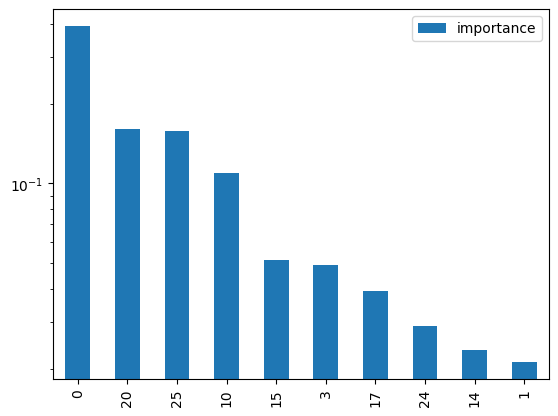

In [ ]:
# bar plot, top 10 features
tabular_model.feature_importance().sort_values("importance", ascending=False).head(
    10
).plot.bar(logy=True)

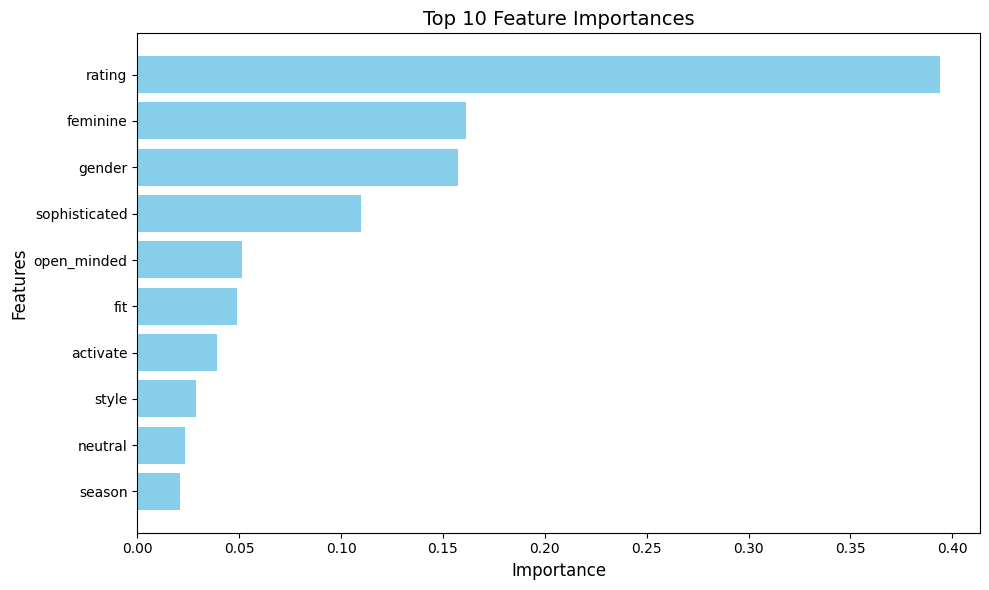

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 생성
data = {
    "Features": [
        "rating", "feminine", "gender", "sophisticated", "open_minded",
        "fit", "activate", "style", "neutral", "season", "brightness",
        "practical", "warmth", "when", "urban", "neat", "era"
    ],
    "importance": [
        3.939279e-01, 1.612383e-01, 1.575149e-01, 1.097734e-01,
        5.127581e-02, 4.910419e-02, 3.926940e-02, 2.898775e-02,
        2.358459e-02, 2.119490e-02, 1.755089e-02, 1.564348e-02,
        1.253630e-02, 1.023661e-02, 6.577540e-03, 4.684944e-03,
        4.261461e-03
    ]
}

df = pd.DataFrame(data)

# 상위 10개 선택
top_10 = df.nlargest(10, "importance")

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(top_10["Features"], top_10["importance"], color="skyblue")
plt.gca().invert_yaxis()  # 가장 중요한 피처가 위로 오도록 반전
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 10 Feature Importances", fontsize=14)
plt.tight_layout()
plt.show()
